In [1]:
# !pip install transformers datasets torch scikit-learn matplotlib

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [12]:
# Load dataset
class TextDataset(Dataset):
    def __init__(self, data, labels, tokenizer, max_length):
        self.data = data
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Load data
folder_path = "C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem"  # Change this to your dataset folder
classes = os.listdir(folder_path)
label_map = {cls: idx for idx, cls in enumerate(classes)}


In [9]:
!pip install --upgrade transformers
from transformers import AutoTokenizer
# Load tokenizer
# tokenizer = BertTokenizer.from_pretrained("tahrirchi/tahrirchi-bert-base")
tokenizer = AutoTokenizer.from_pretrained("tahrirchi/tahrirchi-bert-small", force_download=True)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

In [13]:
data, labels = [], []
for cls in classes:
    print(cls)
    class_path = os.path.join(folder_path, cls)
    for file in os.listdir(class_path)[:2000]:
        with open(os.path.join(class_path, file), "r", encoding="utf-8") as f:
            data.append(f.read())
            labels.append(label_map[cls])

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create datasets
train_dataset = TextDataset(train_texts, train_labels, tokenizer, max_length=256)
val_dataset = TextDataset(val_texts, val_labels, tokenizer, max_length=256)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

Avto
Ayollar
Iqtisodiyot
Jinoyat
Madaniyat
Pazandachilik
Qonunchilik
Salomatlik
Siyosat
Sport
Texnologiya


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at tahrirchi/tahrirchi-bert-small and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


epoch= 0
2200
{'input_ids': tensor([[    0,  5015,   692,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,   304,  3267,  ...,     1,     1,     1],
        ...,
        [    0,   396,    73,  ...,     1,     1,     1],
        [    0,    77,   757,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  7,  3, 10,  6, 10,  6,  8])}
{'input_ids': tensor([[    0, 15947,   370,  ...,  1410,   439,     2],
        [    0,  9603,   376,  ...,  3731, 13715,     2],
        [    0, 27577,   830,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ..., 16741, 25934,     2],
        [    0,    83,   265,  ...,    80,  9804,     2],
    

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   506,   586,  ...,  3010,  2898,     2],
        [    0,  8976,  7363,  ...,  2551,   288,     2],
        ...,
        [    0, 15536, 20341,  ...,   332,    80,     2],
        [    0, 20551, 12325,  ...,   265,   540,     2],
        [    0,  1691,   564,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  6,  7,  1,  1,  6, 10,  8])}
{'input_ids': tensor([[    0,    83,   265,  ...,  2158,   384,     2],
        [    0,    69,   431,  ...,     1,     1,     1],
        [    0, 13005, 21899,  ...,     1,     1,     1],
        ...,
        [    0,  2052,  1725,  ...,     1,     1,     1],
        [    0,  8073,   395,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0,  3340,   533,  ...,     1,     1,     1],
        [    0,   504,  5849,  ...,     1,     1,     1],
        [    0,  3403,  2911,  ...,     1,     1,     1],
        ...,
        [    0,  2658,   279,  ...,   794,   300,     2],
        [    0, 14979,   308,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 6, 8, 1, 9, 1, 9, 2])}
{'input_ids': tensor([[    0,   272,   749,  ...,     1,     1,     1],
        [    0,    74,  2119,  ...,     1,     1,     1],
        [    0,  9263,   342,  ..., 14768,  1202,     2],
        ...,
        [    0,  3305, 24134,  ...,     1,     1,     1],
        [    0, 27430,   343,  ...,   615,  7562,     2],
        [    0,  6622,  11

{'input_ids': tensor([[    0, 21516,   342,  ...,   338,   265,     2],
        [    0,   618,  2856,  ...,  5109, 12406,     2],
        [    0, 17937,   288,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  2397,    80,  ...,     1,     1,     1],
        [    0,  6398,   279,  ...,   614, 21086,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 1, 3, 7, 0, 0, 6, 0])}
{'input_ids': tensor([[    0, 25624,   332,  ...,     1,     1,     1],
        [    0,  2671,   325,  ...,   361,   692,     2],
        [    0, 16459,  6782,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ..., 12199,  5005,     2],
        [    0, 12054, 28898,  ...,     1,     1,     1],
        [    0,   547,  57

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  3449,  9031,  ...,     1,     1,     1],
        ...,
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,    92,   668,  ...,  3949,  2640,     2],
        [    0, 14034,   342,  ...,  1810,  2923,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  5,  5,  6,  9, 10,  9,  6])}
{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 29205,   990,  ...,     1,     1,     1],
        [    0,  1794,  3012,  ...,     1,     1,     1],
        ...,
        [    0,  1871,   310,  ...,     1,     1,     1],
        [    0,  1168,    87,  ...,  9649,   696,     2],
        [    0,   

{'input_ids': tensor([[    0, 24032,  1398,  ...,  4744,  1398,     2],
        [    0,  3011,   308,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,    77,  9468,  ...,     1,     1,     1],
        [    0, 29539,  2514,  ...,     1,     1,     1],
        [    0,  9603,  1040,  ...,  5997,  5388,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  6,  8, 10,  0,  5,  5,  7])}
{'input_ids': tensor([[   0,  414, 3154,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  586,   86,  ..., 1695, 7983,    2],
        ...,
        [   0, 5832,  498,  ...,    1,    1,    1],
        [   0, 6622, 1167,  ..., 3724, 7160,    2],
        [   0,   83,  265,  ...,  491, 2158,    

{'input_ids': tensor([[    0,  3340,  2959,  ...,     1,     1,     1],
        [    0,  1308,   576,  ...,   305,   332,     2],
        [    0, 21711,   869,  ...,     1,     1,     1],
        ...,
        [    0,   377,    85,  ...,     1,     1,     1],
        [    0, 15141,   593,  ...,  1581,  8177,     2],
        [    0,  4780,  8483,  ...,   332,  1052,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2, 10,  3,  7, 10,  5,  2,  1])}
{'input_ids': tensor([[   0,  323, 3902,  ...,    1,    1,    1],
        [   0,  311,  331,  ...,  376, 3836,    2],
        [   0, 3719,  813,  ...,    1,    1,    1],
        ...,
        [   0,  333, 1080,  ...,    1,    1,    1],
        [   0,  607, 1210,  ...,    1,    1,    1],
        [   0, 3513,   88,  ...,    1,    1,    

{'input_ids': tensor([[    0,   407,   265,  ...,   265,    84,     2],
        [    0,   292,  1970,  ...,   325, 12257,     2],
        [    0,  6985, 12831,  ...,     1,     1,     1],
        ...,
        [    0,  6673, 10795,  ...,     1,     1,     1],
        [    0, 13823,   709,  ...,     1,     1,     1],
        [    0,  2375,  1971,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 3, 5, 6, 7, 2, 5, 3])}
{'input_ids': tensor([[    0,   290,   265,  ..., 25419,  4031,     2],
        [    0,  4515,   414,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  1740,   343,  ...,  1410,  1500,     2],
        [    0,  2930,  2334,  ...,     1,     1,     1],
        [    0,  5562,  10

{'input_ids': tensor([[    0, 11012,  1516,  ...,  1463,  2076,     2],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0, 14212,  1080,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  9727,   793,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   491,  2158,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  7, 10,  9, 10,  4,  5,  6])}
{'input_ids': tensor([[    0, 13975, 24783,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  4007,   325,  ...,     1,     1,     1],
        ...,
        [    0, 14667,  1998,  ...,     1,     1,     1],
        [    0,   274, 25545,  ...,   334,   265,     2],
        [    0,   

{'input_ids': tensor([[    0,  1648, 10158,  ...,     2,     1,     1],
        [    0, 27129,  2625,  ...,     1,     1,     1],
        [    0,  3719,   813,  ..., 18226,   518,     2],
        ...,
        [    0,    78,   274,  ...,   261,  5298,     2],
        [    0,   416,   736,  ...,     1,     1,     1],
        [    0,    69,   455,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 4, 3, 7, 5, 9, 3, 0])}
{'input_ids': tensor([[    0,  8586, 13658,  ...,   265,   491,     2],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0, 17099,   266,  ...,     1,     1,     1],
        ...,
        [    0, 10520,   308,  ...,     1,     1,     1],
        [    0,   560, 25343,  ...,   439,  7597,     2],
        [    0,   304,   2

{'input_ids': tensor([[    0,    83,   265,  ...,  2634,   614,     2],
        [    0, 24900,   279,  ...,     1,     1,     1],
        [    0,   359,  4524,  ..., 24269,   332,     2],
        ...,
        [    0,   264,   278,  ...,     1,     1,     1],
        [    0,    69,   995,  ...,  1351,  1009,     2],
        [    0,   261,  8052,  ...,  2122,  9054,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 9, 0, 9, 5, 3, 2, 9])}
{'input_ids': tensor([[    0,   642,   997,  ...,   269,  6636,     2],
        [    0,  3305, 17831,  ...,     1,     1,     1],
        [    0,   436,  5145,  ...,   261,  1911,     2],
        ...,
        [    0,    75,   265,  ...,   614,   440,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   292,  19

{'input_ids': tensor([[    0,  1022,    71,  ...,   265,  2557,     2],
        [    0,  8073,   395,  ...,   265,   588,     2],
        [    0,  8833, 11908,  ...,   387, 27573,     2],
        ...,
        [    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,   685,  2853,  ...,  2058,   966,     2],
        [    0,  1310,  1654,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  6,  7,  9,  7, 10,  9,  3])}
{'input_ids': tensor([[    0,  7755,  3539,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,   390, 20999,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,    77,  2086,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,  6888,   270,  ...,   425, 26945,     2],
        [    0,  1857,  2408,  ...,  1443, 15788,     2],
        [    0,   484,  2000,  ...,     1,     1,     1],
        ...,
        [    0,  1258, 10373,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 10431,  9608,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0, 10,  3,  8, 10,  4,  7,  6])}
{'input_ids': tensor([[    0,    73,   502,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  2122,   790,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0,  5844,  1415,  ...,  1766,  4074,     2],
        [    0,    83,   265,  ...,  1980,   342,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        ...,
        [    0,  1258,   333,  ...,  2227,  5858,     2],
        [    0, 14470,  7435,  ...,   279,   265,     2],
        [    0,  3723,   439,  ...,  1385,  3838,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  6,  4, 10,  7,  9, 10,  7])}
{'input_ids': tensor([[   0,   83,  265,  ...,    1,    1,    1],
        [   0, 2563,  404,  ...,  491, 6356,    2],
        [   0,   78, 4130,  ...,    1,    1,    1],
        ...,
        [   0, 3719,  813,  ...,    1,    1,    1],
        [   0, 1980,  581,  ..., 4301,  279,    2],
        [   0,  316, 5988,  ...,    1,    1,    

{'input_ids': tensor([[   0,  330, 7321,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0, 1286, 2556,  ..., 3010,  338,    2],
        ...,
        [   0, 6078,   89,  ...,    1,    1,    1],
        [   0, 2770, 7695,  ...,    1,    1,    1],
        [   0,  423,  279,  ...,   81,  783,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  6,  2,  2, 10,  0,  3,  2])}
{'input_ids': tensor([[    0, 21631, 24609,  ..., 25077,   983,     2],
        [    0,  1498,   304,  ...,     1,     1,     1],
        [    0,    83,  3937,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ..., 15475,   343,     2],
        [    0, 23413,   384,  ...,  2557, 15112,     2],
        [    0,    78,   274,  ...,     1,     1,     

{'input_ids': tensor([[    0,  9188, 11562,  ...,     1,     1,     1],
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,  5516,  4287,  ...,    86, 11423,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   452,    94,     2],
        [    0, 16354,  6726,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5, 10,  1,  6,  3,  6,  4,  4])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3340,   533,  ...,     1,     1,     1],
        [    0,   352,  1358,  ...,     1,     1,     1],
        ...,
        [    0, 11709, 22303,  ...,   982,   300,     2],
        [    0,   377, 19460,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    89,    71,  ...,     1,     1,     1],
        [    0,  2908,   332,  ...,  1082,  2840,     2],
        [    0, 16975,  1326,  ...,   676,   334,     2],
        ...,
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,  1297,   334,     2],
        [    0,   484,   318,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  9,  1, 10,  5,  5,  7,  5])}
{'input_ids': tensor([[    0,  1371,   975,  ...,     1,     1,     1],
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,   298,  4544,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  2651,   742,     2],
        [    0,    69, 13932,  ...,   281,   931,     2],
        [    0,  1

{'input_ids': tensor([[    0, 21711,   452,  ...,     1,     1,     1],
        [    0,  9188,   789,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   265,   295,     2],
        [    0,  4906,   430,  ...,     1,     1,     1],
        [    0,   385,   349,  ...,  4494,  2207,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  5,  5,  3,  4,  6,  8, 10])}
{'input_ids': tensor([[    0, 16569,   688,  ...,     1,     1,     1],
        [    0, 27577,   424,  ...,   394,  1117,     2],
        [    0, 20864,  1501,  ...,   881,   393,     2],
        ...,
        [    0,   423,   279,  ...,    86,  1540,     2],
        [    0, 29205,  4301,  ...,     1,     1,     1],
        [    0,  6

{'input_ids': tensor([[    0,   680,  1026,  ...,  1909,   822,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    88, 27000,  ...,     1,     1,     1],
        ...,
        [    0, 29205,  1130,  ...,     1,     1,     1],
        [    0, 11574, 23695,  ...,     1,     1,     1],
        [    0,  2671,  8812,  ...,    86,  1385,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 3, 8, 1, 9, 0, 6, 5])}
{'input_ids': tensor([[    0, 15626,   830,  ...,     1,     1,     1],
        [    0,  2771,  2666,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  3093,  3990,     2],
        ...,
        [    0,   604,  2632,  ...,     1,     1,     1],
        [    0, 13975,  3201,  ...,   308,   395,     2],
        [    0,    75,   6

{'input_ids': tensor([[    0,  2086,   280,  ...,   405,  2577,     2],
        [    0,  3723,   439,  ..., 10840,   441,     2],
        [    0,    69, 13956,  ...,   261,  2669,     2],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,  4780,   522,  ...,     1,     1,     1],
        [    0,  3447,  1202,  ...,  1909,   300,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  2, 10,  5,  6,  3,  7,  1])}
{'input_ids': tensor([[    0,   889,    75,  ...,  2878,  6329,     2],
        [    0,   644,   692,  ..., 23211, 21654,     2],
        [    0,  2942,  2877,  ...,     1,     1,     1],
        ...,
        [    0,   524,   412,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   642,   997,  ...,     1,     1,     1],
        [    0,    77,  4897,  ...,     1,     1,     1],
        [    0,    91, 10201,  ...,     1,     1,     1],
        ...,
        [    0,   383,   444,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,    82,     2],
        [    0,   423,  1593,  ...,    81, 10706,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  9, 10,  9,  6,  7,  6, 10])}
{'input_ids': tensor([[    0,    78,   274,  ...,  5287, 15989,     2],
        [    0, 13975,  5339,  ...,     1,     1,     1],
        [    0, 27372,  1268,  ...,     1,     1,     1],
        ...,
        [    0, 21462, 10544,  ...,     1,     1,     1],
        [    0,  3340,   533,  ..., 16225, 16145,     2],
        [    0,   

{'input_ids': tensor([[    0,  2520,   897,  ...,   342,   265,     2],
        [    0,  1071,   776,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,     1,     1,     1],
        ...,
        [    0,  1089,  1379,  ...,   319,  1813,     2],
        [    0,   698,   433,  ...,  3242,  2496,     2],
        [    0,    78,  4130,  ...,  6929,  1030,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0, 10,  3,  0,  3,  7,  1,  0])}
{'input_ids': tensor([[    0,    69, 13932,  ...,     1,     1,     1],
        [    0,  2377,   271,  ...,     1,     1,     1],
        [    0, 21462,  4001,  ...,   265,  1425,     2],
        ...,
        [    0, 27577,  2483,  ...,  2413, 25233,     2],
        [    0,   405,   265,  ..., 11038,  1658,     2],
        [    0,   

{'input_ids': tensor([[    0,   323,  3902,  ...,   332,   736,     2],
        [    0, 21850,   593,  ...,     1,     1,     1],
        [    0,  6078, 15071,  ...,     1,     1,     1],
        ...,
        [    0,  7268,  1069,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,  2331,  8571,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 5, 0, 1, 4, 2, 8, 9])}
{'input_ids': tensor([[    0,   708,   290,  ...,     1,     1,     1],
        [    0, 17889,  1237,  ...,  1801,  1497,     2],
        [    0,   931,   278,  ...,  3449,   308,     2],
        ...,
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0, 20551,  1213,  ..., 12241,  1088,     2],
        [    0,   425,  28

{'input_ids': tensor([[    0,   309,  1971,  ...,     1,     1,     1],
        [    0,  1314, 17629,  ..., 19500,   364,     2],
        [    0,  2557,  2243,  ...,  2657, 15427,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  4493,   297,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 1, 1, 7, 5, 4, 6, 9])}
{'input_ids': tensor([[    0,   316,   849,  ...,     1,     1,     1],
        [    0,    92,  2958,  ...,     1,     1,     1],
        [    0,  3231,  1251,  ...,   376,  1103,     2],
        ...,
        [    0, 18234,   946,  ...,  5841,  1210,     2],
        [    0,   695,  5269,  ...,     1,     1,     1],
        [    0,  3719,   8

{'input_ids': tensor([[    0,  9081,   614,  ...,  5618, 17349,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  7412,  2314,  ...,     1,     1,     1],
        ...,
        [    0,    90,    91,  ...,     1,     1,     1],
        [    0, 29205,   851,  ...,     1,     1,     1],
        [    0,   383,  4681,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  6,  5,  7,  1, 10,  0,  8])}
{'input_ids': tensor([[    0,   396,    73,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   308,  1403,     2],
        [    0,   383,   290,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,  1103,   535,     2],
        [    0,   292,   644,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  1518,   261,  ..., 15687,   288,     2],
        [    0,   316,  2083,  ..., 14369,   298,     2],
        [    0,  1304, 13372,  ...,     1,     1,     1],
        ...,
        [    0,   371,   899,  ...,   279,   777,     2],
        [    0,    69, 13932,  ...,   309,   575,     2],
        [    0,   414,  3154,  ...,  1293, 27587,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 6, 5, 7, 3, 7, 9, 8])}
{'input_ids': tensor([[    0,   326,   334,  ...,   265,  6614,     2],
        [    0,   333, 12277,  ...,     1,     1,     1],
        [    0,  5269,   704,  ...,   736,   261,     2],
        ...,
        [    0,  6362,    88,  ...,    80,  1953,     2],
        [    0,   775,  1566,  ...,     1,     1,     1],
        [    0,   292,  19

{'input_ids': tensor([[    0, 18298,  8674,  ...,  5639,   452,     2],
        [    0, 19868,    75,  ...,   614,   308,     2],
        [    0, 10707,  4121,  ...,     1,     1,     1],
        ...,
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  7800,   535,  ...,   369,    68,     2],
        [    0,  4738,  3605,  ...,   705,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 0, 2, 0, 6, 7, 4, 1])}
{'input_ids': tensor([[    0,  4475,  4884,  ...,     1,     1,     1],
        [    0,   644,   692,  ...,  1160,   502,     2],
        [    0,   309, 18264,  ...,    80,     2,     1],
        ...,
        [    0,    83,   265,  ...,    80,  2940,     2],
        [    0,   390,   299,  ...,     1,     1,     1],
        [    0,   968, 123

{'input_ids': tensor([[    0,    82,  8051,  ...,     1,     1,     1],
        [    0, 27577, 24960,  ...,     1,     1,     1],
        [    0,  9390,  4301,  ...,   332,  2211,     2],
        ...,
        [    0,   352,   265,  ..., 17532,   288,     2],
        [    0,  4458,   439,  ...,     1,     1,     1],
        [    0,   292, 23124,  ...,  2005,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 8, 6, 3, 6, 1, 5, 7])}
{'input_ids': tensor([[    0,   423,   919,  ...,   308,  1004,     2],
        [    0,    83,   265,  ...,   332,   736,     2],
        [    0,    69, 13956,  ...,   261,  7983,     2],
        ...,
        [    0,  9665,   383,  ...,   265,    86,     2],
        [    0,  7255, 28126,  ...,   265,   880,     2],
        [    0,   396,    

{'input_ids': tensor([[    0, 15053,   308,  ...,     1,     1,     1],
        [    0, 23842,   384,  ...,     1,     1,     1],
        [    0,   396,  9556,  ...,     1,     1,     1],
        ...,
        [    0,    90,  4453,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 4, 7, 8, 8, 8, 4, 3])}
{'input_ids': tensor([[    0,  4263,   951,  ...,     1,     1,     1],
        [    0, 20215,  6209,  ...,   593,   461,     2],
        [    0, 29539,   466,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,  5447,   332,     2],
        [    0,   731,  8171,  ...,     1,     1,     1],
        [    0,   307,  47

{'input_ids': tensor([[    0,    82,  8051,  ...,   384, 16742,     2],
        [    0,   383,   265,  ...,   265,    85,     2],
        [    0,  9263,  6700,  ...,   306,   752,     2],
        ...,
        [    0, 17418,   265,  ...,  3935,   308,     2],
        [    0,    83,   265,  ...,   300,  1911,     2],
        [    0, 27577,   384,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 1, 1, 0, 7, 7, 8, 8])}
{'input_ids': tensor([[    0,  6673,   845,  ...,     1,     1,     1],
        [    0,   330,  1532,  ...,  7941,     2,     1],
        [    0,  8782,  2102,  ...,   288,   265,     2],
        ...,
        [    0,  4391,   405,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 12803, 111

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,   395,  3090,     2],
        [    0, 28986,  8101,  ...,     1,     1,     1],
        ...,
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,  2771,  1035,  ...,     1,     1,     1],
        [    0, 15210,   308,  ...,   957,   311,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3,  0,  2, 10,  0,  3,  5,  8])}
{'input_ids': tensor([[    0, 12769,  1339,  ...,    80,   843,     2],
        [    0,   333,   265,  ...,   279,   265,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  2017,   327,     2],
        [    0,  9086, 10105,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0,  2555,    72,  ..., 26945,  1139,     2],
        [    0,  2557,  1422,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,   498,   265,     2],
        ...,
        [    0, 14148,  3944,  ...,  4638,   305,     2],
        [    0,    69,   332,  ...,  7951, 25211,     2],
        [    0,   642,   997,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 7, 6, 4, 2, 6, 1, 4])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0, 18963,   383,  ...,  2952,   261,     2],
        ...,
        [    0,    83,   265,  ...,  1156,  2292,     2],
        [    0,  3191,    87,  ...,   526, 11866,     2],
        [    0,   414,  31

{'input_ids': tensor([[    0,   383,  4681,  ...,     1,     1,     1],
        [    0,   668,  8529,  ...,     1,     1,     1],
        [    0,   396,    73,  ...,     1,     1,     1],
        ...,
        [    0,  8370,    82,  ...,   491,   829,     2],
        [    0,   295, 29675,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  0, 10,  0,  3,  9, 10,  4])}
{'input_ids': tensor([[    0, 22466,   384,  ...,     1,     1,     1],
        [    0,  3340,   533,  ...,   982,   308,     2],
        [    0, 18234,   338,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  6924,  4088,  ...,   265,  2760,     2],
        [    0, 23

{'input_ids': tensor([[    0,    83,   265,  ...,   265,    88,     2],
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   790,  2787,     2],
        [    0,  1071,   534,  ...,  6672, 25412,     2],
        [    0, 14343,    79,  ...,   845,    75,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  4,  8,  4,  7,  9, 10,  9])}
{'input_ids': tensor([[    0, 27396,   664,  ...,     1,     1,     1],
        [    0,   298, 18069,  ...,  2863,   265,     2],
        [    0,   298,  2533,  ...,   363,   394,     2],
        ...,
        [    0, 12433,   275,  ...,   343,   265,     2],
        [    0,   423,   919,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0,  8976,  7363,  ...,  1547,   790,     2],
        [    0, 11709, 22303,  ...,   288,   265,     2],
        [    0, 27860,   338,  ...,     1,     1,     1],
        ...,
        [    0,   638,   347,  ...,  2774,   265,     2],
        [    0, 14231,  3839,  ...,     1,     1,     1],
        [    0,   272,   777,  ...,  2519,   261,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  1,  3,  9,  9,  1,  5, 10])}
{'input_ids': tensor([[    0,   887,  3064,  ...,   265,    75,     2],
        [    0,  3719,   813,  ...,   376,   393,     2],
        [    0,   936,  5766,  ...,     1,     1,     1],
        ...,
        [    0,    79,  2563,  ...,  2563,  1871,     2],
        [    0,  2917,  3980,  ...,     1,     1,     1],
        [    0, 11

{'input_ids': tensor([[    0,   523,  8656,  ...,     1,     1,     1],
        [    0, 10404,  8867,  ...,   265,    86,     2],
        [    0,   292,  1970,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   551,   393,     2],
        [    0, 19981,  9544,  ...,     1,     1,     1],
        [    0,   317,   319,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  1,  3, 10,  8,  0,  2,  4])}
{'input_ids': tensor([[    0,  3340,   533,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   654,  4708,     2],
        [    0,   330, 19084,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ..., 12820,  1851,     2],
        [    0,   775,  1566,  ...,    73,   584,     2],
        [    0, 14

{'input_ids': tensor([[    0,  4391,  2641,  ...,  2394,   279,     2],
        [    0,  1648,  1862,  ...,     1,     1,     1],
        [    0,   423, 18456,  ...,   302,  1120,     2],
        ...,
        [    0,   330,  9189,  ...,     1,     1,     1],
        [    0,  5647,  4725,  ...,   309,   308,     2],
        [    0,   668,  8529,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6,  5, 10,  7,  4,  2,  7,  0])}
{'input_ids': tensor([[    0, 22536,  5951,  ...,     1,     1,     1],
        [    0, 21462,   476,  ...,  1963,   872,     2],
        [    0, 25946,  1822,  ..., 13699,    71,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 29

{'input_ids': tensor([[    0, 15336,  1281,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,    86,   361,     2],
        [    0, 14009,   303,  ...,     1,     1,     1],
        ...,
        [    0,  9324,  6962,  ..., 21450,  1383,     2],
        [    0,  1857,   349,  ...,  1133,   319,     2],
        [    0,  1310,  1654,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  7,  4,  5,  9,  9, 10,  8])}
{'input_ids': tensor([[    0, 12360,   648,  ...,  1500,   533,     2],
        [    0, 21462,  5182,  ...,   393,   692,     2],
        [    0, 14561,   384,  ...,     1,     1,     1],
        ...,
        [    0,  8200,  1797,  ...,     1,     1,     1],
        [    0,  1659,    79,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0, 17797,   566,  ...,     1,     1,     1],
        [    0,   708,   290,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0, 14364,  4463,  ...,     1,     1,     1],
        [    0,   292, 15358,  ...,   265,  2121,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([4, 5, 6, 7, 1, 4, 6, 1])}
{'input_ids': tensor([[    0,   604, 16702,  ...,     1,     1,     1],
        [    0,  4374,   439,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   484,  1088,  ...,   412, 18831,     2],
        [    0,    78,    

{'input_ids': tensor([[    0,  1673,    78,  ...,   626,   439,     2],
        [    0,  4127,  2514,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,  9263,   365,  ...,   376,  1647,     2],
        [    0,  1151,  5886,  ...,     1,     1,     1],
        [    0,  1648, 10149,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 9, 2, 9, 1, 1, 3, 9])}
{'input_ids': tensor([[    0,    70,  4134,  ...,     1,     1,     1],
        [    0,   826,   278,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        ...,
        [    0, 16686,    92,  ...,  9591,  2590,     2],
        [    0,   991, 13828,  ...,  3441,  4389,     2],
        [    0, 17797, 290

{'input_ids': tensor([[    0, 23453,  1011,  ...,   439,   334,     2],
        [    0,    83,   265,  ...,   265,    80,     2],
        [    0, 11264,  1553,  ...,   265,    93,     2],
        ...,
        [    0,   396,    73,  ...,     1,     1,     1],
        [    0, 29948,  1021,  ...,  2059,    79,     2],
        [    0, 17889,  1859,  ...,  2530,  2877,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  6,  2,  8,  1, 10,  0,  1])}
{'input_ids': tensor([[   0,   83,  265,  ...,    1,    1,    1],
        [   0, 1113,  935,  ...,  314,  332,    2],
        [   0, 1052,  289,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ...,  393, 1251,    2],
        [   0,  292, 1970,  ...,  308,  475,    2],
        [   0, 3191,   87,  ...,  265,  615,    

{'input_ids': tensor([[    0,    91,   948,  ...,     1,     1,     1],
        [    0, 25829,    75,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 11133,  2220,  ...,  1851,  1810,     2],
        [    0,  9366,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  3,  8,  6,  0,  3,  0,  8])}
{'input_ids': tensor([[    0,  2013,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2158,   654,     2],
        [    0,   685,  2853,  ..., 17961,   350,     2],
        ...,
        [    0, 20551,  4690,  ...,     1,     1,     1],
        [    0,   944,   308,  ...,     1,     1,     1],
        [    0,  5

{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0, 16459,  1115,  ...,  3416,  3225,     2],
        [    0,    78,  4130,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,    74,  3784,  ...,     1,     1,     1],
        [    0, 18298,  8674,  ...,  3008,   464,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 0, 3, 9, 2, 8, 8, 9])}
{'input_ids': tensor([[   0, 8425,  958,  ...,   80, 1103,    2],
        [   0,  287,  327,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  614, 2432,    2],
        ...,
        [   0,   85,   80,  ...,    1,    1,    1],
        [   0, 3231, 3329,  ...,  343,  265,    2],
        [   0, 2555,   72,  ..., 1385, 2300,    2]]), 'a

{'input_ids': tensor([[    0,   268,  1201,  ...,   660,    80,     2],
        [    0,   449, 11758,  ...,   394,  3528,     2],
        [    0, 22606,   261,  ...,     1,     1,     1],
        ...,
        [    0,    89,    73,  ..., 12533,   305,     2],
        [    0,    81,    71,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  7, 10,  2,  3,  9,  0,  0])}
{'input_ids': tensor([[    0,    78,  4130,  ...,  1012,   692,     2],
        [    0,   383,   444,  ...,  3309,  1575,     2],
        [    0,  6362,  1981,  ...,  4111,  1939,     2],
        ...,
        [    0,  1857,  2408,  ...,     1,     1,     1],
        [    0,  3447,  1202,  ...,     1,     1,     1],
        [    0, 18

{'input_ids': tensor([[    0,    89,  2236,  ...,  3944,   843,     2],
        [    0, 10520,  5524,  ...,  1202,   376,     2],
        [    0,   333,   265,  ...,  1133,  1202,     2],
        ...,
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0, 29205,  9625,  ...,     1,     1,     1],
        [    0,   266,   416,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 6, 9, 6, 9, 3, 3, 8])}
{'input_ids': tensor([[    0,    69, 21752,  ...,     1,     1,     1],
        [    0,   292, 23124,  ...,  1519,   342,     2],
        [    0, 13005,  6965,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3517,    75,  ...,     1,     1,     1],
        [    0,  4478,   2

{'input_ids': tensor([[    0, 27577,   384,  ...,     1,     1,     1],
        [    0,  7703,  1854,  ...,    81,  1520,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        ...,
        [    0,  1106,   649,  ...,   368,   385,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   605,   826,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 3, 7, 3, 1, 9, 4, 8])}
{'input_ids': tensor([[    0,  3723,   439,  ...,   393, 23581,     2],
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0, 12803,  2787,  ...,  4074,   288,     2],
        ...,
        [    0,  6078, 15071,  ...,  8849,   614,     2],
        [    0, 23842,   288,  ...,     1,     1,     1],
        [    0, 25152,  30

{'input_ids': tensor([[   0,  407,  265,  ...,    1,    1,    1],
        [   0,   86,   74,  ...,    1,    1,    1],
        [   0,  618, 2856,  ...,   80, 3619,    2],
        ...,
        [   0, 1794,  451,  ...,    1,    1,    1],
        [   0, 1089,  543,  ..., 1009, 1202,    2],
        [   0,   84,  750,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 8, 7, 5, 4, 5, 7, 5])}
{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,   427,  9156,  ...,   533,  8497,     2],
        [    0,    83,   265,  ...,   265,    86,     2],
        ...,
        [    0,  1423, 19958,  ...,     1,     1,     1],
        [    0,  1151,  5886,  ...,     1,     1,     1],
        [    0,  6895,  2051,  ...,   325, 11806,     2]]), 'a

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  2175,   292,  ...,     1,     1,     1],
        [    0,   423,  1668,  ...,  2894,  1202,     2],
        ...,
        [    0, 15352, 20335,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  5135,   852,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 4, 3, 0, 8, 4, 4, 8])}
{'input_ids': tensor([[    0,   642,   997,  ...,     1,     1,     1],
        [    0,    73,   405,  ...,     1,     1,     1],
        [    0,  1944,   325,  ...,   990, 16741,     2],
        ...,
        [    0,   436, 16896,  ...,  1692,   535,     2],
        [    0, 13719,   325,  ...,     1,     1,     1],
        [    0,    84,   7

{'input_ids': tensor([[    0,   292,  1970,  ...,   363,  1851,     2],
        [    0,   484,  1102,  ...,   571, 14874,     2],
        [    0,  2312,   989,  ...,     1,     1,     1],
        ...,
        [    0, 27577, 17656,  ...,     1,     1,     1],
        [    0, 29628,   274,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,   338,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 9, 4, 6, 6, 8, 3, 0])}
{'input_ids': tensor([[    0,   347,   285,  ...,     1,     1,     1],
        [    0, 29948,  1021,  ..., 16351,  4296,     2],
        [    0,  2052,  1043,  ...,     1,     1,     1],
        ...,
        [    0,   390,  6099,  ...,     1,     1,     1],
        [    0, 27577, 29599,  ...,     1,     1,     1],
        [    0, 20905,  47

{'input_ids': tensor([[    0,   292,  1970,  ...,  1406,  7126,     2],
        [    0,  1777,   280,  ...,   263,   279,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  7506,  1542,  ...,     1,     1,     1],
        [    0, 11273,   517,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 1, 8, 2, 0, 2, 9, 7])}
{'input_ids': tensor([[    0, 30078,  1433,  ...,     1,     1,     1],
        [    0,  6078, 15071,  ...,    86,  1503,     2],
        [    0,   318,   620,  ...,     1,     1,     1],
        ...,
        [    0,  2567, 26473,  ...,     1,     1,     1],
        [    0, 27997,   881,  ...,  1317,  1620,     2],
        [    0,   889,    

{'input_ids': tensor([[    0,  4464,  3463,  ...,  1581,  6354,     2],
        [    0,   505,    79,  ...,  3152,  2331,     2],
        [    0,    90,  4453,  ...,     1,     1,     1],
        ...,
        [    0, 21711,   869,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  8200,   400,  ...,  6832,  3338,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2, 10,  4,  6,  9,  0,  5,  7])}
{'input_ids': tensor([[    0,  1113,   935,  ...,  3129, 11467,     2],
        [    0,  4910,   352,  ...,     1,     1,     1],
        [    0,   405,   265,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   263, 25545,  ..., 18521,    92,     2],
        [    0, 27

{'input_ids': tensor([[    0, 15628,  1143,  ...,     1,     1,     1],
        [    0,   578,  8268,  ...,   518,   439,     2],
        [    0,   810, 17448,  ...,     1,     1,     1],
        ...,
        [    0, 20232,  7169,  ...,  1810,  1679,     2],
        [    0,    74,  3784,  ...,     1,     1,     1],
        [    0,  4088,   326,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  1, 10,  0, 10,  6,  4,  5])}
{'input_ids': tensor([[    0,  7226, 11959,  ...,   990,   498,     2],
        [    0,  3217,   832,  ...,     1,     1,     1],
        [    0,  2597,  9390,  ...,  1449,  5307,     2],
        ...,
        [    0,  9188,   789,  ...,     1,     1,     1],
        [    0,    81,  5573,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    84,  2725,  ...,  1317,   342,     2],
        [    0,  6896,  2295,  ...,  1237,   439,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  8833,   269,  ...,  1700, 21320,     2],
        [    0,   303, 13256,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 1, 2, 2, 6, 1, 0, 4])}
{'input_ids': tensor([[    0,  3719,   813,  ...,  2877,   279,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  3747, 18307,     2],
        ...,
        [    0,   951,  3300,  ...,   395,  1540,     2],
        [    0,  2358,  1132,  ...,     1,     1,     1],
        [    0,   390,  60

{'input_ids': tensor([[    0, 13098,   446,  ..., 19733,   261,     2],
        [    0, 19983,   405,  ...,     1,     1,     1],
        [    0, 20367,  7483,  ...,     1,     1,     1],
        ...,
        [    0,   309, 18264,  ...,     1,     1,     1],
        [    0,  2908,    68,  ...,   532,    68,     2],
        [    0,    83,   265,  ...,   265,  1425,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 2, 4, 3, 4, 3, 7, 6])}
{'input_ids': tensor([[    0,  2826,  2213,  ...,   394,   687,     2],
        [    0,    83,   265,  ...,  2323,  2305,     2],
        [    0,   304,  1713,  ...,    94,  5249,     2],
        ...,
        [    0,  1518,   261,  ...,   265,   280,     2],
        [    0, 10520,  1520,  ...,     1,     1,     1],
        [    0,  2597, 153

{'input_ids': tensor([[    0,  2555,    72,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,    89,  2108,     2],
        [    0,  4660,   371,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3723,   439,  ...,  3777,   946,     2],
        [    0,    93,   274,  ...,    87,   660,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 9, 2, 0, 6, 0, 1, 9])}
{'input_ids': tensor([[    0, 22606,   261,  ...,   614,     2,     1],
        [    0,  3210, 23508,  ...,     1,     1,     1],
        [    0, 17797,  5986,  ...,     1,     1,     1],
        ...,
        [    0, 15471,   832,  ...,  1316,   261,     2],
        [    0, 27396,   664,  ...,     1,     1,     1],
        [    0,  3953,   5

{'input_ids': tensor([[    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,  1251, 20158,     2],
        [    0,    70,  4134,  ...,     1,     1,     1],
        ...,
        [    0,  3340,   533,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 17099,   266,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  0, 10,  2,  7,  1,  5,  4])}
{'input_ids': tensor([[    0,  5996, 11803,  ...,     1,     1,     1],
        [    0,  8368, 11171,  ...,     1,     1,     1],
        [    0,  3231, 17916,  ...,   614,   939,     2],
        ...,
        [    0,  2066,   721,  ...,     1,     1,     1],
        [    0, 29565,  3995,  ...,   872, 10341,     2],
        [    0, 29

{'input_ids': tensor([[    0,   597,   597,  ...,     1,     1,     1],
        [    0, 17864,  1624,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,   588, 17656,     2],
        ...,
        [    0, 11573,  3085,  ...,   614, 17151,     2],
        [    0,  2563,   404,  ...,    84,  1109,     2],
        [    0,    70,    81,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  7,  3,  9,  3, 10,  0,  8])}
{'input_ids': tensor([[    0,  2563,  2107,  ...,     1,     1,     1],
        [    0, 14249,   822,  ...,   308,  1435,     2],
        [    0,  2554, 11299,  ...,     1,     1,     1],
        ...,
        [    0, 11064, 14042,  ...,     1,     1,     1],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,   383,  4681,  ...,     1,     1,     1],
        [    0, 18745,  2314,  ...,     1,     1,     1],
        [    0,    82,   385,  ...,     1,     1,     1],
        ...,
        [    0,  6478,  1588,  ...,   332,  8304,     2],
        [    0,  1944, 24307,  ...,     1,     1,     1],
        [    0,  2597,  2292,  ...,  2336,  1777,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  5, 10,  8,  9,  6,  9,  8])}
{'input_ids': tensor([[    0,   845,  1777,  ...,  1852,     2,     1],
        [    0,   818,  5918,  ...,   439,  1764,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  3340,  3121,  ...,     1,     1,     1],
        [    0,   560, 25343,  ...,     1,     1,     1],
        [    0, 12

{'input_ids': tensor([[    0,   333,   265,  ...,  3333,  1035,     2],
        [    0,    87, 17191,  ...,   289, 11128,     2],
        [    0,    69, 13956,  ...,  1480,  3225,     2],
        ...,
        [    0,    83,   265,  ...,  2888,   791,     2],
        [    0,  2736,   829,  ...,   261,  1810,     2],
        [    0, 27577,   424,  ..., 23105,   325,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  7, 10,  4,  5,  6,  1,  8])}
{'input_ids': tensor([[    0,    78,  1667,  ...,     1,     1,     1],
        [    0, 14667,  8138,  ...,     1,     1,     1],
        [    0,   544,   279,  ...,     1,     1,     1],
        ...,
        [    0,   326, 10362,  ...,   308,  2305,     2],
        [    0, 10672,  2342,  ...,   265,  2049,     2],
        [    0,   

{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,   274,  1106,  ...,     1,     1,     1],
        [    0,   575,  1598,  ...,  2243,  1100,     2],
        ...,
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0, 29922,  4301,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 9, 7, 6, 5, 5, 3, 3])}
{'input_ids': tensor([[    0, 23307,  1948,  ...,   279,   265,     2],
        [    0,   414,  3154,  ...,   661,   288,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  4675,  2417,  ...,   292,   314,     2],
        [    0,  8200,  4347,  ...,  1624,  2023,     2],
        [    0,    83,   2

{'input_ids': tensor([[    0, 13467,  1806,  ...,   343,   265,     2],
        [    0,  1797, 10301,  ...,     1,     1,     1],
        [    0,  9727,   793,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,  1766,  3755,     2],
        [    0,  8087,   533,  ...,     1,     1,     1],
        [    0,  4871,  9601,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 1, 5, 1, 0, 4, 2, 5])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 15053, 24556,  ...,     1,     1,     1],
        ...,
        [    0,  5562,  1024,  ...,     1,     1,     1],
        [    0, 13768, 18426,  ...,     1,     1,     1],
        [    0,  1518,   8

{'input_ids': tensor([[    0,    82,  8051,  ...,     1,     1,     1],
        [    0,  9263,   340,  ...,     1,     1,     1],
        [    0,    76, 23452,  ...,  2587,   310,     2],
        ...,
        [    0, 28194,   332,  ...,  5213, 12068,     2],
        [    0, 21674,   303,  ...,   796,   301,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 1, 7, 7, 5, 6, 7, 2])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,  3849,  8977,     2],
        ...,
        [    0, 22606,   261,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  3411,  1200,     2],
        [    0,  9665,   5

{'input_ids': tensor([[   0, 2312, 3300,  ...,    1,    1,    1],
        [   0, 4374, 2242,  ...,  676, 2516,    2],
        [   0,  427, 8448,  ...,    1,    1,    1],
        ...,
        [   0,  347, 3121,  ...,  387, 1383,    2],
        [   0, 3231, 5569,  ...,  334,  265,    2],
        [   0,  385,  330,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  1,  6, 10,  6, 10,  1,  5])}
{'input_ids': tensor([[    0,    83,   265,  ...,  3010,  2898,     2],
        [    0,  4780,   279,  ...,     1,     1,     1],
        [    0, 16459,   594,  ...,   387,    82,     2],
        ...,
        [    0,   544,  6755,  ...,  1905, 20329,     2],
        [    0,   951,   582,  ...,     1,     1,     1],
        [    0,  1834,   296,  ...,     1,     1,     

{'input_ids': tensor([[    0,    74,  3784,  ...,     1,     1,     1],
        [    0, 20551,  7494,  ...,     1,     1,     1],
        [    0,  9425,  5629,  ...,     1,     1,     1],
        ...,
        [    0, 11133,  2220,  ...,     1,     1,     1],
        [    0,   405,   265,  ...,     1,     1,     1],
        [    0,  3762,  2919,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 0, 8, 0, 8, 0, 7, 3])}
{'input_ids': tensor([[    0,    69,   453,  ...,     1,     1,     1],
        [    0,   711,   265,  ...,   265,    86,     2],
        [    0,  2052,  1035,  ...,     1,     1,     1],
        ...,
        [    0,    93,   274,  ...,   340,  5743,     2],
        [    0,  5379,   333,  ...,  2227,  1972,     2],
        [    0,  5478,  82

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0, 13188,  2319,  ...,     1,     1,     1],
        ...,
        [    0,   889,   474,  ..., 29802,   279,     2],
        [    0,  2763,  3011,  ...,     1,     1,     1],
        [    0,  6888,  8138,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 0, 3, 1, 7, 2, 5, 0])}
{'input_ids': tensor([[    0, 18363,   429,  ...,   265,  1308,     2],
        [    0,  1505,   685,  ...,   752,  2394,     2],
        [    0,  1052,    93,  ...,  2011,  1545,     2],
        ...,
        [    0, 14343,    79,  ...,   266,   688,     2],
        [    0,  5914,   264,  ...,  1492, 14136,     2],
        [    0,   414,  31

{'input_ids': tensor([[   0,  290,  265,  ..., 3265,  308,    2],
        [   0, 8928,  332,  ...,    1,    1,    1],
        [   0,  271,  314,  ...,  429, 3884,    2],
        ...,
        [   0,  414, 3154,  ...,  265,  491,    2],
        [   0,  396,   73,  ...,    1,    1,    1],
        [   0,  944,  273,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6,  2,  9, 10,  8,  8, 10,  5])}
{'input_ids': tensor([[    0,   988, 10611,  ...,     1,     1,     1],
        [    0,  5562,   317,  ...,   594,  1105,     2],
        [    0, 21711,   869,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1058,  1510,  ...,     1,     1,     1],
        [    0,  1505, 16976,  ...,  1997,   288,     

{'input_ids': tensor([[    0, 10520,   308,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   834,   823,  ...,     1,     1,     1],
        ...,
        [    0,  3723,   439,  ...,  1852,  6245,     2],
        [    0,  7755, 15739,  ...,    80,  3901,     2],
        [    0, 12803,   439,  ...,   306,  1383,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  3,  5,  5,  2,  7, 10,  7])}
{'input_ids': tensor([[    0, 27577,  8960,  ...,     1,     1,     1],
        [    0,  6078, 15071,  ...,   880,   699,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,  4935,  4111,  ...,     1,     1,     1],
        [    0,   309,  3219,  ...,     1,     1,     1],
        [    0, 22

{'input_ids': tensor([[    0, 12879,  1035,  ...,  1202, 11423,     2],
        [    0,   289,  5247,  ...,   270,  2870,     2],
        [    0,    83,   265,  ...,   394,  3463,     2],
        ...,
        [    0,  9873,   692,  ...,  1547,  9418,     2],
        [    0,  9873,   642,  ...,   265,    94,     2],
        [    0,   492,  6269,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 4, 0, 8, 7, 7, 2, 8])}
{'input_ids': tensor([[    0,  1659,   520,  ...,   276,   412,     2],
        [    0, 10180,  1806,  ..., 14271,  2314,     2],
        [    0,   590,   285,  ...,   395,   439,     2],
        ...,
        [    0,  6924,  4088,  ...,   830,   308,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   352,  34

{'input_ids': tensor([[    0,   889,    75,  ...,     1,     1,     1],
        [    0, 17889,  1859,  ...,     1,     1,     1],
        [    0,   316,  1453,  ...,     1,     1,     1],
        ...,
        [    0, 10866,  1105,  ...,   330,   447,     2],
        [    0,  3447, 13186,  ...,  4024,  8050,     2],
        [    0, 27577,   852,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 7, 3, 2, 2, 7, 8, 8])}
{'input_ids': tensor([[    0,    83,   265,  ...,  1529,   334,     2],
        [    0,  8788,  8399,  ...,   755,  4577,     2],
        [    0, 20551,  3225,  ...,     1,     1,     1],
        ...,
        [    0, 18885,  1133,  ..., 16786,   332,     2],
        [    0,   364,    94,  ...,   830,  6782,     2],
        [    0,   951,  78

{'input_ids': tensor([[    0, 27372,  1003,  ...,     1,     1,     1],
        [    0,   316,    92,  ...,     1,     1,     1],
        [    0,  9258, 29599,  ...,  2131,  1191,     2],
        ...,
        [    0,  3294,  1660,  ...,     1,     1,     1],
        [    0, 27577,   784,  ...,     1,     1,     1],
        [    0,  4730,  3201,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 3, 4, 9, 5, 4, 8, 6])}
{'input_ids': tensor([[    0,   304,  3839,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,    75, 30432,  ...,  3948,  3935,     2],
        ...,
        [    0,  5864,   692,  ...,     1,     1,     1],
        [    0, 24335,  1202,  ...,  3612,  6104,     2],
        [    0,   414,  31

{'input_ids': tensor([[    0,  1844,  1433,  ...,     1,     1,     1],
        [    0, 13703,  2520,  ...,  7077,   376,     2],
        [    0, 10784,  3695,  ...,  1351,  1394,     2],
        ...,
        [    0,  9180,   431,  ...,   261,   791,     2],
        [    0,  1889,   649,  ...,     1,     1,     1],
        [    0,  3340,  7396,  ...,  1423,  4168,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  9,  8,  3,  5,  1,  4, 10])}
{'input_ids': tensor([[    0,   311,   331,  ..., 28455,  1851,     2],
        [    0,  5359,   966,  ...,     1,     1,     1],
        [    0,   988, 10611,  ...,    82,  2983,     2],
        ...,
        [    0,    78,    70,  ..., 13607,  7840,     2],
        [    0,  1314,   317,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 20551,  7494,  ..., 29439,   790,     2],
        [    0,    83,   265,  ...,     2,     1,     1],
        [    0,  4263,   951,  ...,     1,     1,     1],
        ...,
        [    0,  3516,   994,  ...,     1,     1,     1],
        [    0,  2175,   292,  ...,    91,  5379,     2],
        [    0,   273,  1611,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  9,  5,  2,  4,  1,  0,  9])}
{'input_ids': tensor([[    0,  8928,   332,  ...,   308,  1293,     2],
        [    0,  2555,    72,  ...,  1851,   288,     2],
        [    0,    69, 13932,  ...,    79,  3180,     2],
        ...,
        [    0,   414,  3154,  ...,   791, 13715,     2],
        [    0,  1258,   333,  ...,     1,     1,     1],
        [    0,  6

{'input_ids': tensor([[    0,    83,   265,  ...,  1069,   687,     2],
        [    0, 11518,   359,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        ...,
        [    0,   299,    69,  ...,     1,     1,     1],
        [    0, 15053,  5600,  ...,     1,     1,     1],
        [    0,   295, 29675,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  3,  3,  7,  9,  0,  7, 10])}
{'input_ids': tensor([[    0, 14249, 13823,  ...,  1351,  1424,     2],
        [    0,   292, 16861,  ..., 16754,  1103,     2],
        [    0,  1902, 11764,  ...,     1,     1,     1],
        ...,
        [    0, 27577,   279,  ...,   279,   265,     2],
        [    0,  5654,  8476,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  4597,   362,  ...,     1,     1,     1],
        [    0,  9727,  3995,  ...,     1,     1,     1],
        ...,
        [    0, 29948,  1021,  ...,  3329,  1133,     2],
        [    0,   304,  1713,  ...,  4460,   393,     2],
        [    0, 23842,   939,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 1, 1, 0, 4, 0, 0, 4])}
{'input_ids': tensor([[    0, 11700,  1417,  ...,   265,    86,     2],
        [    0,   816,   481,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  1351,  7563,     2],
        ...,
        [    0,    69, 21752,  ...,     1,     1,     1],
        [    0,   371,   620,  ...,     1,     1,     1],
        [    0,  4871,  96

{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,   749,  7282,  ...,     1,     1,     1],
        [    0,   299,  5128,  ..., 17820,  4892,     2],
        ...,
        [    0,   731,  1072,  ...,   395,  4230,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2021,   376,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 8, 1, 3, 4, 6, 8, 2])}
{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  6924,  4088,  ...,     1,     1,     1],
        [    0,    84, 10206,  ...,     1,     1,     1],
        ...,
        [    0,   731,  3265,  ...,     1,     1,     1],
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,   359, 235

{'input_ids': tensor([[    0,  7435,  8154,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        ...,
        [    0,  1654,  7479,  ...,  7597, 17023,     2],
        [    0,   383,   298,  ...,     1,     1,     1],
        [    0, 27159,   300,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3,  0,  7,  5,  8, 10, 10,  4])}
{'input_ids': tensor([[    0, 14667, 18953,  ...,     1,     1,     1],
        [    0,  8474,   332,  ..., 19866,   982,     2],
        [    0,    75,    81,  ...,     1,     1,     1],
        ...,
        [    0,   261,  8052,  ...,   330,  4812,     2],
        [    0,  1258,   333,  ...,  1100,  3919,     2],
        [    0,   

{'input_ids': tensor([[    0,   414,  3154,  ...,   395,   439,     2],
        [    0,  1944,  1635,  ...,   279,   265,     2],
        [    0,  3340, 18884,  ...,   433, 23820,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   427,  6678,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  1, 10, 10,  0,  2,  9,  6])}
{'input_ids': tensor([[    0,  1951,   317,  ...,  2998,  2347,     2],
        [    0, 23570,  2102,  ...,   265,    89,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  2052,  2952,  ...,   478,   940,     2],
        [    0,  1983,   261,  ...,     1,     1,     1],
        [    0, 15

{'input_ids': tensor([[    0,  1145,   408,  ...,     1,     1,     1],
        [    0, 13719,   473,  ...,  1851,  1540,     2],
        [    0, 19691,   703,  ...,  3107,  1851,     2],
        ...,
        [    0,   383,   299,  ...,  1841, 10294,     2],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 7, 7, 5, 6, 9, 3, 8])}
{'input_ids': tensor([[    0,   304,  1713,  ..., 10781,  7941,     2],
        [    0,   396,    73,  ...,   265,   280,     2],
        [    0,  2597,  2159,  ...,   709,  1837,     2],
        ...,
        [    0,  1797, 26474,  ...,     1,     1,     1],
        [    0, 27577,  2587,  ...,     1,     1,     1],
        [    0,   560, 281

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    69,  1074,  ...,     1,     1,     1],
        [    0, 10743, 13622,  ...,     1,     1,     1],
        ...,
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,  6809,  1043,  ...,     1,     1,     1],
        [    0, 14470,  4649,  ...,   265, 25526,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([4, 4, 5, 9, 6, 4, 6, 2])}
{'input_ids': tensor([[    0,   405,   265,  ...,     1,     1,     1],
        [    0,  3449,   939,  ...,     1,     1,     1],
        [    0,  1417, 27860,  ...,     1,     1,     1],
        ...,
        [    0,   810,   265,  ...,     1,     1,     1],
        [    0, 14212,  1080,  ..., 26539,   349,     2],
        [    0,   407,   2

{'input_ids': tensor([[    0, 15574,  2265,  ...,   265,    86,     2],
        [    0,  8164,   319,  ...,   265,  4126,     2],
        [    0,   407,   265,  ...,     1,     1,     1],
        ...,
        [    0,   944,   376,  ...,     1,     1,     1],
        [    0,  6694,   377,  ...,     1,     1,     1],
        [    0,   581,  2512,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 1, 5, 5, 9, 5, 5, 7])}
{'input_ids': tensor([[    0, 27577,   348,  ...,   453,  6054,     2],
        [    0,  6244,  6971,  ...,  5109,   533,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  9501,  4340,  ...,     1,     1,     1],
        [    0,  2411,   325,  ...,   588,  1581,     2],
        [    0, 22367,   4

{'input_ids': tensor([[    0,    86,    74,  ...,     1,     1,     1],
        [    0, 27577,   334,  ...,   823,   288,     2],
        [    0,    82,   526,  ...,   914,   614,     2],
        ...,
        [    0,  8073,   395,  ...,  3667, 10266,     2],
        [    0, 10255,   507,  ...,     1,     1,     1],
        [    0,   352, 25776,  ...,  3225,  2227,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  2,  0,  8,  7,  8,  9, 10])}
{'input_ids': tensor([[    0,  2215,  4336,  ...,  2018,   407,     2],
        [    0,   581,  2512,  ...,   473,  2829,     2],
        [    0,  6398,   279,  ...,     1,     1,     1],
        ...,
        [    0, 19379,   279,  ...,     1,     1,     1],
        [    0,  4374,  5590,  ...,  6167,   308,     2],
        [    0,   

{'input_ids': tensor([[    0, 18963,   383,  ...,  4389,   618,     2],
        [    0,   695,    79,  ...,     1,     1,     1],
        [    0,    75,  3529,  ...,   330,   302,     2],
        ...,
        [    0,   309,   474,  ...,     1,     1,     1],
        [    0, 17797, 30403,  ...,     1,     1,     1],
        [    0, 16354,  2013,  ...,  3475,  9055,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 4, 0, 2, 6, 9, 4, 8])}
{'input_ids': tensor([[    0,   390, 14503,  ...,  1540,  2516,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  2872,  3183,     2],
        [    0, 11700,  1417,  ...,     1,     1,     1],
        [    0,  1505,   6

{'input_ids': tensor([[    0, 21462,   430,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   314,    68,     2],
        [    0,  4396,  6429,  ...,   288,   265,     2],
        ...,
        [    0,   766,    71,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,  8618,     2],
        [    0,  2843,  2903,  ...,  1206,  3265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 4, 1, 0, 5, 5, 6, 2])}
{'input_ids': tensor([[    0,  1505,   685,  ...,   614,     2,     1],
        [    0,    73,    68,  ...,     1,     1,     1],
        [    0,    70,  1523,  ...,     1,     1,     1],
        ...,
        [    0, 24837,   264,  ...,  1206, 15519,     2],
        [    0,    75,    81,  ...,   288,   265,     2],
        [    0, 11713,   3

{'input_ids': tensor([[    0,  4660,   680,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,   265,   594,     2],
        [    0,    83,   265,  ...,  1183,   394,     2],
        ...,
        [    0, 14358,   308,  ...,  1403,   848,     2],
        [    0, 23307,  4276,  ...,   288,   265,     2],
        [    0,  1673,  1519,  ...,  1851,  1540,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  3,  0, 10,  5,  6,  5,  7])}
{'input_ids': tensor([[    0,  1673,   342,  ...,   400,   332,     2],
        [    0,   777,   416,  ...,   265,    79,     2],
        [    0, 14979,   308,  ...,  1383, 25484,     2],
        ...,
        [    0,   988,  6743,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,   585,   330,  ...,   325,   342,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,  3870,   627,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   520,   364,  ..., 19500,   364,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3,  1,  3,  2, 10,  5,  0,  7])}
{'input_ids': tensor([[    0,   261,  8052,  ..., 10923,   362,     2],
        [    0,   292,  1799,  ...,   464,   350,     2],
        [    0,  3719,   813,  ...,  1851,  1161,     2],
        ...,
        [    0,    83,   265,  ...,  5379,   362,     2],
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0, 11

{'input_ids': tensor([[    0, 19333,  1547,  ...,     1,     1,     1],
        [    0, 11709, 22303,  ...,   332,  1310,     2],
        [    0,   323,  3902,  ...,   265,   327,     2],
        ...,
        [    0,    89,  2236,  ...,     1,     1,     1],
        [    0,   293,   479,  ...,   265,   268,     2],
        [    0, 21711,   869,  ...,   343,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 1, 3, 3, 7, 0, 7, 3])}
{'input_ids': tensor([[    0,   731, 19225,  ...,     1,     1,     1],
        [    0,  7631, 18944,  ...,  3756, 23598,     2],
        [    0, 12452,  2161,  ...,  1545,  1161,     2],
        ...,
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,   390,  3066,  ...,     1,     1,     1],
        [    0,  2847,  11

{'input_ids': tensor([[   0, 1145,  268,  ...,    1,    1,    1],
        [   0, 3719,  813,  ..., 2258,  395,    2],
        [   0,   83,  265,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ..., 6640,  990,    2],
        [   0,  292, 1970,  ...,    1,    1,    1],
        [   0,  323, 3902,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 3, 9, 3, 4, 6, 3, 8])}
{'input_ids': tensor([[    0,   423,  5412,  ...,     1,     1,     1],
        [    0,   918,  1213,  ...,     1,     1,     1],
        [    0,  4458,  3263,  ...,   288,   265,     2],
        ...,
        [    0, 29911,   325,  ...,     1,     1,     1],
        [    0,  1691, 21086,  ...,     1,     1,     1],
        [    0,  1797, 10301,  ...,   325, 16154,     2]]), 'a

{'input_ids': tensor([[   0, 1944,  939,  ...,  265, 3453,    2],
        [   0,  642,  997,  ...,    1,    1,    1],
        [   0,   83,  265,  ..., 9284,  343,    2],
        ...,
        [   0,  385,  330,  ...,    1,    1,    1],
        [   0,  323, 3902,  ...,    1,    1,    1],
        [   0, 2555,   72,  ..., 2290,  989,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 4, 9, 4, 7, 5, 2, 7])}
{'input_ids': tensor([[   0, 9086, 3383,  ..., 1194,  533,    2],
        [   0, 3340,  290,  ...,    1,    1,    1],
        [   0,  272,  777,  ...,  265, 2049,    2],
        ...,
        [   0,   78,  274,  ...,  457,  276,    2],
        [   0,  642,  997,  ...,    1,    1,    1],
        [   0,  449,   87,  ...,  265, 1513,    2]]), 'attention_mask': tensor([[1, 1, 1,  .

{'input_ids': tensor([[    0, 27945,  3205,  ...,     1,     1,     1],
        [    0, 19425,    79,  ...,   265,  2268,     2],
        [    0,  3996,   746,  ...,  4725,   279,     2],
        ...,
        [    0,   494,  1330,  ...,   361,  1108,     2],
        [    0,   423,   305,  ...,     1,     1,     1],
        [    0,  6985,   308,  ...,   919,  1194,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 9, 7, 5, 1, 1, 2, 8])}
{'input_ids': tensor([[    0,   304,  1713,  ...,   288,   265,     2],
        [    0,  2763, 28532,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        ...,
        [    0,   309,   309,  ...,  2156,   305,     2],
        [    0,  1648, 10158,  ...,     1,     1,     1],
        [    0, 17649,  15

{'input_ids': tensor([[    0, 21534,  8038,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0, 16162,  4874,  ...,     1,     1,     1],
        ...,
        [    0,  5379,   333,  ...,   279,   265,     2],
        [    0,  2658,   463,  ...,   390, 11047,     2],
        [    0,    69, 23601,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 3, 2, 9, 6, 2, 3, 4])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   685,  2853,  ...,   957,  2062,     2],
        [    0,   496,  6206,  ...,     1,     1,     1],
        ...,
        [    0,  5359,   966,  ...,   527,   705,     2],
        [    0,  4738,  1011,  ...,  1692, 19843,     2],
        [    0, 25081,   5

{'input_ids': tensor([[    0,    83,   265,  ...,  1553,  4649,     2],
        [    0,  5478,  8200,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   685,  2853,  ...,  2535,  3564,     2],
        [    0, 27577,   466,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 9, 3, 7, 3, 8, 9, 8])}
{'input_ids': tensor([[    0,   377,    85,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1251,   376,     2],
        [    0,   427,  9156,  ...,   519,  8690,     2],
        ...,
        [    0, 13712,   325,  ...,  2898,  1385,     2],
        [    0,  3350,  1723,  ...,     1,     1,     1],
        [    0,    78,  41

{'input_ids': tensor([[    0,   889,   364,  ...,     1,     1,     1],
        [    0,    89,  1948,  ..., 21450,  4123,     2],
        [    0,    83,   265,  ..., 13412,   356,     2],
        ...,
        [    0,   427,  9156,  ...,     1,     1,     1],
        [    0,    78,   490,  ...,  4549,  1851,     2],
        [    0,  1673,  2314,  ...,   356,    72,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  9,  6,  6,  2, 10,  4,  7])}
{'input_ids': tensor([[    0,   685,  2853,  ...,     1,     1,     1],
        [    0,   427,  9156,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,    83,   416,  ...,  1617,  1827,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0, 23

{'input_ids': tensor([[    0,   436,  2625,  ...,  3265,     2,     1],
        [    0,  9263,   876,  ...,   342,   265,     2],
        [    0,   944,  1213,  ...,     1,     1,     1],
        ...,
        [    0,  1074,  5363,  ...,   463, 25545,     2],
        [    0,   309, 15715,  ...,  4900,  2704,     2],
        [    0, 13091,  8162,  ...,  3651,  2305,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 1, 5, 4, 5, 0, 6, 3])}
{'input_ids': tensor([[    0, 27997,  8013,  ...,  1501,   308,     2],
        [    0,   425,  2853,  ...,     1,     1,     1],
        [    0,    69, 13956,  ..., 23581,   288,     2],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,    74,  37

{'input_ids': tensor([[    0, 27945,  3205,  ...,     1,     1,     1],
        [    0, 17396, 16862,  ...,    69,  6959,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  6753, 19379,  ...,     1,     1,     1],
        [    0,   284,  4663,  ...,     1,     1,     1],
        [    0,  6623,  2128,  ...,   554,   376,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  1,  4, 10, 10,  2, 10,  1])}
{'input_ids': tensor([[   0, 1258,  333,  ...,    1,    1,    1],
        [   0, 4738, 7834,  ...,    1,    1,    1],
        [   0,  484, 2000,  ...,    1,    1,    1],
        ...,
        [   0,  888, 2066,  ..., 5384,  855,    2],
        [   0, 6465,  299,  ...,  361, 2516,    2],
        [   0, 1145, 8202,  ...,  319,  305,    

{'input_ids': tensor([[    0, 27577,   829,  ...,   946,  4048,     2],
        [    0, 16000, 19376,  ...,  3539,   356,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,   816,  6028,  ...,   308,   398,     2],
        [    0,   298,  3022,  ..., 22558,   687,     2],
        [    0,   506,   431,  ...,   400,    78,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 7, 5, 0, 5, 1, 0, 1])}
{'input_ids': tensor([[    0,    83,   265,  ...,   876,  1176,     2],
        [    0,  3231,  6103,  ...,   939,  1420,     2],
        [    0,  2175,  1022,  ...,     1,     1,     1],
        ...,
        [    0, 29911,   456,  ...,  1472,   779,     2],
        [    0,    69,   332,  ..., 11342,    93,     2],
        [    0,  9035,  12

{'input_ids': tensor([[    0,   331,   657,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 29765,  7983,  ...,  1145, 12161,     2],
        ...,
        [    0,  4007,   325,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,  1090, 11391,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  8,  1,  5,  1,  5,  6,  3])}
{'input_ids': tensor([[   0,   83,  265,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  393, 1627,    2],
        [   0,  484, 2000,  ...,    1,    1,    1],
        ...,
        [   0, 2829, 2995,  ...,    1,    1,    1],
        [   0, 1505,  685,  ...,    1,    1,    1],
        [   0,   83, 9999,  ...,    1,    1,    

{'input_ids': tensor([[   0,   83,  265,  ..., 2432, 1183,    2],
        [   0,   69, 3428,  ...,    1,    1,    1],
        [   0,  484, 1615,  ...,  393, 1998,    2],
        ...,
        [   0, 1370,  476,  ...,    1,    1,    1],
        [   0, 3719,  813,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 4, 9, 0, 8, 2, 0, 6])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   596, 10480,  ...,   452,  3475,     2],
        [    0,   292,  1970,  ...,     1,     1,     1],
        ...,
        [    0,   685,  2853,  ...,   361,   537,     2],
        [    0,   886,  9452,  ...,   302,   346,     2],
        [    0,  4871,  9601,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0, 17797, 13232,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,  8138, 10505,     2],
        [    0,  1308,   330,  ...,     1,     1,     1],
        ...,
        [    0,  4185,  9113,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   334,   265,     2],
        [    0, 11709,   777,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  0, 10,  5,  1,  4,  6,  1])}
{'input_ids': tensor([[    0, 18298,  8674,  ...,    89,  1951,     2],
        [    0,  9727,   793,  ...,     1,     1,     1],
        [    0,    83,   668,  ...,     1,     1,     1],
        ...,
        [    0,   816, 16188,  ...,     1,     1,     1],
        [    0,   423,  8483,  ...,   332,   830,     2],
        [    0,   

{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0, 20043, 13232,  ...,     1,     1,     1],
        [    0, 23570,  2102,  ...,   393,  2336,     2],
        ...,
        [    0,  2052,   512,  ..., 20605,  2096,     2],
        [    0,    83,  9999,  ...,     1,     1,     1],
        [    0,   347,  9056,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 4, 2, 9, 4, 1, 4, 4])}
{'input_ids': tensor([[    0,  4325,   692,  ...,     1,     1,     1],
        [    0,  3231,   865,  ...,  3233,   676,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  3305,  3926,  ...,     1,     1,     1],
        [    0,  3870,   430,  ...,  6755,  8671,     2],
        [    0,  3719,   8

{'input_ids': tensor([[    0, 16820,  2070,  ...,     1,     1,     1],
        [    0, 10659,  2992,  ...,     1,     1,     1],
        [    0,  1944,  2011,  ...,  3444,  4015,     2],
        ...,
        [    0,    84,   750,  ...,     1,     1,     1],
        [    0, 21850,   593,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 8, 3, 0, 0, 5, 5, 8])}
{'input_ids': tensor([[    0,  1201,   526,  ...,  1503,  4638,     2],
        [    0,   390, 14503,  ...,  1083,    88,     2],
        [    0,   504,    77,  ...,     1,     1,     1],
        ...,
        [    0, 29911,   325,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,  4230,   3

{'input_ids': tensor([[    0, 29911,   325,  ...,     1,     1,     1],
        [    0,   560, 25343,  ...,     1,     1,     1],
        [    0, 29911,  7975,  ...,     1,     1,     1],
        ...,
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,  9851,    80,  ...,  5093,   404,     2],
        [    0,  1944,   308,  ...,   279,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4, 10,  4,  7,  7, 10,  9,  6])}
{'input_ids': tensor([[    0, 29911,   325,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   604,    77,  ..., 15410,  6276,     2],
        [    0,  5516,  3841,  ...,    88,   738,     2],
        [    0,   

{'input_ids': tensor([[    0,   766,    71,  ...,  3226,  2122,     2],
        [    0,  9603, 11556,  ...,     1,     1,     1],
        [    0,    70,  1523,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   280,   279,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 7, 1, 5, 6, 4, 9, 2])}
{'input_ids': tensor([[    0, 12452,  1948,  ...,   794,   847,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1145,   261,  ...,     1,     1,     1],
        ...,
        [    0, 27577,   400,  ...,     1,     1,     1],
        [    0,  1648, 10158,  ...,     1,     1,     1],
        [    0,  8788,   6

{'input_ids': tensor([[    0, 19241,  1687,  ...,   308, 13715,     2],
        [    0,  6673,   845,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        ...,
        [    0,   685,  2853,  ...,   343,  1196,     2],
        [    0,   644,   692,  ...,     1,     1,     1],
        [    0,  3231,  1994,  ...,  7918, 28698,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 8, 2, 0, 4, 9, 1, 7])}
{'input_ids': tensor([[    0, 20551,   305,  ...,   265,   588,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  2597,  3803,  ...,   261,  2347,     2],
        ...,
        [    0,   292,  1622,  ...,     1,     1,     1],
        [    0,  2358,  1132,  ...,     1,     1,     1],
        [    0,    69,  35

{'input_ids': tensor([[    0,    83,   265,  ...,   280,  1851,     2],
        [    0,  5256,    81,  ...,     1,     1,     1],
        [    0, 15336,  1281,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  7435,    82,  ...,   586, 16542,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  1,  1,  1,  2,  9,  8,  0])}
{'input_ids': tensor([[    0,  2064,    71,  ..., 12090,    71,     2],
        [    0,   383,  4681,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   791,  2279,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2301, 13257,     2],
        [    0,  3

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  5693, 18219,  ...,     1,     1,     1],
        [    0,  3044, 11358,  ...,  3841,   755,     2],
        ...,
        [    0,  9851,    80,  ...,  7983,  2661,     2],
        [    0,  2782,   273,  ...,   334,   265,     2],
        [    0, 21462,   632,  ..., 18632, 20886,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 5, 6, 2, 4, 9, 1, 0])}
{'input_ids': tensor([[    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,    70,    81,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     1],
        ...,
        [    0, 27510,  4287,  ...,     1,     1,     1],
        [    0, 18745,  9422,  ...,     1,     1,     1],
        [    0,   889,    

{'input_ids': tensor([[    0,    77,  1238,  ...,   279,   265,     2],
        [    0,  3340,   270,  ...,     1,     1,     1],
        [    0,    83,  1347,  ...,     1,     1,     1],
        ...,
        [    0,  6363, 15228,  ...,   364,  1030,     2],
        [    0, 18800,   280,  ..., 25545,  8086,     2],
        [    0, 11087,  2017,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  0,  7,  6,  1,  1,  0,  9])}
{'input_ids': tensor([[   0,  261, 8052,  ...,    1,    1,    1],
        [   0,  385,  330,  ...,    1,    1,    1],
        [   0, 4127, 8121,  ..., 3205,  274,    2],
        ...,
        [   0, 9263,  361,  ...,    1,    1,    1],
        [   0, 1944, 2105,  ...,    1,    1,    1],
        [   0,  504, 3615,  ...,    1,    1,    

{'input_ids': tensor([[    0,  4738,  1700,  ...,  8056,  3053,     2],
        [    0,   431,  4861,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 11591, 20356,     2],
        ...,
        [    0,   810,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1648,  5881,  ...,   279,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 4, 9, 1, 8, 5, 3, 0])}
{'input_ids': tensor([[    0, 23855,  1851,  ...,     1,     1,     1],
        [    0, 24421,  4121,  ...,   343,   265,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   323,  3902,  ...,     2,     1,     1],
        [    0,    83,   265,  ...,   393,  1194,     2],
        [    0,   427,  91

{'input_ids': tensor([[    0,  6296, 13953,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1810,  1803,     2],
        [    0,   731, 22350,  ...,  6734,   314,     2],
        ...,
        [    0, 19006, 12006,  ...,     1,     1,     1],
        [    0,   544,  3539,  ...,     1,     1,     1],
        [    0,   450,   788,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6, 10,  1,  3,  1,  1,  5,  5])}
{'input_ids': tensor([[    0,  5058,   502,  ...,  1658,   692,     2],
        [    0, 21462, 29208,  ...,    84,  1483,     2],
        [    0,    83,   265,  ...,  6726,  4633,     2],
        ...,
        [    0, 15471, 10389,  ...,     1,     1,     1],
        [    0,   649,  1403,  ...,  2268,  5079,     2],
        [    0,  5

{'input_ids': tensor([[    0,   290,   265,  ...,    80,   730,     2],
        [    0,   359,   299,  ...,     1,     1,     1],
        [    0,  3449,   376,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,   326, 25955,     2],
        [    0, 27272,   308,  ...,   342,   265,     2],
        [    0,   323,  3902,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7, 10,  3,  4,  1,  2,  6,  0])}
{'input_ids': tensor([[    0, 17797,  2690,  ...,   719,   465,     2],
        [    0,  4458,   393,  ...,     1,     1,     1],
        [    0,   886,  9452,  ...,     1,     1,     1],
        ...,
        [    0,   777,   392,  ...,  3307,   394,     2],
        [    0,  3948,   672,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  1113,   935,  ...,     1,     1,     1],
        [    0, 25779,   304,  ...,     1,     1,     1],
        [    0,  8782,  2102,  ...,   881,   783,     2],
        ...,
        [    0,   445,  5921,  ...,   361,   774,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 22665,   417,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 9, 6, 6, 0, 9, 2, 8])}
{'input_ids': tensor([[    0,  2555,    72,  ...,     1,     1,     1],
        [    0,  6809,  1043,  ...,     1,     1,     1],
        [    0, 16369,   385,  ...,     1,     1,     1],
        ...,
        [    0, 10725,  2284,  ...,     1,     1,     1],
        [    0,    91,   948,  ...,  2089,   646,     2],
        [    0,  4863,    

{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  5874,   334,  ...,   387,  1180,     2],
        [    0,    89, 25188,  ...,     1,     1,     1],
        ...,
        [    0,   407,  2991,  ...,     1,     1,     1],
        [    0, 12548,   284,  ...,     1,     1,     1],
        [    0,   385,   349,  ..., 19414,  4039,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  6,  0,  3,  1,  2,  5, 10])}
{'input_ids': tensor([[    0,   276, 19166,  ...,   860, 25605,     2],
        [    0, 21462, 29599,  ...,     1,     1,     1],
        [    0, 29205, 14872,  ...,     1,     1,     1],
        ...,
        [    0,  2052, 24814,  ...,   275,   364,     2],
        [    0,    83,   265,  ..., 17549,    88,     2],
        [    0,  2

{'input_ids': tensor([[    0, 24681,  2469,  ...,     1,     1,     1],
        [    0,   284,   965,  ...,  6748,   288,     2],
        [    0, 12134,   300,  ...,     1,     1,     1],
        ...,
        [    0, 29029,   869,  ...,  3291,  2516,     2],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0, 21462,   776,  ...,   562,   396,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  1, 10,  4,  5,  1,  7,  0])}
{'input_ids': tensor([[    0,   295,   319,  ...,     1,     1,     1],
        [    0,   484,  4380,  ...,     1,     1,     1],
        [    0,   327,  1282,  ...,     1,     1,     1],
        ...,
        [    0,  2563,   404,  ...,  3225,   830,     2],
        [    0,  5864,  3260,  ...,     1,     1,     1],
        [    0, 18

{'input_ids': tensor([[    0,   685,  2853,  ...,   265, 11591,     2],
        [    0,  5144,    78,  ...,     1,     1,     1],
        [    0,   261,  8052,  ...,   396,  4462,     2],
        ...,
        [    0,  1944,   343,  ...,     1,     1,     1],
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 9, 9, 5, 3, 4, 4, 3])}
{'input_ids': tensor([[    0,    69, 23601,  ...,     1,     1,     1],
        [    0,   703,  3781,  ...,  1031,  1810,     2],
        [    0,    70,    84,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,  8960,  2366,     2],
        [    0,   431,  4861,  ...,  2156,   374,     2],
        [    0,  4391,  26

{'input_ids': tensor([[    0,  1400, 10828,  ...,     1,     1,     1],
        [    0,   423,   535,  ...,  1343,  2301,     2],
        [    0,   484,   847,  ...,  9103,  4261,     2],
        ...,
        [    0,   731, 29184,  ...,     1,     1,     1],
        [    0, 11023,  2898,  ...,   288,   265,     2],
        [    0, 16828,   523,  ...,  2037,  1202,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  6,  9,  9,  0,  3,  3,  2])}
{'input_ids': tensor([[    0,  9188,   789,  ...,     1,     1,     1],
        [    0,   427,   261,  ...,     1,     1,     1],
        [    0,  3071, 14679,  ...,     1,     1,     1],
        ...,
        [    0,  2771,   308,  ...,     1,     1,     1],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0, 25

{'input_ids': tensor([[    0,  1857,  2408,  ...,  5379,   362,     2],
        [    0,  7040,   899,  ...,     1,     1,     1],
        [    0,   668, 12017,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3231, 14459,  ...,  7632,  1547,     2],
        [    0,  1258,   333,  ...,  8960,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 8, 8, 2, 5, 6, 7, 9])}
{'input_ids': tensor([[    0, 21674,   303,  ...,  1463,     2,     1],
        [    0,  7076,  2013,  ...,     1,     1,     1],
        [    0,   581, 14473,  ...,     1,     1,     1],
        ...,
        [    0,    82,  5450,  ...,   982,  3299,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1286,  25

{'input_ids': tensor([[    0,  3231,  5170,  ...,     1,     1,     1],
        [    0,  3719,   813,  ..., 10266,   774,     2],
        [    0,  9324, 26495,  ...,     1,     1,     1],
        ...,
        [    0,   560, 25343,  ...,    73, 14076,     2],
        [    0,  3472,   439,  ...,     1,     1,     1],
        [    0,   626,  2891,  ...,  3935,  2666,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  0,  7,  5,  3, 10,  5,  7])}
{'input_ids': tensor([[    0,  6753, 19379,  ..., 17905, 11522,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  6694,   377,  ...,     1,     1,     1],
        [    0, 21

{'input_ids': tensor([[    0,  3723,   439,  ...,   300,  3471,     2],
        [    0, 21850,   593,  ...,     1,     1,     1],
        [    0,  3447,  1202,  ...,    88,   376,     2],
        ...,
        [    0,  3217,  2630,  ...,  2268,  3747,     2],
        [    0,   577,  1273,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   265,    80,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  5,  1,  4,  7, 10,  5,  2])}
{'input_ids': tensor([[    0, 28986, 10542,  ...,     1,     1,     1],
        [    0,  3723,   439,  ...,   288,   265,     2],
        [    0, 12525,  1151,  ...,     1,     1,     1],
        ...,
        [    0,  1071, 15850,  ...,    86,   300,     2],
        [    0, 22606,   261,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   810,   265,  ...,   822,   261,     2],
        [    0,  2597,  3952,  ...,     1,     1,     1],
        [    0, 13800, 28118,  ...,     1,     1,     1],
        ...,
        [    0,  3403,  2911,  ...,  1745,  1125,     2],
        [    0, 21303,  1901,  ...,  2016,  2113,     2],
        [    0,  7249,  2741,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 6, 5, 0, 3, 2, 3, 4])}
{'input_ids': tensor([[    0,   504,  2198,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  6622,  1386,  ..., 14344,  8663,     2],
        ...,
        [    0, 21462,   678,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0, 27577, 218

{'input_ids': tensor([[   0,  346, 7381,  ..., 2005, 2516,    2],
        [   0, 5844, 1415,  ...,  288,  265,    2],
        [   0, 1794,  451,  ...,    1,    1,    1],
        ...,
        [   0, 1988,  359,  ...,    1,    1,    1],
        [   0,   71, 3383,  ...,    1,    1,    1],
        [   0,   78, 4130,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  7,  5,  8,  7,  6, 10,  0])}
{'input_ids': tensor([[   0, 9086, 3383,  ..., 1662, 2514,    2],
        [   0,   81, 5573,  ...,    1,    1,    1],
        [   0, 3513,  939,  ..., 1064, 5716,    2],
        ...,
        [   0, 1370,  287,  ...,    1,    1,    1],
        [   0, 2212, 7260,  ..., 4004,  288,    2],
        [   0,  407,  265,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 

{'input_ids': tensor([[    0,  3011,   498,  ...,   955,    70,     2],
        [    0,   869,   649,  ...,     1,     1,     1],
        [    0,   731,  1859,  ...,   265,   731,     2],
        ...,
        [    0,  1669, 23784,  ...,   309,   705,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 12803,   641,  ...,   265,    86,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 3, 9, 4, 7, 3, 8, 7])}
{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0, 23161,  4276,  ...,  3371,   376,     2],
        [    0,  5423,    90,  ...,     1,     1,     1],
        ...,
        [    0, 21958,  1851,  ...,   374,   274,     2],
        [    0,  5478,  8200,  ...,     1,     1,     1],
        [    0,   414,  31

{'input_ids': tensor([[    0,   287,   272,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,    84, 10030,     2],
        [    0, 21711,   869,  ...,     1,     1,     1],
        ...,
        [    0,   991,   347,  ...,   265,  5366,     2],
        [    0,    78,   274,  ...,  6508,   362,     2],
        [    0,  6112,  1395,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 4, 4, 9, 2, 3, 9, 2])}
{'input_ids': tensor([[    0, 27577,  8335,  ...,   265,    80,     2],
        [    0,  4863,    89,  ...,     1,     1,     1],
        [    0,   425,   364,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   502, 11501,     2],
        [    0, 12054,  5117,  ...,   265,    80,     2],
        [    0, 15102,   5

{'input_ids': tensor([[    0, 21711,   869,  ...,  1540,   356,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   421,   670,  ...,     1,     1,     1],
        ...,
        [    0,   266,   577,  ...,  3419,  1851,     2],
        [    0,   396,   769,  ...,     1,     1,     1],
        [    0, 14979,  2833,  ...,    73,   427,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 8, 4, 9, 8, 4, 4, 9])}
{'input_ids': tensor([[    0, 21711,  1406,  ...,  3121, 16855,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 17797,  4725,  ...,  3360,  2653,     2],
        ...,
        [    0,  3708,  7464,  ...,     1,     1,     1],
        [    0,  5025,   364,  ...,     1,     1,     1],
        [    0,   695,    

{'input_ids': tensor([[    0, 14732,  1105,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1],
        [    0, 24134,   343,  ...,     1,     1,     1],
        ...,
        [    0,   266,   577,  ...,     1,     1,     1],
        [    0,  2316,   261,  ...,     1,     1,     1],
        [    0,   391,   288,  ...,   265,  1766,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 3, 5, 3, 2, 1, 6, 1])}
{'input_ids': tensor([[    0,  1505,   685,  ...,   902,  2857,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 29911,   456,  ...,     1,     1,     1],
        ...,
        [    0,   816, 16188,  ...,     1,     1,     1],
        [    0,    82,  8051,  ...,     1,     1,     1],
        [    0, 21462,   2

{'input_ids': tensor([[    0, 23336,  3594,  ...,  1806,  4718,     2],
        [    0,  3517,    75,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  6497,    81,  ...,   533,  3709,     2],
        [    0,  1201,   526,  ..., 11522,  1851,     2],
        [    0,  1258,   333,  ...,   394,  2163,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  2,  8, 10,  7,  6,  2,  9])}
{'input_ids': tensor([[    0,    87,   777,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   273,  2556,  ..., 12289,   280,     2],
        ...,
        [    0,   775,  1566,  ...,     1,     1,     1],
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  7665,   279,  ...,     1,     1,     1],
        [    0,   311,   265,  ...,   455,   676,     2],
        [    0, 27577,   759,  ...,   308,  3201,     2],
        ...,
        [    0,  6622,   263,  ..., 13932,  4997,     2],
        [    0,  9188, 14489,  ...,   480,  4747,     2],
        [    0,    83,   265,  ..., 17223,  2263,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3,  1,  2,  7,  4, 10,  1,  6])}
{'input_ids': tensor([[    0, 17797, 10030,  ...,     1,     1,     1],
        [    0, 12452, 10030,  ...,  2314,   334,     2],
        [    0, 27577,  4266,  ...,  2014,  1802,     2],
        ...,
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0,   383,   265,  ...,  5518,  4178,     2],
        [    0,   

{'input_ids': tensor([[    0,   642,   997,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  2567,  1926,  ...,     1,     1,     1],
        ...,
        [    0,  1648, 10149,  ...,   533,   279,     2],
        [    0, 29911,   325,  ...,   265,    84,     2],
        [    0,   474,  8955,  ...,   692,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  5,  5,  3,  4,  9, 10,  2])}
{'input_ids': tensor([[    0,  1258,   333,  ...,     2,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  4458,   393,  ...,     1,     1,     1],
        ...,
        [    0, 29205,   334,  ...,     1,     1,     1],
        [    0,  5664,   699,  ...,   648,    78,     2],
        [    0,   

{'input_ids': tensor([[   0,  292, 1970,  ...,    1,    1,    1],
        [   0,  581, 2512,  ..., 2300, 3307,    2],
        [   0,  292, 1970,  ...,    1,    1,    1],
        ...,
        [   0,   79, 2563,  ..., 1400,  308,    2],
        [   0,  642,  997,  ...,    1,    1,    1],
        [   0,  460,  310,  ...,    2,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 0, 0]]), 'label': tensor([ 3,  9,  3,  5,  2,  1,  4, 10])}
{'input_ids': tensor([[    0,   383,   290,  ...,     1,     1,     1],
        [    0, 18165,   303,  ...,     1,     1,     1],
        [    0, 12134,   356,  ...,     1,     1,     1],
        ...,
        [    0,   405,   265,  ...,   383,  1523,     2],
        [    0, 20276,   308,  ...,   594,  1105,     2],
        [    0, 15141,  4682,  ...,   692,   279,     

{'input_ids': tensor([[    0,  1648,   383,  ...,  2292,  9562,     2],
        [    0,  3447,  1202,  ...,    80,   393,     2],
        [    0, 27272,  2475,  ...,  1449,  1215,     2],
        ...,
        [    0, 17547, 11956,  ...,     1,     1,     1],
        [    0,  6809,  1043,  ...,     1,     1,     1],
        [    0, 20551,   457,  ...,  1683,  1202,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  1,  2,  1,  6,  5,  6,  0])}
{'input_ids': tensor([[    0,    78,   274,  ...,     1,     1,     1],
        [    0, 28588,  4287,  ...,     1,     1,     1],
        [    0, 23842,  2270,  ...,     1,     1,     1],
        ...,
        [    0, 20551,   919,  ...,     1,     1,     1],
        [    0, 13855,   279,  ...,     1,     1,     1],
        [    0,  6

{'input_ids': tensor([[    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  1258,  6805,     2],
        [    0,    83,   265,  ...,   265,   579,     2],
        ...,
        [    0, 25957,  6304,  ...,   533,   982,     2],
        [    0,   685,  2853,  ...,   680,  2555,     2],
        [    0, 27945,  8954,  ...,   614,  1130,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  8,  2,  0, 10, 10,  9,  7])}
{'input_ids': tensor([[    0,  9200,    84,  ..., 11409,    84,     2],
        [    0,  1132,  3161,  ...,   533,  4741,     2],
        [    0, 13975,  8551,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  4127,  1921,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0, 17649,  5255,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 11421,   416,  ...,     1,     1,     1],
        ...,
        [    0,   405,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2940, 16741,     2],
        [    0,  4322,  2550,  ...,  1649,   696,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 8, 4, 1, 6, 5, 6, 1])}
{'input_ids': tensor([[    0,  3011,   308,  ...,     1,     1,     1],
        [    0,  8164, 16505,  ...,     1,     1,     1],
        [    0,  9603,   308,  ...,   465,  2377,     2],
        ...,
        [    0,  2789,   280,  ...,     1,     1,     1],
        [    0, 18939,    81,  ...,     1,     1,     1],
        [    0,   366,   2

{'input_ids': tensor([[    0, 29922,   654,  ..., 10002,  2432,     2],
        [    0,  5914,   264,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3011,  1503,  ...,     1,     1,     1],
        [    0,  2847,   288,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 4, 8, 1, 8, 2, 2, 1])}
{'input_ids': tensor([[    0,    83,   265,  ...,   308, 21828,     2],
        [    0,    83,   265,  ..., 10266,   746,     2],
        [    0,    83,   265,  ...,   265,    80,     2],
        ...,
        [    0,   347,  1214,  ...,  1004, 22108,     2],
        [    0,   333,  2905,  ...,   388, 26691,     2],
        [    0, 21711,   8

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 21056,   323,  ...,     1,     1,     1],
        [    0,    82,  8051,  ...,     1,     1,     1],
        ...,
        [    0,   918,  1213,  ...,     1,     1,     1],
        [    0, 11264,  1553,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  5,  3,  6,  9,  5,  8, 10])}
{'input_ids': tensor([[    0,  8073,  5565,  ...,   439, 13567,     2],
        [    0,   287,    75,  ...,     1,     1,     1],
        [    0,  5359,   966,  ...,    80,   300,     2],
        ...,
        [    0,  2800,    77,  ..., 11797, 20767,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 23676,   225,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1],
        [    0,   560,   311,  ...,  1035,  1540,     2],
        ...,
        [    0,   405,   265,  ...,   699,   623,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    81, 25891,  ...,    75,  4347,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  0,  4,  7, 10,  1,  2,  9])}
{'input_ids': tensor([[    0,  1400, 10828,  ...,   332,   509,     2],
        [    0,  3447,  1202,  ...,  1503,  1082,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   934,   285,  ...,  1102,  1948,     2],
        [    0,    83,   265,  ...,   279,   265,     2],
        [    0, 11

{'input_ids': tensor([[    0,   407,   265,  ...,  1099,  7321,     2],
        [    0, 11139,    92,  ...,   338,   265,     2],
        [    0,  3340,  4918,  ..., 11601, 13985,     2],
        ...,
        [    0,   754,   779,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,  1103,  4233,     2],
        [    0,   604, 16702,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  8, 10,  0,  1,  4, 10,  4])}
{'input_ids': tensor([[    0,  5904,  5012,  ...,     1,     1,     1],
        [    0,    69, 15474,  ...,     1,     1,     1],
        [    0,   383,   265,  ...,   989,  1851,     2],
        ...,
        [    0,   869,   387,  ...,     1,     1,     1],
        [    0,  6687,  4526,  ...,     1,     1,     1],
        [    0, 13

{'input_ids': tensor([[    0,    75,   265,  ...,     1,     1,     1],
        [    0, 13768,  4048,  ...,     1,     1,     1],
        [    0, 11097, 13068,  ...,     1,     1,     1],
        ...,
        [    0,    75,  3529,  ...,     1,     1,     1],
        [    0, 10271,  1606,  ..., 17532,   334,     2],
        [    0,    69, 13956,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  0,  5,  9,  9,  9,  1, 10])}
{'input_ids': tensor([[    0, 23453,   632,  ...,   332,  3988,     2],
        [    0,   685,  2853,  ...,  5049,   342,     2],
        [    0,  1505,   685,  ...,  2432,  2311,     2],
        ...,
        [    0, 13712,   325,  ...,  1202, 30394,     2],
        [    0,   592,   359,  ...,   347,  5715,     2],
        [    0,  9

{'input_ids': tensor([[    0,   290,  1598,  ...,   261,   361,     2],
        [    0,   383,   299,  ...,   369,  4663,     2],
        [    0, 20551,  8715,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 9, 0, 3, 7, 8, 3, 5])}
{'input_ids': tensor([[    0,  9009, 19567,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,  7665,  5145,  ...,   383, 25863,     2],
        ...,
        [    0,  4149,  3500,  ...,     1,     1,     1],
        [    0,  6744,  1232,  ...,     1,     1,     1],
        [    0,   416,  23

{'input_ids': tensor([[    0, 21850,   407,  ...,     1,     1,     1],
        [    0, 21952,  1024,  ...,   265,    86,     2],
        [    0,  9086,  3383,  ...,     1,     1,     1],
        ...,
        [    0, 20551, 11305,  ...,     1,     1,     1],
        [    0,   304,   273,  ...,   876,  2147,     2],
        [    0,   405,   265,  ...,  1852,   676,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  7,  4, 10,  3, 10,  6,  1])}
{'input_ids': tensor([[    0, 12288,  3949,  ...,  1392,   361,     2],
        [    0, 18234,  1674,  ...,  1284, 15625,     2],
        [    0,   383,   299,  ...,  1895,   566,     2],
        ...,
        [    0,   377, 11880,  ...,     1,     1,     1],
        [    0,   427,  9156,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,    83,   265,  ..., 23495, 13607,     2],
        [    0, 27577,  4569,  ...,     1,     1,     1],
        [    0,    69, 21752,  ...,     1,     1,     1],
        ...,
        [    0,  9851,    80,  ...,   463,  1106,     2],
        [    0,  2183,  2908,  ...,   265,    80,     2],
        [    0,   299,  5128,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 8, 4, 2, 4, 9, 0, 1])}
{'input_ids': tensor([[    0,  6078, 15071,  ...,   308,  3303,     2],
        [    0,  3719,   813,  ...,  5886,  4878,     2],
        [    0,  8782,  2102,  ...,   261,  1413,     2],
        ...,
        [    0,  1314,  3474,  ...,    87,  7269,     2],
        [    0, 12803, 22832,  ...,     1,     1,     1],
        [    0, 22665,  16

{'input_ids': tensor([[    0,   316,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  4986,  1343,     2],
        [    0,    74,   362,  ...,   440,   265,     2],
        ...,
        [    0, 16486,  1582,  ...,    84,   794,     2],
        [    0, 15536,   325,  ...,   340,  5743,     2],
        [    0,  1774,   351,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 6, 1, 1, 2, 1, 6, 4])}
{'input_ids': tensor([[    0,   624,    75,  ...,   383, 25053,     2],
        [    0,  3340,   290,  ...,     1,     1,     1],
        [    0, 29205, 15926,  ...,     1,     1,     1],
        ...,
        [    0,  9188,   789,  ...,     1,     1,     1],
        [    0,   624,    75,  ...,     1,     1,     1],
        [    0, 23453,  33

{'input_ids': tensor([[    0,   347,   821,  ...,  3110,   495,     2],
        [    0,  7255,  3210,  ...,     1,     1,     1],
        [    0, 20701,  3528,  ...,   265,   981,     2],
        ...,
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0,    93,   274,  ...,    89,  1352,     2],
        [    0,  9501,  5875,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 4, 7, 8, 0, 0, 9, 2])}
{'input_ids': tensor([[    0, 16953,   300,  ...,     1,     1,     1],
        [    0,   284,   888,  ...,     1,     1,     1],
        [    0,  3044,   534,  ...,     1,     1,     1],
        ...,
        [    0,   261,  8052,  ...,  1025,  2286,     2],
        [    0, 18800,   280,  ...,     1,     1,     1],
        [    0,    75,   2

{'input_ids': tensor([[    0, 27577,  1583,  ..., 16658,  2426,     2],
        [    0, 24242, 10152,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,   566,   395,     2],
        ...,
        [    0,  6968,  5086,  ...,   279,   265,     2],
        [    0,  3067,  4111,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  9,  3, 10,  0,  9, 10,  8])}
{'input_ids': tensor([[    0,   323,  3902,  ...,     1,     1,     1],
        [    0, 17964,   555,  ...,     1,     1,     1],
        [    0,   390,  6099,  ...,     1,     1,     1],
        ...,
        [    0, 23842,  1700,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,   265,    80,     2],
        [    0,   

{'input_ids': tensor([[    0,   405,   265,  ..., 19703,   749,     2],
        [    0, 15740,  3215,  ...,     1,     1,     1],
        [    0, 21642,    85,  ...,     1,     1,     1],
        ...,
        [    0, 17547, 12056,  ...,     1,     1,     1],
        [    0,  2312,  2131,  ...,     1,     1,     1],
        [    0, 17797,  4528,  ...,   265,  7340,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  7,  2, 10,  0,  5,  6,  1])}
{'input_ids': tensor([[    0,  9207,  1121,  ...,    88,   457,     2],
        [    0,    75,  3529,  ...,  3529, 17999,     2],
        [    0, 29911, 22116,  ...,     1,     1,     1],
        ...,
        [    0, 21462,  3311,  ...,   797,  1901,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0,   352,   265,  ...,     1,     1,     1],
        [    0,    69, 21752,  ...,     1,     1,     1],
        [    0,  4843,  4606,  ...,   614,   387,     2],
        ...,
        [    0,  1848,   947,  ...,    92,   842,     2],
        [    0, 11574, 29218,  ...,     1,     1,     1],
        [    0,  2397,    80,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  4, 10,  6,  6,  0,  6,  6])}
{'input_ids': tensor([[    0,  1151, 13283,  ...,     1,     1,     1],
        [    0,   604,    72,  ...,     1,     1,     1],
        [    0,   275, 17484,  ...,    93, 11423,     2],
        ...,
        [    0,  2847,  9160,  ...,    80,  9055,     2],
        [    0,  2658,  2483,  ...,   794,  1700,     2],
        [    0,  1

{'input_ids': tensor([[    0, 16852,  1120,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,    70,   556,  ...,     1,     1,     1],
        [    0,   347,    80,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6, 10,  8,  7,  6,  8,  0,  9])}
{'input_ids': tensor([[    0,  2829,  2995,  ...,     1,     1,     1],
        [    0, 23570,  2102,  ...,     1,     1,     1],
        [    0,  6809,  1043,  ...,     1,     1,     1],
        ...,
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,  4935,  4111,  ...,   520,    79,     2],
        [    0,  3

{'input_ids': tensor([[    0,  4396, 11327,  ...,   367,  1396,     2],
        [    0, 23453,   821,  ...,     1,     1,     1],
        [    0,   889,   364,  ...,  2508,  1409,     2],
        ...,
        [    0,   936,   273,  ..., 24268,  1024,     2],
        [    0,  5664,   699,  ...,   394, 11131,     2],
        [    0, 25875,  1660,  ...,   301,   641,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 1, 7, 1, 8, 7, 7, 7])}
{'input_ids': tensor([[    0,  3723,   439,  ...,  2898,   279,     2],
        [    0, 29205,   406,  ..., 10854,  3667,     2],
        [    0,    78,   274,  ...,     1,     1,     1],
        ...,
        [    0,   383,   299,  ...,   288,   265,     2],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   377,  40

{'input_ids': tensor([[    0,   644,   692,  ..., 15874,   265,     2],
        [    0,  9086,  3383,  ...,     1,     1,     1],
        [    0,   464,   362,  ...,    69,  1971,     2],
        ...,
        [    0,  7539,   265,  ...,   265,    80,     2],
        [    0,  4458,   439,  ...,     1,     1,     1],
        [    0,  3231,   439,  ...,   982,   687,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  4, 10,  3,  0,  1,  5,  1])}
{'input_ids': tensor([[    0, 21711,   869,  ...,     1,     1,     1],
        [    0, 17288,   653,  ...,  1367,  1069,     2],
        [    0, 14212,  1080,  ...,     1,     1,     1],
        ...,
        [    0,  1797,  1782,  ...,   279,   265,     2],
        [    0,   427,  9156,  ...,     1,     1,     1],
        [    0, 27

{'input_ids': tensor([[    0,   583,  8580,  ...,   589,   935,     2],
        [    0,  3719,   793,  ...,     1,     1,     1],
        [    0,   845,  1777,  ...,  7941, 12519,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  4322,   749,  ...,   412,   305,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 3, 2, 0, 9, 7, 7, 6])}
{'input_ids': tensor([[   0, 1848,  947,  ..., 4795, 3651,    2],
        [   0, 1258,  333,  ..., 9054,  535,    2],
        [   0,  292, 3143,  ...,    1,    1,    1],
        ...,
        [   0,   74,  318,  ...,    1,    1,    1],
        [   0,  562,  278,  ...,  730,    2,    1],
        [   0,  407,  265,  ..., 2322, 1485,    2]]), 'a

{'input_ids': tensor([[    0,   421,   670,  ..., 24600,  3010,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        ...,
        [    0, 27577,  4776,  ...,     1,     1,     1],
        [    0,    70,  4134,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1394,   263,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  5,  3,  4,  6,  8, 10,  6])}
{'input_ids': tensor([[    0,   346,  7381,  ...,  4845,   261,     2],
        [    0,  1518, 18590,  ..., 25410, 16706,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  6958,  1194,  ...,  4573,   261,     2],
        [    0,  6

{'input_ids': tensor([[    0,  1944,   829,  ...,   566,  1370,     2],
        [    0,  7765,   769,  ...,     1,     1,     1],
        [    0,   416,   736,  ..., 11501,  1376,     2],
        ...,
        [    0, 11273,   517,  ..., 11556,  3731,     2],
        [    0, 22497, 23924,  ...,   343,   265,     2],
        [    0,   436, 16896,  ...,  1851,  1810,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 0, 6, 2, 0, 7, 5, 7])}
{'input_ids': tensor([[    0, 17964,   342,  ...,     1,     1,     1],
        [    0,  2033,   265,  ...,   522,  1371,     2],
        [    0, 10520,  1520,  ...,  1398,   746,     2],
        ...,
        [    0,    83,   265,  ...,   654,   525,     2],
        [    0,  5379,   268,  ...,     1,     1,     1],
        [    0,   390,  18

{'input_ids': tensor([[    0,   889,    75,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 18688,  5872,     2],
        [    0,    83,   265,  ...,  2239,   261,     2],
        ...,
        [    0,   423,  2427,  ...,   453,  2258,     2],
        [    0, 25166,  5036,  ...,     2,     1,     1],
        [    0, 26008,  4197,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3,  9, 10,  8,  8,  3,  1,  1])}
{'input_ids': tensor([[    0,  5423,    90,  ...,  1841,   442,     2],
        [    0,   316,  1591,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    75,  8063,  ...,     1,     1,     1],
        [    0,  9263,   342,  ..., 18689,   398,     2],
        [    0, 27

{'input_ids': tensor([[    0,  4823, 28949,  ...,     1,     1,     1],
        [    0, 17547,   314,  ...,     1,     1,     1],
        [    0, 22367,   512,  ...,  1539,  1183,     2],
        ...,
        [    0,   504,  3756,  ...,     1,     1,     1],
        [    0,  1286,  2556,  ...,     1,     1,     1],
        [    0,    70,    90,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 5, 4, 9, 1, 8, 3, 1])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   275,   816,  ...,  1812,   288,     2],
        [    0, 12360,  1841,  ...,  1102,  6988,     2],
        ...,
        [    0,   390, 20999,  ...,   265,   663,     2],
        [    0, 21153,   717,  ...,     1,     1,     1],
        [    0,   385,  48

{'input_ids': tensor([[    0,   639,   405,  ...,     1,     1,     1],
        [    0,  1027, 15691,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,  7308,   556,  ...,     1,     1,     1],
        [    0,   423,   946,  ...,     1,     1,     1],
        [    0,  4759,  3196,  ..., 13372,  1966,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  7,  0,  0,  3,  2, 10,  1])}
{'input_ids': tensor([[    0,  6622,  1167,  ...,   265,   412,     2],
        [    0,   826,   304,  ..., 19376,  7840,     2],
        [    0,   823,  2438,  ...,  3225, 13612,     2],
        ...,
        [    0,  3370,  3852,  ...,     1,     1,     1],
        [    0, 25983,   332,  ...,  1766,  2076,     2],
        [    0,   

{'input_ids': tensor([[    0,  6673,   845,  ...,     1,     1,     1],
        [    0,  2080,  6299,  ...,     1,     1,     1],
        [    0,   423, 15028,  ...,     1,     1,     1],
        ...,
        [    0,  2375,  3037,  ...,   334,   265,     2],
        [    0,    69,  3428,  ...,     1,     1,     1],
        [    0,  3723,   439,  ...,  2811,   363,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8, 10, 10,  9,  1,  5,  4,  1])}
{'input_ids': tensor([[    0,  3231,  2238,  ...,  4117,   982,     2],
        [    0,   346,  1022,  ...,     1,     1,     1],
        [    0,  6759,   265,  ...,     1,     1,     1],
        ...,
        [    0,   568, 18170,  ...,     1,     1,     1],
        [    0, 20551,   641,  ...,     1,     1,     1],
        [    0, 18

{'input_ids': tensor([[   0,  596,  327,  ...,    1,    1,    1],
        [   0,  423,  305,  ...,    1,    1,    1],
        [   0, 1216, 1754,  ...,    1,    1,    1],
        ...,
        [   0,  918, 1213,  ...,    1,    1,    1],
        [   0, 9851,   80,  ..., 8943,  802,    2],
        [   0, 2137, 4037,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 2, 0, 9, 8, 5, 9, 3])}
{'input_ids': tensor([[    0, 22606,   261,  ...,     1,     1,     1],
        [    0,  6673, 10795,  ...,     1,     1,     1],
        [    0,   731,  7175,  ...,   994,  7449,     2],
        ...,
        [    0,   685,  2853,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,    80,  3061,     2],
        [    0,   886,   796,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0,   405,   265,  ...,     1,     1,     1],
        [    0,   484,  1662,  ...,   430,  3066,     2],
        [    0, 11713,   325,  ...,   280,   439,     2],
        ...,
        [    0,   377,  7077,  ...,     1,     1,     1],
        [    0,  4935,  4111,  ...,     1,     1,     1],
        [    0,   267,  6831,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  9,  1,  5,  3,  9, 10,  9])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  3340,   555,  ...,     1,     1,     1],
        [    0,  2183,  2908,  ...,     1,     1,     1],
        ...,
        [    0,   592,   586,  ...,     1,     1,     1],
        [    0,    81,  8495,  ..., 25381,   325,     2],
        [    0,   

{'input_ids': tensor([[    0, 27577,  3225,  ...,   308,   369,     2],
        [    0,    78,   274,  ...,   763,   309,     2],
        [    0,   592,  8196,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ..., 17073,  1841,     2],
        [    0,  3340, 17656,  ...,   334,   265,     2],
        [    0,   581, 12760,  ...,  1018,  3944,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 9, 6, 9, 1, 2, 6, 8])}
{'input_ids': tensor([[    0,   292,  1970,  ...,  1030,  4377,     2],
        [    0,    75,    81,  ...,     1,     1,     1],
        [    0,  7308,   556,  ...,   265,    80,     2],
        ...,
        [    0,   323,   921,  ...,  5432,   363,     2],
        [    0,  2763, 23149,  ...,     1,     1,     1],
        [    0, 12054,  21

{'input_ids': tensor([[    0,    83,   265,  ...,  1413, 17665,     2],
        [    0,  3340,   533,  ...,  1231,  5433,     2],
        [    0, 21311,  2076,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  5483,  3592,  ...,  8497, 29802,     2],
        [    0, 27577,   279,  ...,   896,   261,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 7, 7, 9, 1, 8, 0, 8])}
{'input_ids': tensor([[    0,    83,   265,  ...,  2959,   525,     2],
        [    0, 27577,   755,  ...,  5038,  1464,     2],
        [    0, 19234,   305,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   592,   5

{'input_ids': tensor([[   0,  284, 4663,  ...,    1,    1,    1],
        [   0,   88, 1602,  ...,    1,    1,    1],
        [   0, 1258,  333,  ...,   89,  717,    2],
        ...,
        [   0, 2597, 7281,  ...,    1,    1,    1],
        [   0,  592, 5363,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  5,  9,  9,  2,  0,  2,  7])}
{'input_ids': tensor([[    0,  2942,   876,  ...,  6700,  1351,     2],
        [    0,  6861, 18745,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,     1,     1,     1],
        ...,
        [    0,  8425,   940,  ...,     1,     1,     1],
        [    0, 19006,  2037,  ...,   374,   274,     2],
        [    0,   292,  1970,  ...,  6499,   810,     

{'input_ids': tensor([[   0,  423,  279,  ...,  279,  265,    2],
        [   0, 3011,  308,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        ...,
        [   0, 3723,  439,  ..., 1598,  265,    2],
        [   0,  414, 3154,  ...,    1,    1,    1],
        [   0, 6622, 1167,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 6, 6, 8, 3, 7, 8, 0])}
{'input_ids': tensor([[    0, 12879,   308,  ...,     1,     1,     1],
        [    0, 12189,  4920,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1],
        ...,
        [    0, 10520,  5524,  ...,  5916,  2894,     2],
        [    0,    89,  1347,  ...,     1,     1,     1],
        [    0,   407,  4206,  ..., 12386,   265,     2]]), 'a

{'input_ids': tensor([[    0,   464,   474,  ...,     1,     1,     1],
        [    0,  6078, 15071,  ...,   830, 18891,     2],
        [    0,   544,  2109,  ...,  1351,  1383,     2],
        ...,
        [    0,  1106,   649,  ...,     1,     1,     1],
        [    0,  8788,  2008,  ...,   334,   265,     2],
        [    0,  1286,  1406,  ...,  8200,  2336,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 0, 6, 4, 2, 9, 6, 3])}
{'input_ids': tensor([[    0,    83,   265,  ...,  3640,  5079,     2],
        [    0, 15574,  2265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  2122, 17418,  ...,     1,     1,     1],
        [    0,    78,   274,  ...,   265,  1722,     2],
        [    0, 10520,   3

{'input_ids': tensor([[    0,    83,   265,  ...,  2661,   440,     2],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,    78,   274,  ...,     1,     1,     1],
        ...,
        [    0, 23842,   393,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,   383,  4681,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  8,  9,  0,  8,  4, 10,  4])}
{'input_ids': tensor([[   0,  951, 3929,  ...,    1,    1,    1],
        [   0,   69, 3538,  ...,  830,  261,    2],
        [   0,   70,  425,  ...,    1,    1,    1],
        ...,
        [   0, 1281,  275,  ...,  604,  387,    2],
        [   0,  766,   71,  ..., 1351, 3185,    2],
        [   0,  777, 3003,  ...,  751,  288,    

{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0, 20551,  1806,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,  2625,  7437,     2],
        ...,
        [    0,    69, 13956,  ...,    72,  2375,     2],
        [    0,   377, 19460,  ...,     1,     1,     1],
        [    0,  8556, 13634,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  2,  7,  9, 10, 10,  5,  9])}
{'input_ids': tensor([[    0, 15651,  1139,  ...,   279,   265,     2],
        [    0, 17237,   844,  ...,  1531,   847,     2],
        [    0,  3723,   439,  ...,   571,  6611,     2],
        ...,
        [    0,    78,   274,  ...,  1158, 10493,     2],
        [    0,    76,   429,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[   0,  414,  311,  ...,    1,    1,    1],
        [   0, 2563,  404,  ...,    1,    1,    1],
        [   0, 4759,  919,  ...,  738, 1852,    2],
        ...,
        [   0,  544, 9052,  ..., 2065, 9052,    2],
        [   0,  275,  654,  ...,    1,    1,    1],
        [   0, 5904, 5012,  ...,  342,  265,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 4, 0, 6, 5, 8, 2, 2])}
{'input_ids': tensor([[    0, 27577,   632,  ...,   940,   955,     2],
        [    0,    69,  3428,  ...,     1,     1,     1],
        [    0,  7755,  3539,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1089,   543,  ...,  6073,  7494,     2]]), 'a

{'input_ids': tensor([[    0,  3719,   813,  ...,  3731, 20920,     2],
        [    0,  1659,   264,  ...,  1753,   308,     2],
        [    0, 27159,   342,  ...,   334,   265,     2],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  1286,  2198,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  6,  9,  3, 10,  8,  5,  7])}
{'input_ids': tensor([[    0,  2597,   525,  ...,     1,     1,     1],
        [    0,  1258,   333,  ..., 20833,   466,     2],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  7435,    82,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   289,  1756,  ...,     1,     1,     1],
        [    0,    69,  3428,  ...,     1,     1,     1],
        [    0,  3447,  1202,  ...,  2323,  2359,     2],
        ...,
        [    0,  4374,  5590,  ...,   439,   440,     2],
        [    0,   303, 13256,  ...,     1,     1,     1],
        [    0, 18447,   717,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 8, 1, 8, 9, 1, 0, 4])}
{'input_ids': tensor([[    0,   295, 29675,  ...,     1,     1,     1],
        [    0,   816, 16188,  ...,   325,  1764,     2],
        [    0,   333,  2905,  ...,     1,     1,     1],
        ...,
        [    0,  5075,  8228,  ...,     1,     1,     1],
        [    0,   271,   287,  ...,  1852,  2516,     2],
        [    0,  9820,   8

{'input_ids': tensor([[    0, 23690,  6043,  ...,     1,     1,     1],
        [    0,  1944,  1317,  ...,   297,   332,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,   290,   265,  ...,    80,   730,     2],
        [    0,   544,  2109,  ...,   332,  1310,     2],
        [    0,  1944,  1852,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  6,  8,  7,  6,  7, 10,  4])}
{'input_ids': tensor([[    0,  2563,   404,  ...,  1547, 11109,     2],
        [    0, 14212,  1080,  ...,  4114,   342,     2],
        [    0,    78,   274,  ...,   342,   265,     2],
        ...,
        [    0,  6673,   845,  ...,     1,     1,     1],
        [    0,    69,   349,  ...,   265,    80,     2],
        [    0, 29

{'input_ids': tensor([[    0,  2563,   404,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0, 14010,   843,  ...,     1,     1,     1],
        ...,
        [    0,  2052, 17349,  ...,     1,     1,     1],
        [    0, 10587,   338,  ...,  4003,  3834,     2],
        [    0, 21711,   869,  ..., 10266,   334,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 4, 3, 3, 7, 5, 1, 0])}
{'input_ids': tensor([[    0,   585,   330,  ...,  1160,  4660,     2],
        [    0,  2908,   332,  ...,   676,  1909,     2],
        [    0,  1648, 10158,  ...,     1,     1,     1],
        ...,
        [    0,   271,   317,  ...,     1,     1,     1],
        [    0,   423,  1009,  ...,     1,     1,     1],
        [    0,  3719,   8

{'input_ids': tensor([[    0,   416,  4491,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   317, 29573,  ...,     1,     1,     1],
        ...,
        [    0, 20718,  8002,  ...,     1,     1,     1],
        [    0,  1423, 19958,  ..., 10350,  8001,     2],
        [    0,    69,  3428,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 8, 7, 8, 6, 8, 1, 8])}
{'input_ids': tensor([[    0,  2052,  1156,  ...,   618,   308,     2],
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,  8044,  1041,     2],
        ...,
        [    0,  1282,    71,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0, 11248,   8

{'input_ids': tensor([[    0,   414,  3154,  ...,  1018,  1694,     2],
        [    0,  3719,   813,  ...,  9988,   614,     2],
        [    0, 17300,  1251,  ...,    73,    91,     2],
        ...,
        [    0, 22913,   342,  ...,   305,   332,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  8, 10,  2, 10,  7,  7,  4])}
{'input_ids': tensor([[    0, 14231,  5073,  ...,   334,   265,     2],
        [    0,   427,  9156,  ...,   265,   280,     2],
        [    0, 25152,  3095,  ...,  5629,   297,     2],
        ...,
        [    0,    83,   265,  ...,  2113,   393,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0, 14

{'input_ids': tensor([[    0, 15740, 27107,  ...,  1403,   279,     2],
        [    0,    82,  8051,  ...,     1,     1,     1],
        [    0,   383,   299,  ...,     1,     1,     1],
        ...,
        [    0,  5996,  2102,  ...,     1,     1,     1],
        [    0,  1145,   408,  ...,    85,    79,     2],
        [    0,    85,    80,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 7, 9, 4, 9, 2, 3, 6])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1530,   440,  ...,   279,   265,     2],
        [    0,   289,  1756,  ...,     1,     1,     1],
        ...,
        [    0,    92,    81,  ...,     1,     1,     1],
        [    0,  6296,  3155,  ...,     1,     1,     1],
        [    0, 11654,    

{'input_ids': tensor([[    0,  9064,  1969,  ...,   344,    79,     2],
        [    0, 15141,   393,  ...,     1,     1,     1],
        [    0,  9727,   793,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   314,   332,     2],
        [    0,   414,  3154,  ...,   795, 17372,     2],
        [    0,    83,   265,  ...,   265,  2390,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3,  2,  5,  6,  8,  8,  8, 10])}
{'input_ids': tensor([[    0,   405,   265,  ...,  3547,   319,     2],
        [    0, 13703,  2520,  ...,   308,   533,     2],
        [    0,  3340, 12926,  ...,     1,     1,     1],
        ...,
        [    0,  5721, 12427,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,  3463,  2239,     2],
        [    0,  9

{'input_ids': tensor([[    0,  1794,  3012,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1202,   551,     2],
        [    0, 14979,  1004,  ...,     1,     1,     1],
        ...,
        [    0,   584,   685,  ...,     1,     1,     1],
        [    0,  7412,  2242,  ...,   288,   265,     2],
        [    0, 25957,  6304,  ...,   533,   982,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3,  2,  9,  6,  6,  9,  7, 10])}
{'input_ids': tensor([[    0,  6958,  1194,  ...,  4573,   261,     2],
        [    0, 12261,   265,  ...,     1,     1,     1],
        [    0,  7935,  2065,  ...,   308, 20157,     2],
        ...,
        [    0,  1145,   566,  ...,     1,     1,     1],
        [    0,   624,    75,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,  6759,   265,  ...,  7848,  1854,     2],
        [    0,   447,    74,  ...,     1,     1,     1],
        ...,
        [    0, 12803,  3841,  ...,   730,   288,     2],
        [    0,   968,  1764,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  6,  5,  2,  9,  1,  9,  4])}
{'input_ids': tensor([[    0,  7412,  5287,  ...,     1,     1,     1],
        [    0,   352,  2408,  ...,     1,     1,     1],
        [    0,   889,  8767,  ...,     1,     1,     1],
        ...,
        [    0,  5144,    78,  ...,     1,     1,     1],
        [    0,   318,    89,  ...,     1,     1,     1],
        [    0, 27

{'input_ids': tensor([[    0,  4467, 10881,  ...,     1,     1,     1],
        [    0, 15737,  1588,  ...,     1,     1,     1],
        [    0, 29948,  1021,  ...,     1,     1,     1],
        ...,
        [    0,  3231,  1398,  ...,     1,     1,     1],
        [    0, 17598,   289,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  7, 10,  3,  8,  6,  5,  5])}
{'input_ids': tensor([[    0,  1258,   333,  ...,   594,  3625,     2],
        [    0,    69,   431,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,   265,   412,     2],
        ...,
        [    0,  1145,  2257,  ...,   393,  2294,     2],
        [    0,   620,  2003,  ...,     1,     1,     1],
        [    0, 12

{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,   423, 18202,  ...,     2,     1,     1],
        [    0, 21225,   265,  ...,   279,   777,     2],
        ...,
        [    0,   427,   261,  ...,     1,     1,     1],
        [    0, 29205,   279,  ...,     1,     1,     1],
        [    0, 12054,  2197,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 3, 7, 2, 9, 5, 3, 6])}
{'input_ids': tensor([[    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,   292,   431,  ...,     1,     1,     1],
        [    0, 11023,  2898,  ...,   288,   265,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    77,  4897,  ...,   265,   888,     2],
        [    0,    69,  34

{'input_ids': tensor([[    0,    70,  4134,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0, 20833,    71,  ...,     1,     1,     1],
        ...,
        [    0, 27577, 10623,  ...,    92,   763,     2],
        [    0, 10283,   383,  ...,  1363,   288,     2],
        [    0, 13075,  3053,  ...,  1133,  1202,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  7, 10,  2,  9,  8,  1,  1])}
{'input_ids': tensor([[    0,    78,  4130,  ...,     1,     1,     1],
        [    0, 23678,   308,  ...,  8399,  1483,     2],
        [    0,   425,  2853,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 13467,  1245,  ...,     1,     1,     1],
        [    0,  6

{'input_ids': tensor([[    0, 27577,  2690,  ...,     1,     1,     1],
        [    0, 19202,  1004,  ..., 12731,   288,     2],
        [    0,   359,   299,  ...,     1,     1,     1],
        ...,
        [    0,  8087,   533,  ...,  1581,  1581,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0, 27577,  1683,  ...,  1507,   872,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  9, 10,  8,  0,  2,  7,  8])}
{'input_ids': tensor([[    0, 13217,  8867,  ...,   376,   832,     2],
        [    0, 22606,   261,  ...,  1740,  5277,     2],
        [    0,  1220,    94,  ...,   393,  1214,     2],
        ...,
        [    0, 21462,  1435,  ...,     1,     1,     1],
        [    0, 29205,   694,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,   333,  2905,  ...,  6730,  3849,     2],
        [    0,  8200,  4347,  ...,    80,   439,     2],
        [    0,  7255, 19106,  ...,   300, 14845,     2],
        ...,
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 24965, 11125,     2],
        [    0, 28818,  1497,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 1, 3, 4, 4, 0, 4, 4])}
{'input_ids': tensor([[    0, 27430,   343,  ...,   615,  7562,     2],
        [    0, 25074, 14943,  ...,  4562,   265,     2],
        [    0,    75,   261,  ...,     1,     1,     1],
        ...,
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,   445,  5921,  ...,   300,   687,     2],
        [    0,  1518,   8

{'input_ids': tensor([[    0,    77,  2086,  ...,     1,     1,     1],
        [    0, 14470,  1251,  ...,  2535,   449,     2],
        [    0,   889,    75,  ...,     1,     1,     1],
        ...,
        [    0,   383,  4681,  ...,     1,     1,     1],
        [    0,  2086,  4206,  ...,     1,     1,     1],
        [    0,    77,  4897,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 3, 3, 4, 0, 8, 8, 9])}
{'input_ids': tensor([[    0,    92,  2958,  ...,  6991,  2151,     2],
        [    0,  4127,   683,  ...,     1,     1,     1],
        [    0,  4780,   876,  ...,   261, 14489,     2],
        ...,
        [    0,    75,   742,  ...,     1,     1,     1],
        [    0,    75,    81,  ...,     1,     1,     1],
        [    0, 25081,  30

{'input_ids': tensor([[    0,   275,   919,  ..., 22557,  1812,     2],
        [    0,    69,  2439,  ...,     1,     1,     1],
        [    0,  3956,  1417,  ...,  1777,  1841,     2],
        ...,
        [    0,   685,  2853,  ...,   272,   912,     2],
        [    0,  6985, 12831,  ...,     1,     1,     1],
        [    0,  1857,  2408,  ...,   676, 23964,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 1, 9, 6, 3, 9, 5, 0])}
{'input_ids': tensor([[    0, 18298,  8674,  ...,   569,   322,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   427,  9156,  ...,   519,  8690,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  9263,  1156,  ...,   738,  4526,     2],
        [    0,   304,  17

{'input_ids': tensor([[    0,   307,   982,  ...,    80, 22013,     2],
        [    0,  2597, 15322,  ...,     1,     1,     1],
        [    0,   447, 11852,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   936,    75,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  1753,   705,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 6, 6, 0, 3, 3, 3, 8])}
{'input_ids': tensor([[    0,  4345, 11959,  ...,     1,     1,     1],
        [    0,  1022,    71,  ...,     1,     1,     1],
        [    0,  3305,  9695,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        [    0, 15471, 103

{'input_ids': tensor([[   0,   88, 1602,  ...,    1,    1,    1],
        [   0, 7506, 1542,  ...,    1,    1,    1],
        [   0, 3719,  813,  ...,  676,  288,    2],
        ...,
        [   0, 1423,  566,  ..., 1351,  342,    2],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  427, 9156,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  9,  3,  8,  4,  6,  2, 10])}
{'input_ids': tensor([[    0,  1505,   685,  ...,     1,     1,     1],
        [    0,   299,  5128,  ..., 17820,  4892,     2],
        [    0, 11097,  5135,  ...,     1,     1,     1],
        ...,
        [    0,   311,   331,  ...,  1244, 11128,     2],
        [    0, 13963,  8641,  ...,  1686,  1694,     2],
        [    0, 21462, 19972,  ...,     1,     1,     

{'input_ids': tensor([[    0,   886,   796,  ...,  1662,   325,     2],
        [    0,   371,   899,  ...,  2314,  5997,     2],
        [    0, 18447,  2638,  ...,     1,     1,     1],
        ...,
        [    0,  1848,   310,  ...,   361,   305,     2],
        [    0, 11248,   843,  ...,     1,     1,     1],
        [    0,  7539,   265,  ...,   265,    80,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 7, 1, 1, 8, 7, 2, 1])}
{'input_ids': tensor([[    0,   346, 10691,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0, 27577,  3161,  ...,     1,     1,     1],
        ...,
        [    0, 18800,   280,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  3340,  67

{'input_ids': tensor([[    0,  9263,   368,  ...,   311,   699,     2],
        [    0, 23842,  2239,  ...,     1,     1,     1],
        [    0,  1314, 19632,  ...,   265,  1686,     2],
        ...,
        [    0,   377,  1943,  ...,     1,     1,     1],
        [    0,  3011,  3772,  ...,  4521,   338,     2],
        [    0, 14212,  1080,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  4,  6,  3,  0,  5,  6, 10])}
{'input_ids': tensor([[    0, 25295,   274,  ..., 14696,  2395,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 24681,   303,  ...,  1976,   261,     2],
        ...,
        [    0, 15420,   279,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   872, 21450,     2],
        [    0,  1

{'input_ids': tensor([[   0,  592, 5363,  ...,    1,    1,    1],
        [   0, 3044,  305,  ...,    1,    1,    1],
        [   0, 2563,  404,  ...,    1,    1,    1],
        ...,
        [   0, 3217, 5079,  ...,   93, 1659,    2],
        [   0, 1794,  451,  ...,    1,    1,    1],
        [   0,   93,  274,  ...,   89, 1352,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  8,  3,  1,  9, 10,  5,  9])}
{'input_ids': tensor([[    0,   484,  2000,  ...,     1,     1,     1],
        [    0, 23102,   439,  ...,   319,  1100,     2],
        [    0,   331, 16598,  ...,     1,     1,     1],
        ...,
        [    0,  4185,  9113,  ...,     1,     1,     1],
        [    0,  8782,  2102,  ...,  1125,  1043,     2],
        [    0, 28986, 10542,  ...,     1,     1,     

{'input_ids': tensor([[    0,   330,   400,  ...,     1,     1,     1],
        [    0, 19691,   703,  ...,  3107,  1851,     2],
        [    0,   703,  1369,  ...,   297, 13932,     2],
        ...,
        [    0,  6622,   263,  ...,     2,     1,     1],
        [    0,   273,  2556,  ...,     1,     1,     1],
        [    0, 28139,   303,  ...,   285, 11908,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 7, 9, 4, 7, 2, 1, 9])}
{'input_ids': tensor([[    0,  6759,   265,  ...,     1,     1,     1],
        [    0, 14979,   356,  ...,     1,     1,     1],
        [    0,  3957, 11382,  ..., 12607, 20274,     2],
        ...,
        [    0,  1648,   362,  ...,  1497,   979,     2],
        [    0,    70, 10180,  ...,     1,     1,     1],
        [    0,   484,  20

{'input_ids': tensor([[    0,  3294,  1660,  ...,     1,     1,     1],
        [    0,   271,   317,  ...,     1,     1,     1],
        [    0,  8562,  1593,  ...,  2339,  3074,     2],
        ...,
        [    0, 21711,  1406,  ...,   265,    80,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    72,    78,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 1, 2, 3, 5, 3, 0, 4])}
{'input_ids': tensor([[    0,   484,  7631,  ...,     1,     1,     1],
        [    0,  1058,    89,  ...,   388,   346,     2],
        [    0, 15181,  3626,  ..., 13551,   271,     2],
        ...,
        [    0, 29205,  4944,  ...,     1,     1,     1],
        [    0,   396,  7392,  ...,  3919,  1380,     2],
        [    0,  1286,  25

{'input_ids': tensor([[    0,  3472,  1251,  ...,   521,  4244,     2],
        [    0,    83,   265,  ...,  1442,   383,     2],
        [    0, 20551,  4142,  ...,     1,     1,     1],
        ...,
        [    0,   496,  6206,  ...,     1,     1,     1],
        [    0,   423,   555,  ...,     1,     1,     1],
        [    0,  1648, 10149,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 2, 0, 5, 8, 4, 0, 9])}
{'input_ids': tensor([[    0,  2597,  2959,  ...,     1,     1,     1],
        [    0,  9727,   793,  ...,     1,     1,     1],
        [    0,   326, 10362,  ...,     1,     1,     1],
        ...,
        [    0,  9665,  5596,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0,  2563,   4

{'input_ids': tensor([[    0,   544,  2109,  ...,  1351,  1383,     2],
        [    0,   273,  2556,  ...,  1099,   334,     2],
        [    0,    83,   265,  ...,  1398,   751,     2],
        ...,
        [    0,  6078, 15071,  ...,  3721,   783,     2],
        [    0,   505,    73,  ...,   265,    80,     2],
        [    0,   414,  3154,  ...,    80,   343,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 1, 6, 4, 0, 0, 0, 8])}
{'input_ids': tensor([[    0,    93,   274,  ...,    94,  2017,     2],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,    82,   526,  ...,  2279, 11866,     2],
        ...,
        [    0,   423,  1082,  ...,  1202,  3362,     2],
        [    0,   292,  1799,  ...,     1,     1,     1],
        [    0,    69,  10

{'input_ids': tensor([[    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,   361,   334,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,  5693, 13120,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 1, 6, 1, 8, 5, 5, 4])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 29948,  1021,  ...,  3329,  1133,     2],
        [    0,   377, 17784,  ...,     1,     1,     1],
        ...,
        [    0,    86,  9103,  ...,  1852,  1606,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 14010,   8

{'input_ids': tensor([[    0,    87, 21808,  ...,  1394,   263,     2],
        [    0,  5256, 12806,  ...,  3090,   334,     2],
        [    0,   298, 18069,  ...,     1,     1,     1],
        ...,
        [    0,  4862,  3349,  ...,   288,   265,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0, 10,  4,  4, 10,  4,  7,  3])}
{'input_ids': tensor([[    0,    69, 13956,  ...,  1139,  5910,     2],
        [    0, 21303,  1506,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  4583,  1588,     2],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  2847,   334,  ...,     1,     1,     1],
        [    0,  4491,  6860,  ...,  1145,   439,     2],
        ...,
        [    0,   269,   474,  ...,     1,     1,     1],
        [    0,  1370, 29599,  ...,     1,     1,     1],
        [    0, 11248,   843,  ...,  1377,   755,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  3,  1,  9, 10,  5,  2,  2])}
{'input_ids': tensor([[    0,  1980,   581,  ...,     1,     1,     1],
        [    0, 23808,   384,  ...,     1,     1,     1],
        [    0,  4396, 11327,  ...,   367,  1396,     2],
        ...,
        [    0,  1258,   333,  ...,     1,     1,     1],
        [    0,  2358,  1132,  ...,     1,     1,     1],
        [    0, 27

{'input_ids': tensor([[    0,   346,  7381,  ...,  4845,   261,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   790,   261,     2],
        ...,
        [    0,   267, 24798,  ...,   343,   265,     2],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,  2829,  2995,  ..., 13008,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 2, 2, 2, 2, 2, 3, 3])}
{'input_ids': tensor([[    0,    83,   265,  ...,   273, 12268,     2],
        [    0,   304,  1713,  ...,  3078, 19405,     2],
        [    0,  5359,   966,  ...,  1659,    87,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   416,  4491,  ...,     1,     1,     1],
        [    0, 20833,    

{'input_ids': tensor([[    0,  1777,   554,  ...,  1743,   332,     2],
        [    0,   731,  1072,  ...,   395,  4230,     2],
        [    0, 25492, 17596,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ...,  2086, 14206,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1106,   649,  ..., 14332,   566,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  6,  5, 10,  8,  3,  8,  9])}
{'input_ids': tensor([[    0,   889,    75,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,   303,   365,     2],
        [    0, 27430,  1854,  ...,     1,     1,     1],
        ...,
        [    0,   711,   265,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,  1503,  5005,     2],
        [    0,   

{'input_ids': tensor([[    0,   327,  6964,  ...,    80,   676,     2],
        [    0,    69, 13932,  ...,     1,     1,     1],
        [    0,  5423,    90,  ...,  1841,   442,     2],
        ...,
        [    0,  9023,   288,  ..., 27045,  6640,     2],
        [    0,   414,  3154,  ...,  1258,  6805,     2],
        [    0, 10743, 13622,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 9, 8, 5, 3, 7, 8, 5])}
{'input_ids': tensor([[    0,   366,   265,  ...,     1,     1,     1],
        [    0,    91,   948,  ..., 16450,  1812,     2],
        [    0,   845,  1777,  ...,     1,     1,     1],
        ...,
        [    0,  3513,    88,  ...,     1,     1,     1],
        [    0,  5423,    90,  ...,     1,     1,     1],
        [    0, 11133,    

{'input_ids': tensor([[    0,  1064,   326,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0,   423, 29599,  ...,  1214,  2037,     2],
        ...,
        [    0,  4738,  7834,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,  2323,  2070,  ...,  5486,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3,  0,  2,  6,  0,  1, 10,  7])}
{'input_ids': tensor([[    0,   889,    75,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,  1370,  2360,  ...,     1,     1,     1],
        ...,
        [    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,  6968, 18494,  ..., 15879, 26945,     2],
        [    0,   

{'input_ids': tensor([[   0,  352,  265,  ...,  677, 2314,    2],
        [   0,  427,  416,  ...,  305,  332,    2],
        [   0,  934,  285,  ...,  692, 1519,    2],
        ...,
        [   0, 6809,  342,  ...,    1,    1,    1],
        [   0,  584, 2652,  ...,    1,    1,    1],
        [   0,  414, 3154,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 6, 1, 2, 6, 6, 4, 8])}
{'input_ids': tensor([[    0, 10404, 27409,  ...,  3157, 16584,     2],
        [    0, 21462,  2461,  ...,     1,     1,     1],
        [    0, 15823,   661,  ...,     1,     1,     1],
        ...,
        [    0, 20701, 13068,  ...,   748,   308,     2],
        [    0,    85,    80,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[   0,   89, 2236,  ...,    1,    1,    1],
        [   0, 5516,  696,  ...,  288,  265,    2],
        [   0,  261, 8052,  ...,    1,    1,    1],
        ...,
        [   0, 7665,  341,  ...,  797,  393,    2],
        [   0,   83,  265,  ...,  342,  265,    2],
        [   0,  423,  919,  ..., 3225, 2330,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  1,  9,  9,  6,  1,  6, 10])}
{'input_ids': tensor([[    0,   581,  2512,  ...,  1202,     2,     1],
        [    0,    74,   318,  ..., 29169,  6418,     2],
        [    0,  8586,  3725,  ...,     1,     1,     1],
        ...,
        [    0,   269,   474,  ...,   265,    77,     2],
        [    0, 21928, 28514,  ...,   334, 27660,     2],
        [    0,   934,   285,  ...,   288,   265,     

{'input_ids': tensor([[    0,  4391,  2641,  ...,   273,  4162,     2],
        [    0, 21054, 16819,  ...,   646,   263,     2],
        [    0,   396, 17073,  ...,     1,     1,     1],
        ...,
        [    0,  1814,  5347,  ...,     1,     1,     1],
        [    0,  3870,   430,  ...,     1,     1,     1],
        [    0,   888, 26772,  ...,  2065,   308,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 1, 3, 3, 1, 0, 9, 2])}
{'input_ids': tensor([[    0,   390, 14503,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,     2,     1,     1],
        [    0,   310,   449,  ...,   341,   460,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    69,   349,  ...,  1813,   265,     2],
        [    0,   405,   2

{'input_ids': tensor([[    0,  3127,   288,  ...,     1,     1,     1],
        [    0,  9086,  3383,  ...,     1,     1,     1],
        [    0,  5654,   343,  ...,   699, 11522,     2],
        ...,
        [    0,  4862,  1782,  ...,   265,  2607,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  1,  2,  2,  0,  8,  7, 10])}
{'input_ids': tensor([[    0,   296,   283,  ...,  6860,  1100,     2],
        [    0,    70,  4134,  ..., 17515,    88,     2],
        [    0,  3719,   813,  ...,  4015,   608,     2],
        ...,
        [    0,  7255, 19106,  ...,     1,     1,     1],
        [    0, 24681,  2469,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   560, 25343,  ...,     1,     1,     1],
        [    0, 25152,   649,  ...,     1,     1,     1],
        [    0,   267,  6831,  ...,     1,     1,     1],
        ...,
        [    0,   287,   327,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 27577,   302,  ...,  2074,   395,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  1,  9,  1,  9,  3,  0,  8])}
{'input_ids': tensor([[    0, 27577,   830,  ...,   829,   376,     2],
        [    0,    74, 21746,  ...,     1,     1,     1],
        [    0, 27577,   279,  ...,   261,  1972,     2],
        ...,
        [    0, 13188,   287,  ...,   721,   274,     2],
        [    0,    77,  2086,  ...,  1214,   291,     2],
        [    0,   

{'input_ids': tensor([[    0,   311,   318,  ...,  1588,  1375,     2],
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,  2258,  3651,     2],
        ...,
        [    0,  3340,   533,  ...,  1194,   699,     2],
        [    0, 27467,  6333,  ...,  3422,   848,     2],
        [    0,    83,   265,  ...,   297,   776,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 0, 3, 2, 1, 1, 6, 6])}
{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0, 12308,   975,  ...,  1202,   623,     2],
        [    0,  3870,   297,  ...,     1,     1,     1],
        ...,
        [    0,  2567, 23189,  ...,     1,     1,     1],
        [    0, 21958,   727,  ...,   265,   268,     2],
        [    0, 19379,   2

{'input_ids': tensor([[    0,  3447,  1202,  ...,  2323,  2359,     2],
        [    0, 21462, 28409,  ...,     1,     1,     1],
        [    0, 12069,   376,  ...,     1,     1,     1],
        ...,
        [    0,   626,  2891,  ...,  3935,  2666,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   405,   576,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  0,  5, 10,  8,  7,  3,  3])}
{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  3068,  1559,  ...,     1,     1,     1],
        [    0, 13855,   297,  ...,     1,     1,     1],
        ...,
        [    0,  2826, 12161,  ...,  1422,   566,     2],
        [    0,    85,    80,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[   0, 9086, 3383,  ...,  334,  265,    2],
        [   0, 1151, 5154,  ..., 1416,  279,    2],
        [   0, 4781,  890,  ..., 3263, 2311,    2],
        ...,
        [   0,   83,  265,  ...,  342,  265,    2],
        [   0,  423,   89,  ...,  314,   68,    2],
        [   0,   82,   76,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  8,  1,  2,  5,  6,  3,  6])}
{'input_ids': tensor([[    0,   769,  1852,  ...,  1970,  1406,     2],
        [    0, 20551,   279,  ...,     1,     1,     1],
        [    0, 25344,   763,  ...,     1,     1,     1],
        ...,
        [    0, 10520,  5524,  ...,   265,   295,     2],
        [    0,  1310,  1654,  ...,  1806,   279,     2],
        [    0,   377, 11865,  ...,  1519,   872,     

{'input_ids': tensor([[    0, 27577,  4911,  ...,  1928,  1493,     2],
        [    0, 27577,  5546,  ...,     1,     1,     1],
        [    0,    78,  4130,  ..., 13715,  3640,     2],
        ...,
        [    0,  4127,   705,  ...,     1,     1,     1],
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,   655,  8767,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  8,  2,  5, 10,  9,  5,  9])}
{'input_ids': tensor([[    0,  9458, 13548,  ...,   716,  5997,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  1829, 18697,     2],
        ...,
        [    0,  1944,   902,  ...,     1,     1,     1],
        [    0, 22606,   261,  ...,   265,   306,     2],
        [    0,   

{'input_ids': tensor([[    0,  2052,  3597,  ...,     1,     1,     1],
        [    0, 19501,   736,  ...,     1,     1,     1],
        [    0,  7652,   427,  ...,     1,     1,     1],
        ...,
        [    0,  1951,  4790,  ...,  1341,  1018,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1857,   349,  ...,  1133,   319,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  5,  9,  1,  4,  6,  4, 10])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  2312,  1606,  ...,   356,   265,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   371,  8690,  ...,     1,     1,     1],
        [    0,  6803,   562,  ...,   338,   265,     2],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,   300,  1581,     2],
        [    0,  3810,  3454,  ...,   383,   404,     2],
        [    0,  3723,   439,  ...,     1,     1,     1],
        ...,
        [    0, 17889,  1859,  ..., 19839,   361,     2],
        [    0,  3340,   533,  ...,     1,     1,     1],
        [    0,  2397,    88,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  7,  1,  2,  5,  7,  1, 10])}
{'input_ids': tensor([[    0,  4759,   919,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   288,   265,     2],
        [    0,   704,    79,  ...,     1,     1,     1],
        ...,
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0, 19333,  1547,  ...,     1,     1,     1],
        [    0, 21

{'input_ids': tensor([[    0,  3719,   813,  ...,   265,  7624,     2],
        [    0,   449, 11758,  ...,   394,  3528,     2],
        [    0,   414,  3154,  ...,    93,  1069,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 29911,   325,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  7,  8,  5,  0,  2,  6, 10])}
{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,  6078, 15071,  ...,     1,     1,     1],
        [    0,   988, 12399,  ...,     1,     1,     1],
        ...,
        [    0,   383,    76,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  1380,  4241,     2],
        [    0, 18

{'input_ids': tensor([[    0,    78,   274,  ...,   279,   265,     2],
        [    0,  9366,   265,  ...,     1,     1,     1],
        [    0,   544,  2612,  ...,    80,  8056,     2],
        ...,
        [    0,  7659,  2957,  ...,  4319, 17355,     2],
        [    0, 18017, 10098,  ...,   265,  1708,     2],
        [    0,   266, 13407,  ...,  8497,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 8, 7, 3, 4, 1, 7, 0])}
{'input_ids': tensor([[   0,   82, 8051,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  292, 1970,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ...,  306, 2024,    2],
        [   0, 2782,  273,  ...,  334,  265,    2],
        [   0, 5721,  566,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,  1286,  2556,  ...,  3010,   338,     2],
        [    0,  6622,   263,  ...,   308,  3265,     2],
        [    0,  1168,   407,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 12054,  3944,  ...,  1214,  1679,     2],
        [    0, 27159,  2653,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2, 10,  0,  3,  7,  6,  6,  4])}
{'input_ids': tensor([[    0, 25152,  3095,  ...,  9952,  1263,     2],
        [    0,   423,  2587,  ...,  3101,  2347,     2],
        [    0,  6112,  1395,  ...,     1,     1,     1],
        ...,
        [    0,  3956,   412,  ...,   585,   279,     2],
        [    0,   885,   265,  ...,  2898,  3396,     2],
        [    0,  3

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 12769, 15872,  ...,     1,     1,     1],
        [    0, 19501,   736,  ...,  1540,  7983,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   347,  1214,  ...,  1004, 22108,     2],
        [    0,    91,   948,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  8,  7,  5,  8,  3,  3, 10])}
{'input_ids': tensor([[    0,   414,  3154,  ...,   876,  2147,     2],
        [    0,  3723,   439,  ...,  1702,  1170,     2],
        [    0,    83,   265,  ...,   332,    80,     2],
        ...,
        [    0,  1797, 10301,  ..., 16941,  2226,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  5516,  5121,  ..., 10075,  9893,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        ...,
        [    0, 11421,   416,  ...,     1,     1,     1],
        [    0,  1151,  9854,  ...,   676,  4166,     2],
        [    0,   346,  7381,  ...,   266, 19131,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 1, 0, 3, 7, 4, 7, 7])}
{'input_ids': tensor([[    0,    83,   265,  ...,   730,  3731,     2],
        [    0,  2597,  2292,  ...,  1018,  1440,     2],
        [    0,    84,   750,  ...,     1,     1,     1],
        ...,
        [    0,  1740,  7010,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   440,  5109,     2],
        [    0, 25166,  59

{'input_ids': tensor([[    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  2658, 20986,  ...,   288,   265,     2],
        ...,
        [    0,   414,  3154,  ...,  2723,    85,     2],
        [    0,  8656,  7652,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 0, 9, 8, 7, 8, 2, 3])}
{'input_ids': tensor([[    0, 16828,   523,  ...,  2037,  1202,     2],
        [    0,  2763, 19580,  ...,     1,     1,     1],
        [    0,   423,   919,  ...,     1,     1,     1],
        ...,
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,  2110,     2],
        [    0, 15560,  79

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1797,  3528,  ...,  1540,   394,     2],
        [    0, 19379,   279,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,   736,   334,     2],
        [    0,  4458,   473,  ...,     1,     1,     1],
        [    0,  5053,   843,  ..., 10003,  1851,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 1, 4, 3, 3, 8, 0, 2])}
{'input_ids': tensor([[    0,   304,   273,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,     1,     1,     1],
        [    0, 11273,   517,  ...,   288,   265,     2],
        ...,
        [    0,  1857,  2408,  ...,     1,     1,     1],
        [    0,   427,  9156,  ...,     1,     1,     1],
        [    0,  5189,   2

{'input_ids': tensor([[    0,   547,  4528,  ...,   265,    80,     2],
        [    0,   544,  1867,  ...,     1,     1,     1],
        [    0, 17797,  4725,  ...,  3360,  2653,     2],
        ...,
        [    0,  8788,   308,  ...,   265,  1488,     2],
        [    0, 17598,   289,  ...,     1,     1,     1],
        [    0, 21958,  1851,  ...,   374,   274,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1, 10,  0,  3,  3,  6,  1,  1])}
{'input_ids': tensor([[    0, 21462,  2360,  ...,     1,     1,     1],
        [    0,   383,  3670,  ...,  1500,  4877,     2],
        [    0, 25624,   332,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   477, 23603,     2],
        [    0, 12

{'input_ids': tensor([[    0,  1530,   299,  ...,   288,   265,     2],
        [    0,   592, 17834,  ..., 16856,   551,     2],
        [    0,   331,  5216,  ...,     1,     1,     1],
        ...,
        [    0,    72,   788,  ..., 13904,  2898,     2],
        [    0,  4325,   692,  ...,     1,     1,     1],
        [    0,   383,   299,  ..., 16674,  5202,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  9, 10,  2,  3,  8,  2,  9])}
{'input_ids': tensor([[    0, 23453,    85,  ...,  1745,  6404,     2],
        [    0,    69,   453,  ...,     1,     1,     1],
        [    0,  3723,  1142,  ...,  1403,   376,     2],
        ...,
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,   590,  4815,  ...,     1,     1,     1],
        [    0, 21

{'input_ids': tensor([[    0,  2520,    75,  ..., 18388,   919,     2],
        [    0,    87,  3472,  ...,     1,     1,     1],
        [    0, 15181,  4680,  ...,   308,  3279,     2],
        ...,
        [    0,   346,  7381,  ...,     1,     1,     1],
        [    0, 15187,  1895,  ...,     1,     1,     1],
        [    0, 10271,  5307,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9, 10,  6,  3,  4,  1,  1,  3])}
{'input_ids': tensor([[    0,  9834, 21553,  ...,     1,     1,     1],
        [    0,   423,  2587,  ...,  4039,  1115,     2],
        [    0,  6622,   263,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,  2331,  3952,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  9603,  3731,  ...,   361,  1024,     2],
        [    0,   407,   265,  ...,     1,     1,     1],
        ...,
        [    0,  2064,    71,  ...,     1,     1,     1],
        [    0, 23796,  7772,  ...,  7678,  2744,     2],
        [    0,   290,   265,  ...,  1202,   308,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 7, 5, 2, 5, 9, 1, 6])}
{'input_ids': tensor([[    0, 10743,   325,  ...,     1,     1,     1],
        [    0, 23570,   279,  ...,   265,  1722,     2],
        [    0, 17797,   440,  ...,   395,  2156,     2],
        ...,
        [    0,  3723,  3158,  ...,     1,     1,     1],
        [    0,  3044,   534,  ...,   265,   491,     2],
        [    0, 15053,  15

{'input_ids': tensor([[    0,   680,  1026,  ...,   265,  1532,     2],
        [    0, 22064,   303,  ...,     1,     1,     1],
        [    0,  8073,   395,  ...,   265,   588,     2],
        ...,
        [    0,   544,  1606,  ...,     1,     1,     1],
        [    0, 27467,  1569,  ...,  1398,  5307,     2],
        [    0,    74,   801,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 3, 6, 2, 7, 2, 8, 6])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  2052,  2794,  ...,   265,    80,     2],
        [    0, 12803,  2070,  ...,  1519,  5792,     2],
        ...,
        [    0,  3472,  3260,  ...,     1,     1,     1],
        [    0,   366,   673,  ...,  2268,   342,     2],
        [    0,   642,   9

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 29922,  4301,  ...,     1,     1,     1],
        ...,
        [    0,  1258,   333,  ...,     1,     1,     1],
        [    0, 29565,  3995,  ...,   872, 10341,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 5, 3, 5, 0, 4, 7, 7])}
{'input_ids': tensor([[    0,   311, 20249,  ...,   279,  1443,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   746,   939,     2],
        ...,
        [    0,  7142,   281,  ...,     1,     1,     1],
        [    0,    70,  4134,  ...,     1,     1,     1],
        [    0,   596, 104

{'input_ids': tensor([[    0,    69,  2544,  ..., 24635,   593,     2],
        [    0,   677,  4648,  ...,  7840,  3431,     2],
        [    0,   775,  1566,  ...,     1,     1,     1],
        ...,
        [    0, 11273,   517,  ...,  2360,  1137,     2],
        [    0,  1889,   649,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 2, 3, 9, 3, 7, 4, 0])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  9263,   365,  ...,   376,  1647,     2],
        [    0, 25732,  2054,  ...,   393,   308,     2],
        ...,
        [    0,  9899, 14618,  ...,    72,   288,     2],
        [    0,   731,   774,  ...,   278,  1214,     2],
        [    0,  3505,   2

{'input_ids': tensor([[    0,  6622,  1167,  ...,  1867,  6523,     2],
        [    0,  6992, 16285,  ...,     2,     1,     1],
        [    0, 15626,  6860,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  1751,   363,     2],
        [    0,  8370,  3067,  ...,    69,   648,     2],
        [    0, 14212,  1080,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  0,  1,  2,  8, 10, 10, 10])}
{'input_ids': tensor([[    0,   520,   364,  ...,  1202,  2071,     2],
        [    0, 12288,  1410,  ...,  1851, 10738,     2],
        [    0,   371,   289,  ...,   490,  2632,     2],
        ...,
        [    0,  1282,   346,  ...,     1,     1,     1],
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  2358,  1132,  ...,     1,     1,     1],
        [    0, 16000, 19376,  ..., 11458,  4424,     2],
        [    0,    92,  2439,  ...,     1,     1,     1],
        ...,
        [    0,    75,   265,  ...,     1,     1,     1],
        [    0, 20398,  1387,  ...,  6324,   308,     2],
        [    0,  9501,   279,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  7, 10,  4,  3,  4,  8,  7])}
{'input_ids': tensor([[   0, 8598,  265,  ...,  308,  270,    2],
        [   0,   69,  618,  ..., 7340,  265,    2],
        [   0,   87,  385,  ...,  265,   93,    2],
        ...,
        [   0,   91,  948,  ..., 2089,  646,    2],
        [   0, 6759,  265,  ..., 4502, 3660,    2],
        [   0,   83,  265,  ...,    1,    1,    

{'input_ids': tensor([[    0, 24900,   279,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0, 12202,  3870,  ...,  2690,   263,     2],
        [    0, 12973,   382,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  5,  5,  0,  5,  3,  2, 10])}
{'input_ids': tensor([[    0,    83,  2679,  ...,     1,     1,     1],
        [    0,  7040,   899,  ..., 19225,  1996,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 29911,   325,  ...,     1,     1,     1],
        [    0,  1530,  4347,  ...,    80,   696,     2],
        [    0,   

{'input_ids': tensor([[    0,  6809,  1953,  ...,     1,     1,     1],
        [    0,  3953,   698,  ...,   412, 10668,     2],
        [    0,   346,  7381,  ...,  2005,  2516,     2],
        ...,
        [    0,    73,    92,  ...,   832,   312,     2],
        [    0,  1308,   576,  ...,   265,    86,     2],
        [    0,   292,  1970,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  4,  7,  8,  5, 10,  2,  4])}
{'input_ids': tensor([[    0,   266, 29174,  ...,     1,     1,     1],
        [    0,  6759,   265,  ...,  4841,  3731,     2],
        [    0,   484,  2000,  ...,     1,     1,     1],
        ...,
        [    0,   390,   433,  ...,   265,   491,     2],
        [    0,   523,   506,  ...,   912,   533,     2],
        [    0, 27

{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  1370, 29312,  ...,     1,     1,     1],
        [    0, 23453,  4166,  ...,   751, 29374,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2634,   614,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  2,  1,  9,  9,  8, 10,  6])}
{'input_ids': tensor([[    0,   261,  8052,  ...,  1213, 11087,     2],
        [    0,   685,  2853,  ...,   361,   537,     2],
        [    0, 12879,  1035,  ...,  1202, 11423,     2],
        ...,
        [    0, 15811,   308,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,  1503, 10266,     2],
        [    0,   703,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1501,   989,     2],
        ...,
        [    0,  1837,  4276,  ...,  1057,   265,     2],
        [    0,    83,   265,  ...,  4317,  7040,     2],
        [    0,   888,  2066,  ...,    80,  1035,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 3, 6, 7, 5, 5, 4, 5])}
{'input_ids': tensor([[    0, 14034,   342,  ...,     1,     1,     1],
        [    0,  6809,   342,  ...,     1,     1,     1],
        [    0,   810,  5256,  ..., 19650,  2906,     2],
        ...,
        [    0,   468,  1417,  ...,     1,     1,     1],
        [    0,   685, 24608,  ...,     1,     1,     1],
        [    0,  9820,  45

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  2564,  3335,  ...,     1,     1,     1],
        [    0, 27009, 15498,  ...,  2461,   308,     2],
        ...,
        [    0,   377, 19460,  ...,     1,     1,     1],
        [    0,  6711, 19085,  ...,  1598,   265,     2],
        [    0,    93,   274,  ...,    73,   427,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3,  9,  8,  0, 10,  5,  0,  9])}
{'input_ids': tensor([[    0,   775,  1566,  ...,     1,     1,     1],
        [    0, 16760,  3349,  ...,     1,     1,     1],
        [    0,   731,  4680,  ...,   265,   306,     2],
        ...,
        [    0,   423,  9362,  ...,   278,   692,     2],
        [    0,    78,  1667,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0,   303, 13256,  ...,     1,     1,     1],
        [    0, 23808,   384,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0, 15574,  2265,  ...,   265,    86,     2],
        [    0,   638,   347,  ...,  2774,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 4, 8, 5, 4, 5, 2, 1])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 17797,  8291,  ...,     1,     1,     1],
        [    0,    87,  3472,  ...,     1,     1,     1],
        ...,
        [    0,   936,    75,  ...,     1,     1,     1],
        [    0,  3340,  1083,  ...,  3029,  5868,     2],
        [    0,   436,   4

{'input_ids': tensor([[    0,  7249,   356,  ...,   940,  3744,     2],
        [    0,   951,  1627,  ...,     1,     1,     1],
        [    0,  4759,  3196,  ..., 13372,  1966,     2],
        ...,
        [    0, 14287,   356,  ...,  1729,   946,     2],
        [    0,    83,   265,  ...,  7169,  3149,     2],
        [    0,  1071,   555,  ...,  8950,   461,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  3,  1,  9,  6,  3,  6, 10])}
{'input_ids': tensor([[    0, 29205,   368,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0, 12883,  6223,  ...,     1,     1,     1],
        ...,
        [    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,  3067,  4111,  ...,   332,   509,     2],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 14231,  3839,  ..., 20605,  4017,     2],
        [    0, 16936,   881,  ...,    94,  3101,     2],
        ...,
        [    0,   578,  8268,  ...,   518,   439,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,  3231,  3838,  ...,   334,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 7, 6, 5, 8, 1, 0, 1])}
{'input_ids': tensor([[    0,  3217,  8579,  ...,     1,     1,     1],
        [    0,   889,   364,  ...,  2508,  1409,     2],
        [    0,  3217,   832,  ...,   308,  7479,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  5053,   308,  ...,     1,     1,     1],
        [    0, 17797,   3

{'input_ids': tensor([[   0, 3217, 3279,  ...,    1,    1,    1],
        [   0, 4374, 1422,  ...,  305,  332,    2],
        [   0, 3719,  813,  ...,  338,  265,    2],
        ...,
        [   0,  383,  299,  ...,    1,    1,    1],
        [   0,  414, 3154,  ...,    1,    1,    1],
        [   0,  668, 8529,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  1,  3,  6,  4,  9,  8,  4])}
{'input_ids': tensor([[    0, 23570,  2102,  ...,  2802,  3633,     2],
        [    0,  7308,   556,  ...,     1,     1,     1],
        [    0,    70,    81,  ...,    81,    91,     2],
        ...,
        [    0,   823,   416,  ...,     1,     1,     1],
        [    0,    75,  3529,  ...,     1,     1,     1],
        [    0,    92,  2958,  ...,   523,   387,     

{'input_ids': tensor([[    0,   292,  1970,  ..., 28982,   288,     2],
        [    0,  8739,  5436,  ...,   400,   332,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        ...,
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  5423,    90,  ...,  1571,  8629,     2],
        [    0, 14212,  1080,  ...,  4114,   342,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  7,  7,  1,  2,  7,  3, 10])}
{'input_ids': tensor([[    0, 27577, 11938,  ...,  1031, 13019,     2],
        [    0,  3449,  1802,  ...,     1,     1,     1],
        [    0,  1089,   302,  ..., 10645,  4071,     2],
        ...,
        [    0,   711,   265,  ...,   876,  3597,     2],
        [    0,  1106,   649,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  2567, 19107,  ...,  9160,  2408,     2],
        [    0, 17447,  2113,  ...,  6581,  7139,     2],
        [    0, 21462,  2188,  ...,  8431,   288,     2],
        ...,
        [    0, 13279,   661,  ...,  4497,   614,     2],
        [    0,   586, 25369,  ...,  1343,  6045,     2],
        [    0, 21993,  9657,  ...,   394, 17736,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 8, 0, 1, 4, 6, 6, 9])}
{'input_ids': tensor([[    0,  3231,  1994,  ...,  7918, 28698,     2],
        [    0,   284,   888,  ...,     1,     1,     1],
        [    0,   590,   285,  ...,   318,   989,     2],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 12803,   439,  ...,   306,  1383,     2],
        [    0,    83,   2

{'input_ids': tensor([[    0,   261,  8052,  ...,  2122,  9054,     2],
        [    0,    83,   265,  ...,   265,  3168,     2],
        [    0,   352,  6803,  ...,  1588,  1803,     2],
        ...,
        [    0, 27577,  2280,  ...,     1,     1,     1],
        [    0,  1889,   649,  ...,     1,     1,     1],
        [    0,  3848,  4609,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 1, 7, 0, 7, 8, 4, 6])}
{'input_ids': tensor([[    0, 10587,   990,  ...,     1,     1,     1],
        [    0,    89,  2236,  ...,     1,     1,     1],
        [    0,    69, 21752,  ...,     1,     1,     1],
        ...,
        [    0,   886,  2389,  ...,   439,   342,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,  4730,   5

{'input_ids': tensor([[   0,  330, 1532,  ..., 7941,    2,    1],
        [   0,   69, 3428,  ...,    1,    1,    1],
        [   0, 3719,  813,  ...,   86, 3980,    2],
        ...,
        [   0, 8200, 1433,  ...,  774, 1851,    2],
        [   0, 3719,  813,  ...,  394, 4380,    2],
        [   0, 6478,  279,  ..., 1064,  893,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 8, 3, 3, 8, 7, 0, 8])}
{'input_ids': tensor([[    0,  3340,   533,  ...,   731,   615,     2],
        [    0,  1075,   813,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   280,   279,     2],
        ...,
        [    0,  1530,  4121,  ...,   858,   264,     2],
        [    0,   405, 19730,  ...,     1,     1,     1],
        [    0,  1530,  4121,  ...,   502, 10098,     2]]), 'a

{'input_ids': tensor([[    0,  2763,  1951,  ...,     1,     1,     1],
        [    0,  2763, 19580,  ...,  1695,  3201,     2],
        [    0,  4088,   310,  ...,     1,     1,     1],
        ...,
        [    0,   834,   823,  ...,   288,   265,     2],
        [    0, 17547, 12056,  ...,     1,     1,     1],
        [    0,   504,    77,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  2,  5,  8, 10,  7,  5,  2])}
{'input_ids': tensor([[    0,   423,   417,  ...,   265,  2553,     2],
        [    0, 30220,  7540,  ...,    80,   843,     2],
        [    0,  1594,    86,  ...,     1,     1,     1],
        ...,
        [    0, 17797,  4345,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,  4336, 21764,     2],
        [    0,   

{'input_ids': tensor([[    0, 11574, 29218,  ...,     1,     1,     1],
        [    0, 19379,   279,  ...,    88,    84,     2],
        [    0,  1530,   439,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ...,   848,   319,     2],
        [    0,  1971,   275,  ...,     1,     1,     1],
        [    0,   685,  2853,  ..., 15281,  1508,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 4, 5, 6, 6, 0, 5, 9])}
{'input_ids': tensor([[    0,   474,  8955,  ...,  2474,   334,     2],
        [    0,   484,  2000,  ...,   308,   279,     2],
        [    0,  1944,  8291,  ...,     1,     1,     1],
        ...,
        [    0,  1168,  1654,  ...,     1,     1,     1],
        [    0, 16946,   344,  ...,   261,   676,     2],
        [    0,  1660,   2

{'input_ids': tensor([[    0,   581,    73,  ...,   261,  1297,     2],
        [    0,   468,   308,  ...,   981,   394,     2],
        [    0,  1258,   333,  ...,  8497,  8290,     2],
        ...,
        [    0, 27577,  3995,  ..., 16464,  2134,     2],
        [    0, 27577,   654,  ...,   334,   265,     2],
        [    0,  6759,   265,  ...,   594,  1105,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 7, 0, 0, 4, 2, 8, 6])}
{'input_ids': tensor([[    0,  6924,  4088,  ...,     1,     1,     1],
        [    0,   423,   384,  ..., 15916, 26385,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 12803,  2794,  ...,   370, 17191,     2],
        [    0,   584,  2030,  ...,     1,     1,     1],
        [    0,   423, 136

{'input_ids': tensor([[    0,   316,  6483,  ...,     1,     1,     1],
        [    0,  2597, 15322,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        ...,
        [    0,  5155,   265,  ...,  1983,   261,     2],
        [    0,   366,   854,  ...,  1636,  1635,     2],
        [    0,   292,  1970,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  6,  2,  5,  7,  7,  2,  3])}
{'input_ids': tensor([[    0,   695,  1011,  ...,  7676,  3345,     2],
        [    0, 26237,   465,  ...,     1,     1,     1],
        [    0,  1944,   334,  ...,     1,     1,     1],
        ...,
        [    0,   366,   673,  ...,    93,  6352,     2],
        [    0,   560, 25343,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,  1777,   280,  ...,     1,     1,     1],
        [    0,  3231, 14459,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,   731,   272,  ...,     1,     1,     1],
        [    0,   604, 28254,  ...,     1,     1,     1],
        [    0,  7742, 15152,  ..., 21205,  1057,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  1,  8,  8, 10,  3, 10,  7])}
{'input_ids': tensor([[    0,  3217,  3196,  ...,     1,     1,     1],
        [    0,  3340,   533,  ...,  4114,   676,     2],
        [    0, 25971,  8052,  ...,    75,   351,     2],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0, 27159,  2653,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    77,   704,  ..., 13956,   394,     2],
        [    0,    69,  3780,  ...,     1,     1,     1],
        [    0,    81,  8479,  ...,     1,     1,     1],
        ...,
        [    0,    75,  3529,  ...,     1,     1,     1],
        [    0,   416,  1080,  ...,   512,    94,     2],
        [    0,  7412,  2314,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  1, 10,  8,  4, 10, 10,  1])}
{'input_ids': tensor([[    0,  1648, 10158,  ...,     1,     1,     1],
        [    0,  1530,   821,  ...,    89,   614,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,   383,   299,  ...,  1841, 10294,     2],
        [    0,   396,  1048,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 18067,  4492,  ...,     1,     1,     1],
        [    0,   261,  8052,  ..., 12861,   279,     2],
        [    0, 27997,  1117,  ...,     1,     1,     1],
        ...,
        [    0,    74,  3784,  ..., 21450,  7060,     2],
        [    0,   267, 24798,  ...,     1,     1,     1],
        [    0, 17889,  1497,  ...,  1854,  5543,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  9,  2,  3,  2,  9, 10,  7])}
{'input_ids': tensor([[    0,    70,  4134,  ...,   265,    75,     2],
        [    0,    83,   265,  ...,  1268,   334,     2],
        [    0,  1370,   384,  ...,     1,     1,     1],
        ...,
        [    0,  3350, 17488,  ...,  1854,  8497,     2],
        [    0, 15053,  5036,  ...,  6585,    94,     2],
        [    0, 11

{'input_ids': tensor([[    0,  1848,   947,  ...,   301,    68,     2],
        [    0, 25344,   763,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  9598,   683,     2],
        [    0,  9086,  3383,  ...,     1,     1,     1],
        [    0, 13005,   342,  ...,   274,    80,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 7, 3, 2, 2, 8, 4, 9])}
{'input_ids': tensor([[    0,    83,   265,  ...,   314,   332,     2],
        [    0,  3403,  2911,  ...,     1,     1,     1],
        [    0, 13712,   325,  ...,  6029,   797,     2],
        ...,
        [    0,  1238, 11171,  ...,  1386,  4024,     2],
        [    0,   321,  1774,  ...,     1,     1,     1],
        [    0,   383,   2

{'input_ids': tensor([[    0,   887,   309,  ...,  2799,   309,     2],
        [    0, 17889,  1859,  ..., 20274,  2161,     2],
        [    0,   810,   265,  ...,     1,     1,     1],
        ...,
        [    0,  2473,   288,  ...,  3927, 16545,     2],
        [    0,   569,    93,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   305,   334,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  1,  5,  7, 10,  1, 10,  6])}
{'input_ids': tensor([[    0,    69, 13956,  ...,   374,   274,     2],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 13306,   816,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,   417,  4521,     2],
        [    0,   

{'input_ids': tensor([[    0, 27396,   664,  ...,     1,     1,     1],
        [    0,  1951,   713,  ...,    80,   439,     2],
        [    0,  1258,   333,  ...,     1,     1,     1],
        ...,
        [    0,  6078, 15071,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1217, 13548,     2],
        [    0,   414,  3154,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  1,  9,  1,  6,  0,  7,  8])}
{'input_ids': tensor([[    0,  2597,   525,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,  1951,  4790,  ...,   376, 10003,     2],
        ...,
        [    0,   526, 10634,  ...,     1,     1,     1],
        [    0,   423, 15028,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 11248,   843,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,   453,   261,     2],
        ...,
        [    0, 29911, 28662,  ...,   749, 15702,     2],
        [    0,   267,   263,  ...,   311,  1202,     2],
        [    0, 15628,  1143,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 5, 0, 1, 9, 0, 3, 9])}
{'input_ids': tensor([[    0,  2930,   407,  ...,     1,     1,     1],
        [    0,  2312,  3300,  ...,     1,     1,     1],
        [    0,   484,  8690,  ...,     1,     1,     1],
        ...,
        [    0, 27159,   300,  ...,  8044,    77,     2],
        [    0,   269,  1025,  ...,     1,     1,     1],
        [    0,  6622,  11

{'input_ids': tensor([[    0,  1673,   325,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,     1,     1,     1],
        [    0,  1794,   451,  ...,     1,     1,     1],
        ...,
        [    0, 26722, 17583,  ..., 25077,  1108,     2],
        [    0,  6694,   377,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,  2258,   395,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  3,  5, 10,  6,  1,  5,  3])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   918,  1213,  ...,     1,     1,     1],
        [    0,  4127,   281,  ...,     1,     1,     1],
        ...,
        [    0,   396,   560,  ...,   308,   300,     2],
        [    0,    74,  3784,  ...,   384, 29086,     2],
        [    0,   

{'input_ids': tensor([[    0,   584,   317,  ...,   265,  2268,     2],
        [    0, 10520,  5524,  ...,     1,     1,     1],
        [    0,  4863,   995,  ...,  1480,  6991,     2],
        ...,
        [    0,   414,  3154,  ...,   326, 25955,     2],
        [    0, 10236,   705,  ...,     1,     1,     1],
        [    0, 17797,  4345,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  8,  4,  5,  4,  2,  9, 10])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        [    0, 12115,   261,  ...,   308,   457,     2],
        ...,
        [    0,   816, 16188,  ...,     1,     1,     1],
        [    0,   383,   265,  ...,  6677,   417,     2],
        [    0,   

{'input_ids': tensor([[    0,  9851,    80,  ...,     1,     1,     1],
        [    0, 11614,  8272,  ...,  6069,  1202,     2],
        [    0,   396,    73,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   590,  5887,  ...,     1,     1,     1],
        [    0,  2122, 19361,  ...,   265,   268,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  7, 10,  6,  7,  5,  9,  6])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,   396,    73,  ...,   334,   265,     2],
        [    0,  3578, 12525,  ...,     1,     1,     1],
        ...,
        [    0, 29539,  2514,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,   696,  3182,     2],
        [    0, 11

{'input_ids': tensor([[    0,  3044, 11358,  ...,   783,   872,     2],
        [    0,  1530,   299,  ...,   265,    86,     2],
        [    0,   304,  1713,  ...,  7494,  3385,     2],
        ...,
        [    0,  1113,   935,  ...,     1,     1,     1],
        [    0, 20392,   653,  ...,  1322,   279,     2],
        [    0,  2736,  2898,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 1, 0, 7, 1, 4, 6, 3])}
{'input_ids': tensor([[    0,   299,  9904,  ...,     1,     1,     1],
        [    0, 27577,  5398,  ...,   265,  1442,     2],
        [    0,   383,   290,  ...,     1,     1,     1],
        ...,
        [    0,    77,  4897,  ...,     1,     1,     1],
        [    0, 14212,  1080,  ...,  2311,  7276,     2],
        [    0,   347,  27

{'input_ids': tensor([[    0,  6478,  1662,  ...,    80, 29802,     2],
        [    0,   377, 11865,  ...,     1,     1,     1],
        [    0,   290,   265,  ...,  3265,   308,     2],
        ...,
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0, 14979,   308,  ...,  1383, 25484,     2],
        [    0, 29539,  1024,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 8, 6, 2, 5, 0, 9, 5])}
{'input_ids': tensor([[    0,  5654, 18684,  ...,     1,     1,     1],
        [    0,  9665,   581,  ...,     1,     1,     1],
        [    0, 11705,   265,  ...,  1099,   308,     2],
        ...,
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,  1848,   9

{'input_ids': tensor([[    0,  8425,  1317,  ...,     1,     1,     1],
        [    0, 14470,  1251,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1],
        ...,
        [    0,  1794,   451,  ...,   265, 11382,     2],
        [    0,  8677,    72,  ...,     1,     1,     1],
        [    0,  1286,  2198,  ...,   265,   827,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 3, 3, 7, 6, 5, 2, 7])}
{'input_ids': tensor([[    0,   292,  1970,  ...,   880,    88,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   581, 14871,  ...,  6823,  3674,     2],
        ...,
        [    0,  9603, 11556,  ...,     1,     1,     1],
        [    0,   423,   439,  ...,     1,     1,     1],
        [    0,  3719,   8

{'input_ids': tensor([[    0,  6133,  1413,  ...,  3074,   265,     2],
        [    0,  7990, 13068,  ...,  1852,   400,     2],
        [    0, 11097,  5135,  ...,   261,  1694,     2],
        ...,
        [    0,  2323,  1213,  ...,     1,     1,     1],
        [    0, 21534,   614,  ...,     1,     1,     1],
        [    0, 29922,   654,  ..., 10002,  2432,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  1,  8,  0, 10,  5,  3,  6])}
{'input_ids': tensor([[    0,   562,   502,  ...,  6525, 12519,     2],
        [    0,   275,  1370,  ...,   261,  1172,     2],
        [    0, 13559,  4435,  ...,     1,     1,     1],
        ...,
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,   332,   736,     2],
        [    0,   

{'input_ids': tensor([[    0,    75,  3529,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  4759,   919,  ...,     1,     1,     1],
        ...,
        [    0, 30240,   265,  ...,     1,     1,     1],
        [    0, 27886,  7983,  ...,  1366,   387,     2],
        [    0, 27577,  2058,  ..., 29599,  1406,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  4, 10,  4,  1,  5,  9,  8])}
{'input_ids': tensor([[   0,   74, 3784,  ...,    1,    1,    1],
        [   0, 2520,  897,  ...,    1,    1,    1],
        [   0, 1505,  685,  ...,  225, 1488,    2],
        ...,
        [   0, 3231,  532,  ..., 1011,  388,    2],
        [   0,  383,  290,  ...,    1,    1,    1],
        [   0, 4871, 9601,  ...,    1,    1,    

{'input_ids': tensor([[    0,    88,    70,  ...,   334,   265,     2],
        [    0, 21462,  1422,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    77,  5470,  ...,  1918,  3937,     2],
        [    0,  1058,   885,  ...,   939,  2005,     2],
        [    0, 18963,   383,  ...,  4389,   618,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 9, 2, 2, 8, 9, 7, 1])}
{'input_ids': tensor([[    0,    77, 11362,  ...,   265, 11429,     2],
        [    0,  1308,   576,  ...,     2,     1,     1],
        [    0,  5058,   502,  ...,     1,     1,     1],
        ...,
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,  1530,   299,  ...,  4074, 10075,     2],
        [    0,   330,   3

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   423,  5986,  ...,   334,   265,     2],
        [    0,   366,   854,  ...,     1,     1,     1],
        ...,
        [    0,  3305, 24134,  ...,     1,     1,     1],
        [    0, 27396,   664,  ...,     1,     1,     1],
        [    0, 10193,   338,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 1, 2, 5, 9, 5, 0, 3])}
{'input_ids': tensor([[    0,  6673,   845,  ...,  2314,  1851,     2],
        [    0,  3044,   305,  ...,     1,     1,     1],
        [    0,   810,   265,  ..., 24828, 23512,     2],
        ...,
        [    0,  9188,   789,  ...,     1,     1,     1],
        [    0,   423,   919,  ...,     1,     1,     1],
        [    0,  1648, 101

{'input_ids': tensor([[    0,   359,  1883,  ...,     1,     1,     1],
        [    0, 17379, 23512,  ...,  4931,   261,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0, 13159, 10670,  ...,  1577, 10881,     2],
        [    0, 20232,   395,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6,  7, 10,  2,  8,  4,  2,  0])}
{'input_ids': tensor([[    0, 23307,  1948,  ...,   279,   265,     2],
        [    0, 25971,  8052,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1826,  1117,     2],
        ...,
        [    0,    89,  7556,  ...,   346,  4231,     2],
        [    0,  1944,  3155,  ...,  4301,   343,     2],
        [    0,  4

{'input_ids': tensor([[    0, 11264,  1553,  ...,     1,     1,     1],
        [    0,  1991,    75,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,  1740,    80,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0, 21349,   376,  ...,  2059,  7112,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  2,  3,  6,  3, 10,  7,  1])}
{'input_ids': tensor([[    0,  1794,   451,  ...,     1,     1,     1],
        [    0,   604,   810,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,    78,   654,     2],
        ...,
        [    0,   275,   332,  ...,   376,   305,     2],
        [    0, 19521,   705,  ...,  6175,   405,     2],
        [    0,   

{'input_ids': tensor([[    0,  9603,  1024,  ...,   265,  1268,     2],
        [    0,  3870,   627,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0, 23570,  2102,  ...,     1,     1,     1],
        [    0,   995,    79,  ...,   305,   332,     2],
        [    0,  3340,   291,  ...,  1443,   308,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 5, 5, 5, 9, 2, 0, 0])}
{'input_ids': tensor([[    0,  6078, 15071,  ...,   872,   687,     2],
        [    0,    69, 13932,  ...,   779,   414,     2],
        [    0,   845,    69,  ...,  9107,  1851,     2],
        ...,
        [    0,  1106,   649,  ...,     1,     1,     1],
        [    0,  4738,  4378,  ...,   265,   285,     2],
        [    0,  1347,    

{'input_ids': tensor([[    0,   620,   886,  ...,     1,     1,     1],
        [    0, 26895,   388,  ...,     1,     1,     1],
        [    0,  4702, 27295,  ...,    80,  2623,     2],
        ...,
        [    0,   423,  7343,  ...,   300,  8946,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  2837,   700,  ...,  1854,   338,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  9,  1,  7, 10,  8,  0,  7])}
{'input_ids': tensor([[   0,  407,  265,  ...,    1,    1,    1],
        [   0, 1310, 1654,  ...,    1,    1,    1],
        [   0,   78, 4130,  ...,  688,  654,    2],
        ...,
        [   0, 7435,   82,  ...,  265,   86,    2],
        [   0,   85, 1036,  ...,    1,    1,    1],
        [   0,  304, 1713,  ...,    1,    1,    

{'input_ids': tensor([[    0,    83,   265,  ...,  2102,   582,     2],
        [    0,   377,   418,  ...,     1,     1,     1],
        [    0, 15651,  1139,  ...,   279,   265,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0, 27159,   300,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2, 10,  9,  8,  7,  9,  5,  4])}
{'input_ids': tensor([[    0,    70,  1523,  ...,  8032,   303,     2],
        [    0,   885,   405,  ...,     1,     1,     1],
        [    0, 25983,   332,  ...,     1,     1,     1],
        ...,
        [    0,  6673,   845,  ...,     1,     1,     1],
        [    0,  2597,   498,  ...,  2768,  2558,     2],
        [    0,  1

{'input_ids': tensor([[    0,   604,    72,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,   845,   457,     2],
        ...,
        [    0,   405,   265,  ...,     1,     1,     1],
        [    0,    94,   547,  ...,     1,     1,     1],
        [    0,  1151,  2983,  ..., 13862, 11895,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  7,  9,  9,  6,  7, 10,  7])}
{'input_ids': tensor([[    0,    69,  3428,  ...,     1,     1,     1],
        [    0,   590,  5887,  ...,    80,  1349,     2],
        [    0,   292,  1970,  ...,  1043,   363,     2],
        ...,
        [    0,   405,   265,  ..., 14117,  2014,     2],
        [    0,   951,   641,  ...,  5655,  1518,     2],
        [    0,  1

{'input_ids': tensor([[    0,    69,   330,  ...,     1,     1,     1],
        [    0,  3068, 16682,  ...,     1,     1,     1],
        [    0,    89,   292,  ..., 15498,   288,     2],
        ...,
        [    0, 15141,  1969,  ...,   334,   265,     2],
        [    0,   267,    72,  ...,  2966,  1409,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  3,  8,  2,  4,  2, 10,  7])}
{'input_ids': tensor([[   0, 2563,  404,  ...,    1,    1,    1],
        [   0, 3578, 6523,  ...,  439, 7070,    2],
        [   0,   83,  265,  ..., 5152, 1507,    2],
        ...,
        [   0,  685, 2853,  ...,    1,    1,    1],
        [   0,  584, 2652,  ...,    1,    1,    1],
        [   0, 3217,  334,  ...,  886, 8674,    

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,    75,  3529,  ...,     1,     1,     1],
        ...,
        [    0, 12115,   261,  ...,   265,   276,     2],
        [    0,  2052,  2147,  ...,   305,   332,     2],
        [    0,   321,  3177,  ...,    94,   308,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0, 10,  0,  6,  9,  7,  6,  1])}
{'input_ids': tensor([[    0, 21711,   869,  ...,     1,     1,     1],
        [    0, 11097, 15351,  ...,     1,     1,     1],
        [    0,  2312, 18733,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,   395,  2156,     2],
        [    0,   544,  1627,  ...,  1529, 16819,     2],
        [    0,   

{'input_ids': tensor([[    0, 15536, 20341,  ...,   332,    80,     2],
        [    0,   396, 17073,  ...,  2265,  1634,     2],
        [    0, 11709, 22303,  ...,   288,   265,     2],
        ...,
        [    0,   287,    75,  ...,     1,     1,     1],
        [    0,   918,  1213,  ...,     1,     1,     1],
        [    0,   581,  2512,  ...,   334,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  3,  1, 10,  3,  0,  5,  7])}
{'input_ids': tensor([[    0, 27577,   993,  ...,   269,  1531,     2],
        [    0, 12054,  2197,  ...,  1745,  1493,     2],
        [    0,   889,    75,  ...,     1,     1,     1],
        ...,
        [    0,   484,  2000,  ...,   343,   265,     2],
        [    0,  2015,  3380,  ...,  1427,    89,     2],
        [    0,   

{'input_ids': tensor([[    0, 29205,   463,  ...,     1,     1,     1],
        [    0,  9297,  6780,  ...,   265,    86,     2],
        [    0,   889,  6750,  ...,  1396, 16853,     2],
        ...,
        [    0, 27577,  1687,  ...,  2268,   308,     2],
        [    0,    69, 13932,  ...,   660,  9255,     2],
        [    0,  1310,  1654,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  4,  4,  9, 10,  8,  9,  3])}
{'input_ids': tensor([[    0,   396,  9556,  ...,     1,     1,     1],
        [    0,   359,   265,  ...,  2156,  5093,     2],
        [    0,  5844,  1415,  ...,  1766,  4074,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 18363,   429,  ...,  3182,   279,     2],
        [    0,  6

{'input_ids': tensor([[    0,  9188,   789,  ...,     1,     1,     1],
        [    0, 17361, 12100,  ..., 12009,  5152,     2],
        [    0,   416,   736,  ...,     1,     1,     1],
        ...,
        [    0,   951, 15271,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  9882,  4026,     2],
        [    0,   577,  6535,  ...,   265,   306,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  7,  6,  2,  0,  2, 10,  1])}
{'input_ids': tensor([[    0,  1944,  1031,  ...,   261, 11131,     2],
        [    0,   359,   299,  ...,   717, 16410,     2],
        [    0,   484,  4682,  ...,   265,   407,     2],
        ...,
        [    0, 29911,   325,  ...,  1519,   297,     2],
        [    0,   537,  1851,  ...,   321,   376,     2],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   261,  2508,  ...,     1,     1,     1],
        [    0,  1120,  2076,  ..., 20176,   785,     2],
        ...,
        [    0,   423,  3299,  ...,  1577,  1841,     2],
        [    0, 19202,   440,  ...,  4230,   387,     2],
        [    0,   423,   829,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 5, 7, 2, 7, 2, 2, 7])}
{'input_ids': tensor([[    0,    70,  1523,  ...,     1,     1,     1],
        [    0,   364, 20753,  ...,     1,     1,     1],
        [    0, 22821,   387,  ...,     1,     1,     1],
        ...,
        [    0,  1505,   685,  ...,   614,  2075,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  5996,  21

{'input_ids': tensor([[   0,  484,  267,  ..., 2011, 1852,    2],
        [   0, 3719,  813,  ...,  265,  317,    2],
        [   0, 1848,  947,  ...,    1,    1,    1],
        ...,
        [   0, 6725, 1588,  ..., 1804, 6158,    2],
        [   0,  296, 2853,  ...,    1,    1,    1],
        [   0,  385,  330,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 3, 3, 5, 0, 7, 7, 5])}
{'input_ids': tensor([[    0, 26252, 17853,  ...,     1,     1,     1],
        [    0,   405,   265,  ...,     1,     1,     1],
        [    0, 18471, 10075,  ...,   361,  3142,     2],
        ...,
        [    0,  3191,    87,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0,   427,  9156,  ...,     1,     1,     1],
        [    0,  1423,   305,  ...,   265,  1513,     2],
        [    0, 27577,  8399,  ...,   305,   332,     2],
        ...,
        [    0, 10404,   308,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,   343,   265,     2],
        [    0, 27577,  2690,  ..., 18322,  2182,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  9,  8,  4,  1,  5,  4,  8])}
{'input_ids': tensor([[    0,  1505,   685,  ...,     1,     1,     1],
        [    0,   577,   333,  ...,     1,     1,     1],
        [    0,    77,  5470,  ...,  2169, 16401,     2],
        ...,
        [    0,   888,  2066,  ...,     1,     1,     1],
        [    0,  1314,   271,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  7142,   303,  ...,     1,     1,     1],
        [    0,  1168,   334,  ...,   308, 17532,     2],
        ...,
        [    0,    83,   265,  ..., 23495, 13607,     2],
        [    0,   359,  7990,  ...,    80,   300,     2],
        [    0,    83,   265,  ...,  1745,   348,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6, 10,  1,  1,  3,  2,  1,  0])}
{'input_ids': tensor([[    0,   445,  5921,  ...,     1,     1,     1],
        [    0,  3699,   407,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0, 10520,  1520,  ...,  3225, 11522,     2],
        [    0,   264,  6099,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    88, 27000,  ...,     1,     1,     1],
        [    0,  7196,  3955,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  5065, 17995,  ...,     1,     1,     1],
        [    0,   845,  1777,  ...,  1852,   300,     2],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 4, 6, 0, 9, 9, 3, 9])}
{'input_ids': tensor([[    0,  3719,   813,  ..., 24812,   308,     2],
        [    0,  5053,   308,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    78,    87,  ...,     1,     1,     1],
        [    0, 27577,  1690,  ..., 11231,  4071,     2],
        [    0,  1132,  31

{'input_ids': tensor([[    0, 23855,  7705,  ...,  2966,  1213,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1530,   299,  ...,     1,     1,     1],
        ...,
        [    0,  3810,  3454,  ...,     1,     1,     1],
        [    0,  1857,  2408,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  9,  5,  0,  0,  5, 10,  8])}
{'input_ids': tensor([[    0,  4088,   310,  ...,     1,     1,     1],
        [    0, 10448, 16542,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,   491,     2],
        ...,
        [    0,  3848,  4609,  ...,   569,   787,     2],
        [    0,  4127,  1764,  ...,   533,  5298,     2],
        [    0, 23

{'input_ids': tensor([[    0,    83,   504,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  4989, 10670,     2],
        [    0,   405,   265,  ...,     1,     1,     1],
        ...,
        [    0,   810,   265,  ...,     1,     1,     1],
        [    0,   886,  9452,  ...,     1,     1,     1],
        [    0,  6622,  1386,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 3, 5, 2, 5, 5, 4, 4])}
{'input_ids': tensor([[    0,   581, 14473,  ...,  4627,   376,     2],
        [    0,   290,   265,  ...,   305,   332,     2],
        [    0,    83,   265,  ...,  1969,  5524,     2],
        ...,
        [    0,   436,  1040,  ...,   597,  1038,     2],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,   349,   2

{'input_ids': tensor([[    0,  3723,  1142,  ..., 17191,  9611,     2],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        ...,
        [    0,  1983,   261,  ...,     1,     1,     1],
        [    0,   284,  4663,  ...,     1,     1,     1],
        [    0,  3067,  4111,  ...,  1251,   522,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  5,  4,  8,  8, 10, 10,  0])}
{'input_ids': tensor([[    0,    75,  8063,  ...,     1,     1,     1],
        [    0,   263, 11494,  ...,  5282,   440,     2],
        [    0,  8200,  1433,  ...,    68,  4016,     2],
        ...,
        [    0, 13800,   308,  ...,   361,  5106,     2],
        [    0,   581, 14473,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   504,  3615,  ...,     1,     1,     1],
        [    0,  3011, 18977,  ...,  1376, 13610,     2],
        [    0,  1505, 16976,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  2380,   265,  ...,   896,   848,     2],
        [    0,    83,   265,  ...,   265,    94,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  6, 10,  9,  0,  6,  6,  8])}
{'input_ids': tensor([[    0, 13543,   361,  ...,   306,  2024,     2],
        [    0,   421,   670,  ...,     1,     1,     1],
        [    0,   303,  6598,  ...,     1,     1,     1],
        ...,
        [    0,    69,  1472,  ...,    75,  6865,     2],
        [    0,  3505,   261,  ...,  9598,   982,     2],
        [    0, 13

{'input_ids': tensor([[    0,  1673, 11696,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 26560,   439,     2],
        [    0,    83,   265,  ...,   440,   265,     2],
        ...,
        [    0,   590,   285,  ...,  8849,     2,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,  9873,   308,  ..., 16401, 27097,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 8, 4, 9, 8, 4, 7, 1])}
{'input_ids': tensor([[   0,  668, 8529,  ...,    1,    1,    1],
        [   0,  383,  265,  ...,    1,    1,    1],
        [   0,  383,  265,  ...,  265,   75,    2],
        ...,
        [   0, 3762, 1145,  ...,    1,    1,    1],
        [   0, 4045,  940,  ...,  265,  334,    2],
        [   0, 2597, 8776,  ..., 7133, 5017,    2]]), 'a

{'input_ids': tensor([[    0,   377, 19460,  ...,     1,     1,     1],
        [    0,  9851,    80,  ...,   582,   314,     2],
        [    0,  9603,  5145,  ...,    90,  3935,     2],
        ...,
        [    0,  3719,   813,  ...,   439,   356,     2],
        [    0,  8425,  1317,  ...,   325,   393,     2],
        [    0,   304,  7241,  ...,   393,  4302,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 9, 7, 3, 5, 0, 6, 9])}
{'input_ids': tensor([[    0,   396,    73,  ...,  2216,   791,     2],
        [    0,    69,  2003,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   261,   654,     2],
        ...,
        [    0,  5359,   966,  ...,  1083, 13587,     2],
        [    0,    83,  8524,  ...,     1,     1,     1],
        [    0,   575,  15

{'input_ids': tensor([[    0,  4862,   279,  ...,     1,     1,     1],
        [    0,  3071, 10294,  ...,  3626,   265,     2],
        [    0,  6753, 19379,  ...,     1,     1,     1],
        ...,
        [    0,   427,  9156,  ...,     1,     1,     1],
        [    0,   295, 28598,  ...,  3199,   279,     2],
        [    0,  7652,  3036,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  4,  2,  7,  8, 10,  3, 10])}
{'input_ids': tensor([[    0, 23570,  2102,  ...,     1,     1,     1],
        [    0, 27577,   395,  ...,     1,     1,     1],
        [    0, 16459,   594,  ...,   387,    82,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1251,   417,     2],
        [    0, 16

{'input_ids': tensor([[    0,  3340,   533,  ...,  2024,   334,     2],
        [    0, 27577, 19920,  ...,     1,     1,     1],
        [    0,  4374, 28438,  ...,     1,     1,     1],
        ...,
        [    0, 15811,  1035,  ...,     1,     1,     1],
        [    0, 13712,   325,  ...,    86,   566,     2],
        [    0,   423,  4121,  ...,  2037, 25932,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 8, 7, 4, 4, 5, 7, 2])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  7188,   597,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        ...,
        [    0,   371, 19667,  ...,     1,     1,     1],
        [    0,    86,  9103,  ...,     1,     1,     1],
        [    0, 25886,    

{'input_ids': tensor([[    0, 21462,  3737,  ...,  2905,    87,     2],
        [    0,    87,  7226,  ...,     1,     1,     1],
        [    0, 10866,  4347,  ...,  2082,  5182,     2],
        ...,
        [    0, 12883,  6223,  ...,     1,     1,     1],
        [    0,   598, 11959,  ...,     1,     1,     1],
        [    0,    81,  3556,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 8, 7, 2, 3, 4, 4, 8])}
{'input_ids': tensor([[    0,  9086,  3383,  ...,  3405, 20766,     2],
        [    0,   275,   816,  ..., 30394,   338,     2],
        [    0,  3340,   533,  ...,   279,   265,     2],
        ...,
        [    0,   271,  4593,  ...,     1,     1,     1],
        [    0,    84,   750,  ...,     1,     1,     1],
        [    0, 27577,   3

{'input_ids': tensor([[    0,  2557,   829,  ...,  2169,    75,     2],
        [    0,   290,    89,  ...,     1,     1,     1],
        [    0,    88,   685,  ...,  1941,  1202,     2],
        ...,
        [    0,  1145, 11105,  ...,    80,   343,     2],
        [    0,  9188,   789,  ...,     1,     1,     1],
        [    0,   816, 16188,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7, 10, 10,  9, 10,  7,  5,  5])}
{'input_ids': tensor([[    0,  3370,  3852,  ...,  1194,  4524,     2],
        [    0,    83,   265,  ...,  9284,   343,     2],
        [    0,    88,  1602,  ...,   730,   288,     2],
        ...,
        [    0,  4127,  2108,  ...,     1,     1,     1],
        [    0,  1594,    86,  ...,  2243,  1547,     2],
        [    0,   

{'input_ids': tensor([[    0,   818,  5918,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   393,  1251,     2],
        [    0,  1944,   939,  ...,     1,     1,     1],
        ...,
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 27577,  4546,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 6, 5, 6, 2, 0, 8, 8])}
{'input_ids': tensor([[    0,   383,   299,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0, 29911,   456,  ...,  3578,   995,     2],
        ...,
        [    0,  8435,  2021,  ...,   342,   265,     2],
        [    0,   695,   285,  ...,     1,     1,     1],
        [    0, 15651,  11

{'input_ids': tensor([[    0,    69, 13932,  ...,   867,   555,     2],
        [    0,  9727,   793,  ...,     1,     1,     1],
        [    0, 13098,   446,  ...,  5036, 13551,     2],
        ...,
        [    0, 16162,  4874,  ...,  6819,  2959,     2],
        [    0,  9263,   439,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 5, 7, 4, 9, 2, 1, 3])}
{'input_ids': tensor([[    0,   304,  3839,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   416,  4001,     2],
        ...,
        [    0, 12054,  4334,  ...,  1995,  1662,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3933,   3

{'input_ids': tensor([[    0, 25295,   274,  ...,     1,     1,     1],
        [    0, 16489,   434,  ...,     1,     1,     1],
        [    0,    74, 13372,  ...,   265,  1099,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  5914,   264,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 8, 2, 7, 8, 6, 4, 9])}
{'input_ids': tensor([[   0,  581, 2512,  ...,  736,  261,    2],
        [   0,   83,  265,  ..., 1972,  288,    2],
        [   0, 3719,  813,  ...,    1,    1,    1],
        ...,
        [   0, 6622,  263,  ...,    1,    1,    1],
        [   0,   89,  279,  ...,  452, 1003,    2],
        [   0,  385,  330,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,  9603,  9701,  ...,   261,  4247,     2],
        [    0,  2671,  8812,  ...,    86,  1385,     2],
        [    0, 21534,   334,  ...,     1,     1,     1],
        ...,
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,  1654,  7597,  ...,     1,     1,     1],
        [    0,  3044,  2102,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  5,  7,  7,  1, 10, 10,  2])}
{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 17937,   288,  ..., 16126,   384,     2],
        [    0, 30077,  2911,  ...,   722,    94,     2],
        ...,
        [    0,  5423,    90,  ...,   327,  4545,     2],
        [    0, 16659,  5518,  ...,   261,  6469,     2],
        [    0, 21

{'input_ids': tensor([[    0, 27577,  1512,  ...,   990,  8013,     2],
        [    0, 13399,   361,  ...,   321,  1503,     2],
        [    0,    77,  4897,  ...,   265,    80,     2],
        ...,
        [    0,  1145,  1366,  ...,  2529,   881,     2],
        [    0,  1071, 15850,  ...,    86,   300,     2],
        [    0,  6040, 29599,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  1,  2,  0,  3,  9, 10,  3])}
{'input_ids': tensor([[    0,   414,  3154,  ...,  1351,   305,     2],
        [    0,   584,  2652,  ...,     1,     1,     1],
        [    0,   577,  5743,  ...,  1520,  2516,     2],
        ...,
        [    0,  1371,  1329,  ..., 23440,   376,     2],
        [    0,    70,   556,  ...,  1851,   341,     2],
        [    0,  2

{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,  9263,   351,  ...,     1,     1,     1],
        ...,
        [    0,   311,   654,  ...,  2075,  1581,     2],
        [    0, 27577,  1440,  ...,   602,   865,     2],
        [    0,   385,    83,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 7, 1, 2, 1, 8, 2, 5])}
{'input_ids': tensor([[    0,  1022,  3383,  ...,   394,   766,     2],
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0,   284,  4663,  ...,  1376,  7866,     2],
        ...,
        [    0, 27577,  2159,  ...,     1,     1,     1],
        [    0, 22985, 25597,  ...,  3786,   300,     2],
        [    0,  6985, 128

{'input_ids': tensor([[    0,  8976,  7363,  ...,  1547,  7353,     2],
        [    0,  1151,  5886,  ...,  1413,   342,     2],
        [    0,    87,  3472,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ..., 30337,   305,     2],
        [    0,  8788,   466,  ..., 18456,   308,     2],
        [    0,  2064,    71,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  8, 10,  8,  9,  2,  6,  9])}
{'input_ids': tensor([[    0,    77,  5470,  ...,   311,   316,     2],
        [    0, 21462,   641,  ...,   376,  1651,     2],
        [    0, 12935,  4276,  ...,  4240,   872,     2],
        ...,
        [    0, 10448, 16542,  ...,  3919,  1851,     2],
        [    0,    77,  6029,  ...,     1,     1,     1],
        [    0, 18

{'input_ids': tensor([[    0, 16686,    92,  ...,     1,     1,     1],
        [    0,  5256, 12806,  ...,   342,   265,     2],
        [    0,   889,   364,  ...,   376,  1317,     2],
        ...,
        [    0, 16369,  5854,  ...,     1,     1,     1],
        [    0,  3340, 25934,  ...,    86,  2197,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3, 10,  1,  1,  9,  4,  6,  2])}
{'input_ids': tensor([[    0,  3011, 18456,  ..., 18456,   308,     2],
        [    0, 12803, 22832,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        ...,
        [    0,  3063,   376,  ...,   789,  1497,     2],
        [    0,  6694,   604,  ...,     1,     1,     1],
        [    0, 18

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   885,  3975,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        ...,
        [    0, 22334,   290,  ...,   318,   377,     2],
        [    0,   347,  9056,  ...,     1,     1,     1],
        [    0,   407,  2991,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 3, 5, 1, 4, 9, 4, 2])}
{'input_ids': tensor([[   0,  526,  908,  ...,   88,   79,    2],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  889,   75,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  414, 3154,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,   944,   308,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,   790,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  4340,  3201,     2],
        [    0,   414,  3154,  ...,  3154, 10493,     2],
        [    0,   889,    75,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  6,  0,  8, 10,  2,  8,  3])}
{'input_ids': tensor([[    0, 12698,   361,  ...,   314,   332,     2],
        [    0,   711,   265,  ...,     1,     1,     1],
        [    0,  4675,   398,  ...,     1,     1,     1],
        ...,
        [    0,    94,   547,  ...,     1,     1,     1],
        [    0,  7249,  2741,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[   0, 3719,  813,  ...,  912, 2375,    2],
        [   0,  407,  265,  ..., 1413,  314,    2],
        [   0, 4391, 2641,  ...,  294, 4515,    2],
        ...,
        [   0,   69,  455,  ...,    1,    1,    1],
        [   0,  887, 3064,  ...,  265,   75,    2],
        [   0,  292,  644,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 0, 7, 8, 4, 0, 1, 1])}
{'input_ids': tensor([[    0, 23307,   308,  ...,  7943,   776,     2],
        [    0,   624,    75,  ...,   265,    84,     2],
        [    0, 10614,  1497,  ..., 15421,   325,     2],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  4597,   362,  ...,     1,     1,     1],
        [    0, 15536,   325,  ...,   265,  7656,     2]]), 'a

{'input_ids': tensor([[    0, 25955,  8121,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   440,   786,     2],
        [    0,  2597,  2159,  ...,     1,     1,     1],
        ...,
        [    0,  8200,  4347,  ...,   387,   790,     2],
        [    0, 11197,  9197,  ...,   872,   393,     2],
        [    0,   414,  3154,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  6,  8,  7,  5,  7,  3,  8])}
{'input_ids': tensor([[    0, 20177, 22554,  ...,     1,     1,     1],
        [    0, 23842, 24975,  ...,     1,     1,     1],
        [    0,  1944, 24307,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1423,   566,  ...,   279,   265,     2],
        [    0,   

{'input_ids': tensor([[    0,  1797, 26474,  ...,     1,     1,     1],
        [    0, 17547, 12056,  ...,     1,     1,     1],
        [    0,  9501,  5875,  ...,     1,     1,     1],
        ...,
        [    0,   869,   387,  ...,     1,     1,     1],
        [    0,    76,   429,  ...,     1,     1,     1],
        [    0, 20551,  4690,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  5,  2,  8,  6,  4,  5, 10])}
{'input_ids': tensor([[    0,    83, 17809,  ...,     1,     1,     1],
        [    0,  3996, 21834,  ...,     1,     1,     1],
        [    0,  4738,  1011,  ...,  1692, 19843,     2],
        ...,
        [    0,   581,  2512,  ...,     1,     1,     1],
        [    0,   359,   299,  ...,     1,     1,     1],
        [    0, 21

{'input_ids': tensor([[    0,   331,  2636,  ...,     1,     1,     1],
        [    0, 18963,   383,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   790,  1976,     2],
        ...,
        [    0,  4493,   297,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 25624,   830,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  5,  6,  4,  7,  6,  4, 10])}
{'input_ids': tensor([[   0, 3719,  813,  ...,    1,    1,    1],
        [   0,  318,  810,  ...,   94, 7488,    2],
        [   0,  889,   75,  ...,  860,  914,    2],
        ...,
        [   0,  383,  299,  ...,    1,    1,    1],
        [   0, 6622,  263,  ...,    1,    1,    1],
        [   0,  292, 1970,  ...,  641,  351,    

{'input_ids': tensor([[    0,  8018,  1851,  ...,  1176,  1972,     2],
        [    0,   711,   265,  ...,   304,   300,     2],
        [    0, 11574, 23695,  ...,     1,     1,     1],
        ...,
        [    0, 27577,  8448,  ...,  1363,  1782,     2],
        [    0,   449,   474,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3,  3,  6,  6,  5,  8, 10,  2])}
{'input_ids': tensor([[    0,  6041, 22787,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   533,  1500,     2],
        [    0,   484,   533,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,    78,   274,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0, 13306, 15410,  ..., 18081,  1266,     2],
        [    0,  1400, 10828,  ...,     1,     1,     1],
        [    0,  2837,  1854,  ...,  5889,  7128,     2],
        ...,
        [    0,  2773,  2123,  ...,  1351,   705,     2],
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,   268,  1201,  ...,   375,  2070,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10, 10,  7,  4,  1,  8,  5,  9])}
{'input_ids': tensor([[    0,  5832,   498,  ...,  2268,  1413,     2],
        [    0,    75,   265,  ...,   440,   265,     2],
        [    0,  2563,   404,  ...,  2733,  9465,     2],
        ...,
        [    0,    83,   265,  ...,   265,    75,     2],
        [    0, 17418,   265,  ...,     1,     1,     1],
        [    0,  5

{'input_ids': tensor([[    0, 20177, 22554,  ...,     1,     1,     1],
        [    0,  3447,  1202,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   323,  3902,  ...,   265,   880,     2],
        [    0, 10692,  2068,  ..., 14447,   288,     2],
        [    0,  3719,   813,  ...,  1394,   263,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 1, 6, 4, 5, 0, 6, 3])}
{'input_ids': tensor([[   0, 3340,  290,  ...,    1,    1,    1],
        [   0, 3719,  813,  ..., 1202,  525,    2],
        [   0,  618, 2856,  ...,    1,    1,    1],
        ...,
        [   0, 2397,   80,  ...,    1,    1,    1],
        [   0,  371,  414,  ...,   80,  313,    2],
        [   0,  304, 3267,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,   289,  1756,  ...,     1,     1,     1],
        [    0, 28588,  4287,  ...,     1,     1,     1],
        [    0,  4007,   325,  ...,     1,     1,     1],
        ...,
        [    0, 12382,  7628,  ...,     1,     1,     1],
        [    0,  6152, 14890,  ...,  2048,   676,     2],
        [    0,   390,   433,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 2, 5, 4, 4, 8, 6, 8])}
{'input_ids': tensor([[    0,   287,  2110,  ..., 24163,   289,     2],
        [    0, 25344, 23327,  ...,    80,  1782,     2],
        [    0,    83,   265,  ...,   309,  1202,     2],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,  3449,   439,  ...,     1,     1,     1],
        [    0,   323,  39

{'input_ids': tensor([[    0,  7308,   303,  ...,     1,     1,     1],
        [    0, 29205, 17198,  ...,     1,     1,     1],
        [    0,  2771,  1035,  ...,     1,     1,     1],
        ...,
        [    0,  9851,    80,  ...,    72,     2,     1],
        [    0,  1286,  2198,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  3,  5, 10,  1,  9,  5,  3])}
{'input_ids': tensor([[    0, 21850,   593,  ...,     1,     1,     1],
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,  1380,   872,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0, 13

{'input_ids': tensor([[    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,   947,  1654,     2],
        [    0,   264,  6099,  ...,     1,     1,     1],
        ...,
        [    0,  2563,   404,  ...,  8286, 15878,     2],
        [    0,  3472,  1251,  ...,  8725,  1581,     2],
        [    0,   731,  7175,  ...,   994,  7449,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 0, 9, 5, 3, 0, 2, 1])}
{'input_ids': tensor([[    0, 16769,  1245,  ...,     1,     1,     1],
        [    0, 14349,   533,  ...,   265,    86,     2],
        [    0, 27577,   654,  ...,   265,  2086,     2],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   484,  43

{'input_ids': tensor([[    0, 25955,   608,  ...,   394,  6212,     2],
        [    0, 14249,   822,  ...,   308,  1435,     2],
        [    0, 18017,  4232,  ...,   363,   676,     2],
        ...,
        [    0, 16686,    92,  ...,   533,  4744,     2],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0,   284,  4663,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  7,  6,  2,  7,  3,  1, 10])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  4127,   473,  ...,     1,     1,     1],
        [    0,   577,  1273,  ...,     1,     1,     1],
        ...,
        [    0, 23453, 20114,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,  4147, 14271,     2],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1980,   581,  ...,  4301,   279,     2],
        [    0, 13279, 21205,  ...,  1422,  4616,     2],
        ...,
        [    0,  2597,  2159,  ...,     1,     1,     1],
        [    0,   377,  1943,  ...,     1,     1,     1],
        [    0, 19333,  1547,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  2,  1,  7, 10,  2,  5,  6])}
{'input_ids': tensor([[    0,    69, 13956,  ...,   332,  1316,     2],
        [    0,  1505, 16976,  ...,     1,     1,     1],
        [    0,  2052, 12379,  ...,   343,   265,     2],
        ...,
        [    0,   292,  1970,  ...,  1406,  7126,     2],
        [    0, 22606,   261,  ...,  1156,  2771,     2],
        [    0,   

{'input_ids': tensor([[   0, 8081, 2784,  ...,    1,    1,    1],
        [   0, 5377, 8002,  ...,  265,   86,    2],
        [   0, 3231, 1583,  ...,  321,  797,    2],
        ...,
        [   0,  303, 6598,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  265,  268,    2],
        [   0, 6759,  265,  ..., 1810,  533,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 9, 1, 2, 0, 3, 8, 7])}
{'input_ids': tensor([[    0,    92,   385,  ...,     1,     1,     1],
        [    0, 27997, 11964,  ...,     1,     1,     1],
        [    0,   995,   304,  ..., 15640,  3668,     2],
        ...,
        [    0,  9263,  1156,  ...,  8430,   319,     2],
        [    0, 27396,   664,  ...,     1,     1,     1],
        [    0,   590,  5887,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0, 21534,  6045,  ...,  4535,    87,     2],
        [    0,  3191,    87,  ...,   265,   284,     2],
        [    0,  2052,  2147,  ...,     1,     1,     1],
        ...,
        [    0,   377,    85,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,  1103,   535,     2],
        [    0,   816, 26713,  ...,  4012,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  0,  2, 10,  5,  5,  3, 10])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 25760, 13189,  ...,  5094,   261,     2],
        [    0,  2719,  1799,  ...,     1,     1,     1],
        ...,
        [    0, 13069,  5117,  ...,  7757,   305,     2],
        [    0, 27554,  1202,  ...,     1,     1,     1],
        [    0, 20

{'input_ids': tensor([[    0,  1423,   303,  ...,     1,     1,     1],
        [    0, 27577,  4301,  ...,   535,   265,     2],
        [    0,  3719,   813,  ...,  3980, 10133,     2],
        ...,
        [    0,   309, 18264,  ...,  1607,   314,     2],
        [    0,   383,   290,  ...,     1,     1,     1],
        [    0,   364,  6646,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 2, 0, 0, 1, 0, 0, 4])}
{'input_ids': tensor([[    0, 29539,  1024,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  1660,   779,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  1841,    86,     2],
        [    0,   642,   9

{'input_ids': tensor([[    0,  3719,   813,  ...,   261,  1810,     2],
        [    0, 29205,   279,  ..., 13008, 11478,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,   705,   265,     2],
        [    0, 17021,  1700,  ...,  1497,  4147,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 3, 0, 1, 1, 2, 6, 1])}
{'input_ids': tensor([[    0,   261,   289,  ...,     1,     1,     1],
        [    0,   292,   839,  ...,     1,     1,     1],
        [    0,   292,  2378,  ...,     1,     1,     1],
        ...,
        [    0,    93,    76,  ...,  2768,   343,     2],
        [    0, 29948,  1021,  ...,   439,  6245,     2],
        [    0, 19427,   7

{'input_ids': tensor([[    0, 18298,  1433,  ...,   847, 11044,     2],
        [    0,  4863,    89,  ...,     1,     1,     1],
        [    0,  3231,  1485,  ...,  1202, 17596,     2],
        ...,
        [    0,    83,   265,  ...,   265,   491,     2],
        [    0,   377, 20561,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,  1012,   692,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 0, 1, 9, 0, 8, 5, 0])}
{'input_ids': tensor([[    0,    69,  1058,  ...,     1,     1,     1],
        [    0,  1659,   520,  ...,   276,   412,     2],
        [    0,   323,  3902,  ...,   265,   327,     2],
        ...,
        [    0, 27577,   456,  ...,     1,     1,     1],
        [    0, 15053,  5600,  ...,     1,     1,     1],
        [    0,  1844,  11

{'input_ids': tensor([[    0,   445,  5921,  ...,  1083, 11994,     2],
        [    0,   275,   654,  ...,     1,     1,     1],
        [    0,  1648,  5881,  ...,     1,     1,     1],
        ...,
        [    0, 23307,  1948,  ...,     1,     1,     1],
        [    0,   777,  3003,  ...,   751,   288,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  2, 10, 10,  0,  1,  9,  4])}
{'input_ids': tensor([[    0,   526,  4206,  ...,   676,  7722,     2],
        [    0,  4660,  9049,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,     1,     1,     1],
        ...,
        [    0,  5996, 11803,  ...,     1,     1,     1],
        [    0,   888,  2066,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  7755,  3539,  ...,     1,     1,     1],
        [    0,  1151,  5886,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        ...,
        [    0,  9263,   342,  ...,     1,     1,     1],
        [    0, 13853,  2539,  ...,     1,     1,     1],
        [    0,  1740,   343,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 3, 0, 2, 0, 7, 8, 1])}
{'input_ids': tensor([[    0, 29911,   325,  ...,  1859,  2238,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  5693,   261,  ...,    94, 29599,     2],
        ...,
        [    0,  6900, 10738,  ...,  3721,  1695,     2],
        [    0,  1407,  1346,  ...,   288,   265,     2],
        [    0,  7142,   2

{'input_ids': tensor([[    0,   433, 15616,  ...,     1,     1,     1],
        [    0, 14231,  3839,  ...,     1,     1,     1],
        [    0,   304,  1713,  ...,     1,     1,     1],
        ...,
        [    0,  1071, 12737,  ...,  1581,  6988,     2],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,  3719,  3424,  ...,  1851,     2,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 0]]), 'label': tensor([ 4,  5,  6,  5,  7, 10,  4,  2])}
{'input_ids': tensor([[    0,    77,  4897,  ...,     1,     1,     1],
        [    0,   271,   317,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,  5997,  1214,     2],
        ...,
        [    0,   889,    75,  ...,  1351,   356,     2],
        [    0,   267, 24798,  ...,     1,     1,     1],
        [    0, 10

{'input_ids': tensor([[    0, 10520,  1720,  ...,  1097,  1009,     2],
        [    0,   447,  4811,  ...,     1,     1,     1],
        [    0, 13719,  7941,  ...,    88, 20905,     2],
        ...,
        [    0,    89,   593,  ...,  2300,   288,     2],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 7, 1, 8, 5, 9, 2, 3])}
{'input_ids': tensor([[    0,   292, 16861,  ...,     1,     1,     1],
        [    0,    77,  6029,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  1410,  1440,     2],
        [    0,   366,   673,  ...,  1503,   300,     2],
        [    0,   544,  18

{'input_ids': tensor([[    0,    74,   362,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,   405,   265,  ..., 10341, 22303,     2],
        ...,
        [    0,   425, 29380,  ...,     1,     1,     1],
        [    0, 18471,   334,  ...,  4758,   309,     2],
        [    0,  4127,  6860,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1, 10,  1,  6,  5,  4,  1,  9])}
{'input_ids': tensor([[    0,  3719,   813,  ...,  1694,   843,     2],
        [    0,   777,  3003,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        ...,
        [    0,   668,  1846,  ...,  1624,  3980,     2],
        [    0,   810, 17448,  ...,   507,   563,     2],
        [    0,  4

{'input_ids': tensor([[    0,  6809,  2111,  ...,   308,   774,     2],
        [    0,   292, 16861,  ...,   342,   265,     2],
        [    0,  5284, 14028,  ...,  1692,  2543,     2],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   845, 28276,  ...,  1133,  1851,     2],
        [    0,   811, 18436,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 7, 6, 1, 9, 3, 0, 3])}
{'input_ids': tensor([[    0,    83,   265,  ...,   332,   736,     2],
        [    0, 17099,   266,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,  2052,  2966,  ...,   890,  2533,     2],
        [    0,  3719,   813,  ...,  1202,   830,     2],
        [    0,   407,   2

{'input_ids': tensor([[    0,    83,   265,  ..., 21009,  1263,     2],
        [    0,   323,  1532,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,    87,   361,     2],
        ...,
        [    0,  8788,  8399,  ...,    88,   308,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,  5996, 11803,  ...,   384,  4382,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 5, 4, 9, 9, 6, 4, 9])}
{'input_ids': tensor([[   0,  423,  305,  ...,    1,    1,    1],
        [   0,  605,   90,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        ...,
        [   0,  364, 8787,  ..., 4377,  872,    2],
        [   0, 3719,  813,  ..., 1349, 1103,    2],
        [   0,  414, 3154,  ..., 1310,  334,    2]]), 'a

{'input_ids': tensor([[    0,  4391, 27255,  ...,  1293,  1996,     2],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,  5359,   317,  ...,     1,     1,     1],
        ...,
        [    0,   581,    73,  ...,   284,   404,     2],
        [    0,    92,  2958,  ...,     1,     1,     1],
        [    0, 28194,   332,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6, 10,  3,  2,  0,  3,  3,  6])}
{'input_ids': tensor([[    0,  1777,   280,  ...,   614,  1849,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,   596,   775,  ...,     1,     1,     1],
        ...,
        [    0,  1654,  6045,  ...,   261,  1117,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0,  3231,  5036,  ...,   376,  1030,     2],
        [    0,  1944,  3155,  ...,  1695,   829,     2],
        [    0,   414,  3154,  ...,   387,  4742,     2],
        ...,
        [    0, 27467,  2612,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  3988,   356,     2],
        [    0,  1834,   296,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 6, 8, 5, 4, 6, 3, 5])}
{'input_ids': tensor([[    0,    78,  4130,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,  7177,     2],
        ...,
        [    0, 27945,  8954,  ...,     1,     1,     1],
        [    0,  3340,  5017,  ...,  1351,  3279,     2],
        [    0,   427,  66

{'input_ids': tensor([[    0,  3340,  2429,  ...,   752,  7479,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 18363,   429,  ...,   676,  1351,     2],
        ...,
        [    0,    83,   265,  ...,  2158,   654,     2],
        [    0,    74,    76,  ...,     1,     1,     1],
        [    0, 29911,   325,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  8,  1,  6,  4,  6,  3,  4])}
{'input_ids': tensor([[    0, 11012,   293,  ...,   308,  1764,     2],
        [    0, 10271,  5307,  ...,  1172,  1492,     2],
        [    0,  1980,   581,  ...,     1,     1,     1],
        ...,
        [    0,    69, 13956,  ...,   304,   275,     2],
        [    0,    83,   265,  ...,  1210,  8895,     2],
        [    0,   

{'input_ids': tensor([[    0,    73,   845,  ...,     1,     1,     1],
        [    0,   427,    75,  ...,  2535,   449,     2],
        [    0, 13279, 27161,  ...,   334,    88,     2],
        ...,
        [    0, 21711,   869,  ..., 10266,   334,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   287,   547,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  3,  7,  4,  9,  0,  4, 10])}
{'input_ids': tensor([[    0, 12054,  2197,  ...,     1,     1,     1],
        [    0,   423,  2427,  ...,   453,  2258,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,  6363, 17532,  ...,     1,     1,     1],
        [    0,  3762,   308,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 19324,   288,  ...,   265,    80,     2],
        [    0,  4374,   439,  ...,     1,     1,     1],
        [    0,    69, 21752,  ...,     1,     1,     1],
        ...,
        [    0, 27577,   784,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  5053,   342,  ...,  3080,   480,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 1, 4, 5, 9, 8, 5, 6])}
{'input_ids': tensor([[    0,  1168,    87,  ...,  9649,   696,     2],
        [    0,  7665, 11044,  ...,  1658,  6801,     2],
        [    0,   754,   779,  ...,     1,     1,     1],
        ...,
        [    0,    91, 10201,  ...,     1,     1,     1],
        [    0,    93,   274,  ...,    94,  2017,     2],
        [    0,  6296,  81

{'input_ids': tensor([[    0, 13719,   288,  ...,   342,   265,     2],
        [    0,  3848,  4609,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2432,  1183,     2],
        ...,
        [    0,   383,   299,  ...,     1,     1,     1],
        [    0,  9873, 26495,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  1794, 12391,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 6, 2, 8, 4, 9, 5, 3])}
{'input_ids': tensor([[    0,  4702,   393,  ...,  5792,   279,     2],
        [    0,  9851,    80,  ...,  4549, 13528,     2],
        [    0,  4493,  1398,  ...,  1493,  4434,     2],
        ...,
        [    0,   292,  1970,  ...,   566,   395,     2],
        [    0,  1530,  4347,  ...,     1,     1,     1],
        [    0,  4906,   4

{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  2052,  1035,  ...,     1,     1,     1],
        [    0,  1151,  5886,  ..., 15022,  1202,     2],
        ...,
        [    0,   352, 21565,  ...,     1,     1,     1],
        [    0,  7665,  4504,  ...,   279,   265,     2],
        [    0,   826,   304,  ...,   834,  1022,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 5, 3, 8, 5, 0, 1, 0])}
{'input_ids': tensor([[    0,  3044, 11358,  ...,   755,  2017,     2],
        [    0,  8584,   265,  ...,   308, 25200,     2],
        [    0,  2323,  1213,  ...,     1,     1,     1],
        ...,
        [    0,   918,  1213,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   865,   265,     2],
        [    0,   292,  21

{'input_ids': tensor([[    0,   504,   624,  ...,     1,     1,     1],
        [    0, 18800,   280,  ...,     1,     1,     1],
        [    0,   299,  1659,  ...,     1,     1,     1],
        ...,
        [    0, 11614,   829,  ...,     1,     1,     1],
        [    0,  8403,  3349,  ...,   288,   265,     2],
        [    0,    75,  3529,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  0,  2,  9,  7,  1,  1, 10])}
{'input_ids': tensor([[    0,   592,  8196,  ...,     1,     1,     1],
        [    0,  7412,  8759,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,  1099,  7321,     2],
        ...,
        [    0,    83,   265,  ...,   589,   430,     2],
        [    0,   685, 24608,  ...,   332,   266,     2],
        [    0, 13

{'input_ids': tensor([[    0,  9820, 10439,  ...,     1,     1,     1],
        [    0,   885,   405,  ...,   911,  3519,     2],
        [    0, 23453,   821,  ...,     1,     1,     1],
        ...,
        [    0, 10659,  2151,  ...,   308,  2157,     2],
        [    0,    83,   265,  ..., 11591, 20356,     2],
        [    0,    83,   668,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 7, 1, 1, 7, 6, 9, 4])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 20048,   794,  ...,  8459,  3677,     2],
        [    0,   364,  8787,  ...,     1,     1,     1],
        ...,
        [    0, 12054,  2197,  ...,     1,     1,     1],
        [    0,  5025,   364,  ...,     1,     1,     1],
        [    0,  4491, 244

{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,    79,   304,  ...,  3529,   281,     2],
        [    0, 18932,  1210,  ...,     1,     1,     1],
        ...,
        [    0,   583,   407,  ...,    84,  7142,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 2, 9, 9, 5, 7, 6, 7])}
{'input_ids': tensor([[    0, 11133,  2220,  ...,     1,     1,     1],
        [    0,  1358,  1659,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,   579,     2],
        ...,
        [    0,   371, 19733,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 11264,  20

{'input_ids': tensor([[    0,   484,  2000,  ...,     1,     1,     1],
        [    0,   668,  8529,  ...,     1,     1,     1],
        [    0,  3719,   813,  ..., 13610,   288,     2],
        ...,
        [    0,   642,   997,  ...,  6750,   297,     2],
        [    0,  9603,  1040,  ...,  5997,  5388,     2],
        [    0, 20718,  8002,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3, 10,  8,  5, 10,  4,  7,  8])}
{'input_ids': tensor([[    0, 21311,  2076,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  2556,   279,     2],
        [    0,   383,   265,  ...,   692,   350,     2],
        ...,
        [    0,    83,   265,  ...,  2923,   265,     2],
        [    0, 21711,   869,  ...,   343,   265,     2],
        [    0,   

{'input_ids': tensor([[    0,    87,  3472,  ...,     1,     1,     1],
        [    0,  5256, 12806,  ...,   439,   533,     2],
        [    0, 14148, 16487,  ...,   417,  3776,     2],
        ...,
        [    0,  8586, 13658,  ...,   265,   491,     2],
        [    0,   423,   417,  ...,   265,   491,     2],
        [    0,  3516,   393,  ...,  5105,  1368,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10, 10,  8,  2,  1,  6,  2,  7])}
{'input_ids': tensor([[    0,    83,   265,  ...,    79,   456,     2],
        [    0,   577,  1273,  ...,     1,     1,     1],
        [    0, 10866,  1882,  ...,     1,     1,     1],
        ...,
        [    0,  6673,   845,  ...,     1,     1,     1],
        [    0,   496,  6206,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   685,  2853,  ...,     1,     1,     1],
        [    0,  4843,  1018,  ...,   783,   872,     2],
        [    0, 25957,  4287,  ...,     1,     1,     1],
        ...,
        [    0,   886, 11231,  ...,   872,  1117,     2],
        [    0,   292,  1970,  ...,   395, 15055,     2],
        [    0, 16162,  4874,  ...,  3371,  3533,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 6, 1, 7, 5, 6, 0, 6])}
{'input_ids': tensor([[    0, 17128,   303,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,  1216,   317,     2],
        [    0,   577,  1273,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   588,  3152,     2],
        [    0,   523,  1566,  ...,   896,  2367,     2],
        [    0,  5423,    

{'input_ids': tensor([[    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,    69, 21752,  ...,     1,     1,     1],
        [    0,   377,  1943,  ...,     1,     1,     1],
        ...,
        [    0,  9603,  5145,  ...,   265,  4936,     2],
        [    0,   407,   265,  ...,  6169,   362,     2],
        [    0,   292,  2133,  ...,   676,  2294,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 4, 5, 4, 7, 7, 4, 9])}
{'input_ids': tensor([[    0,    69, 13956,  ...,     1,     1,     1],
        [    0,  8073,   395,  ...,  1379,   430,     2],
        [    0,  2064,    71,  ...,  1349, 12090,     2],
        ...,
        [    0,   581,  2512,  ...,     1,     1,     1],
        [    0,   292,  1970,  ..., 20833,   322,     2],
        [    0,  8403,   3

{'input_ids': tensor([[    0,    87,  3472,  ...,     1,     1,     1],
        [    0,    78,   274,  ...,  5311,   638,     2],
        [    0, 10520,  5524,  ...,     1,     1,     1],
        ...,
        [    0,  2052,   305,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   766,   278,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  9,  6,  4,  6,  1,  4,  2])}
{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,  5026,   885,  ...,     1,     1,     1],
        [    0,   284,  4663,  ...,     1,     1,     1],
        ...,
        [    0,  1673, 20258,  ...,     1,     1,     1],
        [    0, 21462, 11866,  ...,     1,     1,     1],
        [    0, 16

{'input_ids': tensor([[    0,   303, 13256,  ...,     1,     1,     1],
        [    0, 16686,    92,  ...,  2068,  1520,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  1310,  1654,  ...,   261,   424,     2],
        [    0,  2829,  2995,  ...,    89,   562,     2],
        [    0,   407,  2991,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 8, 6, 6, 3, 0, 0, 8])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1944,   297,  ...,     1,     1,     1],
        [    0,  2908,    68,  ...,  2186,   566,     2],
        ...,
        [    0,  6951,   566,  ...,     1,     1,     1],
        [    0, 21850,   593,  ...,     1,     1,     1],
        [    0,   323,  39

{'input_ids': tensor([[    0, 29765,   752,  ...,  1202,   334,     2],
        [    0, 17598,   289,  ...,    88,   699,     2],
        [    0,   304,  7391,  ...,   776,  1627,     2],
        ...,
        [    0,   537,  1851,  ...,   417, 21320,     2],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   655,  6462,  ...,   790,   440,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 5, 9, 0, 1, 1, 3, 9])}
{'input_ids': tensor([[    0, 20156,   642,  ...,    80, 11695,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 29205,   348,  ...,     1,     1,     1],
        ...,
        [    0,   366,   265,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,  8788, 221

{'input_ids': tensor([[    0,    78,  4130,  ...,     1,     1,     1],
        [    0,   307,  4779,  ...,   265,  2268,     2],
        [    0,  8432, 10159,  ...,  4577,  2720,     2],
        ...,
        [    0,   484,  2000,  ...,     1,     1,     1],
        [    0,   889,   364,  ...,     1,     1,     1],
        [    0,  7255, 19106,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  9,  6,  4, 10,  3,  7, 10])}
{'input_ids': tensor([[    0,  1797, 18933,  ...,   292,  4111,     2],
        [    0,   889,    75,  ...,   354,    94,     2],
        [    0,   544,  2666,  ...,     1,     1,     1],
        ...,
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[   0, 3578,  288,  ...,    1,    1,    1],
        [   0,  292, 1970,  ...,    1,    1,    1],
        [   0, 2658, 1553,  ...,  594, 2992,    2],
        ...,
        [   0, 1258,  333,  ..., 2080,  678,    2],
        [   0,  685,   94,  ...,    1,    1,    1],
        [   0,  423,  439,  ...,  342,  265,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 6, 6, 1, 1, 9, 7, 6])}
{'input_ids': tensor([[    0,   307,  1383,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 21450,  3405,     2],
        [    0,  7255, 19106,  ...,  1766,  6575,     2],
        ...,
        [    0,   263,   826,  ...,   728,   309,     2],
        [    0,  1648, 10158,  ...,     1,     1,     1],
        [    0,  8788,  5805,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0, 13975,  5339,  ...,     1,     1,     1],
        [    0,    69,  2383,  ...,  1547,  2530,     2],
        [    0,  2052,   822,  ..., 21450,  9267,     2],
        ...,
        [    0, 14034,  5954,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0,   303, 13256,  ...,   439,  6090,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 7, 1, 8, 2, 8, 3, 3])}
{'input_ids': tensor([[    0,   685,  2853,  ...,   265, 17974,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  2829,  2995,  ...,  1374,  2227,     2],
        ...,
        [    0,    83,   265,  ...,    87,   387,     2],
        [    0, 15811,   325,  ...,   872,  2516,     2],
        [    0,   731,  15

{'input_ids': tensor([[    0, 20551,  1806,  ...,     1,     1,     1],
        [    0, 10807,  4671,  ...,     1,     1,     1],
        [    0, 21462,  5370,  ...,   393,  1227,     2],
        ...,
        [    0,  6809,   342,  ...,   305,   332,     2],
        [    0,   275,   463,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1503,  1088,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  8,  0,  3, 10,  6,  0,  4])}
{'input_ids': tensor([[   0, 3723,  439,  ...,    1,    1,    1],
        [   0,   69, 2147,  ...,    1,    1,    1],
        [   0, 2322, 7775,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ..., 2743, 3207,    2],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  407,  265,  ...,  827,  749,    

{'input_ids': tensor([[    0,   311,   331,  ...,   308,   343,     2],
        [    0,   560, 25343,  ...,   687,  3010,     2],
        [    0, 13306, 15410,  ...,     1,     1,     1],
        ...,
        [    0, 20043,  1806,  ...,   288,   265,     2],
        [    0,  6622,  1167,  ...,  1036, 22398,     2],
        [    0,   407,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10, 10, 10,  5,  0,  0,  0,  2])}
{'input_ids': tensor([[    0,  6041,  7396,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,   317,   319,  ...,     1,     1,     1],
        ...,
        [    0, 29205,   343,  ...,   279,   265,     2],
        [    0, 20551,   279,  ...,   588,   361,     2],
        [    0,  6

{'input_ids': tensor([[   0,  581, 2512,  ..., 1202,    2,    1],
        [   0, 7212, 8471,  ...,    1,    1,    1],
        [   0, 4759, 3196,  ..., 1871,  309,    2],
        ...,
        [   0, 1106,  649,  ...,    1,    1,    1],
        [   0,  775, 1566,  ..., 1117, 2294,    2],
        [   0, 1844, 7542,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  6,  1,  5,  8,  9,  6,  4])}
{'input_ids': tensor([[    0,   581,  2512,  ...,   300,  6238,     2],
        [    0, 16459,  3463,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  3394,    89,  ...,     1,     1,     1],
        [    0, 14343,    79,  ...,  3668,  8002,     

{'input_ids': tensor([[    0,   267,  6831,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,     1,     1,     1],
        [    0,  9086,  3383,  ...,     1,     1,     1],
        ...,
        [    0,   377, 11865,  ...,     1,     1,     1],
        [    0,  5155,   265,  ...,  1983,   261,     2],
        [    0,   405,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 0, 0, 2, 2, 8, 7, 7])}
{'input_ids': tensor([[    0,  3719,   813,  ...,  5005,   776,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,  1151,  1024,  ...,  1516,   319,     2],
        ...,
        [    0,  6673,   845,  ...,     1,     1,     1],
        [    0, 11133,  2220,  ...,  3667,   288,     2],
        [    0,    79, 150

{'input_ids': tensor([[    0,  2942,  2877,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0, 16569, 12879,  ...,    86,  1710,     2],
        [    0, 29539,   308,  ...,     1,     1,     1],
        [    0,   584,   317,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  5,  8, 10,  6,  0,  5,  7])}
{'input_ids': tensor([[    0,   298, 18069,  ...,   730,  2200,     2],
        [    0,   885,  2084,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,  2332,   719,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 21711,   869,  ...,     1,     1,     1],
        [    0,   777,  3003,  ...,     1,     1,     1],
        [    0,  2773,  2123,  ...,  1351,   705,     2],
        ...,
        [    0,  1648, 10149,  ...,   533,   279,     2],
        [    0,    83,   265,  ...,  7316,  1251,     2],
        [    0,  6673,   845,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 9, 8, 5, 8, 9, 4, 9])}
{'input_ids': tensor([[    0,   405,   265,  ..., 19703,   749,     2],
        [    0, 24134,   822,  ...,  1202,   632,     2],
        [    0, 11119,  3155,  ...,  1214,  4389,     2],
        ...,
        [    0, 14249, 13823,  ...,     1,     1,     1],
        [    0,   359,   502,  ...,     1,     1,     1],
        [    0,    69, 139

{'input_ids': tensor([[    0,  8656,  8528,  ...,    75,   265,     2],
        [    0, 22404,  7050,  ...,     1,     1,     1],
        [    0,   383,   265,  ...,   989,  1851,     2],
        ...,
        [    0,  1151, 13283,  ...,   394,  1054,     2],
        [    0, 16459,  1115,  ...,     1,     1,     1],
        [    0,  3305, 17831,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  1, 10,  4,  0,  3,  2,  4])}
{'input_ids': tensor([[    0,  1286,  2556,  ...,  2156, 11950,     2],
        [    0, 22606,   261,  ...,     1,     1,     1],
        [    0,  3447,  1202,  ...,  1851,   439,     2],
        ...,
        [    0, 12803,  2794,  ...,   370, 17191,     2],
        [    0,  2597,  1380,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  5026,   885,  ...,     1,     1,     1],
        [    0,    83,  1160,  ...,  1540,   676,     2],
        [    0,  1281,   275,  ...,     1,     1,     1],
        ...,
        [    0, 22606,   261,  ...,     1,     1,     1],
        [    0, 14917,   376,  ...,     1,     1,     1],
        [    0,   405,   265,  ...,  8497,  2427,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  7,  8, 10,  4, 10,  1,  7])}
{'input_ids': tensor([[    0,   274,  1106,  ..., 11087,   465,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,  4730,  1620,  ...,   288,   265,     2],
        ...,
        [    0,  9086,  3383,  ...,     1,     1,     1],
        [    0,  9425,  5629,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 12338, 28409,  ...,     1,     1,     1],
        [    0,   425, 29380,  ...,   359,    89,     2],
        [    0, 29911,   325,  ...,     1,     1,     1],
        ...,
        [    0, 11700,  1417,  ...,     1,     1,     1],
        [    0,  1857,  2408,  ...,     1,     1,     1],
        [    0,  1530,   299,  ...,  1202, 27713,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  4,  7,  3,  5,  4, 10,  1])}
{'input_ids': tensor([[    0,   492,  6269,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,   261,   525,     2],
        ...,
        [    0,  9366,   265,  ...,     1,     1,     1],
        [    0, 20551,  2187,  ...,     1,     1,     1],
        [    0,  8

{'input_ids': tensor([[    0,   423,  9362,  ...,     1,     1,     1],
        [    0,   995,   304,  ...,     1,     1,     1],
        [    0, 27577,   654,  ...,     1,     1,     1],
        ...,
        [    0,  6998,   632,  ...,   614,   394,     2],
        [    0,  3848,  4609,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 1, 8, 4, 7, 1, 4, 0])}
{'input_ids': tensor([[    0,  4952,    86,  ...,     1,     1,     1],
        [    0, 11133,  2220,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,  1164,   288,     2],
        ...,
        [    0, 21462,  6593,  ...,     1,     1,     1],
        [    0,  3044,   534,  ...,     1,     1,     1],
        [    0,  1648, 101

{'input_ids': tensor([[    0,    83,   265,  ...,  8362, 16189,     2],
        [    0,   445,  5921,  ...,   361,   774,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,   592,   586,  ...,     1,     1,     1],
        [    0, 27159,   300,  ...,     1,     1,     1],
        [    0,   390,   261,  ...,   714,  2940,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  9,  8,  4,  7, 10,  4,  3])}
{'input_ids': tensor([[    0, 20398,  1387,  ...,  6324,   308,     2],
        [    0,   581,  2512,  ...,     1,     1,     1],
        [    0, 14212,  1080,  ...,     1,     1,     1],
        ...,
        [    0,   323,  3902,  ...,   509,  4016,     2],
        [    0,  1178,  2358,  ...,  4281,   308,     2],
        [    0, 27

{'input_ids': tensor([[    0,   323,  3902,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1145,   408,  ...,  5636,  3845,     2],
        ...,
        [    0,   423,  1297,  ...,     1,     1,     1],
        [    0, 10520,  1720,  ...,  1097,  1009,     2],
        [    0,  1944,   376,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 9, 4, 5, 1, 2, 6, 6])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0, 14212,  1080,  ...,     1,     1,     1],
        [    0, 13975,  1164,  ...,  8641, 11779,     2],
        ...,
        [    0,  6370, 28311,  ...,     1,     1,     1],
        [    0,  7268,  7540,  ..., 11501,  1911,     2],
        [    0,   585, 303

{'input_ids': tensor([[    0, 21642,    85,  ...,   641,    87,     2],
        [    0,  3956,  1417,  ...,     1,     1,     1],
        [    0,   708,   290,  ...,     1,     1,     1],
        ...,
        [    0,  1151,  1024,  ...,     1,     1,     1],
        [    0,  1648,   362,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 8, 5, 5, 3, 7, 4, 3])}
{'input_ids': tensor([[    0,  3723,   439,  ...,  1702,  1170,     2],
        [    0,  5379,  2563,  ...,  1043,   314,     2],
        [    0, 18017,   334,  ...,     1,     1,     1],
        ...,
        [    0,   484,   267,  ...,     1,     1,     1],
        [    0,   668,  8529,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0,    85,    80,  ...,     1,     1,     1],
        [    0,    75,    81,  ...,     1,     1,     1],
        [    0,    78,  4130,  ..., 13715,  3640,     2],
        ...,
        [    0,   311,   331,  ...,   332,  1113,     2],
        [    0,  4748,  3472,  ...,  3101,  4450,     2],
        [    0, 18298,  8674,  ...,   406, 22904,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  2,  2,  6,  6, 10,  2,  9])}
{'input_ids': tensor([[    0, 19868,    75,  ...,     1,     1,     1],
        [    0,  1071,   279,  ...,   384,   431,     2],
        [    0, 27430,  1854,  ...,     1,     1,     1],
        ...,
        [    0,   309,  3848,  ...,   566,  5194,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0, 27577, 10134,  ...,     1,     1,     1],
        [    0,   271,   465,  ...,     1,     1,     1],
        [    0,  5832,  1339,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   544,  8120,  ...,     1,     1,     1],
        [    0,   826,  1951,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 4, 3, 4, 2, 3, 5, 1])}
{'input_ids': tensor([[    0,  7765,   769,  ...,     1,     1,     1],
        [    0, 26731,   912,  ...,     2,     1,     1],
        [    0, 13159, 10670,  ...,   265,  7656,     2],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  1797, 26474,  ...,     1,     1,     1],
        [    0,   414,  31

{'input_ids': tensor([[    0,  1794,   451,  ...,     1,     1,     1],
        [    0,    77, 10997,  ...,   588,  3158,     2],
        [    0,   359,  8164,  ...,  5518,  2743,     2],
        ...,
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,    79, 15925,  ...,    80,  1681,     2],
        [    0,    70, 10180,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5, 10,  7, 10,  3,  5,  9,  4])}
{'input_ids': tensor([[    0, 17598,   289,  ...,   279,   265,     2],
        [    0,  1089,  1379,  ...,  1851,  3007,     2],
        [    0, 27272,  2475,  ...,  1449,  1215,     2],
        ...,
        [    0, 12054, 27951,  ...,  3039,   308,     2],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  3340,  4347,  ...,     1,     1,     1],
        [    0,    74,  3784,  ...,   791,   393,     2],
        [    0,  9873, 26495,  ...,     1,     1,     1],
        ...,
        [    0,  2567,  1926,  ...,     1,     1,     1],
        [    0,   263,  1106,  ...,  1099,  2877,     2],
        [    0,   275,   352,  ...,  5868, 18322,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  2,  5,  4,  1,  5, 10,  7])}
{'input_ids': tensor([[    0, 27577,  4848,  ...,     1,     1,     1],
        [    0,   638,   347,  ...,  2774,   265,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  9727,   793,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  4718,  7073,     2],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,    69, 23601,  ...,     1,     1,     1],
        ...,
        [    0,   423,  2623,  ...,  1695,  1018,     2],
        [    0,   668,  8529,  ...,     1,     1,     1],
        [    0,   311,   331,  ...,   376,  3836,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  5,  4,  7,  4,  2,  0, 10])}
{'input_ids': tensor([[    0, 21462,  3225,  ..., 17532,  7260,     2],
        [    0, 21462,   291,  ...,   288,   265,     2],
        [    0,   421,   670,  ...,     1,     1,     1],
        ...,
        [    0,    73,   311,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  1323,   288,     2],
        [    0,  4

{'input_ids': tensor([[   0, 4871, 9601,  ...,    1,    1,    1],
        [   0,   83,  265,  ..., 1268,  334,    2],
        [   0, 7454,  281,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ..., 3437,  301,    2],
        [   0,  296, 2853,  ...,  265, 4250,    2],
        [   0,  385,  330,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 1, 4, 9, 7, 4, 7, 5])}
{'input_ids': tensor([[    0,   484,  2000,  ...,     1,     1,     1],
        [    0,   392,    80,  ...,   990,   376,     2],
        [    0,   818,  5918,  ...,  1322,  1202,     2],
        ...,
        [    0,  4748, 13426,  ...,     1,     1,     1],
        [    0,  2829,  2995,  ...,     1,     1,     1],
        [    0, 13800,   308,  ...,  1133,  1202,     2]]), 'a

{'input_ids': tensor([[    0,  6744,  1232,  ...,   417, 21144,     2],
        [    0,   304,  1713,  ..., 19730,  7494,     2],
        [    0, 14148, 16487,  ...,     1,     1,     1],
        ...,
        [    0,   575,  1598,  ..., 19016,   308,     2],
        [    0,  1848,   947,  ...,   314, 11876,     2],
        [    0,   642,   997,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 0, 8, 1, 8, 7, 0, 4])}
{'input_ids': tensor([[    0,   695,   692,  ...,     1,     1,     1],
        [    0,  3044, 11358,  ...,   783,   872,     2],
        [    0,   436, 16896,  ...,     1,     1,     1],
        ...,
        [    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,  9263,  3157,  ...,  4526,   308,     2],
        [    0,    83,   2

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  3719,   813,  ..., 10431,  6324,     2],
        [    0,  4748, 12544,  ...,     1,     1,     1],
        ...,
        [    0,  3513,   939,  ...,  1064,  5716,     2],
        [    0,   390,  9302,  ...,   643,  1984,     2],
        [    0,    83,   265,  ...,  3371,  1214,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 6, 8, 6, 2, 6, 9, 2])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,   544,  2109,  ...,   263,  5249,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   396,    73,  ...,   334,   265,     2],
        [    0, 14379, 10387,  ...,     1,     1,     1],
        [    0, 13782,  89

{'input_ids': tensor([[    0,  5318,  1859,  ...,   304,   746,     2],
        [    0,  1314, 17629,  ...,     1,     1,     1],
        [    0,   304,  3267,  ...,     1,     1,     1],
        ...,
        [    0,  3517,    75,  ..., 11900,  8960,     2],
        [    0,  4374,  5121,  ..., 24556,  1571,     2],
        [    0, 15651,  1139,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 7, 3, 9, 1, 8, 1, 9])}
{'input_ids': tensor([[    0, 10404, 10389,  ...,     1,     1,     1],
        [    0,  3217,  3196,  ...,     1,     1,     1],
        [    0,  2380,   265,  ...,   498,   265,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  6549,  8787,  ..., 12099, 10266,     2],
        [    0,  6900,   4

{'input_ids': tensor([[    0,   523,   826,  ...,  1806,   279,     2],
        [    0,   271,   317,  ...,     1,     1,     1],
        [    0,  2508,  3568,  ..., 23650, 13098,     2],
        ...,
        [    0,    69,  3428,  ...,     1,     1,     1],
        [    0,   991, 13828,  ...,  3441,  4389,     2],
        [    0,    69, 13956,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  1,  5,  7,  4,  4,  7, 10])}
{'input_ids': tensor([[    0,    78,  4130,  ...,     1,     1,     1],
        [    0, 27577,  2108,  ...,   265,    80,     2],
        [    0, 16852,  1120,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  1751,   363,     2],
        [    0,  1370,  2058,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 25295,   274,  ...,     1,     1,     1],
        [    0,    69,  3428,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0, 12261,   265,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  4780, 18778,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 2, 8, 0, 4, 2, 5, 7])}
{'input_ids': tensor([[   0, 4493,  297,  ...,    1,    1,    1],
        [   0, 1286,  285,  ...,    1,    1,    1],
        [   0,  423,  514,  ...,    1,    1,    1],
        ...,
        [   0,  323, 3902,  ..., 1011, 1202,    2],
        [   0, 6622, 1167,  ...,    1,    1,    1],
        [   0,  321, 1774,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,  3870,   627,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  1503, 10266,     2],
        [    0,   568,   988,  ...,     1,     1,     1],
        [    0, 14979,  1004,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5, 10,  1,  8,  4,  2,  9,  9])}
{'input_ids': tensor([[    0,    84,  2725,  ...,     1,     1,     1],
        [    0,   309, 20416,  ...,     1,     1,     1],
        [    0,   885,   405,  ...,   265,  3247,     2],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  3424,   325,  ...,  3090,   297,     2],
        [    0, 11

{'input_ids': tensor([[    0,    83,   265,  ...,   265,  1425,     2],
        [    0,    83,   265,  ...,   440,  3529,     2],
        [    0, 27159,  2653,  ...,     1,     1,     1],
        ...,
        [    0,  2597,  3952,  ...,     1,     1,     1],
        [    0,   826, 11677,  ...,  1051,   302,     2],
        [    0,    70,    81,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6, 10,  4,  4,  3,  2,  9, 10])}
{'input_ids': tensor([[    0, 21462,   940,  ..., 21450,  1588,     2],
        [    0, 11705,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2634,   614,     2],
        ...,
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0, 27577,   279,  ..., 19945, 28523,     2],
        [    0,   

{'input_ids': tensor([[    0, 25955,  1161,  ...,     1,     1,     1],
        [    0,   569,    93,  ...,     1,     1,     1],
        [    0, 16998,  1024,  ...,   261,   439,     2],
        ...,
        [    0, 25295,   274,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,    80,     2],
        [    0,   390,  6099,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10, 10,  1,  8,  5,  3,  9,  4])}
{'input_ids': tensor([[    0,  6673, 10795,  ...,     1,     1,     1],
        [    0,   274,  2459,  ...,     1,     1,     1],
        [    0,   816, 16188,  ...,     1,     1,     1],
        ...,
        [    0,   968, 12313,  ...,     1,     1,     1],
        [    0, 21462,   632,  ...,     1,     1,     1],
        [    0, 29

{'input_ids': tensor([[   0,   81,  273,  ...,   75,  265,    2],
        [   0,  407,  265,  ...,  364,  394,    2],
        [   0,  560,  311,  ...,    1,    1,    1],
        ...,
        [   0,  396,   73,  ...,    1,    1,    1],
        [   0,  414, 3154,  ..., 1841,   86,    2],
        [   0, 9851,   80,  ...,  309,  370,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9, 10,  4,  7,  2, 10,  9,  9])}
{'input_ids': tensor([[    0,  4730, 21443,  ...,   886,    74,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  5674,  2005,     2],
        [    0,  5284, 14028,  ...,     1,     1,     

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,  2945,  1948,     2],
        [    0, 21711,   869,  ...,     1,     1,     1],
        ...,
        [    0,   405, 11205,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  3,  3,  2,  1,  1,  5, 10])}
{'input_ids': tensor([[    0,  3449,   376,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0, 10404,  8867,  ...,   265,    86,     2],
        ...,
        [    0, 27577,   829,  ...,   946,  4048,     2],
        [    0, 25081,  3463,  ...,  1581,  1606,     2],
        [    0,   

{'input_ids': tensor([[    0, 10725,  2314,  ..., 13237,  1210,     2],
        [    0,   330,   416,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  1380,  4241,     2],
        ...,
        [    0,  2563,   404,  ...,   314,    68,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,  1689,   514,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  1,  2,  5,  8,  3,  0, 10])}
{'input_ids': tensor([[    0,  3578,  2188,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   556, 19839,     2],
        [    0,    92,  2439,  ...,     1,     1,     1],
        ...,
        [    0, 20215,  6209,  ...,   593,   461,     2],
        [    0, 27577,   654,  ...,   334,   265,     2],
        [    0, 17

{'input_ids': tensor([[    0,  1052,   447,  ...,  3700,   325,     2],
        [    0,  5996, 11803,  ...,  2131, 11803,     2],
        [    0,   888,  2066,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    70,   556,  ...,   265,    93,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  9,  7,  0,  9,  5,  3,  0])}
{'input_ids': tensor([[    0,  1052,  5573,  ...,     1,     1,     1],
        [    0,  9665,   581,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1],
        ...,
        [    0, 20048,  4301,  ...,  3539,   325,     2],
        [    0,    70, 10180,  ...,     1,     1,     1],
        [    0, 19

{'input_ids': tensor([[    0,  1281,   319,  ...,   332,  1954,     2],
        [    0, 19691,   703,  ...,     1,     1,     1],
        [    0,   584,  2030,  ...,     1,     1,     1],
        ...,
        [    0,   885,   265,  ...,     1,     1,     1],
        [    0,   303, 28210,  ...,  1811,   593,     2],
        [    0, 15141,  1969,  ...,   334,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  5, 10,  5,  5,  8,  2,  2])}
{'input_ids': tensor([[    0,   944,   376,  ...,     1,     1,     1],
        [    0,  2702,   261,  ...,     1,     1,     1],
        [    0,  1145,  8202,  ...,   319,   305,     2],
        ...,
        [    0, 12288,  1984,  ...,   425,  4189,     2],
        [    0, 21462,  3329,  ...,  2005, 11116,     2],
        [    0,   

{'input_ids': tensor([[    0, 23842,  4276,  ...,     1,     1,     1],
        [    0, 12556,   393,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    88,   412,  ...,  1425,   518,     2],
        [    0, 10784,   533,  ...,   265,    84,     2],
        [    0, 10448, 16542,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5, 10,  6, 10,  1,  1,  8,  9])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 15141,   398,  ...,  7983, 14481,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  2086,  4206,  ...,     1,     1,     1],
        [    0,   359,  1883,  ..., 11894,  1644,     2],
        [    0,  6

{'input_ids': tensor([[   0,   83,  265,  ...,    1,    1,    1],
        [   0,  484,  267,  ...,  265,   80,    2],
        [   0,   74,  742,  ..., 1284,   74,    2],
        ...,
        [   0,   74, 3784,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0, 3719,  813,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 0, 4, 0, 3, 4, 4, 3])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,    92,  2958,  ...,     1,     1,     1],
        ...,
        [    0,   390, 14503,  ...,  1540,  2516,     2],
        [    0,  1944,  4504,  ...,     1,     1,     1],
        [    0,  2763,  1951,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0,  5996,   919,  ...,     1,     1,     1],
        [    0, 13467,   440,  ...,  1202,  1035,     2],
        [    0,   383,   444,  ..., 19850,  5110,     2],
        ...,
        [    0,  2052,  2952,  ...,   314,   332,     2],
        [    0,  3719,   813,  ...,   265,   594,     2],
        [    0, 16569,   688,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 0, 7, 9, 2, 1, 3, 4])}
{'input_ids': tensor([[    0, 17598,   289,  ...,  3935, 11131,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   299,    69,  ...,     1,     1,     1],
        ...,
        [    0,  1944,  1317,  ...,   297,   332,     2],
        [    0,  1848,   427,  ...,     1,     1,     1],
        [    0,   592,  81

{'input_ids': tensor([[    0,  1871,   310,  ..., 21450,  1403,     2],
        [    0,  2322,  7775,  ...,     1,     1,     1],
        [    0,  8509,   395,  ...,   393,  1804,     2],
        ...,
        [    0,   581,    73,  ...,  9895,   279,     2],
        [    0,   668, 12017,  ...,     1,     1,     1],
        [    0,  5053,  2833,  ...,  6045,  1117,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  5,  6,  3, 10,  3,  8,  1])}
{'input_ids': tensor([[    0,  7249,   748,  ...,     1,     1,     1],
        [    0,   624,  5753,  ..., 30297,  4547,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  9180, 21850,  ...,  2789,    70,     2],
        [    0, 29

{'input_ids': tensor([[    0, 15560,  7983,  ...,   465,   702,     2],
        [    0,  3231,  3329,  ...,   343,   265,     2],
        [    0,    74,  3784,  ..., 21450,  7060,     2],
        ...,
        [    0, 12134,   356,  ...,     1,     1,     1],
        [    0,    70,   838,  ...,  6623,   308,     2],
        [    0,   484,  2000,  ...,    86,  6318,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  7,  9,  1,  8, 10,  0,  3])}
{'input_ids': tensor([[    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,    70,    81,  ...,  1984,   676,     2],
        [    0,   396, 17073,  ...,     1,     1,     1],
        ...,
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0, 20551,  4142,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  1944,  2919,  ...,  1984,  1183,     2],
        [    0,   589,  6858,  ...,     1,     1,     1],
        ...,
        [    0, 12054, 25282,  ...,     1,     1,     1],
        [    0, 25152,  3095,  ...,     1,     1,     1],
        [    0,  5189,    71,  ...,   300,  2187,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 3, 2, 1, 0, 5, 7, 0])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0, 21056, 16838,  ...,     1,     1,     1],
        [    0,  9983,   829,  ...,   393,   533,     2],
        ...,
        [    0,  6363,  1024,  ...,     1,     1,     1],
        [    0,   885,  3975,  ...,     1,     1,     1],
        [    0,    69, 139

{'input_ids': tensor([[    0,  4149,  3500,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 17598,   289,  ...,     1,     1,     1],
        [    0,    89,  2236,  ...,     1,     1,     1],
        [    0,   598,   347,  ...,   334,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 3, 2, 4, 8, 7, 0, 9])}
{'input_ids': tensor([[    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,    94,  1882,     2],
        [    0,   383,   299,  ...,     1,     1,     1],
        ...,
        [    0,  2597,  2474,  ...,    68,   786,     2],
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0, 13823,  10

{'input_ids': tensor([[   0,   89, 2236,  ...,    1,    1,    1],
        [   0,  271,  465,  ...,    1,    1,    1],
        [   0, 1777,  280,  ...,    1,    1,    1],
        ...,
        [   0,  292, 1970,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  265,   82,    2],
        [   0,  423,  342,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 4, 5, 1, 2, 3, 6, 2])}
{'input_ids': tensor([[    0,   644,   393,  ...,  2048,  5749,     2],
        [    0, 27997,  1972,  ...,  1720,  3923,     2],
        [    0,   292,  1970,  ...,  1214,   279,     2],
        ...,
        [    0, 23307, 26473,  ...,     1,     1,     1],
        [    0,  2829,  2995,  ...,   290,  3121,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0,  1944,  1030,  ...,  3625,   872,     2],
        [    0, 17288,   653,  ...,  1367,  1069,     2],
        [    0,  1353,   281,  ..., 21450,  2239,     2],
        ...,
        [    0,   936,    75,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,   301,    68,     2],
        [    0,  6041,  7396,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 6, 9, 8, 9, 3, 8, 6])}
{'input_ids': tensor([[    0,    74,  3784,  ...,   384, 29086,     2],
        [    0, 29948,  1021,  ..., 10668,  2539,     2],
        [    0, 29205,   851,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 15737, 28268,  ...,  3709,  2294,     2],
        [    0,   414,  31

{'input_ids': tensor([[    0, 15536, 20341,  ...,   398,  1464,     2],
        [    0,   287,    75,  ...,  2897,   704,     2],
        [    0,  4263,   951,  ...,     1,     1,     1],
        ...,
        [    0,  5379,   268,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 15261, 25932,  ...,   579,  5429,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 9, 5, 4, 7, 8, 2, 1])}
{'input_ids': tensor([[    0, 29205,  2239,  ...,     1,     1,     1],
        [    0,  3294,  1660,  ...,     1,     1,     1],
        [    0, 18361, 18201,  ...,  8257,   325,     2],
        ...,
        [    0, 17237,   308,  ...,  2134,  4218,     2],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,  3340,   5

{'input_ids': tensor([[   0,   83,  265,  ...,    1,    1,    1],
        [   0,   85,   85,  ...,   85,  387,    2],
        [   0,  592,  586,  ...,    1,    1,    1],
        ...,
        [   0, 6478,  305,  ...,    1,    1,    1],
        [   0,  596,   92,  ..., 2234, 5426,    2],
        [   0,  304, 1713,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  2, 10,  8,  0,  8, 10,  0])}
{'input_ids': tensor([[    0,   423,   919,  ...,     1,     1,     1],
        [    0, 23842,  1700,  ...,     1,     1,     1],
        [    0,  4863,    89,  ...,     1,     1,     1],
        ...,
        [    0, 18745,   327,  ...,     1,     1,     1],
        [    0,   504,  3615,  ...,     1,     1,     1],
        [    0,   845, 17323,  ...,   845, 19538,     

{'input_ids': tensor([[    0,  4759,   919,  ...,  4147,  1963,     2],
        [    0, 12134,  3807,  ...,   308,   648,     2],
        [    0, 20551,  1161,  ...,     1,     1,     1],
        ...,
        [    0,   604,   810,  ..., 15152,  1202,     2],
        [    0, 10290,   308,  ...,   274,   480,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  0,  0,  2,  1,  1, 10,  6])}
{'input_ids': tensor([[    0,    92,  2958,  ...,     1,     1,     1],
        [    0,    70,  4134,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        ...,
        [    0,   586, 25369,  ...,     1,     1,     1],
        [    0,  6296, 13953,  ...,     1,     1,     1],
        [    0,  6

{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  7652,  1799,  ...,     1,     1,     1],
        [    0,    69, 23601,  ...,   816,  8500,     2],
        ...,
        [    0,    83,   265,  ...,  2301, 13257,     2],
        [    0,   810,  5256,  ...,     1,     1,     1],
        [    0,  4863,   995,  ...,   348,   310,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  7,  3,  7,  2,  6, 10,  6])}
{'input_ids': tensor([[    0,   711,   265,  ...,     1,     1,     1],
        [    0,  6711,  2181,  ...,   300,   361,     2],
        [    0, 18312,   352,  ...,  6755,   848,     2],
        ...,
        [    0,  1902, 11764,  ...,     1,     1,     1],
        [    0,  6528,  1237,  ...,   370,   523,     2],
        [    0,  2

{'input_ids': tensor([[    0,  2066,   721,  ...,     1,     1,     1],
        [    0,    69, 21752,  ...,     1,     1,     1],
        [    0, 27577,  2514,  ...,   829, 29461,     2],
        ...,
        [    0, 22693,   661,  ...,  8004,  4942,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,   586,  1488,  ...,   308,  1440,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  4,  8,  3,  4,  2,  3, 10])}
{'input_ids': tensor([[    0,  4759,   919,  ...,     1,     1,     1],
        [    0,   347, 13001,  ...,     1,     1,     1],
        [    0,  3719,   813,  ..., 13909,   376,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  3217,  2746,  ...,   265,   263,     2],
        [    0,  5

{'input_ids': tensor([[    0, 18298,  8674,  ..., 19505,   388,     2],
        [    0,   810,   265,  ...,   822,   261,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,   334,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  1, 10,  1,  9,  4,  4,  9])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0, 21993,  9657,  ...,   342,   318,     2],
        ...,
        [    0,  3231,   473,  ...,   822,   338,     2],
        [    0,  1089,  1379,  ...,   465,   309,     2],
        [    0,   

{'input_ids': tensor([[    0,   352,   265,  ...,   394, 12519,     2],
        [    0,   568, 18170,  ...,     1,     1,     1],
        [    0,  2286,   908,  ...,   491,   308,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0, 16733, 23440,  ...,   722,    94,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 8, 8, 5, 9, 0, 1, 1])}
{'input_ids': tensor([[    0, 27577,  7396,  ..., 18419,   305,     2],
        [    0, 19976, 16474,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  1370,   836,  ...,     1,     1,     1],
        [    0,  1201,   526,  ...,  1503,  4638,     2],
        [    0,    83,   2

{'input_ids': tensor([[    0,   396,    73,  ...,     1,     1,     1],
        [    0, 17598,   289,  ...,     1,     1,     1],
        [    0,  1217,   445,  ...,     1,     1,     1],
        ...,
        [    0,    81,    91,  ...,   440,  1139,     2],
        [    0,   504,   991,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,   393,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  1,  4,  5, 10, 10,  5,  8])}
{'input_ids': tensor([[    0, 16459,   308,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  7169,  3149,     2],
        [    0,    91,   450,  ...,     1,     1,     1],
        ...,
        [    0,    84,   750,  ...,     1,     1,     1],
        [    0,   425,  2853,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,   590,  5887,  ...,     1,     1,     1],
        [    0, 13467,  6903,  ...,     1,     1,     1],
        [    0,   816, 16188,  ...,     1,     1,     1],
        ...,
        [    0,  1648, 10158,  ...,     1,     1,     1],
        [    0,  8580, 24001,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,   305,   332,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 0, 5, 6, 9, 5, 5, 8])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1071, 15850,  ...,    86,   300,     2],
        [    0,   886,   796,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   872, 19587,     2],
        [    0,  1848,   947,  ...,  1341,  7494,     2],
        [    0,    74,  37

{'input_ids': tensor([[    0,  6528,  2333,  ...,     1,     1,     1],
        [    0, 11097,   852,  ...,    76,  1418,     2],
        [    0,   323,  3902,  ...,     2,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   342,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  4,  0,  4,  2, 10,  9,  0])}
{'input_ids': tensor([[    0,    83,   265,  ...,  2607,   288,     2],
        [    0,   484,  2000,  ...,     1,     1,     1],
        [    0, 13005,  1201,  ...,     1,     1,     1],
        ...,
        [    0,    78,  4130,  ...,  1336,   525,     2],
        [    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   273, 14680,  ...,   265,   594,     2],
        [    0, 11139,    92,  ...,     1,     1,     1],
        [    0,  6242, 19773,  ...,     1,     1,     1],
        ...,
        [    0, 27467,  1569,  ...,   305,   332,     2],
        [    0,    83,   265,  ...,  2766,   363,     2],
        [    0,    92,   526,  ...,   533,   356,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 8, 7, 5, 2, 8, 6, 4])}
{'input_ids': tensor([[    0,  6622,   263,  ...,     1,     1,     1],
        [    0, 17964,  1854,  ...,   332,  1316,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,   396,    73,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   285,   6

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   396,    73,  ...,     1,     1,     1],
        [    0,  1951,  5923,  ...,   797,  9992,     2],
        ...,
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0,  1944,   279,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   870,  7124,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0, 10,  6,  6, 10,  4,  3,  9])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 28588,  1202,  ...,     1,     1,     1],
        [    0,   445,  5921,  ...,     1,     1,     1],
        ...,
        [    0, 20250,   304,  ...,     1,     1,     1],
        [    0,  3305,   309,  ...,     1,     1,     1],
        [    0, 19

{'input_ids': tensor([[    0, 12288,   566,  ..., 11423,  3949,     2],
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0, 13543,   361,  ...,     1,     1,     1],
        ...,
        [    0, 14979,   777,  ...,  3780,  4712,     2],
        [    0,  6041, 22787,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1, 10,  4,  9,  5, 10,  4,  4])}
{'input_ids': tensor([[    0,  4968,  7308,  ...,     1,     1,     1],
        [    0,  4185,  9113,  ...,     1,     1,     1],
        [    0, 14470,  7435,  ...,   279,   265,     2],
        ...,
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,  5647,  4725,  ...,  2373,   309,     2],
        [    0, 30

{'input_ids': tensor([[    0,  8976,  7363,  ...,  1547,   790,     2],
        [    0,  4325,   356,  ...,     1,     1,     1],
        [    0,  3956,   308,  ...,     1,     1,     1],
        ...,
        [    0,   383,   265,  ...,     1,     1,     1],
        [    0, 20551,   457,  ...,  1749,   279,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  2,  3,  0,  4,  8, 10,  7])}
{'input_ids': tensor([[    0,  4759,   919,  ...,     1,     1,     1],
        [    0, 13005, 21899,  ...,  1115,   535,     2],
        [    0,   396,  7538,  ...,     1,     1,     1],
        ...,
        [    0,   261,  8052,  ..., 10149,  1369,     2],
        [    0,    69, 21752,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 10520,  5524,  ...,     1,     1,     1],
        [    0,   685,  2853,  ...,   343,  1196,     2],
        [    0,  7755,  3539,  ...,     1,     1,     1],
        ...,
        [    0, 18880,   279,  ...,  3709,  9347,     2],
        [    0,   284,  4663,  ...,     1,     1,     1],
        [    0, 25081,   338,  ...,   593,  1035,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 9, 5, 9, 7, 7, 0, 2])}
{'input_ids': tensor([[    0,  9851,    80,  ...,   355,  7104,     2],
        [    0, 21642,   281,  ...,  4844,   265,     2],
        [    0,   968, 12313,  ...,    86,   842,     2],
        ...,
        [    0,  2066,   721,  ...,     1,     1,     1],
        [    0,  3305, 17831,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0,  5269,   463,  ...,     1,     1,     1],
        [    0,    78,   274,  ...,     1,     1,     1],
        [    0,  1106,   649,  ...,     1,     1,     1],
        ...,
        [    0, 10193,   338,  ...,     1,     1,     1],
        [    0, 15770,  1251,  ...,     1,     1,     1],
        [    0,  3996,  6981,  ...,  1105,   261,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 9, 9, 8, 7, 3, 2, 2])}
{'input_ids': tensor([[   0,   75, 3529,  ..., 2661, 1751,    2],
        [   0,  590, 5887,  ...,    1,    1,    1],
        [   0,  377, 1943,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  484, 2000,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  926,  261,    2]]), 'a

{'input_ids': tensor([[    0,   266,  8487,  ...,  1649,   288,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  8833,  1330,  ...,  4218,  5983,     2],
        ...,
        [    0, 20551,  3019,  ...,   424,  6292,     2],
        [    0,  8073,   395,  ...,  1255,   325,     2],
        [    0,  2771,  1035,  ..., 16545,  3224,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  2,  1,  4,  5, 10,  6,  5])}
{'input_ids': tensor([[    0, 18963,   383,  ...,     1,     1,     1],
        [    0,    81,    72,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  2800,    77,  ..., 11797, 20767,     2],
        [    0,    71,   556,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,  1022,   311,  ...,     1,     1,     1],
        [    0, 28986,  3201,  ...,   356,   265,     2],
        [    0,  8656,  8528,  ...,   305,    68,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,    79,   384,     2],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  2,  7,  3,  5,  2,  6,  9])}
{'input_ids': tensor([[    0, 29205, 13325,  ...,     1,     1,     1],
        [    0,   273, 25759,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,   279,   265,     2],
        ...,
        [    0,  1844,   547,  ...,     1,     1,     1],
        [    0,    69,  1074,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  3340,   291,  ...,     1,     1,     1],
        [    0,   383,   299,  ...,     1,     1,     1],
        [    0,    85,  1036,  ...,     1,     1,     1],
        ...,
        [    0, 23453,   830,  ...,     1,     1,     1],
        [    0, 19378,  1433,  ...,   332,  1310,     2],
        [    0, 17797,  2784,  ...,   738,   300,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  9,  6,  9,  3,  1,  9,  0])}
{'input_ids': tensor([[    0,   918,  1213,  ...,     1,     1,     1],
        [    0,  1272, 22783,  ...,   439,   919,     2],
        [    0,   695,   692,  ...,   265, 12128,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   261,  1745,     2],
        [    0,  3

{'input_ids': tensor([[    0,    69, 13932,  ...,    69,  3078,     2],
        [    0,   423,  5429,  ...,  1202,  2082,     2],
        [    0,   290,   265,  ...,     1,     1,     1],
        ...,
        [    0,  9086,  3383,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2587,   947,     2],
        [    0,    69, 13932,  ...,    80,  1503,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  2,  2,  2,  4, 10,  2,  9])}
{'input_ids': tensor([[    0,   414,  3154,  ...,  2475,   872,     2],
        [    0,    83,   265,  ...,   308,  4266,     2],
        [    0,  2183,  2908,  ...,     1,     1,     1],
        ...,
        [    0,  5359,  4253,  ...,     1,     1,     1],
        [    0,  5359,  4253,  ...,  4877,  1581,     2],
        [    0, 12

{'input_ids': tensor([[    0,   642,   997,  ...,     1,     1,     1],
        [    0,   274, 25545,  ...,     1,     1,     1],
        [    0, 29911,   325,  ...,     1,     1,     1],
        ...,
        [    0,  3449, 18559,  ...,     1,     1,     1],
        [    0,   333,   273,  ...,   279,   265,     2],
        [    0,  1794,   451,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 0, 4, 8, 9, 5, 9, 5])}
{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        [    0,  5503,  1109,  ...,   288,   265,     2],
        ...,
        [    0,   711,   265,  ...,     1,     1,     1],
        [    0, 18455,  1180,  ...,     1,     1,     1],
        [    0,   414,  31

{'input_ids': tensor([[    0,    84,   750,  ...,     1,     1,     1],
        [    0,   359, 23526,  ...,     1,     1,     1],
        [    0, 10725, 17905,  ..., 29635,   592,     2],
        ...,
        [    0,    83,   265,  ...,   872,     2,     1],
        [    0,   425, 11796,  ...,   902,  6419,     2],
        [    0,  4127,   471,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 5, 1, 5, 1, 3, 4, 9])}
{'input_ids': tensor([[    0,   889,    75,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,  3723,  1142,  ...,  2156,   394,     2],
        ...,
        [    0,   445,  5921,  ...,   300,   687,     2],
        [    0,    83,   265,  ...,  1375,  1549,     2],
        [    0,   323,  39

{'input_ids': tensor([[    0,  1951,  4790,  ...,   265,  2390,     2],
        [    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        ...,
        [    0, 11097, 26473,  ...,     1,     1,     1],
        [    0,    93,   274,  ...,   300,   584,     2],
        [    0,    72, 21391,  ...,  1554,   297,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2, 10, 10,  2,  3,  5,  9,  9])}
{'input_ids': tensor([[    0,   271,  4593,  ...,     1,     1,     1],
        [    0,  7435,  8154,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  8050,  2300,     2],
        ...,
        [    0,  2671,   325,  ...,   306, 11105,     2],
        [    0,  2597,  9390,  ...,    80,   279,     2],
        [    0, 29

{'input_ids': tensor([[    0,   323,  1598,  ...,  3926,   392,     2],
        [    0, 29714,   334,  ...,  1601,    87,     2],
        [    0,  1848,   947,  ...,    79,   308,     2],
        ...,
        [    0,   273,  2556,  ...,  7090,   439,     2],
        [    0, 29205,  1191,  ...,   323,  6274,     2],
        [    0,  3340,   533,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7, 10,  8,  4,  5,  1,  0,  5])}
{'input_ids': tensor([[    0, 23570,  2102,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,  1435, 16323,     2],
        [    0, 19691,   703,  ...,     1,     1,     1],
        ...,
        [    0, 11834,  7281,  ...,     1,     1,     1],
        [    0, 29922,  1130,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    75,    81,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0, 12261,   265,  ...,     1,     1,     1],
        [    0,  1370,   476,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 8, 8, 0, 3, 3, 4, 2])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 25125,   703,  ...,     1,     1,     1],
        [    0,   523,   506,  ...,   912,   533,     2],
        ...,
        [    0,  4493,  1398,  ...,    86,   308,     2],
        [    0, 21850,   658,  ...,     1,     1,     1],
        [    0,  3353,  15

{'input_ids': tensor([[   0, 1659,  264,  ..., 1753,  308,    2],
        [   0, 9086, 3383,  ...,    1,    1,    1],
        [   0,  385,  330,  ...,    1,    1,    1],
        ...,
        [   0, 4871, 9601,  ...,    1,    1,    1],
        [   0,  592,  586,  ..., 4986, 1963,    2],
        [   0, 1282, 1036,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6, 10,  5,  9,  6,  5, 10, 10])}
{'input_ids': tensor([[    0,   290,  1252,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1658,   692,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 23453,    85,  ...,  1745,  6404,     

{'input_ids': tensor([[    0,  3217,   393,  ...,    80,  1379,     2],
        [    0, 13853, 20920,  ...,  1202, 11567,     2],
        [    0, 26386,   763,  ...,     1,     1,     1],
        ...,
        [    0,    78,   274,  ...,   957,   311,     2],
        [    0,    83,   265,  ...,  4340,  3201,     2],
        [    0, 23570,  2102,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 7, 6, 8, 1, 9, 2, 2])}
{'input_ids': tensor([[    0,    83,   265,  ..., 14500,    87,     2],
        [    0,  7478,  7153,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        ...,
        [    0, 29205,  4504,  ...,  1540,    88,     2],
        [    0, 13719,   288,  ...,   342,   265,     2],
        [    0,  5359,   9

{'input_ids': tensor([[    0,    83,   265,  ...,  1709,   860,     2],
        [    0, 20551,  1237,  ...,  1529,   343,     2],
        [    0, 11705,   265,  ...,  1099,   308,     2],
        ...,
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0,   267, 24798,  ...,   343,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4, 10,  6,  6,  5, 10,  3,  2])}
{'input_ids': tensor([[    0,  2375,  3037,  ...,  1394,   263,     2],
        [    0, 20551,  3737,  ...,   265,    80,     2],
        [    0,  3719,   813,  ...,  1351, 15916,     2],
        ...,
        [    0,  8073,   395,  ...,     1,     1,     1],
        [    0,  1944,   902,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,  1210,  8895,     2],
        [    0,    83,   265,  ...,  7321,   461,     2],
        [    0,  1814,    92,  ...,     1,     1,     1],
        ...,
        [    0,  3071,  9604,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,  2540,   269,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 9, 1, 4, 0, 9, 3, 9])}
{'input_ids': tensor([[    0,   731,  1859,  ...,   265,   731,     2],
        [    0, 19691,   703,  ...,  3107,  1851,     2],
        [    0,   284,   554,  ..., 17707,  2113,     2],
        ...,
        [    0, 18745,  5083,  ...,     1,     1,     1],
        [    0,   275,   919,  ..., 22557,  1812,     2],
        [    0,    80,  16

{'input_ids': tensor([[    0,  4088,   310,  ...,     1,     1,     1],
        [    0, 27577,   279,  ...,     1,     1,     1],
        [    0, 13306, 15410,  ...,  7479, 15410,     2],
        ...,
        [    0,  7412,  2314,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  3231,   532,  ...,  1011,   388,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  8, 10,  8,  2,  5,  0,  7])}
{'input_ids': tensor([[    0,  2563,   404,  ...,  1547, 11109,     2],
        [    0,   811, 18436,  ...,     1,     1,     1],
        [    0, 13005, 21899,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,    75,   265,     2],
        [    0,  8425,   485,  ...,   783,  1202,     2],
        [    0,   

{'input_ids': tensor([[   0, 3578,  356,  ...,    1,    1,    1],
        [   0, 1120,  338,  ...,  367,  278,    2],
        [   0, 1472,   74,  ...,    1,    1,    1],
        ...,
        [   0, 1505,  685,  ...,    1,    1,    1],
        [   0,  323, 3902,  ...,    1,    1,    1],
        [   0,  429,  690,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  7,  9,  8,  9, 10,  0,  2])}
{'input_ids': tensor([[    0, 21462,  2188,  ...,   632,   533,     2],
        [    0, 29539,  1024,  ...,     1,     1,     1],
        [    0,  6694,   377,  ...,     1,     1,     1],
        ...,
        [    0,    75,   265,  ...,     1,     1,     1],
        [    0,  2052,   400,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,  4322,   596,     

{'input_ids': tensor([[   0, 1370, 4167,  ...,    1,    1,    1],
        [   0, 2122, 2227,  ...,  383,  349,    2],
        [   0,   79, 1428,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  414, 3154,  ...,    1,    1,    1],
        [   0, 6673,  845,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 2, 5, 2, 4, 9, 8, 8])}
{'input_ids': tensor([[    0, 17889,  1497,  ...,  1854,  5543,     2],
        [    0, 21711,  1583,  ...,   265,   588,     2],
        [    0,   423,   439,  ...,   342,   265,     2],
        ...,
        [    0,  3217,  5858,  ...,   279,   265,     2],
        [    0,    71,  1220,  ...,  1144,  6674,     2],
        [    0,  1944,  2011,  ...,   308,  5131,     2]]), 'a

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   597,   597,  ...,     1,     1,     1],
        [    0, 12308,   975,  ...,  1202,   623,     2],
        ...,
        [    0,  4391,  2641,  ...,   881,  3024,     2],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,  9366,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 5, 1, 6, 7, 2, 5, 4])}
{'input_ids': tensor([[    0, 22396,   935,  ...,     1,     1,     1],
        [    0, 12054, 10875,  ...,     1,     1,     1],
        [    0,  7617,    82,  ...,   512,    94,     2],
        ...,
        [    0,    83,   265,  ...,   491,  1327,     2],
        [    0,  1871,   310,  ...,     1,     1,     1],
        [    0,  3719,   8

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,    84,  2725,  ...,   395,  1072,     2],
        [    0,   763,   289,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  8087,   533,  ...,     1,     1,     1],
        [    0,  3340, 22555,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 8, 4, 7, 8, 5, 2, 4])}
{'input_ids': tensor([[    0,  2563,   404,  ...,     1,     1,     1],
        [    0, 12852,   654,  ...,   265,    85,     2],
        [    0,  1505,   685,  ...,     1,     1,     1],
        ...,
        [    0,  2829,  2995,  ...,  1571,  1720,     2],
        [    0,  6455,  2998,  ...,  1180,   417,     2],
        [    0,    70,  15

{'input_ids': tensor([[    0, 18745,  1035,  ...,     1,     1,     1],
        [    0, 26285, 29599,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   390, 14503,  ...,   439,  1077,     2],
        [    0,    83,   265,  ...,  9977,   308,     2],
        [    0, 12452,  1948,  ...,   794,   847,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 4, 4, 7, 5, 1, 6, 1])}
{'input_ids': tensor([[    0,   642,   997,  ...,     1,     1,     1],
        [    0,  8286,   273,  ..., 25255,  1202,     2],
        [    0,  1944,   334,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,    73,   264,     2],
        [    0,  5478,  8200,  ...,    80, 10176,     2],
        [    0, 19501,   7

{'input_ids': tensor([[    0,   390, 20999,  ...,   265,   663,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 20247,   843,  ...,     1,     1,     1],
        ...,
        [    0,   267,    72,  ...,  1882,  2983,     2],
        [    0,   421,    75,  ...,    73,    91,     2],
        [    0,   416,   736,  ...,   881,   334,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 8, 2, 2, 9, 1, 2, 2])}
{'input_ids': tensor([[    0,  2323,  8002,  ...,   261,  1054,     2],
        [    0,  2316,   261,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   447, 11852,  ...,  4416,  1322,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   385,   3

{'input_ids': tensor([[    0,  2829,  2995,  ...,    89,   562,     2],
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,  2771,   308,  ...,     1,     1,     1],
        ...,
        [    0,   396,  5923,  ...,     1,     1,     1],
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0,   261,   289,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0, 10,  5,  9,  9,  4, 10,  5])}
{'input_ids': tensor([[    0,  2078, 12257,  ...,   342,   265,     2],
        [    0,   951,  1070,  ...,   579,  1070,     2],
        [    0,  1276,   961,  ...,     1,     1,     1],
        ...,
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 27

{'input_ids': tensor([[    0, 18142,   292,  ...,   265,    80,     2],
        [    0,  3044,   305,  ...,    80,   305,     2],
        [    0,  7329,  1841,  ...,     1,     1,     1],
        ...,
        [    0,  1310,  1654,  ...,     1,     1,     1],
        [    0, 18745, 20918,  ...,     1,     1,     1],
        [    0,  3340,   463,  ...,   314,  1756,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 6, 6, 7, 1, 3, 5, 0])}
{'input_ids': tensor([[    0, 14249,  5557,  ...,     1,     1,     1],
        [    0,  9727,  3995,  ...,     1,     1,     1],
        [    0,    70,    81,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0, 10743,   325,  ...,   311,  1202,     2],
        [    0,  1089,  65

{'input_ids': tensor([[    0,   275, 17484,  ...,    93, 11423,     2],
        [    0,   749,  7282,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   783,   872,     2],
        ...,
        [    0,    93,   274,  ...,   568,   705,     2],
        [    0,  7412,  1035,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   265,    80,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 8, 6, 2, 6, 9, 5, 0])}
{'input_ids': tensor([[    0,  1648, 10230,  ...,     1,     1,     1],
        [    0, 10236,   705,  ...,     1,     1,     1],
        [    0, 21928,   832,  ...,     1,     1,     1],
        ...,
        [    0, 10193,   722,  ...,     1,     1,     1],
        [    0,  4493,   623,  ...,   265,   306,     2],
        [    0,   407,  29

{'input_ids': tensor([[    0,    83,   265,  ...,   314,   332,     2],
        [    0,   275,  3744,  ..., 13932,   983,     2],
        [    0,  6078, 15071,  ...,     1,     1,     1],
        ...,
        [    0,  1733,  4668,  ...,   309,  3619,     2],
        [    0,    81,    88,  ...,     1,     1,     1],
        [    0,   885,  1444,  ...,  2278,   308,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 9, 0, 8, 2, 9, 4, 6])}
{'input_ids': tensor([[    0,  1648, 10158,  ...,     1,     1,     1],
        [    0,  4952,    86,  ...,  1851, 21564,     2],
        [    0, 14212,  1080,  ...,     1,     1,     1],
        ...,
        [    0, 21462,   678,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 27945,  32

{'input_ids': tensor([[    0,  4780,   876,  ...,   261, 14489,     2],
        [    0,    83,   265,  ...,  1720,   881,     2],
        [    0,    69, 13956,  ...,    72,  2375,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1834,   296,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  6, 10, 10,  6,  6,  5,  9])}
{'input_ids': tensor([[    0,   492,   427,  ...,  2369,   303,     2],
        [    0, 11700,  1417,  ...,     1,     1,     1],
        [    0, 27577,  6849,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 17099,   266,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   590,   285,  ...,     1,     1,     1],
        [    0,  5832,   498,  ...,    86,  1413,     2],
        [    0, 13719,   473,  ...,  1851,  1540,     2],
        ...,
        [    0,  5144,    78,  ...,     1,     1,     1],
        [    0,    73,  3231,  ...,   800,   261,     2],
        [    0, 11264,   395,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 6, 7, 7, 7, 9, 7, 8])}
{'input_ids': tensor([[    0,   266,   577,  ...,     1,     1,     1],
        [    0, 11382,   265,  ...,     1,     1,     1],
        [    0,  1944,  2239,  ...,  7577,   376,     2],
        ...,
        [    0,    75, 11929,  ...,  3407, 15464,     2],
        [    0,  1944,  2011,  ..., 11409,  1058,     2],
        [    0,   359,  18

{'input_ids': tensor([[    0,  1310,  1654,  ...,   836,  2837,     2],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,  4249,    94,     2],
        ...,
        [    0, 16569, 12879,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,  5914,   264,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  5,  9,  6, 10,  3, 10,  0])}
{'input_ids': tensor([[    0,  1530,  1246,  ...,   676,   870,     2],
        [    0, 17864,   356,  ...,    92, 11799,     2],
        [    0,  6463,  5091,  ...,  3431,   457,     2],
        ...,
        [    0,    89,  2236,  ...,     1,     1,     1],
        [    0,  6888,   270,  ...,   425, 26945,     2],
        [    0, 25

{'input_ids': tensor([[    0,   484,  2000,  ...,  1751,  1395,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 30077,  5105,  ...,     1,     1,     1],
        [    0,   273,  6557,  ...,     1,     1,     1],
        [    0,   888,  2066,  ...,  1851,  1540,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3,  5,  7,  5,  7,  8, 10,  7])}
{'input_ids': tensor([[    0, 16686,    92,  ...,  2068,  1520,     2],
        [    0,   423, 23495,  ..., 18322,  1297,     2],
        [    0,   685,  2853,  ...,  1058,  1126,     2],
        ...,
        [    0,    83,   265,  ...,   265,   588,     2],
        [    0,  9983,  3731,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  1151,  5154,  ...,     1,     1,     1],
        [    0,   888,  2066,  ...,    80,  1035,     2],
        [    0, 21462,   476,  ...,  1963,   872,     2],
        ...,
        [    0,    69,   618,  ...,   787,  6652,     2],
        [    0,  4862, 17155,  ...,     1,     1,     1],
        [    0,   584,  2652,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 5, 0, 9, 8, 1, 7, 4])}
{'input_ids': tensor([[    0,   484,  2000,  ..., 10266,   338,     2],
        [    0,   642,   997,  ...,   795,   994,     2],
        [    0,  9844,  4583,  ...,  3640,  2074,     2],
        ...,
        [    0,   292,   801,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  8105, 18962,     2],
        [    0,  9263,   3

{'input_ids': tensor([[    0, 13279,   661,  ...,  4497,   614,     2],
        [    0,   655,  6180,  ...,     1,     1,     1],
        [    0, 12989,  2333,  ...,   265,  2752,     2],
        ...,
        [    0,    78,   274,  ...,   649,   280,     2],
        [    0,  2183, 18068,  ...,  9294,   439,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 5, 9, 4, 5, 9, 4, 6])}
{'input_ids': tensor([[    0, 13306, 15410,  ...,     1,     1,     1],
        [    0,  2033,   265,  ...,   265, 12188,     2],
        [    0,   685,  2853,  ..., 18196,  4772,     2],
        ...,
        [    0, 23526,  3980,  ...,   306,   361,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 14034,   3

{'input_ids': tensor([[    0, 10889,  6133,  ...,     1,     1,     1],
        [    0, 18000,   370,  ...,     1,     1,     1],
        [    0,   274, 28997,  ...,     1,     1,     1],
        ...,
        [    0,   352,  2408,  ...,   491,  2158,     2],
        [    0,   414,  3154,  ...,  5135,   852,     2],
        [    0,   584,  2652,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 4, 4, 5, 0, 6, 8, 4])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 19425,    79,  ...,   265,  2268,     2],
        [    0,  5996,  2102,  ...,   713,  3901,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  3340,  3070,  ..., 12625,  9854,     2],
        [    0,   271, 168

{'input_ids': tensor([[    0,    82,  1816,  ...,     1,     1,     1],
        [    0,   385,  1659,  ...,     1,     1,     1],
        [    0,   604, 16702,  ...,     1,     1,     1],
        ...,
        [    0,  3231,   288,  ...,     1,     1,     1],
        [    0,   412,   301,  ...,   265,   588,     2],
        [    0,    92,  2958,  ...,   523,   387,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7, 10,  4,  5,  9,  7,  7,  3])}
{'input_ids': tensor([[    0,  9207,  1121,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,    75,     2],
        [    0, 11273,   517,  ...,   288,   265,     2],
        ...,
        [    0,  1151,  1695,  ...,   730,     2,     1],
        [    0,   445,    88,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   492,   339,  ...,  3444,   830,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  2552,   643,  ...,     1,     1,     1],
        ...,
        [    0,   484,   267,  ...,  1806,  3747,     2],
        [    0,  3948,  2348,  ...,  2023,   308,     2],
        [    0,  1216, 10330,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  0,  0,  4,  9, 10, 10,  3])}
{'input_ids': tensor([[    0,  3191,    87,  ...,  3786,   518,     2],
        [    0,  2555,    72,  ...,   265,    80,     2],
        [    0,  1106,   303,  ...,     1,     1,     1],
        ...,
        [    0,   423,    75,  ...,  4042,  2690,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 14

{'input_ids': tensor([[    0,  2847,   334,  ...,     1,     1,     1],
        [    0,  6478,   305,  ...,     1,     1,     1],
        [    0,  2358,  1132,  ...,     1,     1,     1],
        ...,
        [    0,   580,   931,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 15459,   308,  ...,   308,  1583,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 6, 4, 4, 7, 4, 8, 6])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   304,  3267,  ...,     1,     1,     1],
        [    0,  1794,   451,  ...,     1,     1,     1],
        ...,
        [    0,   304,  3267,  ...,   872, 16948,     2],
        [    0,   377,  1943,  ...,     1,     1,     1],
        [    0, 11421,  41

{'input_ids': tensor([[    0,   423, 11605,  ...,     1,     1,     1],
        [    0,  1058,    84,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ..., 12890,   805,     2],
        ...,
        [    0, 23570,  2102,  ...,     1,     1,     1],
        [    0,   405,   265,  ...,  1540,  2516,     2],
        [    0, 29539,  1024,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 9, 3, 5, 7, 2, 1, 5])}
{'input_ids': tensor([[    0,  3340,  7396,  ...,  1423,  4168,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1145,  4454,  ...,  1422,  1782,     2],
        ...,
        [    0,  5923,   649,  ...,  5152,  1507,     2],
        [    0,   811, 18436,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0, 27396,   664,  ...,     1,     1,     1],
        [    0,  1370,  1435,  ...,     1,     1,     1],
        [    0,   292, 16861,  ...,   265,  3860,     2],
        ...,
        [    0,   685,  2853,  ...,   272,   912,     2],
        [    0,  9263,   368,  ...,   311,   699,     2],
        [    0,    83,   265,  ...,   332,   736,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([4, 2, 7, 1, 2, 9, 1, 6])}
{'input_ids': tensor([[    0,   377, 19460,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  3640,  5079,     2],
        [    0, 19234,   305,  ...,     1,     1,     1],
        ...,
        [    0,  5996, 11803,  ...,  9397,   368,     2],
        [    0,  1151,  6860,  ...,  1851,  1540,     2],
        [    0, 25081,   3

{'input_ids': tensor([[    0,  7755,   641,  ...,   279,   265,     2],
        [    0,   592,   889,  ...,   975,   273,     2],
        [    0,  7146,   890,  ...,  4287,   376,     2],
        ...,
        [    0,   816, 13324,  ...,   393,  1658,     2],
        [    0, 14010,   843,  ...,     1,     1,     1],
        [    0,  3723,   439,  ...,  2359,  2717,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 7, 1, 9, 5, 1, 3, 7])}
{'input_ids': tensor([[    0,    83,   265,  ...,   480,   319,     2],
        [    0, 25955,   337,  ..., 11959,   284,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0, 17864,  3010,  ...,   589,  1702,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1797,  64

{'input_ids': tensor([[    0,   886,  2389,  ...,   439,   342,     2],
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   936,    75,  ...,     1,     1,     1],
        [    0, 26895,   388,  ...,   270,    86,     2],
        [    0,  5996,  2102,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  8,  6,  4, 10,  3,  9,  2])}
{'input_ids': tensor([[    0,    84,   750,  ...,     1,     1,     1],
        [    0,  1314,  2171,  ..., 23850,  3533,     2],
        [    0,  1052,    93,  ...,  2011,  1545,     2],
        ...,
        [    0,   423,  7446,  ...,     1,     1,     1],
        [    0,  3870,   430,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   604,   810,  ...,     1,     1,     1],
        [    0,  3708,  7464,  ...,     1,     1,     1],
        [    0,   316,  1591,  ...,     1,     1,     1],
        ...,
        [    0,   295, 29675,  ...,     1,     1,     1],
        [    0,  3217,  2311,  ...,  1435,  1670,     2],
        [    0, 29911,   325,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  5,  5,  9,  3, 10,  0,  0])}
{'input_ids': tensor([[    0,   414,   433,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   544,  1998,  ...,     1,     1,     1],
        ...,
        [    0,    75,   265,  ...,     1,     1,     1],
        [    0,  4702, 27295,  ...,    80,  2623,     2],
        [    0, 22

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   279,   265,     2],
        [    0,    83,   265,  ...,   342,   265,     2],
        ...,
        [    0,  3127,   414,  ...,     1,     1,     1],
        [    0, 13075,  3053,  ...,  1133,  1202,     2],
        [    0,    75,  3529,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3, 10,  6,  5,  8,  4,  1,  2])}
{'input_ids': tensor([[    0, 27159,  2653,  ...,     1,     1,     1],
        [    0,  2175,   292,  ...,     1,     1,     1],
        [    0, 29205,   368,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  2212, 11488,  ...,   279,   265,     2],
        [    0,  3

{'input_ids': tensor([[    0,  6078,    90,  ...,     1,     1,     1],
        [    0,  7040,   899,  ..., 19225,  1996,     2],
        [    0,    83,   265,  ...,  1442,   383,     2],
        ...,
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,   581,  2512,  ...,   911,  3225,     2],
        [    0,   777,  3003,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 2, 2, 4, 7, 5, 0, 9])}
{'input_ids': tensor([[    0,   423,  4121,  ...,     1,     1,     1],
        [    0,  1472,    84,  ...,     1,     1,     1],
        [    0, 23453,  7363,  ...,   301,   332,     2],
        ...,
        [    0,   639,   405,  ...,     1,     1,     1],
        [    0,  5516,  5419,  ...,   890,   308,     2],
        [    0,    87,   7

{'input_ids': tensor([[    0,  8875,  4052,  ...,  3709,  1103,     2],
        [    0,   292,  2378,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,    74,  4295,     2],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  9603, 11556,  ...,     1,     1,     1],
        [    0, 11248,   843,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 9, 9, 9, 8, 0, 7, 8])}
{'input_ids': tensor([[    0,    83,   265,  ...,  1376,  1593,     2],
        [    0,  3191,    87,  ...,   334,   265,     2],
        [    0,  1944,  1766,  ...,   268,   829,     2],
        ...,
        [    0, 18000,  3145,  ...,     1,     1,     1],
        [    0,   580,   931,  ...,  1133,  1540,     2],
        [    0,   292,  19

{'input_ids': tensor([[   0, 4907, 1161,  ..., 2292,  279,    2],
        [   0, 1371,  975,  ...,    1,    1,    1],
        [   0,   85,   85,  ...,    1,    1,    1],
        ...,
        [   0,  383,  265,  ..., 5518, 4178,    2],
        [   0, 1944, 2413,  ...,  265,   80,    2],
        [   0,   83,  265,  ...,  265, 6003,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  5,  2,  4,  1,  7,  6,  9])}
{'input_ids': tensor([[    0, 13306, 15410,  ...,     1,     1,     1],
        [    0,  7755,   590,  ...,     1,     1,     1],
        [    0,  8788,  2008,  ...,   334,   265,     2],
        ...,
        [    0, 13005,   342,  ...,   274,    80,     2],
        [    0,   414,  3154,  ...,   332,   509,     2],
        [    0,   383,  4681,  ...,  3182,   394,     

{'input_ids': tensor([[    0, 12054,  2197,  ...,     1,     1,     1],
        [    0, 17797,   885,  ...,  5590,   439,     2],
        [    0,   366,   854,  ...,     1,     1,     1],
        ...,
        [    0,   304,  8524,  ...,     1,     1,     1],
        [    0,   436, 16896,  ...,     1,     1,     1],
        [    0,  4374,  5590,  ...,  6167,   308,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 1, 2, 7, 9, 5, 1, 1])}
{'input_ids': tensor([[   0, 4127,  858,  ...,    1,    1,    1],
        [   0,  407, 2991,  ...,    1,    1,    1],
        [   0, 2597,  288,  ...,    1,    1,    1],
        ...,
        [   0, 7886, 1151,  ..., 1022,  314,    2],
        [   0, 4910,  352,  ...,  314,  332,    2],
        [   0, 1314,  271,  ...,  676,  297,    2]]), 'a

{'input_ids': tensor([[    0,   280,  4277,  ...,     1,     1,     1],
        [    0,    89,    73,  ..., 12533,   305,     2],
        [    0,   414,  3154,  ...,   661,   288,     2],
        ...,
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,  1530,   439,  ...,     1,     1,     1],
        [    0,  1400,   566,  ...,   341,   460,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 9, 2, 0, 7, 5, 5, 7])}
{'input_ids': tensor([[    0,  3011,   308,  ...,     1,     1,     1],
        [    0,   584, 20108,  ...,     1,     1,     1],
        [    0,  3810,  3454,  ...,   383,   404,     2],
        ...,
        [    0,  1258,   333,  ...,     1,     1,     1],
        [    0, 29911,   325,  ...,     1,     1,     1],
        [    0, 10887, 140

{'input_ids': tensor([[    0, 27577,   279,  ...,   279,   265,     2],
        [    0,   423, 29599,  ...,  1440,  5038,     2],
        [    0,   581,  2512,  ...,     1,     1,     1],
        ...,
        [    0,  9665,  7313,  ...,  3300,  1581,     2],
        [    0,    83,   265,  ...,   787,    89,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 6, 7, 2, 1, 6, 6, 8])}
{'input_ids': tensor([[    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,   377, 17784,  ...,     1,     1,     1],
        [    0, 12038,  1364,  ...,  3338,   279,     2],
        ...,
        [    0,  1594,    86,  ...,     1,     1,     1],
        [    0, 18963,   383,  ...,  1352,   676,     2],
        [    0,  2597,   8

{'input_ids': tensor([[    0,   407,   484,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 10520,  5524,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   319,   692,     2],
        [    0,   359,   749,  ...,   407,  7955,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 2, 8, 1, 8, 5, 4, 4])}
{'input_ids': tensor([[    0,    83,   265,  ...,  4278,  1322,     2],
        [    0,   289,  3539,  ...,     1,     1,     1],
        [    0,  5715,   550,  ...,     1,     1,     1],
        ...,
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2978, 22131,     2],
        [    0,   385,   3

{'input_ids': tensor([[    0,  1505,   685,  ...,   322,    84,     2],
        [    0, 23842, 24975,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        ...,
        [    0, 20034, 29922,  ...,     1,     1,     1],
        [    0,  2763, 19580,  ...,   288,   265,     2],
        [    0,    78,  1667,  ...,  4048,   946,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  8, 10, 10,  4,  3,  2,  0])}
{'input_ids': tensor([[    0,  6078,    89,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   423,  4392,  ...,   594,  1105,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1151,  5154,  ...,     1,     1,     1],
        [    0, 14

{'input_ids': tensor([[    0, 17797,  5986,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   604,   810,  ...,  4811,   334,     2],
        ...,
        [    0,  2052,  2242,  ...,  1395,  4099,     2],
        [    0,  3719,   813,  ...,  1694,   843,     2],
        [    0,   292,  1970,  ...,  1103,   535,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 7, 0, 1, 9, 1, 2, 3])}
{'input_ids': tensor([[    0,   390,  3066,  ...,     1,     1,     1],
        [    0,  1336,    94,  ...,  1851,  5674,     2],
        [    0, 17547, 11956,  ...,     1,     1,     1],
        ...,
        [    0,  3505,   261,  ...,  9598,   982,     2],
        [    0,   311,   331,  ...,   342,   265,     2],
        [    0,  5996,  25

{'input_ids': tensor([[    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,   271, 16852,  ..., 15410,  2535,     2],
        [    0,   309, 20416,  ...,     1,     1,     1],
        ...,
        [    0,   323,   273,  ...,     1,     1,     1],
        [    0,   427,  9156,  ...,     1,     1,     1],
        [    0,  4336,    82,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  3,  4,  6, 10,  3, 10,  7])}
{'input_ids': tensor([[    0,    83,   265,  ...,  4945,   919,     2],
        [    0,   590, 24800,  ...,     1,     1,     1],
        [    0,    75,    81,  ...,     1,     1,     1],
        ...,
        [    0,   649,  2314,  ...,     1,     1,     1],
        [    0,   396,   769,  ..., 21450,  1588,     2],
        [    0,  1

{'input_ids': tensor([[    0, 27577,   400,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0, 21462, 21450,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0, 23570,   279,  ...,  7418,   393,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  7,  0,  9,  8,  8, 10, 10])}
{'input_ids': tensor([[    0, 12069,  1035,  ...,     1,     1,     1],
        [    0,  1669,    82,  ...,   265,    93,     2],
        [    0,   407,  2991,  ...,  3306,   334,     2],
        ...,
        [    0,    83,   265,  ...,   305,   919,     2],
        [    0,  6078, 15071,  ...,     1,     1,     1],
        [    0,  4

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,  3154, 10493,     2],
        [    0,  6673, 10795,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  1851,  9832,     2],
        [    0, 17864,  9616,  ...,    86,   394,     2],
        [    0,   685,  2853,  ...,   566,   285,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  2,  4,  9, 10,  9,  2,  9])}
{'input_ids': tensor([[    0, 22665,  6199,  ...,     1,     1,     1],
        [    0, 12054,  2197,  ...,     1,     1,     1],
        [    0,  1980,   581,  ...,  1210,   279,     2],
        ...,
        [    0,    83,   265,  ...,   790,  2787,     2],
        [    0,    83,   265,  ...,   265,   491,     2],
        [    0,   

{'input_ids': tensor([[    0,   934,   285,  ...,   288,   265,     2],
        [    0,  4780,  1606,  ...,   325,  6117,     2],
        [    0,  1848,   947,  ...,     1,     1,     1],
        ...,
        [    0, 12288,  1170,  ..., 26936, 28321,     2],
        [    0,  1848,   310,  ...,     1,     1,     1],
        [    0,   754,   779,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  0,  3,  9,  2,  1,  7, 10])}
{'input_ids': tensor([[    0,   447, 11852,  ...,     1,     1,     1],
        [    0,  3340,   533,  ...,  3157,  4526,     2],
        [    0,    77,  4897,  ...,    87,   261,     2],
        ...,
        [    0,   414,   311,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   316,   265,  ...,  1577,  2075,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1089, 11164,  ...,   279,   265,     2],
        ...,
        [    0, 22643,  6387,  ...,     1,     1,     1],
        [    0,    69, 16036,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3,  7,  7,  8, 10,  4,  3,  8])}
{'input_ids': tensor([[    0, 18165,   303,  ...,  4015,   300,     2],
        [    0,   584, 12121,  ..., 11920,  3407,     2],
        [    0,  2597, 15519,  ...,     1,     1,     1],
        ...,
        [    0, 21462,   341,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0, 15

{'input_ids': tensor([[    0,    83,   265,  ...,  1341,   279,     2],
        [    0,  1944, 24307,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        ...,
        [    0, 15187,  2159,  ...,   579,  2159,     2],
        [    0,   347,   285,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 9, 4, 4, 7, 2, 8, 0])}
{'input_ids': tensor([[    0, 13188,  2319,  ...,     1,     1,     1],
        [    0, 27262,   265,  ..., 11038,   751,     2],
        [    0,   323,  3902,  ...,   364,  1545,     2],
        ...,
        [    0,  1983,   261,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   685,  28

{'input_ids': tensor([[    0,  7255, 19106,  ...,  1766,  6575,     2],
        [    0,  4066,  3046,  ...,     1,     1,     1],
        [    0,   944,   273,  ...,     1,     1,     1],
        ...,
        [    0,  2597,  2959,  ...,     1,     1,     1],
        [    0,   275,  1370,  ...,     1,     1,     1],
        [    0,   468,  1417,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  4,  5,  0,  7,  3,  3,  4])}
{'input_ids': tensor([[    0,  9834, 21553,  ...,     1,     1,     1],
        [    0,   364,  8787,  ...,     1,     1,     1],
        [    0,   496,   269,  ..., 10159,   334,     2],
        ...,
        [    0,    70,  4134,  ...,   301,  1777,     2],
        [    0,  2847, 12257,  ...,  1108,  3263,     2],
        [    0,  6

{'input_ids': tensor([[    0,  2597,  6222,  ...,   566,   300,     2],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,   318,    89,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  9188, 11562,  ...,     1,     1,     1],
        [    0,   331, 12357,  ...,   491,  1293,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9, 10,  1,  7,  7,  0,  7,  9])}
{'input_ids': tensor([[    0,    69, 13956,  ...,   308,   300,     2],
        [    0,    78,   274,  ...,   279,   265,     2],
        [    0,  1178,  2358,  ...,   498,    72,     2],
        ...,
        [    0,    87,  3472,  ...,     1,     1,     1],
        [    0,  4863,    89,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   268,  1201,  ...,   375,  2070,     2],
        [    0, 12803,  3431,  ...,   261,   518,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        ...,
        [    0,   377,  1943,  ...,     1,     1,     1],
        [    0,  3301,   362,  ...,     1,     1,     1],
        [    0, 17937,   288,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  7,  2, 10,  8,  5,  9,  3])}
{'input_ids': tensor([[    0,   446, 15319,  ...,  2158, 17229,     2],
        [    0,   581,  2512,  ...,  3432,    87,     2],
        [    0,   276,   496,  ...,  1351,   790,     2],
        ...,
        [    0,   352,  1358,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   265,  2121,     2],
        [    0,  4

{'input_ids': tensor([[    0,  7665,  8812,  ...,  2005,  2076,     2],
        [    0,    70,    81,  ...,     1,     1,     1],
        [    0, 30220,  7540,  ...,    80,   843,     2],
        ...,
        [    0,  2557,   288,  ...,   311,  1202,     2],
        [    0,  9727,   793,  ...,     1,     1,     1],
        [    0,  3526,   306,  ...,  5366,  1909,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 8, 6, 1, 3, 7, 5, 9])}
{'input_ids': tensor([[    0,    69, 13956,  ...,     1,     1,     1],
        [    0,  3762,  8865,  ...,   376,   465,     2],
        [    0, 13217,  3995,  ...,   899,   361,     2],
        ...,
        [    0,  2853,   267,  ...,     1,     1,     1],
        [    0, 12338, 28409,  ...,     1,     1,     1],
        [    0,  1848,  21

{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,    74,  3784,  ...,  1624,  1102,     2],
        [    0,  1258,   333,  ...,    72,  1661,     2],
        ...,
        [    0, 27577,   498,  ...,   305,   332,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0, 21850,   593,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0, 10,  9,  9,  8,  8,  4,  5])}
{'input_ids': tensor([[    0,   680,  8062,  ...,     1,     1,     1],
        [    0, 10692,  1638,  ...,  1351, 17656,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0, 15459,   582,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,   816, 16188,  ...,     1,     1,     1],
        [    0,   295, 29675,  ...,    87,  1806,     2],
        [    0,   885,   405,  ...,     1,     1,     1],
        ...,
        [    0, 23570,  2102,  ...,     1,     1,     1],
        [    0, 17965,  1862,  ...,     1,     1,     1],
        [    0, 10520,   305,  ...,   279,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 0, 5, 7, 7, 2, 9, 6])}
{'input_ids': tensor([[   0, 2563, 2107,  ...,    1,    1,    1],
        [   0,   82,  526,  ...,    1,    1,    1],
        [   0,  562, 1396,  ..., 1882, 7142,    2],
        ...,
        [   0, 6622, 1167,  ...,  919, 2630,    2],
        [   0,   87,   91,  ...,    1,    1,    1],
        [   0,  311,  265,  ...,  261, 6037,    2]]), 'a

{'input_ids': tensor([[   0,   83,  265,  ..., 1503, 1088,    2],
        [   0, 5832,  308,  ..., 4216,  265,    2],
        [   0, 3454,  309,  ..., 2179,  364,    2],
        ...,
        [   0,  267, 4935,  ...,    1,    1,    1],
        [   0,   83, 6775,  ...,    1,    1,    1],
        [   0, 3723, 3158,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  8,  1, 10,  2,  5,  5,  8])}
{'input_ids': tensor([[    0, 10725,   642,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,   751,  2187,     2],
        [    0,  3739,  1415,  ...,   702,   604,     2],
        ...,
        [    0, 27577,  1339,  ...,    80,  4024,     2],
        [    0,  7176,  7280,  ...,  1569,  1202,     2],
        [    0, 14755,   507,  ...,     1,     1,     

{'input_ids': tensor([[    0, 15536, 20341,  ...,     1,     1,     1],
        [    0,  2175, 24660,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,   265,  2169,     2],
        ...,
        [    0, 27577,   297,  ...,   496,   284,     2],
        [    0,  4823,  6462,  ...,     1,     1,     1],
        [    0,   951,  3300,  ...,   395,  1540,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  4,  8,  2, 10,  8,  4,  9])}
{'input_ids': tensor([[    0, 16852,  1120,  ...,   319,   618,     2],
        [    0,  6753, 16059,  ...,   518,   376,     2],
        [    0,  7176,  7280,  ...,     1,     1,     1],
        ...,
        [    0,   266, 29174,  ...,     1,     1,     1],
        [    0,   583,   642,  ..., 11415,  4991,     2],
        [    0,   

{'input_ids': tensor([[    0,   390, 20999,  ...,     1,     1,     1],
        [    0,    81,  5573,  ...,     1,     1,     1],
        [    0,  9675,  2868,  ...,   314,   332,     2],
        ...,
        [    0,   592,   359,  ...,   347,  5715,     2],
        [    0,   273,  1611,  ...,     1,     1,     1],
        [    0,   405,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 9, 6, 0, 4, 2, 9, 7])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  4759,  3196,  ..., 13372,  1966,     2],
        [    0, 12803,   522,  ...,  1851,  1540,     2],
        ...,
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  1794, 12391,     2],
        [    0,    83,   2

{'input_ids': tensor([[    0,    83,   265,  ..., 23495, 13607,     2],
        [    0,  1310,  1654,  ...,  8169,  2945,     2],
        [    0,  5256, 12806,  ...,    93,   676,     2],
        ...,
        [    0,    90,  4453,  ...,  1043,  2631,     2],
        [    0, 11248,   843,  ...,     1,     1,     1],
        [    0,  3231,  2238,  ...,  4117,   982,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  3, 10,  7, 10,  8,  2,  7])}
{'input_ids': tensor([[    0,  2563,   404,  ..., 14505,  3155,     2],
        [    0,   261,  8052,  ...,   995,   473,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  7665,  5145,  ...,   776,   582,     2],
        [    0,   

{'input_ids': tensor([[    0,   577,  1273,  ...,     1,     1,     1],
        [    0,  4528,  5629,  ...,   265,   839,     2],
        [    0,  2567,  1926,  ...,     1,     1,     1],
        ...,
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,  5997,  7606,     2],
        [    0,  4871,  9601,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  8,  5,  4,  4, 10,  7,  5])}
{'input_ids': tensor([[    0, 28986, 10542,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 19333,  1547,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   445,  5921,  ...,     1,     1,     1],
        [    0,  6

{'input_ids': tensor([[    0,   523,  1566,  ...,   265,    85,     2],
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,   423,   393,  ...,  4088,   597,     2],
        ...,
        [    0, 16489,   434,  ...,     1,     1,     1],
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,  6622,   263,  ...,   683,   390,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 5, 2, 8, 7, 2, 0, 0])}
{'input_ids': tensor([[    0,   326, 10362,  ...,   308,  2305,     2],
        [    0,   396,    73,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1103, 17715,     2],
        ...,
        [    0,  3956,  1417,  ...,   551,  4476,     2],
        [    0,   888,  2066,  ..., 10358,  4905,     2],
        [    0,   695, 302

{'input_ids': tensor([[    0,  2658,  1553,  ...,   594,  2992,     2],
        [    0, 21225,   265,  ...,   279,   777,     2],
        [    0, 17889,  1237,  ...,  1801,  1497,     2],
        ...,
        [    0, 21462,  1422,  ...,  1180,   361,     2],
        [    0,    83,   265,  ...,    80, 29865,     2],
        [    0,  8833,  8664,  ...,   279,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  7,  7, 10,  4,  8,  4,  1])}
{'input_ids': tensor([[    0,  2052,  1882,  ...,   485,   693,     2],
        [    0,  9009, 19567,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        ...,
        [    0,   965,    79,  ...,  6532,   949,     2],
        [    0,   304,  1713,  ...,  1761,  1500,     2],
        [    0,  1

{'input_ids': tensor([[    0,  2323,  1213,  ...,     1,     1,     1],
        [    0,   347,   285,  ...,     1,     1,     1],
        [    0,  9263,  1156,  ...,   309,  2076,     2],
        ...,
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,  5996,  2102,  ...,  4115, 21580,     2],
        [    0,    83,   265,  ...,   736,   261,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 4, 1, 0, 4, 8, 2, 2])}
{'input_ids': tensor([[    0, 10692, 29567,  ...,     1,     1,     1],
        [    0, 14249,  2466,  ...,     1,     1,     1],
        [    0, 17964, 16647,  ...,   361,  4301,     2],
        ...,
        [    0,   377, 20561,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,   414,  31

{'input_ids': tensor([[    0, 26716,   265,  ...,  8749,   957,     2],
        [    0,    83,   265,  ...,  1660, 18443,     2],
        [    0,   284,  4663,  ...,     1,     1,     1],
        ...,
        [    0,  9851,    80,  ...,    73,   388,     2],
        [    0, 16162,  4874,  ...,  6819,  2959,     2],
        [    0,  1648, 10158,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7, 10, 10,  8,  0,  9,  2,  5])}
{'input_ids': tensor([[    0, 23855, 11038,  ...,  8038, 11038,     2],
        [    0,  2322,  7775,  ...,   342,   265,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0, 12852,   308,  ...,   618,  2037,     2],
        [    0, 11574,  4126,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 22367,  5876,  ...,     1,     1,     1],
        [    0, 21462,   919,  ..., 21450,  1588,     2],
        [    0,  1059,   309,  ...,     1,     1,     1],
        ...,
        [    0, 17649,  1567,  ...,     1,     1,     1],
        [    0,  5359,   966,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  0,  3, 10,  2,  5,  9,  7])}
{'input_ids': tensor([[    0,   763,   289,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,  2305,   805,     2],
        [    0,  1071,  3226,  ...,   340,  5743,     2],
        ...,
        [    0,   352,  2408,  ..., 10875,   343,     2],
        [    0,  2847,  2139,  ...,  1202,   297,     2],
        [    0,   

{'input_ids': tensor([[    0,   295,   309,  ...,   265,   540,     2],
        [    0,   390,  6099,  ...,     1,     1,     1],
        [    0, 25152,  3095,  ...,     1,     1,     1],
        ...,
        [    0,   287,  1415,  ...,  1263,   975,     2],
        [    0, 12054,  2197,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,    80,  1133,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 4, 7, 7, 2, 5, 6, 0])}
{'input_ids': tensor([[    0, 29237,  4701,  ...,     1,     1,     1],
        [    0,  2312,   279,  ...,     1,     1,     1],
        [    0,    81,  3556,  ...,     1,     1,     1],
        ...,
        [    0, 14561,  1339,  ...,    80,  1183,     2],
        [    0,  3472,  2292,  ...,     1,     1,     1],
        [    0,   316,  14

{'input_ids': tensor([[    0,  7255, 19106,  ...,     1,     1,     1],
        [    0,  6622,   263,  ...,   376,  1694,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ..., 12208,  1547,     2],
        [    0,  1258,   333,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  2,  3, 10,  2,  4,  7,  0])}
{'input_ids': tensor([[    0, 11518,   359,  ...,   289,  1851,     2],
        [    0, 19379,   279,  ...,     1,     1,     1],
        [    0, 20034, 29922,  ...,     1,     1,     1],
        ...,
        [    0, 10404, 27409,  ...,  3157, 16584,     2],
        [    0,  3516,  2840,  ...,   440,   265,     2],
        [    0,  2

{'input_ids': tensor([[    0, 21462, 10544,  ...,     1,     1,     1],
        [    0,    70,    70,  ...,   790,   261,     2],
        [    0, 22985, 25597,  ...,  3786,   300,     2],
        ...,
        [    0,    83,   265,  ...,    80,  4547,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 27577,   466,  ..., 21045,  4133,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 1, 4, 8, 2, 8, 8, 8])}
{'input_ids': tensor([[    0,   261,  8052,  ...,   334,   263,     2],
        [    0,  6622,  1167,  ...,  2331,  3952,     2],
        [    0,  3340,   290,  ...,     1,     1,     1],
        ...,
        [    0,   630,    73,  ...,  7983, 22832,     2],
        [    0, 12288,  1410,  ...,  1851, 10738,     2],
        [    0, 20551,   4

{'input_ids': tensor([[    0,  1151,   632,  ..., 16691,   395,     2],
        [    0,    83,   265,  ...,  1191,  1202,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    91,   948,  ..., 16450,  1812,     2],
        [    0, 29539,   308,  ...,     1,     1,     1],
        [    0,   331,  5216,  ...,   881,  2663,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  2,  5,  9,  1, 10,  5, 10])}
{'input_ids': tensor([[    0,  3011,  5652,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  1346,  7741,  ...,   274,  6399,     2],
        ...,
        [    0,   595,   285,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   308,   742,     2],
        [    0, 16

{'input_ids': tensor([[    0,  1673,  3152,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,  1153,  1497,     2],
        [    0,  3340,   533,  ...,  1194,   699,     2],
        ...,
        [    0,    83,   265,  ...,  1317, 13715,     2],
        [    0,  4780, 24334,  ...,    80,  1972,     2],
        [    0,    83,   265,  ...,  1890,   535,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 0, 1, 7, 3, 6, 8, 8])}
{'input_ids': tensor([[    0,   642,   997,  ...,     1,     1,     1],
        [    0,   377,    85,  ...,   261,   676,     2],
        [    0,  3739,  1415,  ...,     1,     1,     1],
        ...,
        [    0, 30310,   566,  ...,     1,     1,     1],
        [    0,   423,   439,  ...,     1,     1,     1],
        [    0, 10692,  13

{'input_ids': tensor([[    0, 23453,   439,  ...,   261,   288,     2],
        [    0,   429,  1203,  ...,  1695,  5805,     2],
        [    0,   284,  4663,  ...,     1,     1,     1],
        ...,
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,    94,  8497,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  2, 10,  7,  7, 10,  0,  1])}
{'input_ids': tensor([[    0,   433,   624,  ...,     1,     1,     1],
        [    0,  4467,   282,  ...,   308,   790,     2],
        [    0,  6370, 21367,  ...,   265,    80,     2],
        ...,
        [    0,    89,  7100,  ...,  1849,  3923,     2],
        [    0,  3231,  5170,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,   307,  1624,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,  8532,   830,     2],
        ...,
        [    0,  1530,   821,  ...,    89,   614,     2],
        [    0, 27396,   664,  ..., 29640,  2271,     2],
        [    0,   385,   330,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 2, 6, 8, 0, 1, 2, 5])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   289,   604,  ...,     1,     1,     1],
        ...,
        [    0,   544,  2330,  ...,     1,     1,     1],
        [    0, 14561,   384,  ...,     1,     1,     1],
        [    0,  6622,  11

{'input_ids': tensor([[    0,  5562,  1024,  ...,     1,     1,     1],
        [    0,   303,  4881,  ...,  4126,   442,     2],
        [    0,  6622,   263,  ...,  4233,     2,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3011, 16113,  ...,   783,   872,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 1, 0, 1, 5, 2, 2, 6])}
{'input_ids': tensor([[   0,   83,  265,  ..., 5433,  279,    2],
        [   0,   88, 1602,  ...,  730,  288,    2],
        [   0, 6759,  265,  ...,  279,  265,    2],
        ...,
        [   0,  604,  810,  ..., 1661,  810,    2],
        [   0, 1145,  261,  ...,  797,  417,    2],
        [   0, 3719,  813,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,   423,   439,  ...,     1,     1,     1],
        [    0,  4263,   319,  ...,     1,     1,     1],
        [    0,  2358,  1132,  ..., 11619,  1963,     2],
        ...,
        [    0, 27577,  6819,  ...,  4424,   618,     2],
        [    0,   423, 18456,  ...,   302,  1120,     2],
        [    0, 24835,  1931,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6,  3,  4,  3,  4,  8, 10,  6])}
{'input_ids': tensor([[    0, 18298,  8674,  ...,  5639,   452,     2],
        [    0,  9851,    80,  ...,     1,     1,     1],
        [    0, 20833,    71,  ...,     1,     1,     1],
        ...,
        [    0,   310,  3463,  ...,   439, 18456,     2],
        [    0,   296, 16562,  ...,   566, 21945,     2],
        [    0,   

{'input_ids': tensor([[    0,  6622,  1167,  ...,   280,   632,     2],
        [    0,  8976,  7363,  ...,  4287,  3952,     2],
        [    0,   577,  6535,  ...,   265,   306,     2],
        ...,
        [    0,  3719,   813,  ...,   439,   342,     2],
        [    0,   642,   997,  ...,   269,  6636,     2],
        [    0,   261,  8052,  ...,   717, 14071,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 1, 1, 0, 1, 6, 4, 9])}
{'input_ids': tensor([[    0, 15352, 20335,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   266,   568,  ...,     1,     1,     1],
        ...,
        [    0, 29205, 11008,  ...,     1,     1,     1],
        [    0,  6673, 10795,  ...,     1,     1,     1],
        [    0,  2563,   4

{'input_ids': tensor([[    0,   405,  4712,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  4745,   602,     2],
        [    0,  2563,   404,  ..., 20905,  3845,     2],
        ...,
        [    0, 11709, 22303,  ...,  4737,   261,     2],
        [    0, 15336,  1281,  ...,     1,     1,     1],
        [    0, 21642,    70,  ...,   602,   797,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 2, 4, 0, 2, 1, 5, 2])}
{'input_ids': tensor([[    0,  1788, 20000,  ...,   261,  6247,     2],
        [    0, 20551, 11305,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,     1,     1,     1],
        ...,
        [    0,   304,  2286,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1376,  1385,     2],
        [    0,   889,    

{'input_ids': tensor([[    0,  2563,   404,  ..., 20776,   946,     2],
        [    0,   504,   624,  ...,   356,   265,     2],
        [    0,  4759,   919,  ...,     1,     1,     1],
        ...,
        [    0,  3513,   939,  ...,   265,    80,     2],
        [    0,   292,   431,  ...,     1,     1,     1],
        [    0,   704,  1648,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  9, 10,  4,  4,  6,  5,  4])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   680,  9140,  ...,  1709,   279,     2],
        [    0, 23161,  1180,  ...,   274,  3345,     2],
        ...,
        [    0,  8526,   592,  ...,   275,  1435,     2],
        [    0,  4730,  1957,  ...,  1323,   288,     2],
        [    0,   

{'input_ids': tensor([[    0, 13467,  1806,  ...,   343,   265,     2],
        [    0,    69, 13956,  ...,   265,    80,     2],
        [    0,   272,   749,  ...,     1,     1,     1],
        ...,
        [    0,  5258,  1251,  ...,     1,     1,     1],
        [    0,  3231,  5569,  ...,   334,   265,     2],
        [    0,   649,  1403,  ...,  2268,  5079,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  0, 10,  8,  2,  2,  1,  3])}
{'input_ids': tensor([[    0,    83,   265,  ...,   265,   268,     2],
        [    0,   390,   433,  ...,   265,   491,     2],
        [    0,    83,   265,  ...,   872,  2432,     2],
        ...,
        [    0, 13823, 14648,  ...,     1,     1,     1],
        [    0,   304,  1713,  ...,  1954,   363,     2],
        [    0, 15

{'input_ids': tensor([[    0,  9763,  1246,  ...,  1939, 16838,     2],
        [    0,   423,  1554,  ...,   473, 16448,     2],
        [    0,  2212,  7260,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 11264,  2065,  ...,   342,   265,     2],
        [    0, 17797,  2518,  ...,   439, 29255,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 4, 4, 0, 0, 2, 2, 1])}
{'input_ids': tensor([[    0, 21462, 29599,  ...,  2064, 10799,     2],
        [    0,   299,  5128,  ...,     1,     1,     1],
        [    0, 16975, 13516,  ...,   300,   533,     2],
        ...,
        [    0,   449,    87,  ...,  8051,   334,     2],
        [    0,   618,  2856,  ...,    80,  3619,     2],
        [    0,  6232, 175

{'input_ids': tensor([[    0,   423,  8483,  ...,   332,   830,     2],
        [    0,  2358,  1132,  ...,     1,     1,     1],
        [    0,   569,    93,  ...,     1,     1,     1],
        ...,
        [    0,  1848,   310,  ...,     1,     1,     1],
        [    0, 11795,   692,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  4, 10,  2,  9,  7,  4,  4])}
{'input_ids': tensor([[    0,   414,  3154,  ...,   791, 13715,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 30372,  5618,  ...,     1,     1,     1],
        ...,
        [    0, 25946,  1822,  ..., 13699,    71,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0,  4863,    89,  ...,     1,     1,     1],
        [    0,   316,   849,  ...,   292,    78,     2],
        [    0,  2658,  3463,  ...,    94,  1607,     2],
        ...,
        [    0, 13975,  5339,  ...,     1,     1,     1],
        [    0,   775,   265,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,   398,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3,  0,  2,  8,  9,  3,  3, 10])}
{'input_ids': tensor([[    0,  1505,   685,  ..., 17151,   279,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  4759,   919,  ...,     1,     1,     1],
        ...,
        [    0,   359,   299,  ...,   783,   872,     2],
        [    0,   323,  3902,  ...,   925,  1492,     2],
        [    0,  1

{'input_ids': tensor([[    0,   951,  3929,  ...,     1,     1,     1],
        [    0, 29259,  5207,  ...,   395,  1503,     2],
        [    0,   310,   449,  ..., 21450,   288,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   287,  3066,  ...,     1,     1,     1],
        [    0,   285,  7560,  ..., 26945,  1963,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  7,  1,  2,  0,  6,  4, 10])}
{'input_ids': tensor([[    0,   309, 16798,  ...,   342,   265,     2],
        [    0,  5654,   881,  ...,  1643,   305,     2],
        [    0,   644,   692,  ...,  1160,   502,     2],
        ...,
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,   271,   465,  ...,     1,     1,     1],
        [    0,  6

{'input_ids': tensor([[    0,    83,   265,  ..., 15743,  1395,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   319,   274,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   832,   261,     2],
        [    0, 11248,   843,  ...,     1,     1,     1],
        [    0, 16769,  1245,  ...,  7555,  2440,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8, 10,  5,  7,  6,  2,  2,  1])}
{'input_ids': tensor([[    0,    83,   265,  ..., 22917,  4424,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    89,    71,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0, 19006,  2998,  ...,  1851,   308,     2],
        [    0,  4

{'input_ids': tensor([[    0,    83,   265,  ...,  3015,  7139,     2],
        [    0,    69,  4383,  ...,    76,   498,     2],
        [    0,   484,  3407,  ...,   699,  8867,     2],
        ...,
        [    0, 10255,    86,  ...,   308,   623,     2],
        [    0, 29911,   325,  ...,     1,     1,     1],
        [    0,  1857,  2408,  ...,   676, 23964,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 2, 1, 2, 0, 9, 4, 0])}
{'input_ids': tensor([[    0,  1071,  1880,  ...,   225,  1071,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  8976,   775,  ...,  2020,  1577,     2],
        ...,
        [    0,  1071,  2070,  ...,     1,     1,     1],
        [    0,   352,  6803,  ...,    87,  1191,     2],
        [    0,    75, 304

{'input_ids': tensor([[    0, 29948,  1021,  ...,     1,     1,     1],
        [    0,  9983,   692,  ...,     1,     1,     1],
        [    0,  7435,    82,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   711,   265,  ...,   261,  3788,     2],
        [    0,   810,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 6, 1, 7, 3, 0, 6, 1])}
{'input_ids': tensor([[    0,   889, 12875,  ..., 11253,   376,     2],
        [    0,  1505,   685,  ...,  3152,   461,     2],
        [    0,  6206,   477,  ...,     1,     1,     1],
        ...,
        [    0,  4127, 11909,  ...,     1,     1,     1],
        [    0,  1518, 18590,  ..., 25410, 16706,     2],
        [    0,   423,   5

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 24424,    93,  ...,     1,     1,     1],
        ...,
        [    0,   407,  2991,  ...,     1,     1,     1],
        [    0,  5053,   342,  ...,     1,     1,     1],
        [    0,    69,  1160,  ...,  1191,  1202,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 4, 6, 3, 7, 2, 6, 7])}
{'input_ids': tensor([[    0,   295, 15600,  ...,     1,     1,     1],
        [    0,  3305,  8200,  ...,     1,     1,     1],
        [    0,  3447,  1547,  ...,    80,  1108,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   590,   285,  ...,   318,   989,     2],
        [    0,   385,   3

{'input_ids': tensor([[    0,  6711, 19085,  ...,  1598,   265,     2],
        [    0,  8073,   325,  ...,  3338,   776,     2],
        [    0,  6895,  2051,  ...,   881,   566,     2],
        ...,
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,   427,  9156,  ...,     1,     1,     1],
        [    0, 21153,   354,  ...,   337,  1347,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  7,  2,  3,  7,  5, 10,  4])}
{'input_ids': tensor([[   0,   89, 5660,  ..., 1718,  284,    2],
        [   0,  273, 2556,  ...,  518,  439,    2],
        [   0,  383,   76,  ...,    1,    1,    1],
        ...,
        [   0,   69,  618,  ..., 7340,  265,    2],
        [   0, 2312, 3300,  ...,    1,    1,    1],
        [   0,  544, 2109,  ..., 1351, 1383,    

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0, 21056,   323,  ...,     1,     1,     1],
        [    0,  1370,  2311,  ...,     2,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 0, 0]]), 'label': tensor([0, 1, 5, 6, 2, 5, 5, 2])}
{'input_ids': tensor([[    0, 10887,  3539,  ...,     1,     1,     1],
        [    0, 10170,   384,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1],
        ...,
        [    0, 20144,  1948,  ...,     1,     1,     1],
        [    0,   295, 29675,  ...,     1,     1,     1],
        [    0,  7412,  52

{'input_ids': tensor([[    0,   377,    85,  ...,     1,     1,     1],
        [    0,  2597,  3952,  ...,   654,  3952,     2],
        [    0,  1794,   451,  ...,     1,     1,     1],
        ...,
        [    0, 21711,   869,  ...,   588, 17656,     2],
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,   311,   264,  ...,  2894,  1202,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  6,  5, 10,  1,  3,  3,  1])}
{'input_ids': tensor([[    0, 15740,  3215,  ...,  6066,   308,     2],
        [    0, 11709, 22303,  ...,   982,   300,     2],
        [    0,    78,   274,  ...,     1,     1,     1],
        ...,
        [    0,  4759,   919,  ...,  1379,  1051,     2],
        [    0,  5359,   966,  ...,     1,     1,     1],
        [    0, 13

{'input_ids': tensor([[    0,  2829,  2995,  ...,     1,     1,     1],
        [    0, 16852,  1120,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   407,   265,  ...,  1398,  4706,     2],
        [    0, 27577, 29599,  ...,   274,  2301,     2],
        [    0,  6007,   304,  ...,   687,  8865,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 6, 2, 2, 6, 3, 8, 1])}
{'input_ids': tensor([[    0, 27577,   279,  ...,   334,   265,     2],
        [    0,  6362,    88,  ...,     1,     1,     1],
        [    0,  7169,  3591,  ..., 10378,   288,     2],
        ...,
        [    0,    83,   265,  ...,   579,  1581,     2],
        [    0,  7569,  1347,  ...,     1,     1,     1],
        [    0,  3340,   4

{'input_ids': tensor([[    0,  3708,  7464,  ...,     1,     1,     1],
        [    0,   383,   299,  ..., 15858,   314,     2],
        [    0,  3956,  1417,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 12261,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 9, 4, 7, 2, 0, 3, 3])}
{'input_ids': tensor([[    0,   885,   405,  ...,  7632, 26495,     2],
        [    0,   685,  2853,  ...,   288,  3350,     2],
        [    0,  4823,  5996,  ...,     1,     1,     1],
        ...,
        [    0, 17797,  7716,  ...,     1,     1,     1],
        [    0,  2837,  1854,  ...,    88,  2496,     2],
        [    0,    75,  35

{'input_ids': tensor([[    0,  3063,   319,  ...,     1,     1,     1],
        [    0,    75,  3529,  ...,   940,  1026,     2],
        [    0,  6622,  1386,  ..., 14344,  8663,     2],
        ...,
        [    0,  4391,  2641,  ...,     1,     1,     1],
        [    0, 27577, 10935,  ...,  8721,  2109,     2],
        [    0, 21056,  5384,  ...,    80,   394,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 0, 1, 5, 0, 4, 8, 1])}
{'input_ids': tensor([[    0, 23808,   384,  ...,  9525,  3024,     2],
        [    0, 11133,  2220,  ...,     1,     1,     1],
        [    0,  1417, 27860,  ...,  2558,   261,     2],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   421,   3

{'input_ids': tensor([[    0,   266, 13407,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        ...,
        [    0,  9603, 13114,  ...,   265,   275,     2],
        [    0, 30356,   775,  ...,     1,     1,     1],
        [    0,   269,   285,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0, 10,  0,  5,  6,  5,  5, 10])}
{'input_ids': tensor([[    0,  4265,  6398,  ...,     1,     1,     1],
        [    0, 27577,   342,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,     1,     1,     1],
        ...,
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   886,   867,  ...,   288,   265,     2],
        [    0,  3

{'input_ids': tensor([[    0,  7255,  3210,  ...,     1,     1,     1],
        [    0, 13005,   383,  ...,   332,  1113,     2],
        [    0, 10404, 14489,  ...,   308,  5868,     2],
        ...,
        [    0,   584,  2652,  ...,     1,     1,     1],
        [    0,  2763, 23149,  ...,     1,     1,     1],
        [    0,   449,   474,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  9,  7,  2,  6,  4,  2,  4])}
{'input_ids': tensor([[    0,    77,  6029,  ..., 14166,   416,     2],
        [    0,   333,  1844,  ...,     1,     1,     1],
        [    0,  8164, 16505,  ...,     1,     1,     1],
        ...,
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,  5832,   498,  ...,     1,     1,     1],
        [    0, 27

{'input_ids': tensor([[    0,   523,   349,  ...,     1,     1,     1],
        [    0,  3578,  6523,  ...,   439,  7070,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0, 14503,  1602,  ...,   876,   566,     2],
        [    0,    83,   265,  ...,    80,  3061,     2],
        [    0,    78,   490,  ...,  4549,  1851,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 9, 5, 9, 9, 7, 4, 4])}
{'input_ids': tensor([[    0,  1678,  4111,  ...,     1,     1,     1],
        [    0,  2671,    80,  ...,     1,     1,     1],
        [    0,   951,   533,  ..., 11803,  1088,     2],
        ...,
        [    0,    69,   523,  ...,   614,   919,     2],
        [    0,   604,    72,  ...,     1,     1,     1],
        [    0,   504,   6

{'input_ids': tensor([[    0,   585,   268,  ...,     1,     1,     1],
        [    0,  1648, 10158,  ...,  6209,   288,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  8656,  7652,  ...,     1,     1,     1],
        [    0,   886,   796,  ...,  1662,   325,     2],
        [    0,   414,  3154,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 7, 6, 7, 2, 2, 2, 8])}
{'input_ids': tensor([[    0,   885, 10540,  ...,   949,  5664,     2],
        [    0,  1286,  2556,  ...,     1,     1,     1],
        [    0,  1106,  7987,  ...,     1,     1,     1],
        ...,
        [    0,    79,  6954,  ...,  1604,   280,     2],
        [    0,  1145,  1428,  ...,   533,  1422,     2],
        [    0,   385,   3

{'input_ids': tensor([[    0,   484,  4682,  ...,   265,   407,     2],
        [    0,  3127,   414,  ...,   334,   265,     2],
        [    0,   407,   265,  ...,     1,     1,     1],
        ...,
        [    0, 21462,  2280,  ...,  1215,  3090,     2],
        [    0,   423,  3405,  ...,     1,     1,     1],
        [    0, 14231,  3839,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 3, 5, 4, 8, 0, 3, 5])}
{'input_ids': tensor([[    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   918,  1213,  ...,     1,     1,     1],
        [    0, 27577,  2336,  ...,   308,  1406,     2],
        ...,
        [    0,   562,  3314,  ...,   265,   278,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0,    69,  3538,  ...,     1,     1,     1],
        [    0, 15053,  5600,  ...,     1,     1,     1],
        [    0, 27577,  2169,  ...,     1,     1,     1],
        ...,
        [    0,  1944,   279,  ...,  1103,   829,     2],
        [    0,   396,    92,  ...,    80,   676,     2],
        [    0, 14009,   303,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 7, 8, 3, 6, 0, 7, 4])}
{'input_ids': tensor([[    0, 15471,  3431,  ...,    79,  4012,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0,  1151,   3

{'input_ids': tensor([[    0,    69, 13956,  ...,   439,  1202,     2],
        [    0,   414,  3154,  ...,   582,   305,     2],
        [    0,   423,  3207,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 11709,   777,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 11423,   696,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  2,  2, 10,  8,  0,  1,  1])}
{'input_ids': tensor([[    0, 27159,   300,  ...,     1,     1,     1],
        [    0,  2052,   395,  ...,   805,  1799,     2],
        [    0,  3340,   533,  ...,     1,     1,     1],
        ...,
        [    0,  4458,  2743,  ...,  3078,  9103,     2],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0, 17

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,   588,   533,     2],
        [    0,  1075,   813,  ...,     1,     1,     1],
        ...,
        [    0,  1417, 27860,  ...,     1,     1,     1],
        [    0, 25829,  2807,  ...,     1,     1,     1],
        [    0, 14551,   800,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 3, 3, 1, 6, 9, 3, 7])}
{'input_ids': tensor([[    0,    83,   265,  ...,   265,    86,     2],
        [    0, 14994,   279,  ...,     1,     1,     1],
        [    0, 14732,   533,  ...,     1,     1,     1],
        ...,
        [    0,   988,  6743,  ...,     1,     1,     1],
        [    0,   405,   265,  ...,   265,   306,     2],
        [    0,  4493, 167

{'input_ids': tensor([[    0,   414,  3154,  ...,  1258,   279,     2],
        [    0,   383,   444,  ...,   265,   339,     2],
        [    0, 10520,   308,  ...,  1052,  5400,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 14490,    83,  ...,     1,     1,     1],
        [    0,   304,  3267,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  7,  0,  3,  2,  3, 10,  3])}
{'input_ids': tensor([[    0,   885,   405,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,   383,   299,  ...,   717,   265,     2],
        ...,
        [    0,  7695,   350,  ...,   423,  3007,     2],
        [    0,  2107, 19852,  ...,   393,  1804,     2],
        [    0, 18

{'input_ids': tensor([[    0,  1071,  5983,  ...,   332,   976,     2],
        [    0,  1145,  9625,  ...,   338,   265,     2],
        [    0,  9028,  1024,  ...,    79,  1024,     2],
        ...,
        [    0,  5359,   966,  ..., 13932,   687,     2],
        [    0,  5832,   498,  ...,  2268,  1413,     2],
        [    0,  5562, 11188,  ...,  8281, 13337,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  6,  7,  0, 10,  9,  6,  1])}
{'input_ids': tensor([[    0, 27159,  2653,  ...,     1,     1,     1],
        [    0,    69,   995,  ...,     1,     1,     1],
        [    0,  3517,    75,  ...,     1,     1,     1],
        ...,
        [    0,  3447,  1202,  ...,  1909,   300,     2],
        [    0, 17889,  2663,  ...,  2547,  4483,     2],
        [    0,   

{'input_ids': tensor([[    0,   968, 12313,  ...,     1,     1,     1],
        [    0, 21054, 16819,  ...,   646,   263,     2],
        [    0,   816, 16188,  ...,     1,     1,     1],
        ...,
        [    0,    74,   801,  ...,  5544,   533,     2],
        [    0,   352,  1113,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 1, 5, 5, 9, 9, 5, 6])}
{'input_ids': tensor([[    0, 12069,  6865,  ...,     1,     1,     1],
        [    0,   290,  1598,  ...,     1,     1,     1],
        [    0,   597,  1806,  ...,     1,     1,     1],
        ...,
        [    0,  6370, 19966,  ...,     1,     1,     1],
        [    0,  6622,   263,  ...,  1806,  1263,     2],
        [    0,  3217,  26

{'input_ids': tensor([[    0,   423,  1082,  ...,  1202,  3362,     2],
        [    0,   371, 19667,  ...,     1,     1,     1],
        [    0, 18234,   946,  ...,  5841,  1210,     2],
        ...,
        [    0,   323,  5346,  ...,    69,  2258,     2],
        [    0,   484,   267,  ...,  2011,  1852,     2],
        [    0,   304,  1713,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  3,  3,  6,  6,  3,  0,  3])}
{'input_ids': tensor([[    0,    83,   265,  ...,   311,   225,     2],
        [    0, 18298,  8674,  ...,  1601, 11614,     2],
        [    0,  2052,  1035,  ...,     1,     1,     1],
        ...,
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,  1286,  2556,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 18745, 20918,  ...,     1,     1,     1],
        [    0,   396,   713,  ...,     1,     1,     1],
        [    0,    93,   274,  ...,   340,  5743,     2],
        ...,
        [    0,   292, 23124,  ...,  2005,   279,     2],
        [    0,    75,   265,  ...,     1,     1,     1],
        [    0,   544,  2854,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 1, 9, 4, 2, 7, 0, 7])}
{'input_ids': tensor([[    0,  3067,  4111,  ...,   514,   280,     2],
        [    0, 11273,   517,  ..., 11556,  3731,     2],
        [    0,    77, 22808,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ..., 25186,   348,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   649,  14

{'input_ids': tensor([[    0,   299,  3481,  ...,   279,   265,     2],
        [    0, 22497, 23924,  ...,     1,     1,     1],
        [    0, 18298,  8674,  ..., 19505,  5520,     2],
        ...,
        [    0,    83,   265,  ...,  1980,   342,     2],
        [    0,  3217,  3196,  ...,     1,     1,     1],
        [    0,    75, 30432,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 5, 9, 6, 2, 6, 1, 4])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 20259,  2543,  ...,  3738,   276,     2],
        [    0, 25166,  5036,  ...,     2,     1,     1],
        [    0,   318,   2

{'input_ids': tensor([[    0, 12054, 10739,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,   660,  9255,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  1258,   333,  ...,   265,   414,     2],
        [    0,    77,  2086,  ...,  1995,   279,     2],
        [    0, 18298,  1433,  ...,   847, 11044,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 9, 6, 4, 6, 9, 3, 8])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 21462,  1674,  ...,  2663,  1035,     2],
        [    0, 11133,  2220,  ...,     1,     1,     1],
        ...,
        [    0, 11421,   416,  ..., 18179,   332,     2],
        [    0,   886,   382,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0, 27945,  3205,  ...,     1,     1,     1],
        [    0, 25081,   525,  ...,  4519,  1351,     2],
        [    0,  3449,  9031,  ...,     1,     1,     1],
        ...,
        [    0, 12803,   338,  ...,  6362, 16111,     2],
        [    0, 13823,   709,  ...,     1,     1,     1],
        [    0, 13719, 20430,  ...,  6304,   343,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  0,  5,  6, 10,  7,  5,  7])}
{'input_ids': tensor([[    0,   604, 16702,  ...,     1,     1,     1],
        [    0,   816, 13324,  ...,     1,     1,     1],
        [    0,    93,   274,  ...,   872,   288,     2],
        ...,
        [    0,  2823,   332,  ...,  2120,    79,     2],
        [    0,  1530,   299,  ...,   265,    86,     2],
        [    0,   

{'input_ids': tensor([[    0,   396,    73,  ...,   464, 24676,     2],
        [    0,  9086,  3383,  ...,  1194,   533,     2],
        [    0, 11713,   325,  ...,   699,   440,     2],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0, 10100,  2013,  ...,     1,     1,     1],
        [    0,   711,   265,  ...,   876,  3597,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  0,  1,  1,  0,  8,  5,  7])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  5144,    78,  ...,     1,     1,     1],
        [    0,   604,   385,  ...,     1,     1,     1],
        ...,
        [    0, 25081,   338,  ...,   593,  1035,     2],
        [    0,   423,  3722,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    69,  1059,  ...,     1,     1,     1],
        [    0,  1113,   935,  ...,  6844,  2952,     2],
        [    0,  4127,  2514,  ...,     1,     1,     1],
        ...,
        [    0,    69, 13932,  ..., 15833,    83,     2],
        [    0,   405,   265,  ...,     1,     1,     1],
        [    0,   292,  5854,  ...,  1722,  2158,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 0, 9, 6, 6, 9, 5, 6])}
{'input_ids': tensor([[   0, 2557, 2666,  ..., 1943,  343,    2],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,   93,  274,  ...,  344, 3590,    2],
        ...,
        [   0,  414, 3154,  ...,  387,   82,    2],
        [   0,   78, 4130,  ...,    1,    1,    1],
        [   0,  385,  330,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,  1944,  9995,  ...,     1,     1,     1],
        [    0,    78,  1667,  ...,   440,  9905,     2],
        [    0,    83,   265,  ...,   279,   265,     2],
        ...,
        [    0, 12360,  3225,  ...,   308, 16948,     2],
        [    0,   287,  5135,  ...,     1,     1,     1],
        [    0,  5996,  2102,  ...,   314,   332,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  4,  6,  9,  9, 10,  1,  2])}
{'input_ids': tensor([[    0,    82,    76,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,    77,  4897,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 10587,  2682,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 10404,   308,  ...,     1,     1,     1],
        [    0,   433,   624,  ...,   661,  1540,     2],
        [    0,  5171,  1579,  ...,     1,     1,     1],
        ...,
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,    74,  6315,  ...,  1113,   344,     2],
        [    0,  3810,  3454,  ..., 20256,   308,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 4, 5, 6, 3, 4, 4, 1])}
{'input_ids': tensor([[    0, 17964,   535,  ...,     1,     1,     1],
        [    0,   423,   356,  ...,     1,     1,     1],
        [    0,  8788,   466,  ..., 18456,   308,     2],
        ...,
        [    0, 11463,  7761,  ...,  3225,  2314,     2],
        [    0,  6152, 17149,  ...,     1,     1,     1],
        [    0, 16459,   5

{'input_ids': tensor([[    0, 14979, 12313,  ...,     1,     1,     1],
        [    0, 22913,   342,  ...,   305,   332,     2],
        [    0, 22606,   261,  ...,   265,   278,     2],
        ...,
        [    0,  7226, 11959,  ...,   990,   498,     2],
        [    0,  1145,  1493,  ...,  1072,   342,     2],
        [    0,    69, 22063,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 7, 0, 6, 1, 8, 6, 3])}
{'input_ids': tensor([[    0, 19579, 19038,  ...,     1,     1,     1],
        [    0,  9820,   442,  ...,  1237,   302,     2],
        [    0, 29205,  5625,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   447,  4811,  ...,   582,  4242,     2],
        [    0,  3762,   7

{'input_ids': tensor([[   0, 2597,  881,  ...,  795,  305,    2],
        [   0,  414, 3154,  ...,    1,    1,    1],
        [   0,  323, 3902,  ...,    1,    1,    1],
        ...,
        [   0,  275,  352,  ...,    1,    1,    1],
        [   0, 2286, 3005,  ...,    1,    1,    1],
        [   0,  414,  311,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 8, 3, 4, 2, 7, 4, 1])}
{'input_ids': tensor([[    0,   295, 29675,  ...,     1,     1,     1],
        [    0, 20551,   919,  ...,   265,    80,     2],
        [    0, 27577,   334,  ...,    94,  2640,     2],
        ...,
        [    0, 12054,  1569,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,   268,   914,     2],
        [    0,   416,  4491,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0,  3719,   813,  ...,  9988,   614,     2],
        [    0,    69,  3538,  ...,  1351,  2197,     2],
        [    0,    78,   274,  ...,   457,   276,     2],
        ...,
        [    0,    83,   265,  ...,  1343,  4217,     2],
        [    0,   668, 12017,  ...,     1,     1,     1],
        [    0, 10404,   308,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 8, 9, 9, 8, 2, 8, 5])}
{'input_ids': tensor([[    0,   584,   317,  ...,   751,  1024,     2],
        [    0,   269,   285,  ...,     1,     1,     1],
        [    0,    87,  3472,  ...,    91,    70,     2],
        ...,
        [    0, 27945,  3205,  ...,  5997,  7606,     2],
        [    0,   287,   272,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0,  7146, 27543,  ...,   309,   334,     2],
        [    0,    83,   265,  ...,   265,   491,     2],
        [    0,   584,  2652,  ...,  2595,   518,     2],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 27577,   297,  ...,   551,  3307,     2],
        [    0,   323,  5346,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 6, 4, 8, 1, 5, 8, 3])}
{'input_ids': tensor([[    0,   468,  1417,  ...,     1,     1,     1],
        [    0,  7249,  2741,  ...,     1,     1,     1],
        [    0,  1951, 29599,  ...,   995,  5287,     2],
        ...,
        [    0,  5025,   364,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,     1,     1,     1],
        [    0,    71,   2

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   407, 17422,  ...,     1,     1,     1],
        [    0, 29205,   829,  ...,     1,     1,     1],
        ...,
        [    0,   581,  2512,  ...,     1,     1,     1],
        [    0,  5359,  4253,  ...,  1540,  3722,     2],
        [    0,  7245, 13398,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 6, 3, 8, 5, 7, 3, 5])}
{'input_ids': tensor([[    0,   423,  2401,  ...,     1,     1,     1],
        [    0,  2702,   261,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,   383,   299,  ...,     1,     1,     1],
        [    0, 29922,  1378,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0, 14979,  1004,  ...,     1,     1,     1],
        [    0,   469,   287,  ...,  9465,  2395,     2],
        [    0,    83,   265,  ...,   275,  3311,     2],
        ...,
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,   581, 14473,  ...,     1,     1,     1],
        [    0, 29911, 13538,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  0,  2,  8,  4,  4, 10,  2])}
{'input_ids': tensor([[    0,    69, 10568,  ...,     1,     1,     1],
        [    0,    77,  5470,  ...,   886,   318,     2],
        [    0,   592,   889,  ..., 15172,  1651,     2],
        ...,
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,  1673,   325,  ...,     1,     1,     1],
        [    0, 11

{'input_ids': tensor([[    0,   287,   547,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   377,    85,  ...,     1,     1,     1],
        ...,
        [    0,   303, 13256,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,   265,  7709,     2],
        [    0,  7308,   556,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  5,  5,  9,  3,  0, 10,  2])}
{'input_ids': tensor([[    0,  2052, 24814,  ...,   275,   364,     2],
        [    0,   390,  3066,  ...,     1,     1,     1],
        [    0,  8425,  1803,  ...,   332,   736,     2],
        ...,
        [    0,    83,   265,  ...,   588,  1577,     2],
        [    0,  3870,   627,  ..., 19016,   566,     2],
        [    0, 29

{'input_ids': tensor([[   0,  685, 2853,  ...,  272,  912,    2],
        [   0,  889,   75,  ...,    1,    1,    1],
        [   0,  590, 4815,  ...,  261,  361,    2],
        ...,
        [   0, 1857, 2408,  ...,  976, 1105,    2],
        [   0,  816,  481,  ...,    1,    1,    1],
        [   0,  414, 3154,  ..., 1351,  305,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  3,  1, 10,  3, 10,  8,  8])}
{'input_ids': tensor([[   0,   69, 3428,  ...,    1,    1,    1],
        [   0,  575,   79,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        ...,
        [   0, 3217, 1156,  ...,    1,    1,    1],
        [   0,  936,  908,  ...,    1,    1,    1],
        [   0,  604,   84,  ...,  342,  265,    2]]), 'attention_mask': tensor([[1, 

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 29539,   308,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,   288,   265,     2],
        ...,
        [    0, 19763,  5273,  ...,   274,   359,     2],
        [    0,  9603,   361,  ...,   297,   547,     2],
        [    0,   390,  6099,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  5,  0, 10,  5, 10,  7,  4])}
{'input_ids': tensor([[   0,  685, 2853,  ...,    1,    1,    1],
        [   0,  275,  332,  ..., 2068,  308,    2],
        [   0,   83,  265,  ...,   75,  265,    2],
        ...,
        [   0, 2555,   72,  ...,    1,    1,    1],
        [   0,  385,  330,  ...,    1,    1,    1],
        [   0, 8556, 6123,  ...,    1,    1,    

{'input_ids': tensor([[    0,   436,   439,  ...,   343,   265,     2],
        [    0,   304,  1713,  ...,     2,     1,     1],
        [    0,  7085, 19258,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,  1812,   288,     2],
        [    0,  7478,  7153,  ...,     1,     1,     1],
        [    0, 18745,   308,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  0,  2, 10, 10,  8,  1,  5])}
{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  3651,  2305,     2],
        [    0,  1151,  5886,  ...,     1,     1,     1],
        ...,
        [    0, 15181, 10995,  ...,   588,  3533,     2],
        [    0,   310,  1035,  ...,     1,     1,     1],
        [    0,  4

{'input_ids': tensor([[    0, 14979,   308,  ...,  1383, 25484,     2],
        [    0,    69, 13956,  ...,  3205,   614,     2],
        [    0, 17889,  1859,  ..., 20274,  2161,     2],
        ...,
        [    0,  2778,    83,  ...,     1,     1,     1],
        [    0, 11463,  7761,  ...,  2258,  7160,     2],
        [    0,  5359,   966,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9, 10,  1,  7,  9,  5,  3,  9])}
{'input_ids': tensor([[    0,    83,   265,  ...,   394,  1088,     2],
        [    0, 17889,  1859,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0, 25919,  2800,  ...,  3265,  1692,     2],
        [    0, 25

{'input_ids': tensor([[    0,  9263,   342,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 12852, 20901,  ...,  1823,   261,     2],
        ...,
        [    0,  3870,  1099,  ...,     1,     1,     1],
        [    0,  2597,  4708,  ...,  1351,   279,     2],
        [    0, 14979,   308,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 4, 6, 3, 6, 2, 6, 9])}
{'input_ids': tensor([[    0,  2555,    72,  ...,    86,   361,     2],
        [    0, 12202,  1403,  ...,   408,  4236,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0, 10033,    87,  ...,   334,   265,     2],
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,   352,  24

{'input_ids': tensor([[    0,    83,   265,  ..., 27995,  3013,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 27577,   424,  ...,   534,   265,     2],
        [    0,    83,   265,  ...,  7321,   461,     2],
        [    0,   423,   279,  ...,  2530,  4166,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 2, 6, 5, 9, 8, 9, 1])}
{'input_ids': tensor([[    0, 27159,  2653,  ...,     1,     1,     1],
        [    0,  6725,  1588,  ...,  5321, 15901,     2],
        [    0, 29911,   279,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,    84, 10030,     2],
        [    0,   427,  91

{'input_ids': tensor([[    0,  6622,   263,  ...,   653,  3597,     2],
        [    0,  2175,   292,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        ...,
        [    0,   289,  1756,  ...,  8528, 21089,     2],
        [    0,   309, 18264,  ...,  5243,   288,     2],
        [    0,   385,   330,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  4,  3, 10, 10,  7,  1,  5])}
{'input_ids': tensor([[    0, 13306, 15410,  ...,  2496,   582,     2],
        [    0, 27577,  8399,  ...,   305,   332,     2],
        [    0,    69, 23601,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   265,   491,     2],
        [    0, 27

{'input_ids': tensor([[    0,    83,   265,  ...,  1251,   341,     2],
        [    0, 25983,   332,  ...,     1,     1,     1],
        [    0,   326, 10362,  ...,  1215,   395,     2],
        ...,
        [    0,  6998,   632,  ...,   614,   394,     2],
        [    0, 21462, 15028,  ...,    79,   518,     2],
        [    0,   766,    71,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  4,  6,  8,  3,  1, 10,  1])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1089,  1379,  ...,   319,  1813,     2],
        [    0,  3231,   288,  ...,     1,     1,     1],
        ...,
        [    0,    89,  2236,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   352,   562,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   405, 17976,  ..., 21320,  9294,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   705,   265,     2],
        [    0, 11139,    92,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 8, 4, 3, 9, 8, 6, 8])}
{'input_ids': tensor([[    0,    84,  2725,  ...,     1,     1,     1],
        [    0,  8928,   332,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,   810, 23598,     2],
        ...,
        [    0,  9263,  1651,  ...,  2048,   730,     2],
        [    0,   951,   641,  ...,  5655,  1518,     2],
        [    0, 12054,  51

{'input_ids': tensor([[    0,   936,  6417,  ...,     1,     1,     1],
        [    0,  1505,   845,  ...,     1,     1,     1],
        [    0,  2597,  1506,  ...,     1,     1,     1],
        ...,
        [    0,   323,  3902,  ...,  1577,   302,     2],
        [    0,   377,  7077,  ...,     1,     1,     1],
        [    0,  6673, 10795,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 6, 2, 9, 3, 0, 9, 4])}
{'input_ids': tensor([[    0,   436, 16556,  ...,  2314,  1133,     2],
        [    0, 21121,   649,  ...,   828, 23224,     2],
        [    0, 23453,  8483,  ...,  6069,  1909,     2],
        ...,
        [    0,   292,  1970,  ...,    86,   308,     2],
        [    0,   951,  3929,  ...,     1,     1,     1],
        [    0,   292,  19

{'input_ids': tensor([[    0, 20551,  1806,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        [    0,  9188,   789,  ...,     1,     1,     1],
        ...,
        [    0,   607,   515,  ...,   337,  1347,     2],
        [    0,   275, 17151,  ...,     1,     1,     1],
        [    0,  6078, 15071,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  3,  5,  3,  1,  1, 10,  0])}
{'input_ids': tensor([[    0,  2823,   332,  ...,  2120,    79,     2],
        [    0,  5053,   308,  ...,   535,    72,     2],
        [    0,   810, 17448,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2113,   393,     2],
        [    0,  9

{'input_ids': tensor([[    0,    77,  2523,  ...,  3090,   261,     2],
        [    0,  4823,  6462,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    78,   274,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,     1,     1,     1],
        [    0,  2597, 19361,  ...,  5339,   341,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 4, 3, 2, 5, 9, 5, 6])}
{'input_ids': tensor([[    0,  2322,  7775,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,  3472,  1251,  ...,  8725,  1581,     2],
        ...,
        [    0,   433, 23820,  ..., 26044,  1519,     2],
        [    0, 23570,  2102,  ...,   265,    93,     2],
        [    0,    87,   7

{'input_ids': tensor([[    0,  2052,  3597,  ..., 11837, 17532,     2],
        [    0,   303,  4881,  ...,  4126,   442,     2],
        [    0, 12852,   654,  ...,   569,   533,     2],
        ...,
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,   423,  4121,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   308,   797,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 1, 6, 5, 8, 7, 2, 6])}
{'input_ids': tensor([[    0,  1113,   935,  ...,   314,   332,     2],
        [    0,   275,  4116,  ...,  1383,   595,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0, 27577,  1720,  ...,   265,  2268,     2],
        [    0, 29539,  1024,  ...,     1,     1,     1],
        [    0,  2358,  11

{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0, 14917,   376,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,  4391,  2641,  ...,   265,  2169,     2],
        [    0, 13559,  4435,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 1, 4, 2, 3, 8, 4, 8])}
{'input_ids': tensor([[    0,   423,   439,  ...,     1,     1,     1],
        [    0, 14667, 18953,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        ...,
        [    0,   347,  2723,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   823,  24

{'input_ids': tensor([[    0,  3217,   832,  ...,  2305,  2952,     2],
        [    0,  1848,   427,  ...,     1,     1,     1],
        [    0,  3723,   439,  ...,  2359,  2717,     2],
        ...,
        [    0,   421,   670,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 10266,   288,     2],
        [    0,   414,  3154,  ..., 21580,   342,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7, 10,  7,  9,  9,  0,  6,  8])}
{'input_ids': tensor([[    0,  2826,  2017,  ...,  5283,   356,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0, 27577,  1214,  ...,   275,  6274,     2],
        ...,
        [    0, 20551,  2187,  ..., 25928,  1102,     2],
        [    0,  7665,  4347,  ...,   676,  4526,     2],
        [    0,   

{'input_ids': tensor([[    0,   285,   657,  ...,   288,   265,     2],
        [    0,  1423, 19958,  ...,     1,     1,     1],
        [    0,  6242,  1692,  ...,  5361, 13715,     2],
        ...,
        [    0, 15352, 20335,  ...,     1,     1,     1],
        [    0,  1151,  5886,  ..., 15022,  1202,     2],
        [    0,  8073,   395,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 1, 6, 2, 9, 0, 3, 8])}
{'input_ids': tensor([[    0,   944,  1213,  ...,     1,     1,     1],
        [    0,   425, 11796,  ...,     1,     1,     1],
        [    0,    70,   838,  ...,     1,     1,     1],
        ...,
        [    0, 27577,  1690,  ..., 11231,  4071,     2],
        [    0,   414,  3154,  ...,   265,   491,     2],
        [    0,   769,  18

{'input_ids': tensor([[    0,   584, 20108,  ...,     1,     1,     1],
        [    0, 27577,   305,  ..., 11253,   279,     2],
        [    0, 15141,  2102,  ...,  2134,  3521,     2],
        ...,
        [    0, 18447,  2638,  ...,     1,     1,     1],
        [    0, 10100,   268,  ...,     1,     1,     1],
        [    0,   423,  2427,  ...,   453,  2258,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  6,  2,  8,  1,  1,  4,  3])}
{'input_ids': tensor([[    0,  2052,  2966,  ...,   890,  2533,     2],
        [    0,   423,  4795,  ...,   376,  2704,     2],
        [    0,  5693,   261,  ...,     1,     1,     1],
        ...,
        [    0,  3870,  1099,  ...,   614, 12212,     2],
        [    0,  3719,   813,  ...,  4719,    84,     2],
        [    0, 12

{'input_ids': tensor([[    0,    83,   265,  ...,   261,   654,     2],
        [    0,  1648,  1862,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 27577,   456,  ...,     1,     1,     1],
        [    0,   263, 20833,  ...,  1100,  2978,     2],
        [    0, 25166,  5997,  ...,   592,  1156,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  5,  8,  3, 10,  9,  8,  7])}
{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,   494,  1330,  ...,   361,  1108,     2],
        [    0,  9263,  3157,  ...,  4526,   308,     2],
        ...,
        [    0, 29205,  1030,  ...,     1,     1,     1],
        [    0,    91,   948,  ...,   930,  1351,     2],
        [    0, 23

{'input_ids': tensor([[    0, 15503, 26058,  ...,  2700,  1351,     2],
        [    0,  8200,  1433,  ...,   774,  1851,     2],
        [    0,  3340,   533,  ...,     1,     1,     1],
        ...,
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  5377,  8002,  ...,   331,  1510,     2],
        [    0,   396,    73,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3,  7,  1,  6,  5,  7,  9, 10])}
{'input_ids': tensor([[   0, 1505,  685,  ...,    1,    1,    1],
        [   0,  889,   75,  ...,    1,    1,    1],
        [   0, 6206,  477,  ...,    1,    1,    1],
        ...,
        [   0, 1944, 4370,  ...,  279,  265,    2],
        [   0, 3719,  813,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    

{'input_ids': tensor([[    0,  4396,  1433,  ...,  1766,   847,     2],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0,  4374,  1670,  ..., 25882,  4264,     2],
        ...,
        [    0,  8677,    72,  ...,     1,     1,     1],
        [    0,  6968,  5086,  ...,     1,     1,     1],
        [    0, 18298,  8674,  ...,   406, 22904,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 5, 1, 8, 4, 2, 8, 9])}
{'input_ids': tensor([[    0,   810, 17448,  ...,   265,    86,     2],
        [    0, 13098,   446,  ...,   903,  1352,     2],
        [    0,  1530,   299,  ...,     1,     1,     1],
        ...,
        [    0,    74,  3784,  ..., 21450,  7060,     2],
        [    0,  5864,  1251,  ...,    70,   332,     2],
        [    0,   407,   2

{'input_ids': tensor([[    0, 12803,   338,  ...,  6362, 16111,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   777,  1509,  ...,     1,     1,     1],
        ...,
        [    0,  1797, 10301,  ...,  2734,   319,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,  3353,  1520,  ...,  1972,  1413,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 3, 4, 5, 8, 7, 3, 2])}
{'input_ids': tensor([[    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  2557,   340,  ...,  2854,  7353,     2],
        [    0,   816,   481,  ...,     1,     1,     1],
        ...,
        [    0, 20767,  5361,  ...,   263,  3010,     2],
        [    0,   592,  5294,  ...,  1097,   288,     2],
        [    0,    78,  16

{'input_ids': tensor([[    0, 29205,  4089,  ...,     1,     1,     1],
        [    0,    91,   948,  ..., 16450,  1812,     2],
        [    0, 27577,  5546,  ...,     1,     1,     1],
        ...,
        [    0,  2316,   261,  ...,     1,     1,     1],
        [    0,   766,   584,  ...,   696, 10668,     2],
        [    0,  2066,   721,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3, 10,  8,  4,  1,  6,  1,  4])}
{'input_ids': tensor([[    0,   885, 10540,  ...,   949,  5664,     2],
        [    0,  5996, 11803,  ...,     1,     1,     1],
        [    0,   396,    73,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ..., 11751,   361,     2],
        [    0, 11

{'input_ids': tensor([[    0,   359,   396,  ...,  3088,  2682,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   685,  2853,  ...,     1,     1,     1],
        [    0,   359,   801,  ...,     1,     1,     1],
        [    0,   263, 11494,  ...,  1417, 10493,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 0, 0, 0, 9, 1, 1, 9])}
{'input_ids': tensor([[    0,  6370, 28311,  ...,     1,     1,     1],
        [    0, 21462,  2481,  ...,  2366,   279,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        ...,
        [    0,  5377,  8002,  ...,  1849,  3076,     2],
        [    0, 29205,   406,  ..., 10854,  3667,     2],
        [    0,  9263,   3

{'input_ids': tensor([[    0, 19823,  3460,  ...,   746,  1043,     2],
        [    0,  1106,  8081,  ...,    94,   376,     2],
        [    0,  2323,  2070,  ...,  5486,   279,     2],
        ...,
        [    0,  2751,  1020,  ...,  1086,  2301,     2],
        [    0,  6888,  8138,  ...,     1,     1,     1],
        [    0,  6759,   265,  ...,   334,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 6, 7, 9, 5, 6, 0, 7])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   496,   269,  ..., 10159,   334,     2],
        [    0,    83,   265,  ...,  1108,   342,     2],
        ...,
        [    0,   886,   796,  ...,     1,     1,     1],
        [    0,   620,  2003,  ...,     1,     1,     1],
        [    0, 14343,    

{'input_ids': tensor([[   0, 1673, 1519,  ..., 1851, 1540,    2],
        [   0,  385,  330,  ...,    1,    1,    1],
        [   0,   81, 5573,  ...,    1,    1,    1],
        ...,
        [   0,  414, 3154,  ..., 4681,  852,    2],
        [   0,  414, 3154,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  288,  265,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 5, 9, 8, 9, 8, 8, 8])}
{'input_ids': tensor([[    0, 27467,  1569,  ...,  1398,  5307,     2],
        [    0, 11264,   395,  ...,     1,     1,     1],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        ...,
        [    0,  4493,  5145,  ..., 20408,  8725,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   445,  5921,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0, 15053,  5036,  ...,  6585,    94,     2],
        [    0, 17964, 16647,  ...,   361,  4301,     2],
        [    0,    77,  9468,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,  1503, 13953,     2],
        [    0,  2597,  3345,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 2, 5, 7, 2, 0, 6, 6])}
{'input_ids': tensor([[    0,  1052,  5573,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,   326, 10362,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   265,    80,     2],
        [    0,  8200,  4347,  ...,   343,   265,     2],
        [    0,   316,  20

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,   361,   348,     2],
        [    0, 15811,  1606,  ...,     1,     1,     1],
        ...,
        [    0,  8403,  5441,  ...,  3884,  1503,     2],
        [    0,   284,  4663,  ...,     1,     1,     1],
        [    0,    70,  4134,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3,  0,  3,  8,  7,  1, 10,  1])}
{'input_ids': tensor([[    0,   560, 25343,  ...,     1,     1,     1],
        [    0,  3953,   592,  ...,   911,  3519,     2],
        [    0,   407, 19442,  ...,     1,     1,     1],
        ...,
        [    0,   272,   749,  ...,     1,     1,     1],
        [    0,  4780,   325,  ...,  1954, 10221,     2],
        [    0,  4

{'input_ids': tensor([[    0, 15651,  1139,  ...,     1,     1,     1],
        [    0,   371,   309,  ...,  1963,   872,     2],
        [    0,   421,   670,  ...,     1,     1,     1],
        ...,
        [    0,  9366,   265,  ...,  2157,  4399,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   449,    87,  ...,   654,   881,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 9, 4, 5, 2, 3, 3, 2])}
{'input_ids': tensor([[    0,   680,  8062,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,   423,   439,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  1513,  1983,     2],
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,   777,   2

{'input_ids': tensor([[    0,   323,  2342,  ...,     1,     1,     1],
        [    0, 28014,  5352,  ...,    80,  5017,     2],
        [    0,   390, 20999,  ...,     1,     1,     1],
        ...,
        [    0, 13098,   446,  ..., 19733,   261,     2],
        [    0,  1733,  4668,  ...,    83, 13528,     2],
        [    0,   405,   659,  ...,   279,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([4, 6, 7, 9, 9, 7, 9, 8])}
{'input_ids': tensor([[    0,  6528,  6429,  ..., 15541,   363,     2],
        [    0,  6673,   845,  ...,     1,     1,     1],
        [    0,  9873, 26495,  ...,     1,     1,     1],
        ...,
        [    0,    81,    91,  ...,   440,  1139,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   526,  42

{'input_ids': tensor([[    0,  3719,   813,  ...,  5173, 26138,     2],
        [    0, 21462, 26539,  ...,  1214,  1183,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        ...,
        [    0,   330, 23910,  ...,   994,  1851,     2],
        [    0,    83,   265,  ...,  2634,   614,     2],
        [    0, 16760,  3349,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 0, 7, 9, 2, 0, 6, 0])}
{'input_ids': tensor([[    0, 12842, 18419,  ...,     1,     1,     1],
        [    0,  3449,  1876,  ...,     1,     1,     1],
        [    0,  2323,  1213,  ...,     1,     1,     1],
        ...,
        [    0,  1740,   343,  ...,  1410,  1500,     2],
        [    0, 16162,   311,  ...,   582,    82,     2],
        [    0,  2597,  39

{'input_ids': tensor([[    0,   299,    69,  ...,   440,  3529,     2],
        [    0, 19006,  2998,  ...,  1851,   308,     2],
        [    0,   284,  4663,  ...,     1,     1,     1],
        ...,
        [    0,   299,    69,  ...,     1,     1,     1],
        [    0,   583,  8580,  ...,   265,  1268,     2],
        [    0, 21462,   279,  ...,  8827,  1431,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 1, 0, 2, 6, 0, 7, 0])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,  6727,  ...,     1,     1,     1],
        [    0,   371,  5207,  ...,   261,   722,     2],
        ...,
        [    0,   396,    73,  ...,     1,     1,     1],
        [    0, 17797,   640,  ...,     1,     1,     1],
        [    0,  4127,  73

{'input_ids': tensor([[    0, 16769,  1245,  ...,  7555,  2440,     2],
        [    0, 24421,  3338,  ...,     1,     1,     1],
        [    0,  5053,   308,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  6671,  1520,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 7, 6, 5, 3, 5, 3, 8])}
{'input_ids': tensor([[    0,  1889,   649,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   491,  2158,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   523,   349,  ...,     1,     1,     1],
        [    0, 11574,  41

{'input_ids': tensor([[    0, 21711,   869,  ..., 10266,   334,     2],
        [    0,   352,   265,  ...,   394, 12519,     2],
        [    0,   292,  1970,  ...,  1380,   872,     2],
        ...,
        [    0,   405,   265,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  4458,  2743,  ...,  3078,  9103,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 7, 3, 5, 0, 7, 5, 9])}
{'input_ids': tensor([[    0,  5832,   498,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,     1,     1,     1],
        [    0,   427,  9156,  ...,  4001,  1410,     2],
        ...,
        [    0,    69,   330,  ...,     1,     1,     1],
        [    0, 17598,   289,  ...,     1,     1,     1],
        [    0,   275,   8

{'input_ids': tensor([[    0, 26895,   388,  ...,     1,     1,     1],
        [    0,   484,   267,  ...,     1,     1,     1],
        [    0,   506,   431,  ...,   400,    78,     2],
        ...,
        [    0,   273,   332,  ...,  2940, 16741,     2],
        [    0,   275,   693,  ...,  9294,  8293,     2],
        [    0,  8073,  2076,  ...,   498,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9, 10,  1,  4,  0,  6,  4,  6])}
{'input_ids': tensor([[    0,  8435,   958,  ...,     1,     1,     1],
        [    0,  9851,    80,  ...,  1217,  1764,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  3340, 17656,  ...,  4986,  1343,     2],
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0, 21

{'input_ids': tensor([[    0,    83,   265,  ...,   288,   265,     2],
        [    0,  3011,  3772,  ...,  4521,   338,     2],
        [    0, 27577,  2301,  ...,  1729,  9616,     2],
        ...,
        [    0,  7268,  1069,  ...,   265,    80,     2],
        [    0,   298,  4544,  ...,     1,     1,     1],
        [    0, 16852,  1120,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6,  6,  2,  5,  9,  0, 10,  6])}
{'input_ids': tensor([[    0,  2052,  2147,  ...,   746, 22092,     2],
        [    0,   383,   265,  ...,     1,     1,     1],
        [    0,   296,    84,  ...,   308,   623,     2],
        ...,
        [    0,   383,   265,  ...,     1,     1,     1],
        [    0,    75,  3529,  ...,     1,     1,     1],
        [    0, 26

{'input_ids': tensor([[    0,    87,    91,  ...,     1,     1,     1],
        [    0,   560, 25343,  ...,     1,     1,     1],
        [    0, 27577,   466,  ...,   288,   265,     2],
        ...,
        [    0,   261,  8052,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  2908,   332,  ...,  1082,  2840,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10, 10,  8,  8,  7,  9,  8,  9])}
{'input_ids': tensor([[    0,   584,   317,  ...,   265,  2268,     2],
        [    0,   644,   393,  ...,   332,  2508,     2],
        [    0,  4127,  1121,  ...,     1,     1,     1],
        ...,
        [    0,   425,  2853,  ...,  3737,  1424,     2],
        [    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   968, 12313,  ...,  1414,   309,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 23302,   661,  ...,  1681,   393,     2],
        ...,
        [    0, 16659,  1646,  ...,   830,  3225,     2],
        [    0, 29730,  5207,  ...,     1,     1,     1],
        [    0,  3305, 11245,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  5,  9,  3, 10, 10,  4,  3])}
{'input_ids': tensor([[    0,  4712,   405,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  2763, 28532,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   889,    75,  ...,     1,     1,     1],
        [    0,   309,    91,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,   752,  2394,     2],
        ...,
        [    0, 13075,  3053,  ...,  1133,  1202,     2],
        [    0, 17797,  8483,  ..., 17532,  1948,     2],
        [    0,  1258,   333,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3,  2, 10,  9,  9,  1,  1, 10])}
{'input_ids': tensor([[   0,  316, 5386,  ...,    1,    1,    1],
        [   0, 1594,   86,  ...,  491, 3367,    2],
        [   0,  261,  289,  ..., 3839,  993,    2],
        ...,
        [   0,  560,  311,  ..., 1035, 1540,    2],
        [   0, 2322, 7775,  ...,    1,    1,    1],
        [   0,  991,  347,  ...,    1,    1,    

{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  3577,  4230,  ...,     1,     1,     1],
        [    0, 13005,  1201,  ...,     1,     1,     1],
        ...,
        [    0,  1857,   349,  ...,     1,     1,     1],
        [    0,   569,   796,  ...,  7494, 29599,     2],
        [    0,  3340,   261,  ...,  1674,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  8,  2,  4,  6, 10,  3,  0])}
{'input_ids': tensor([[    0,   568, 18170,  ...,   261,   370,     2],
        [    0,   292,   644,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  5983,  1841,     2],
        ...,
        [    0,    83,   265,  ...,   829,  6399,     2],
        [    0, 20551,  9314,  ...,     1,     1,     1],
        [    0, 14

{'input_ids': tensor([[   0, 2563,  404,  ..., 6305, 8138,    2],
        [   0, 1822, 1089,  ...,  265,   80,    2],
        [   0,  304, 1713,  ...,  519, 3121,    2],
        ...,
        [   0,   78,   91,  ...,    1,    1,    1],
        [   0,   74, 3784,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  7,  0,  2,  2,  1,  9,  8])}
{'input_ids': tensor([[    0,  2107, 11894,  ...,  1215, 15285,     2],
        [    0,  1971,    68,  ...,  5036,   376,     2],
        [    0,    69, 13932,  ...,   314, 12890,     2],
        ...,
        [    0, 18745,   308,  ...,     1,     1,     1],
        [    0,    78,   317,  ...,   797,  1082,     2],
        [    0,   383,   299,  ...,     1,     1,     

{'input_ids': tensor([[    0,  2597,   881,  ...,   692,   654,     2],
        [    0,   405,   874,  ...,   829,   342,     2],
        [    0,   889,    75,  ...,  1090, 11391,     2],
        ...,
        [    0,  3719,   813,  ...,   843,  1351,     2],
        [    0,    93,   274,  ...,   265,   540,     2],
        [    0,    77,  5470,  ...,   569,   719,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 0, 3, 2, 0, 8, 9, 9])}
{'input_ids': tensor([[    0,   889,    75,  ...,     1,     1,     1],
        [    0, 14034,   342,  ...,   265,   410,     2],
        [    0,  1991,   595,  ...,     1,     1,     1],
        ...,
        [    0, 15536,   325,  ...,   340,  5743,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   931,   2

{'input_ids': tensor([[   0, 2555,   72,  ...,    1,    1,    1],
        [   0,  642,  997,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        ...,
        [   0,  523,  586,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  614, 3202,    2],
        [   0,  383,  299,  ...,  334,  265,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 4, 6, 7, 0, 5, 0, 9])}
{'input_ids': tensor([[    0,  2052,   822,  ..., 21450,  9267,     2],
        [    0,  9009,  6632,  ...,     1,     1,     1],
        [    0,   638,   347,  ...,  2774,   265,     2],
        ...,
        [    0,  9983,   790,  ...,     1,     1,     1],
        [    0,  2064,    71,  ...,     1,     1,     1],
        [    0,    86,  9103,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0,   816, 16188,  ...,     1,     1,     1],
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0,  3217, 29740,  ...,   668,   439,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1709,   860,     2],
        [    0,  9851,    80,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 4, 1, 3, 8, 3, 4, 9])}
{'input_ids': tensor([[    0, 13217,  8867,  ...,   376,   832,     2],
        [    0, 29911,   325,  ..., 11186,  3998,     2],
        [    0, 12261,   265,  ...,     1,     1,     1],
        ...,
        [    0,    72,  9392,  ...,     1,     1,     1],
        [    0,  8286,   273,  ..., 25255,  1202,     2],
        [    0,  2052,  35

{'input_ids': tensor([[    0,  4730,  1620,  ...,  2518,   261,     2],
        [    0,   284,  4663,  ...,     1,     1,     1],
        [    0,    92,  2958,  ...,  5005,   829,     2],
        ...,
        [    0,    83,   265,  ..., 24965, 11125,     2],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,  1058,   446,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 0, 0, 5, 6, 4, 7, 5])}
{'input_ids': tensor([[    0,    69, 21752,  ...,     1,     1,     1],
        [    0,  5058,   502,  ...,     1,     1,     1],
        [    0, 13853,  2539,  ...,     1,     1,     1],
        ...,
        [    0,  6078, 15071,  ...,   356,   265,     2],
        [    0, 11518,   359,  ...,     1,     1,     1],
        [    0,   921,  79

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   295, 29675,  ...,     1,     1,     1],
        [    0,  1286,   285,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   261,   289,  ...,     1,     1,     1],
        [    0,  7176,  2837,  ..., 10668, 11801,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6, 10,  2,  2,  1,  3,  5,  7])}
{'input_ids': tensor([[    0, 21056,  5384,  ...,    80,   394,     2],
        [    0,  4649,  1501,  ...,     1,     1,     1],
        [    0,   775,  3564,  ...,     1,     1,     1],
        ...,
        [    0,   407,  2991,  ...,     1,     1,     1],
        [    0,   604,   359,  ...,     1,     1,     1],
        [    0, 23

{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,  7249,   748,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,     1,     1,     1],
        ...,
        [    0,   287,  1419,  ...,  1419,    94,     2],
        [    0,   445, 25465,  ...,     1,     1,     1],
        [    0,   275,  3469,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3, 10,  3,  0,  4,  7,  4,  3])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  4759,  2146,  ...,     1,     1,     1],
        [    0,   425, 11796,  ...,     1,     1,     1],
        ...,
        [    0,  9873,  1105,  ...,   830,   850,     2],
        [    0,   596,   490,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0, 17418,   265,  ...,     1,     1,     1],
        [    0,  8087,   533,  ...,  1581,  1581,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   318, 12644,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 15471,   342,  ...,   730,   394,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  2,  8,  0, 10,  9,  3,  1])}
{'input_ids': tensor([[    0,  4863,   464,  ...,     1,     1,     1],
        [    0,   267,   346,  ..., 17594,   261,     2],
        [    0,   869, 13983,  ..., 13983,  1282,     2],
        ...,
        [    0,   421,  1760,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 12

{'input_ids': tensor([[    0,  4702,  1926,  ...,  1657,  6861,     2],
        [    0, 11097,   654,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   383,   290,  ...,     1,     1,     1],
        [    0,   886,   796,  ...,     1,     1,     1],
        [    0,    87,  7226,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  9,  4,  8, 10,  0,  8,  9])}
{'input_ids': tensor([[    0,   383,   299,  ...,     1,     1,     1],
        [    0, 13855, 29599,  ...,   288,   265,     2],
        [    0,  4780, 18778,  ...,     1,     1,     1],
        ...,
        [    0,   505,    72,  ...,  8946, 15417,     2],
        [    0, 26722,  2427,  ...,   265,    80,     2],
        [    0,  2

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1151,  9854,  ...,  1497,  4005,     2],
        [    0,   396,    73,  ...,  2216,   791,     2],
        ...,
        [    0,  8875,  1156,  ...,     1,     1,     1],
        [    0, 12054,  1569,  ...,     1,     1,     1],
        [    0,    75,    81,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  7, 10, 10,  2,  1,  6,  2])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  9763,  4347,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0, 26386,   763,  ...,  1164,   279,     2],
        [    0,    85,    80,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  8425,   940,  ...,     1,     1,     1],
        [    0,  1669,    88,  ...,  2666,   614,     2],
        [    0,  9820,   384,  ...,   265,   278,     2],
        ...,
        [    0,  5377,  8002,  ...,   265,    86,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0, 14212,  1080,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6,  7,  3,  5,  5,  9, 10, 10])}
{'input_ids': tensor([[    0, 19379,   279,  ..., 20684,   831,     2],
        [    0,  7800,   535,  ...,   369,    68,     2],
        [    0,  4493,  1398,  ...,  1493,  4434,     2],
        ...,
        [    0, 23307,  5433,  ...,     1,     1,     1],
        [    0,  1346,   295,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    69,  3428,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3340,  3980,  ...,  2226,  1444,     2],
        ...,
        [    0, 22163,  1749,  ...,     1,     1,     1],
        [    0,   383,   265,  ...,  1222,  4222,     2],
        [    0,  1794,   451,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 5, 1, 4, 2, 6, 8, 5])}
{'input_ids': tensor([[    0, 24835,  1931,  ...,     1,     1,     1],
        [    0, 13823,   709,  ...,     1,     1,     1],
        [    0,   888, 14621,  ...,     1,     1,     1],
        ...,
        [    0, 27577, 17656,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,   688,   654,     2],
        [    0, 19763, 242

{'input_ids': tensor([[    0,  2597,  2292,  ...,  1018,  1440,     2],
        [    0,    78,  4130,  ...,   348, 21009,     2],
        [    0,   425,  1419,  ..., 13803, 21450,     2],
        ...,
        [    0, 15651,  1422,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,  1503,  5005,     2],
        [    0,   299,    69,  ...,  3225, 18921,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  0,  0,  2,  7,  9,  0, 10])}
{'input_ids': tensor([[    0,  3340,   533,  ...,     1,     1,     1],
        [    0,   289,   604,  ...,     1,     1,     1],
        [    0,  3231,   343,  ...,  2516, 10439,     2],
        ...,
        [    0,   366,   854,  ...,     1,     1,     1],
        [    0,  6463,  2495,  ...,  4545,   417,     2],
        [    0, 29

{'input_ids': tensor([[    0,   569,    93,  ...,     1,     1,     1],
        [    0,  9263,   351,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   279,   265,     2],
        ...,
        [    0,  4738,   367,  ...,    80,  5051,     2],
        [    0,    77,  4897,  ...,   265,   888,     2],
        [    0, 29539,  1024,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  1,  9,  7,  1,  7,  7,  5])}
{'input_ids': tensor([[    0,   680,   581,  ..., 10493,  2438,     2],
        [    0, 19202,   440,  ...,  4230,   387,     2],
        [    0,    69, 13932,  ...,    87,   649,     2],
        ...,
        [    0,   359,   298,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,  3519,    79,     2],
        [    0,  5

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   746,   939,     2],
        [    0,   371, 19667,  ...,     1,     1,     1],
        ...,
        [    0,  8081,  2784,  ...,     1,     1,     1],
        [    0,  5423,    90,  ...,     1,     1,     1],
        [    0, 14249, 13823,  ...,   902,  2432,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  6,  3,  4, 10,  7,  8,  6])}
{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   366,   265,  ..., 25932,   308,     2],
        [    0,  1089,  6520,  ...,    94,  4203,     2],
        ...,
        [    0, 17322,  2743,  ...,     1,     1,     1],
        [    0, 20551,   393,  ..., 21876,  1210,     2],
        [    0, 22

{'input_ids': tensor([[    0,   396, 17073,  ...,  2265,  1634,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   292,   644,  ...,     1,     1,     1],
        ...,
        [    0,    82,  8051,  ...,     1,     1,     1],
        [    0,  4863,    89,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 0, 5, 2, 8, 3, 0, 7])}
{'input_ids': tensor([[    0,    94,  1217,  ...,     1,     1,     1],
        [    0,   581,  5873,  ...,   533,  9362,     2],
        [    0,  7000,  4473,  ...,     1,     1,     1],
        ...,
        [    0,  8200,   296,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   588,   334,     2],
        [    0, 20551,  21

{'input_ids': tensor([[   0,  644,  393,  ...,  327,  288,    2],
        [   0, 3870,  338,  ..., 9294, 1683,    2],
        [   0, 4759,  288,  ...,   73,  287,    2],
        ...,
        [   0, 1310, 1654,  ...,    1,    1,    1],
        [   0,  644, 1031,  ..., 3463,  623,    2],
        [   0,  333,  265,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  4,  1, 10,  7,  3,  1,  1])}
{'input_ids': tensor([[    0,  1310,  1654,  ...,   265,    93,     2],
        [    0,   407,  2991,  ...,  1708,  1363,     2],
        [    0,   544,  3539,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,  1125,   848,     2],
        [    0,  1178,  2358,  ...,     1,     1,     1],
        [    0, 21642, 11634,  ...,     1,     1,     

{'input_ids': tensor([[    0, 23413,  8228,  ...,     1,     1,     1],
        [    0,   287,   359,  ...,  7642,  1826,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 14287,   356,  ...,     1,     1,     1],
        [    0,  2843,   288,  ...,     1,     1,     1],
        [    0,  7308,   303,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 4, 6, 0, 6, 3, 5, 1])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  3447,  1547,  ...,  1851,  1852,     2],
        ...,
        [    0,  8172,  9277,  ...,   265,   353,     2],
        [    0,   685,  2853,  ...,     1,     1,     1],
        [    0, 10587,  21

{'input_ids': tensor([[    0,  3810,   685,  ...,     1,     1,     1],
        [    0,  9873, 26495,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  9012,   518,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  6078, 15071,  ...,     1,     1,     1],
        [    0,   377,  1943,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 5, 2, 6, 9, 2, 0, 5])}
{'input_ids': tensor([[    0, 18017, 10098,  ...,   265,  1708,     2],
        [    0,   869,   387,  ...,     1,     1,     1],
        [    0, 19858,  9012,  ...,  9012,  4606,     2],
        ...,
        [    0,  9086,  3383,  ...,   452,   278,     2],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        [    0,   492,   4

{'input_ids': tensor([[    0,   577,  1273,  ...,  1851,  7363,     2],
        [    0, 14379,  8208,  ...,    86,   338,     2],
        [    0,   577,  5743,  ...,     1,     1,     1],
        ...,
        [    0,   592,   586,  ...,     1,     1,     1],
        [    0,   886,  9452,  ...,   302,   346,     2],
        [    0,   414,  3154,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  8,  4,  4,  4, 10,  4,  2])}
{'input_ids': tensor([[    0,   275,  1687,  ...,     1,     1,     1],
        [    0,   295, 29675,  ...,    87,  1806,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   319,  3709,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  1417, 27860,  ...,  2558,   261,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   290,  1598,  ...,   261,   361,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1648, 10149,  ...,   533,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 0, 6, 3, 6, 1, 2, 9])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   423,  1161,  ...,     1,     1,     1],
        [    0,  6673,   845,  ...,     1,     1,     1],
        ...,
        [    0,   885,  2084,  ...,     1,     1,     1],
        [    0, 11026,   638,  ...,     1,     1,     1],
        [    0,  7255, 191

{'input_ids': tensor([[    0,    69, 23601,  ...,   288,   265,     2],
        [    0, 27577,   852,  ...,     1,     1,     1],
        [    0,   445,  5921,  ...,   334,   265,     2],
        ...,
        [    0,   292,  1970,  ...,   279,   265,     2],
        [    0, 27577,  1126,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 8, 9, 9, 3, 2, 8, 6])}
{'input_ids': tensor([[   0, 9851,   80,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,   78, 4130,  ...,    1,    1,    1],
        ...,
        [   0,   78,  274,  ...,  763,  309,    2],
        [   0,  317,  577,  ..., 1058,  713,    2],
        [   0,  504, 3615,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,   364, 19534,  ...,     1,     1,     1],
        [    0, 18165,   661,  ...,   302,    77,     2],
        [    0,  1168,  3011,  ...,     1,     1,     1],
        ...,
        [    0,  9086,  2122,  ..., 29288,   308,     2],
        [    0,  3340,   533,  ...,  2024,   334,     2],
        [    0,   624,    75,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 3, 2, 5, 0, 1, 1, 7])}
{'input_ids': tensor([[    0,  1844,  1433,  ...,     1,     1,     1],
        [    0,    75,    81,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  3371,  1214,     2],
        ...,
        [    0,   484,  2000,  ...,    92,   498,     2],
        [    0,   266,   577,  ...,     1,     1,     1],
        [    0, 15352, 203

{'input_ids': tensor([[    0,  3719,   813,  ...,   439,   356,     2],
        [    0,    75,   265,  ...,     1,     1,     1],
        [    0, 19501,   736,  ...,     1,     1,     1],
        ...,
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0,  3209,  4278,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  2,  5,  6,  1, 10,  4,  0])}
{'input_ids': tensor([[    0,    70,  4134,  ...,     1,     1,     1],
        [    0,  7280,   738,  ...,  2067,  4214,     2],
        [    0, 11133,  2220,  ...,     1,     1,     1],
        ...,
        [    0,  3723,   439,  ...,  1702,  1170,     2],
        [    0,  8403,  3349,  ...,   288,   265,     2],
        [    0, 16

{'input_ids': tensor([[    0,    78,  4130,  ...,     1,     1,     1],
        [    0, 13712,   325,  ...,  1202,   676,     2],
        [    0,   326, 10362,  ...,   308,  2305,     2],
        ...,
        [    0,  9851,    80,  ...,   344,   317,     2],
        [    0,   446, 15319,  ...,     1,     1,     1],
        [    0, 29948,  1021,  ...,  2059,    79,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 1, 3, 2, 7, 9, 4, 0])}
{'input_ids': tensor([[    0,   425,  2853,  ...,     1,     1,     1],
        [    0, 21462, 29599,  ...,     1,     1,     1],
        [    0, 22064, 22131,  ...,   417,   805,     2],
        ...,
        [    0, 14034,  2735,  ...,   322,   790,     2],
        [    0,  7124,  2029,  ...,   387,   430,     2],
        [    0,   685,  28

{'input_ids': tensor([[    0,    83,   265,  ...,   654,   279,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        ...,
        [    0, 10404,   746,  ...,     1,     1,     1],
        [    0,   405,  4712,  ...,     1,     1,     1],
        [    0,  5379,   268,  ...,  1214,   261,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 6, 3, 7, 9, 5, 3, 8])}
{'input_ids': tensor([[    0,   284,   713,  ...,   261,  1086,     2],
        [    0,   423,  3729,  ...,  2187,  1994,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        ...,
        [    0,   296, 21992,  ...,  1117,  1437,     2],
        [    0,  1980,   581,  ...,     1,     1,     1],
        [    0, 15459,   5

{'input_ids': tensor([[   0,  304, 3267,  ...,  410, 3444,    2],
        [   0, 2052, 1882,  ...,  485,  693,    2],
        [   0,   89, 7556,  ..., 3265,  439,    2],
        ...,
        [   0,  275, 3744,  ..., 2797, 4604,    2],
        [   0,  304, 4162,  ..., 1339, 3215,    2],
        [   0, 3340,  533,  ..., 4114,  676,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 1, 2, 5, 3, 9, 2, 1])}
{'input_ids': tensor([[    0,  3353,  1520,  ...,  2474,   334,     2],
        [    0,   423,   279,  ...,  6329,  6981,     2],
        [    0, 11834,  7281,  ...,     1,     1,     1],
        ...,
        [    0,  9603, 11556,  ...,     1,     1,     1],
        [    0,  5408,  4502,  ...,     1,     1,     1],
        [    0,   618,  2856,  ..., 19016,  3310,     2]]), 'a

{'input_ids': tensor([[    0,  3449,   722,  ...,     1,     1,     1],
        [    0,   931, 15792,  ...,  2068,  1544,     2],
        [    0,   352,  2408,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,   267,   263,  ...,   311,  1202,     2],
        [    0, 13975,  2369,  ...,  3183,  4707,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 8, 9, 9, 1, 0, 3, 6])}
{'input_ids': tensor([[    0,    83,   265,  ...,  9882,  4026,     2],
        [    0, 27945,  3205,  ...,   334,   265,     2],
        [    0,  1740,    80,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0, 22337,  1635,  ..., 14489,  2854,     2],
        [    0,   323,  39

{'input_ids': tensor([[    0,   274, 25545,  ...,   334,   265,     2],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        [    0,  3011, 18977,  ...,  4720,  4240,     2],
        ...,
        [    0,  5284, 14028,  ...,     1,     1,     1],
        [    0,  7695,   350,  ...,   423,  3007,     2],
        [    0,    89,   919,  ...,   305,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 3, 6, 1, 1, 6, 7, 9])}
{'input_ids': tensor([[    0, 13618,    79,  ...,  1156,  2771,     2],
        [    0,   644,   692,  ...,  1351,  1695,     2],
        [    0,  1145,   261,  ...,     1,     1,     1],
        ...,
        [    0, 21395,   649,  ...,   305,    68,     2],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,  4045,  54

{'input_ids': tensor([[    0,   649,  1403,  ...,     1,     1,     1],
        [    0,   889,    75,  ..., 14369,  1528,     2],
        [    0,    92,  2958,  ...,     1,     1,     1],
        ...,
        [    0,  1052,  5109,  ...,    86,  1503,     2],
        [    0,  6152,  2197,  ...,  3265,   699,     2],
        [    0,   589,  6858,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 4, 8, 7, 1, 6, 6, 2])}
{'input_ids': tensor([[    0,  5256, 12806,  ...,  7281,  1363,     2],
        [    0, 21462, 10544,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 21462, 11866,  ...,     1,     1,     1],
        [    0, 14034,   342,  ...,  1810,  2923,     2],
        [    0,   888,  20

{'input_ids': tensor([[    0,    70, 21316,  ...,    93,  1088,     2],
        [    0,  5284, 11134,  ...,     1,     1,     1],
        [    0, 22497, 23924,  ...,     1,     1,     1],
        ...,
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0,   766, 27671,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  3,  5,  0, 10,  0,  3,  3])}
{'input_ids': tensor([[    0, 25081,  3070,  ...,  3070,   843,     2],
        [    0,  3340,   533,  ...,     1,     1,     1],
        [    0,  7665,  5145,  ...,  2076,   332,     2],
        ...,
        [    0,    69,   431,  ...,     1,     1,     1],
        [    0,  3578,   288,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,  6759,   265,  ...,   279,   265,     2],
        ...,
        [    0,  3301,   362,  ...,   297, 13956,     2],
        [    0,  1673,   832,  ...,     1,     1,     1],
        [    0,  7142,   281,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8, 10,  7,  4,  7, 10,  1,  4])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,   889,  6750,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0, 27945,  8954,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[   0,  951, 3929,  ...,    1,    1,    1],
        [   0,  292, 1970,  ...,    1,    1,    1],
        [   0, 2555,   72,  ...,    1,    1,    1],
        ...,
        [   0, 9603, 5145,  ...,  265, 4936,    2],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0, 1505,  685,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  0,  7,  3,  3,  7,  0, 10])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  6370, 19966,  ...,     1,     1,     1],
        ...,
        [    0, 15053,   376,  ...,   265,    75,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 14249,   822,  ...,     1,     1,     

{'input_ids': tensor([[    0,   889,    75,  ...,  3667,   288,     2],
        [    0,    77,  4897,  ...,  1582,  7983,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        ...,
        [    0, 11119,  3155,  ...,   322,   274,     2],
        [    0,    88,   412,  ...,  1425,   518,     2],
        [    0,  2563,   404,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 5, 0, 4, 2, 2, 1, 3])}
{'input_ids': tensor([[    0,   484,  2000,  ...,  1823,   261,     2],
        [    0,  6296,  8101,  ...,     1,     1,     1],
        [    0, 27159,   300,  ...,     1,     1,     1],
        ...,
        [    0, 13719,   288,  ...,  1581,  1385,     2],
        [    0,  1794,   848,  ...,   359,  3088,     2],
        [    0,  3592,  95

{'input_ids': tensor([[    0,  8073,   395,  ...,  1379,   430,     2],
        [    0,  3340,   290,  ...,     1,     1,     1],
        [    0, 21462,   341,  ...,     1,     1,     1],
        ...,
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0, 13975,  3201,  ...,  4986,  1343,     2],
        [    0, 20276, 10098,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 3, 0, 9, 0, 3, 6, 3])}
{'input_ids': tensor([[   0,  261,  289,  ...,    1,    1,    1],
        [   0,  304, 7241,  ...,    1,    1,    1],
        [   0, 3719,  813,  ...,    1,    1,    1],
        ...,
        [   0,  504,  624,  ...,    1,    1,    1],
        [   0,  685, 2853,  ...,  361,  537,    2],
        [   0, 6296,  279,  ..., 2021, 3679,    2]]), 'a

{'input_ids': tensor([[    0,    83,   265,  ...,  1810, 18456,     2],
        [    0,  9180,   431,  ...,  1074,   347,     2],
        [    0,  2555,    72,  ...,     1,     1,     1],
        ...,
        [    0,  1217,   445,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,   717,   265,     2],
        [    0,   385,   330,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  1,  7,  9,  8,  8,  3,  5])}
{'input_ids': tensor([[    0,    83,   265,  ...,   321,  3012,     2],
        [    0,  2456,  8052,  ...,     1,     1,     1],
        [    0,  3526,   306,  ...,    84, 18831,     2],
        ...,
        [    0,   407,   265,  ...,   288,   265,     2],
        [    0,  3513,   939,  ...,  1064,  5716,     2],
        [    0,  3

{'input_ids': tensor([[    0,   644,   692,  ...,     1,     1,     1],
        [    0, 27577,   279,  ...,   614,   394,     2],
        [    0,  3719,   813,  ...,   327, 22350,     2],
        ...,
        [    0,  1027, 15691,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  9851,    80,  ...,  2872,  1760,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 8, 0, 9, 0, 7, 6, 9])}
{'input_ids': tensor([[    0,   330,  3841,  ..., 15772,  4214,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 27601,  1409,  ...,     1,     1,     1],
        [    0,   266,  84

{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  6041,  3422,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  1293, 11328,     2],
        [    0, 27577,  1102,  ...,     1,     1,     1],
        [    0, 19379,   279,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 6, 5, 7, 1, 6, 8, 4])}
{'input_ids': tensor([[    0,   331,  5216,  ...,    70,  1749,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        ...,
        [    0,  3063, 14533,  ...,   319,  1100,     2],
        [    0, 13975,  3201,  ...,   308,   395,     2],
        [    0,    86,    

{'input_ids': tensor([[    0,  1071,   279,  ...,   384,   431,     2],
        [    0,   869,   387,  ...,     1,     1,     1],
        [    0,    69,   655,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 21711,   869,  ...,  2558,   261,     2],
        [    0,  5423,    90,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  4,  9,  8,  9,  0,  3,  3])}
{'input_ids': tensor([[    0, 22423,  2029,  ...,     1,     1,     1],
        [    0,  7142,   281,  ...,   902, 17151,     2],
        [    0,  2660,   396,  ...,     1,     1,     1],
        ...,
        [    0,  5832,   498,  ...,   279,   265,     2],
        [    0,  4374,  6452,  ...,   791,  6452,     2],
        [    0,  6

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,  1806,   279,     2],
        [    0,    83,   265,  ...,   776,  3348,     2],
        ...,
        [    0, 11133,  2220,  ...,     1,     1,     1],
        [    0, 21711,  1406,  ...,  1086,   398,     2],
        [    0,   597,   597,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 6, 0, 6, 5, 0, 6, 5])}
{'input_ids': tensor([[    0, 21711,  1406,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  6996,  8476,     2],
        [    0,   383,   299,  ...,     1,     1,     1],
        [    0,  9297,  67

{'input_ids': tensor([[   0,   83,  265,  ...,    1,    1,    1],
        [   0, 1106,  649,  ...,    1,    1,    1],
        [   0,   92,  668,  ..., 3949, 2640,    2],
        ...,
        [   0, 2823,  332,  ...,    1,    1,    1],
        [   0,  323,  444,  ...,  279,  265,    2],
        [   0, 3719,  813,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  9,  9, 10,  5,  9,  3,  0])}
{'input_ids': tensor([[    0, 19006, 12006,  ...,     1,     1,     1],
        [    0,    69, 10568,  ...,     1,     1,     1],
        [    0, 24335,  1202,  ...,  3612,  6104,     2],
        ...,
        [    0,    78,   274,  ...,     1,     1,     1],
        [    0,  3067,  4111,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     

{'input_ids': tensor([[    0,   568,  3022,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,   342,   265,     2],
        [    0,  3719,   813,  ...,  1202,  1139,     2],
        ...,
        [    0, 10347,   284,  ...,     1,     1,     1],
        [    0,   991,  3007,  ...,   279,   265,     2],
        [    0,   383,   299,  ...,  1823,   430,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 7, 3, 3, 6, 5, 1, 9])}
{'input_ids': tensor([[    0,    84,   750,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   655, 11938,     2],
        ...,
        [    0,  1530,  4347,  ...,    80,   696,     2],
        [    0,   968, 23977,  ..., 11415,  8002,     2],
        [    0,  2563,   4

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 26533,    81,  ...,   968,  1210,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,   390,  1848,  ...,     1,     1,     1],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,    69,  3538,  ...,   830,   261,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 1, 3, 1, 7, 3, 5, 2])}
{'input_ids': tensor([[    0,  2312,   533,  ...,  2305,   393,     2],
        [    0,  5904,  5012,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   439,   669,     2],
        ...,
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,   352,   265,  ...,     1,     1,     1],
        [    0, 20767,  26

{'input_ids': tensor([[    0, 15811,  2689,  ...,   608,   311,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0, 25081,   525,  ...,  4519,  1351,     2],
        ...,
        [    0,  3011,  1503,  ...,     1,     1,     1],
        [    0,  2358,  1132,  ...,     1,     1,     1],
        [    0,   988, 10611,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  4,  0, 10,  8,  2,  4,  5])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  4823,  6462,  ...,     1,     1,     1],
        ...,
        [    0, 29911,  2187,  ...,  1503,  8595,     2],
        [    0,   359,  4524,  ...,     1,     1,     1],
        [    0, 12

{'input_ids': tensor([[    0, 11642,   275,  ...,   533,  4392,     2],
        [    0,    83,   265,  ...,   279,   265,     2],
        [    0,   284,  4663,  ...,     1,     1,     1],
        ...,
        [    0,  9324,  2535,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   268,  1846,     2],
        [    0,    83,  5271,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  2, 10,  2,  5,  8,  6,  8])}
{'input_ids': tensor([[    0,  4391,  2641,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   394,   766,     2],
        [    0,   889,    75,  ...,     1,     1,     1],
        ...,
        [    0,    79,  2563,  ...,  1745, 17905,     2],
        [    0, 12261,   265,  ...,     1,     1,     1],
        [    0, 10

{'input_ids': tensor([[    0,    83,   265,  ...,   265,   502,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3044, 11358,  ...,   783,   872,     2],
        ...,
        [    0,  4374,  5121,  ..., 24556,  1571,     2],
        [    0,   708,   290,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 6, 6, 9, 5, 1, 5, 6])}
{'input_ids': tensor([[    0,  2563,   404,  ..., 20776,   946,     2],
        [    0, 27396,   664,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        ...,
        [    0,  1840,    69,  ...,     1,     1,     1],
        [    0,   484,  8690,  ...,     1,     1,     1],
        [    0, 12671,  14

{'input_ids': tensor([[    0,   427, 14265,  ...,     1,     1,     1],
        [    0,   383,   290,  ...,   976,   334,     2],
        [    0,   991, 13828,  ...,  3441,  4389,     2],
        ...,
        [    0,  3340,   533,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,    91,   948,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  0,  7,  5,  2,  5,  4, 10])}
{'input_ids': tensor([[    0,    77,    71,  ...,     1,     1,     1],
        [    0,   359,   299,  ...,   783,   872,     2],
        [    0,  3340,  2181,  ...,    79,   604,     2],
        ...,
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0, 10692,  1638,  ...,   990,  1957,     2],
        [    0,   

{'input_ids': tensor([[    0,   736,   769,  ...,     1,     1,     1],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,  3044,   534,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,   265,  2497,     2],
        [    0, 27577,  2336,  ...,   308,  1406,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([4, 5, 6, 4, 7, 0, 3, 8])}
{'input_ids': tensor([[   0, 7084, 8002,  ...,    1,    1,    1],
        [   0,  889,  364,  ..., 7983, 1172,    2],
        [   0, 6398,  279,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ...,   80, 2940,    2],
        [   0,   83,  265,  ..., 1398,  751,    2],
        [   0, 2544,  269,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0, 25779,   304,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  1349,  1103,     2],
        [    0,  3472,   439,  ...,     1,     1,     1],
        ...,
        [    0, 29205, 15691,  ...,     1,     1,     1],
        [    0,   596,   327,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 3, 5, 6, 7, 0, 5, 4])}
{'input_ids': tensor([[    0,  3716, 15375,  ..., 10557,  6377,     2],
        [    0,  3578,  3161,  ...,   453,   990,     2],
        [    0,  4464,  2123,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 14343,    79,  ...,   797,   722,     2],
        [    0,  3719,   8

{'input_ids': tensor([[    0,   484,  3407,  ...,   699,  8867,     2],
        [    0, 27945,  3205,  ...,  1297,   334,     2],
        [    0,    73,   295,  ...,    80, 21205,     2],
        ...,
        [    0,   396,    92,  ...,    80,   676,     2],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        [    0,  1660, 29599,  ..., 11423,  2163,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 7, 7, 9, 4, 7, 6, 4])}
{'input_ids': tensor([[    0,  4493,  4725,  ...,   311,  1202,     2],
        [    0,  9873,  1882,  ...,   300, 18921,     2],
        [    0,  3231, 12527,  ..., 12527,   741,     2],
        ...,
        [    0,   390, 20999,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   390, 145

{'input_ids': tensor([[    0,    69, 13956,  ...,   304,   275,     2],
        [    0,   423,  2587,  ...,  1406,  5182,     2],
        [    0, 14667,  1998,  ...,     1,     1,     1],
        ...,
        [    0,    73,  8286,  ...,   376,  3625,     2],
        [    0,    77,  6029,  ...,     1,     1,     1],
        [    0,    69,  3428,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  6,  2,  6,  4, 10,  4,  4])}
{'input_ids': tensor([[    0, 17937,   288,  ..., 16126,   384,     2],
        [    0, 25074,  1164,  ...,  3093,  3990,     2],
        [    0,   775,  3564,  ...,     1,     1,     1],
        ...,
        [    0, 27577,  2301,  ...,   830,  2134,     2],
        [    0,    71,   596,  ...,   340,  5743,     2],
        [    0,  8

{'input_ids': tensor([[    0,    80,  1697,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   643,   464,  ...,  8895,   285,     2],
        ...,
        [    0,  2520,   897,  ...,   342,   265,     2],
        [    0,  2066,   721,  ...,     1,     1,     1],
        [    0, 23842,   338,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  4, 10,  0,  2,  0,  4,  4])}
{'input_ids': tensor([[    0,   423,   279,  ...,    73,  9684,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   918,  1213,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0, 26911,  1971,  ...,     1,     1,     1],
        [    0,  7255, 19106,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,  3106,   464,     2],
        ...,
        [    0,  1151,  5886,  ...,  4169,   288,     2],
        [    0,   763,   289,  ...,     1,     1,     1],
        [    0,    87,  3472,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  3,  9, 10,  8,  2,  3, 10])}
{'input_ids': tensor([[    0,    83,   434,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   654,  4708,     2],
        [    0,   352, 25776,  ...,   265,    86,     2],
        ...,
        [    0, 13069,  2707,  ...,   288,   265,     2],
        [    0,  5721, 12427,  ...,     1,     1,     1],
        [    0, 16

{'input_ids': tensor([[    0, 29911,   325,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  2183,   361,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,  2823,   332,  ...,   265,    94,     2],
        [    0,  1740,   343,  ...,   332,  8304,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 2, 4, 5, 9, 3, 9, 7])}
{'input_ids': tensor([[    0, 21462, 10623,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   504,  5849,  ...,     1,     1,     1],
        ...,
        [    0, 14557, 15647,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  2790,   301,     2],
        [    0,   383,   2

{'input_ids': tensor([[    0,  4823,  5996,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1052,  5573,  ...,     1,     1,     1],
        ...,
        [    0,   290,   265,  ...,   279,   265,     2],
        [    0,    91,   450,  ...,     1,     1,     1],
        [    0,   583, 18745,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  2,  5,  1,  3,  3, 10,  5])}
{'input_ids': tensor([[    0,   936,    75,  ...,     1,     1,     1],
        [    0,   496,    90,  ...,     1,     1,     1],
        [    0,  2597,   308,  ...,  4024,   533,     2],
        ...,
        [    0,    83,   265,  ...,   280,  1851,     2],
        [    0,  8692,   340,  ...,     1,     1,     1],
        [    0, 27

{'input_ids': tensor([[   0, 6622, 1167,  ...,  919, 2630,    2],
        [   0,  642,  997,  ...,    1,    1,    1],
        [   0, 1071, 2689,  ...,    1,    1,    1],
        ...,
        [   0,   83, 3071,  ...,    1,    1,    1],
        [   0, 4374, 1422,  ...,  305,  332,    2],
        [   0,  323, 3902,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  4, 10,  1,  4,  9,  1,  0])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,   685,  2853,  ...,  1383,   490,     2],
        [    0,   560, 25343,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     

{'input_ids': tensor([[    0,   396,  7538,  ...,     1,     1,     1],
        [    0, 25955,  7597,  ...,     1,     1,     1],
        [    0,   359,  1883,  ..., 11894,  1644,     2],
        ...,
        [    0, 20551,  4690,  ...,     1,     1,     1],
        [    0,  1862,    72,  ...,     1,     1,     1],
        [    0, 27577,   830,  ..., 10413,  7840,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5, 10,  6,  8,  2, 10,  4,  8])}
{'input_ids': tensor([[    0,   352,   265,  ..., 17532,   288,     2],
        [    0,  1258,   333,  ...,     1,     1,     1],
        [    0,  9324,   334,  ...,  1852,     2,     1],
        ...,
        [    0,  2597,   881,  ...,  1202,  3251,     2],
        [    0,  5144,    78,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    73,    68,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   300,   593,     2],
        [    0, 27060,  1052,  ...,     1,     1,     1],
        ...,
        [    0,  1168,   407,  ...,     1,     1,     1],
        [    0, 17237,   844,  ...,  1531,   847,     2],
        [    0, 27577, 29599,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 8, 6, 7, 4, 0, 1, 8])}
{'input_ids': tensor([[    0,   318,   620,  ...,     1,     1,     1],
        [    0,   359,   299,  ..., 15416,   527,     2],
        [    0,   703,  1369,  ...,   334,   265,     2],
        ...,
        [    0,    85,    80,  ...,   491,  2158,     2],
        [    0, 25081,  3070,  ...,  1870,   783,     2],
        [    0,   359,   7

{'input_ids': tensor([[    0,   775,  1566,  ...,  1117,  2294,     2],
        [    0,   276, 20757,  ...,     1,     1,     1],
        [    0,   423,   417,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,   872,  2366,     2],
        [    0,    83, 17809,  ...,     1,     1,     1],
        [    0,  9207,  1121,  ...,    88,   457,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  4, 10,  4,  5,  8,  0,  0])}
{'input_ids': tensor([[    0,  1848,   947,  ...,     1,     1,     1],
        [    0, 20551, 17878,  ...,   502,  5277,     2],
        [    0, 27577,   424,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  6759,   265,  ...,   872,   308,     2],
        [    0,   

{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0, 20718,  8002,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   705,   265,     2],
        ...,
        [    0,   685,  2853,  ...,     1,     1,     1],
        [    0,    69,  4383,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   692, 19650,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 8, 6, 3, 2, 9, 6, 8])}
{'input_ids': tensor([[    0,  1310,  1654,  ...,  1133,  1851,     2],
        [    0,  9086,  3383,  ...,   455,   291,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        ...,
        [    0, 11713,   325,  ...,     1,     1,     1],
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0, 13385, 105

{'input_ids': tensor([[    0,   421,   670,  ...,  1164,   308,     2],
        [    0,   597,   597,  ...,     1,     1,     1],
        [    0,   639,   405,  ...,     1,     1,     1],
        ...,
        [    0,  4325,   692,  ...,     1,     1,     1],
        [    0, 15816,   566,  ...,   976,  1293,     2],
        [    0,    83,   265,  ...,  8523, 11215,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 5, 2, 4, 2, 2, 6, 2])}
{'input_ids': tensor([[    0,   333,   265,  ...,  4504,   844,     2],
        [    0,    83,   265,  ...,   265,    84,     2],
        [    0,    75,   265,  ...,   440,   265,     2],
        ...,
        [    0,   886,   796,  ...,  2037, 25932,     2],
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,  3340,   5

{'input_ids': tensor([[    0,   390, 14503,  ...,     1,     1,     1],
        [    0,   407,  2991,  ...,  3306,   334,     2],
        [    0, 18963,   383,  ...,     1,     1,     1],
        ...,
        [    0, 12288,  1031,  ...,  3412,  1202,     2],
        [    0,  1848,   310,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 9, 5, 4, 7, 1, 7, 5])}
{'input_ids': tensor([[    0, 13188,  2319,  ...,  1424,  1851,     2],
        [    0,    83,   265,  ...,  3944,  2923,     2],
        [    0,  2843,   405,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1371,  13

{'input_ids': tensor([[   0,   79, 2563,  ..., 2563, 1871,    2],
        [   0, 3719,  813,  ...,    1,    1,    1],
        [   0,  377,  584,  ...,    1,    1,    1],
        ...,
        [   0,  383,  299,  ...,    1,    1,    1],
        [   0,  316, 2824,  ..., 3606,  338,    2],
        [   0,  886,  796,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 3, 8, 7, 4, 9, 7, 2])}
{'input_ids': tensor([[    0,  7412,   342,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1944,  2105,  ...,     1,     1,     1],
        ...,
        [    0,  4127,   370,  ...,   279,   265,     2],
        [    0, 17797,  3539,  ...,     1,     1,     1],
        [    0,   523,   826,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0,  1530,  1246,  ...,   676,   870,     2],
        [    0, 13719,  2690,  ...,     1,     1,     1],
        [    0,  5359,   966,  ...,   288,   265,     2],
        ...,
        [    0, 17864,   356,  ...,     1,     1,     1],
        [    0,   309, 18264,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  3,  9, 10,  3,  3,  1,  2])}
{'input_ids': tensor([[    0,  1691,  1969,  ...,     1,     1,     1],
        [    0,  6931,  1022,  ...,     1,     1,     1],
        [    0,  6753, 19379,  ...,     1,     1,     1],
        ...,
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,    83,   265,  ...,   321,  5712,     2],
        [    0, 14598,  4253,  ...,  7551,  4253,     2],
        [    0,  4467,   791,  ...,  1051,   288,     2],
        ...,
        [    0, 15053, 16115,  ..., 15351,   376,     2],
        [    0,   261,  8052,  ..., 12861,   279,     2],
        [    0,  9675,  2868,  ...,   314,   332,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 7, 2, 5, 1, 7, 9, 6])}
{'input_ids': tensor([[    0, 29911,   456,  ...,  4492,   272,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 11713,   325,  ...,   280,   439,     2],
        ...,
        [    0,   385,   349,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,  2597, 155

{'input_ids': tensor([[    0,   323,  3902,  ...,     1,     1,     1],
        [    0,    91,   948,  ...,     1,     1,     1],
        [    0,   604, 16702,  ...,     1,     1,     1],
        ...,
        [    0,  3340,   347,  ...,     1,     1,     1],
        [    0,  2288,    90,  ...,     1,     1,     1],
        [    0,   272,   777,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3, 10,  4, 10,  9,  3,  7, 10])}
{'input_ids': tensor([[    0, 23413,   343,  ...,     1,     1,     1],
        [    0,   596,   775,  ...,     1,     1,     1],
        [    0,  3340,  3121,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   484,  2000,  ...,     1,     1,     1],
        [    0, 27577,  4848,  ...,     1,     1,     1],
        [    0,   918,  1213,  ...,     1,     1,     1],
        ...,
        [    0, 12279,   288,  ...,    80,   361,     2],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,   274,  1106,  ..., 11087,   465,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 8, 5, 4, 0, 1, 3, 9])}
{'input_ids': tensor([[    0,   777,  3003,  ...,     1,     1,     1],
        [    0,  1980,   581,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,   533,   535,     2],
        ...,
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,   383, 21083,  ...,     1,     1,     1],
        [    0,   494, 206

{'input_ids': tensor([[    0,   416,  1080,  ...,   332,   361,     2],
        [    0,  6363,  4015,  ...,  1009,  1202,     2],
        [    0,  5026,   885,  ...,  7488,  1213,     2],
        ...,
        [    0,   826, 11677,  ..., 23999,   858,     2],
        [    0,  1145, 12398,  ...,   265, 17221,     2],
        [    0,   598, 11959,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  7,  5,  1,  5,  3,  6, 10])}
{'input_ids': tensor([[    0, 21711,   869,  ...,   338,   265,     2],
        [    0,  6112,  1395,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,    69, 21752,  ...,   334,   265,     2],
        [    0,  9035,  1238,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0, 23453,   439,  ...,   261,   288,     2],
        [    0,  3340,  1535,  ...,  2952,   990,     2],
        [    0,  2597, 15322,  ...,     2,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  9390,  4301,  ...,   332,  2211,     2],
        [    0, 16162,   311,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  1,  2,  6,  6,  0,  6, 10])}
{'input_ids': tensor([[    0,   425, 29380,  ...,   359,    89,     2],
        [    0,  6296, 13953,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  1848,   947,  ...,  1577,   440,     2],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  3723,  1142,  ...,   676, 12275,     2],
        [    0, 29911,   325,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,   902,  2857,     2],
        ...,
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,    88,    72,  ...,     1,     1,     1],
        [    0, 23570,  2102,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  4, 10,  3,  6,  0,  8,  2])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 18688,  5872,     2],
        ...,
        [    0,    83,   265,  ...,  1810,   343,     2],
        [    0,  5914,   264,  ...,   366,   990,     2],
        [    0,   

{'input_ids': tensor([[    0,  1794,   451,  ...,     1,     1,     1],
        [    0,  4127,   281,  ...,     1,     1,     1],
        [    0,   644,  3755,  ...,   376,  2239,     2],
        ...,
        [    0, 12452,   325,  ...,     1,     1,     1],
        [    0,  3305, 17831,  ...,     1,     1,     1],
        [    0, 20777,  5229,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 9, 9, 2, 7, 3, 4, 6])}
{'input_ids': tensor([[    0,  3882,  1028,  ...,    94,  2314,     2],
        [    0,  7660,   594,  ...,   794,   279,     2],
        [    0,  3191,    87,  ...,   265,   284,     2],
        ...,
        [    0,   423,   384,  ..., 15916, 26385,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0,   618,  2856,  ...,   304,  1035,     2],
        [    0,    83,   265,  ..., 10738,   305,     2],
        [    0,   423,  3201,  ...,     1,     1,     1],
        ...,
        [    0,  7255, 19106,  ...,     1,     1,     1],
        [    0,   888, 19925,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 8, 8, 4, 7, 3, 1, 6])}
{'input_ids': tensor([[   0,  385,  330,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  287,  359,  ...,    1,    1,    1],
        ...,
        [   0,  414, 3154,  ...,    1,    1,    1],
        [   0,  266,  405,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  939,  783,    2]]), 'a

{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 13800, 24718,  ...,    73, 14397,     2],
        ...,
        [    0,   271,   465,  ...,     1,     1,     1],
        [    0,  1980,   581,  ...,  4301,  2802,     2],
        [    0, 21513, 16080,  ...,   261,     2,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 0]]), 'label': tensor([5, 8, 7, 4, 8, 4, 6, 1])}
{'input_ids': tensor([[   0,  414, 3154,  ..., 9625, 5874,    2],
        [   0,   70, 4134,  ...,    1,    1,    1],
        [   0,  936,   75,  ...,    1,    1,    1],
        ...,
        [   0,  560,  311,  ..., 1099,  279,    2],
        [   0, 6622,  263,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[   0,   83,  265,  ...,    1,    1,    1],
        [   0,  526,  908,  ...,   88,   79,    2],
        [   0, 4935, 4111,  ...,    1,    1,    1],
        ...,
        [   0,   70,   90,  ...,    1,    1,    1],
        [   0,  414, 3154,  ...,    1,    1,    1],
        [   0,   84, 3551,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  7, 10,  5,  6,  1,  8, 10])}
{'input_ids': tensor([[   0, 9873, 1422,  ...,    1,    1,    1],
        [   0,  581,   73,  ..., 9895,  279,    2],
        [   0, 6414,  279,  ...,  504, 7547,    2],
        ...,
        [   0,  377,   85,  ...,    1,    1,    1],
        [   0, 1168,  407,  ...,    1,    1,    1],
        [   0,  581, 2512,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 

{'input_ids': tensor([[    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,   677,   384,  ...,     1,     1,     1],
        [    0,   261,   289,  ...,     1,     1,     1],
        ...,
        [    0, 10773,  1368,  ...,  1263,  1531,     2],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,    70,   556,  ...,   302,   523,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  2,  5,  1,  5,  1, 10,  0])}
{'input_ids': tensor([[    0,   273,   332,  ...,   308,  2068,     2],
        [    0,    69, 13956,  ...,   265,    80,     2],
        [    0,  1505,   685,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  1322,   361,     2],
        [    0, 12360,  1841,  ...,  1102,  6988,     2],
        [    0, 22

{'input_ids': tensor([[    0,   447,    73,  ...,     1,     1,     1],
        [    0,  3447, 18977,  ...,     1,     1,     1],
        [    0,  7665,  2360,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   376,  3093,     2],
        [    0,  3231,   465,  ...,  2441,  6093,     2],
        [    0, 23307, 26473,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 6, 3, 5, 6, 6, 7, 5])}
{'input_ids': tensor([[    0,   396,  2286,  ...,     1,     1,     1],
        [    0,  4702,  8373,  ...,   523, 12121,     2],
        [    0, 15053,   308,  ...,     1,     1,     1],
        ...,
        [    0,  2563,   404,  ...,   281,  4159,     2],
        [    0, 26895,   388,  ...,   265,    85,     2],
        [    0,   303, 132

{'input_ids': tensor([[   0, 5647, 4725,  ...,    1,    1,    1],
        [   0,  484, 2000,  ...,    1,    1,    1],
        [   0, 3011,  305,  ...,  654, 6793,    2],
        ...,
        [   0,   83,  265,  ...,  265,  579,    2],
        [   0,  383,  444,  ...,    1,    1,    1],
        [   0,  284, 4663,  ...,  112,  164,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  3,  2,  8,  6,  2,  7, 10])}
{'input_ids': tensor([[    0,  3517,    75,  ...,     1,     1,     1],
        [    0,  7124, 23795,  ...,    80,  3265,     2],
        [    0,  1151,   407,  ...,     1,     1,     1],
        ...,
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   311,   264,  ...,     1,     1,     1],
        [    0, 23570,  2102,  ...,     1,     1,     

{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 18800,   280,  ...,     1,     1,     1],
        [    0,   405,   586,  ...,     1,     1,     1],
        ...,
        [    0,   685,  2853,  ...,   680,  2555,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,    69,  2439,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 0, 0, 6, 0, 9, 8, 1])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  9727,   793,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 16569, 12879,  ...,     1,     1,     1],
        [    0,    74,  3784,  ...,     1,     1,     1],
        [    0,  6622,  11

{'input_ids': tensor([[    0,  1370,   287,  ...,     1,     1,     1],
        [    0, 17797,   388,  ...,     1,     1,     1],
        [    0,   396,  7538,  ...,     1,     1,     1],
        ...,
        [    0,    77,   285,  ...,     1,     1,     1],
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 0, 5, 6, 8, 6, 2, 3])}
{'input_ids': tensor([[    0,   304,  1713,  ...,     1,     1,     1],
        [    0,  2312, 13610,  ...,     1,     1,     1],
        [    0,  3447,  1202,  ...,   279,   265,     2],
        ...,
        [    0, 20551, 21876,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,   271,   3

{'input_ids': tensor([[    0,   359,   493,  ...,   325,  2374,     2],
        [    0,   560, 25343,  ...,     1,     1,     1],
        [    0,  9324,  8206,  ...,   341,   901,     2],
        ...,
        [    0,  3996, 14489,  ...,     1,     1,     1],
        [    0,   276,   496,  ...,  1351,   790,     2],
        [    0,  2052,  6605,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9, 10,  7, 10,  7,  5,  7,  1])}
{'input_ids': tensor([[   0,  359, 1883,  ...,  334,  265,    2],
        [   0,  385,  330,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        ...,
        [   0,  299, 9904,  ...,    1,    1,    1],
        [   0, 3472, 1251,  ...,  521, 4244,    2],
        [   0, 7268, 1069,  ..., 1159, 1503,    

{'input_ids': tensor([[    0,  8782,  2102,  ...,   288,   265,     2],
        [    0,  4906,   430,  ...,     1,     1,     1],
        [    0,   995,    79,  ...,  3747,  3225,     2],
        ...,
        [    0,    69,  4383,  ...,     1,     1,     1],
        [    0, 10278,   265,  ...,     1,     1,     1],
        [    0, 25152,  3095,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 8, 0, 1, 1, 6, 1, 7])}
{'input_ids': tensor([[    0,   383,   265,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        ...,
        [    0,   577,  6535,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   936,  57

{'input_ids': tensor([[    0,  6363,  4287,  ...,     1,     1,     1],
        [    0,   425, 29380,  ...,     1,     1,     1],
        [    0,    75, 30432,  ...,     1,     1,     1],
        ...,
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0, 15626,   342,  ...,  1086,   368,     2],
        [    0,  7871,  1117,  ...,  2905,   284,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 4, 4, 7, 1, 3, 1, 3])}
{'input_ids': tensor([[    0,   887,   309,  ...,  2799,   309,     2],
        [    0, 20905,  4772,  ...,   687,  9294,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,   654,  1969,     2],
        [    0,   284,  4663,  ...,  1376,  7866,     2],
        [    0,   703,  37

{'input_ids': tensor([[    0,  1151,  2983,  ..., 13862, 11895,     2],
        [    0,  3231,   334,  ...,   265,   553,     2],
        [    0, 14614,  6700,  ...,   623,   632,     2],
        ...,
        [    0,  9834, 21553,  ...,     1,     1,     1],
        [    0, 29205,   851,  ...,   265,  1708,     2],
        [    0,  5058,   502,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 7, 1, 4, 3, 8, 0, 5])}
{'input_ids': tensor([[    0,   685,  2853,  ..., 10408,  1211,     2],
        [    0, 21311,   343,  ...,     1,     1,     1],
        [    0,   590,  5887,  ...,    73,  1349,     2],
        ...,
        [    0, 21642,   281,  ...,  4844,   265,     2],
        [    0, 21642,    70,  ...,     1,     1,     1],
        [    0,    87,  34

{'input_ids': tensor([[    0,    74,   801,  ...,     1,     1,     1],
        [    0,   366,   854,  ...,     1,     1,     1],
        [    0,    84,  2725,  ...,  1317,   342,     2],
        ...,
        [    0,   951,  9281,  ...,     1,     1,     1],
        [    0,   295, 29675,  ...,   370, 20307,     2],
        [    0,  9081,   614,  ...,  5618, 17349,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  2,  2,  2,  6,  9, 10,  7])}
{'input_ids': tensor([[    0,  1308,   576,  ...,   491,   342,     2],
        [    0, 14561,  1339,  ...,    80,  1183,     2],
        [    0,    78,   274,  ...,   265,   540,     2],
        ...,
        [    0, 15196,   575,  ...,  1582,  2134,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  6

{'input_ids': tensor([[    0,  3044,   376,  ...,  3179,  2587,     2],
        [    0,  5384, 11815,  ...,     2,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,   359, 23526,  ...,     1,     1,     1],
        [    0,  2597,  2159,  ...,   709,  1837,     2],
        [    0, 17447,  2113,  ...,  6581,  7139,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8, 10,  8,  5,  9,  5,  2,  8])}
{'input_ids': tensor([[    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   445, 25465,  ...,     1,     1,     1],
        [    0,  1944,  1030,  ...,  3625,   872,     2],
        ...,
        [    0,  9851,    80,  ...,   945, 14082,     2],
        [    0,  3472,  2292,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0,  1196,  1648,  ...,  3010,   440,     2],
        [    0,  7249,   356,  ...,     1,     1,     1],
        [    0,  2312,  2131,  ...,     1,     1,     1],
        ...,
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,  1797, 10301,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2811,  3090,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  9,  6,  3,  9,  5,  1,  8])}
{'input_ids': tensor([[    0,   419,   331,  ...,  7165,  3625,     2],
        [    0,  1145,   408,  ...,     1,     1,     1],
        [    0,  3305,  9695,  ...,     1,     1,     1],
        ...,
        [    0,   577,  1273,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ..., 26756,  2441,     2],
        [    0,   

{'input_ids': tensor([[    0, 22606,   261,  ...,     1,     1,     1],
        [    0,  6363,   890,  ...,   334,   265,     2],
        [    0,  3472,  2292,  ...,     1,     1,     1],
        ...,
        [    0, 14470,  6478,  ...,   449,   294,     2],
        [    0,  4263,   951,  ...,  3721,  8228,     2],
        [    0,  6759,   265,  ...,   594,  1105,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  7,  5, 10,  5, 10,  5,  6])}
{'input_ids': tensor([[    0,    83,  3071,  ...,     1,     1,     1],
        [    0,  2323,  1213,  ...,     1,     1,     1],
        [    0, 19521,  2020,  ...,   595,   361,     2],
        ...,
        [    0, 14212,  1080,  ...,  4114,   342,     2],
        [    0, 25492,  3995,  ...,     1,     1,     1],
        [    0, 19

{'input_ids': tensor([[    0,    81,    88,  ...,     1,     1,     1],
        [    0, 13159,  2380,  ...,     1,     1,     1],
        [    0,  4391,  2641,  ...,     1,     1,     1],
        ...,
        [    0,   685,  2853,  ...,   626,  1851,     2],
        [    0,   303, 13256,  ...,     1,     1,     1],
        [    0,  4660,   371,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 4, 3, 4, 4, 9, 0, 2])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3191,    87,  ...,     1,     1,     1],
        [    0, 10659,  2992,  ...,     1,     1,     1],
        ...,
        [    0,   383,  2971,  ...,     1,     1,     1],
        [    0,  1857,  2408,  ...,     1,     1,     1],
        [    0, 22772,  32

{'input_ids': tensor([[    0,   604,   296,  ...,  5743,   776,     2],
        [    0,   888,  2066,  ...,  8373,   261,     2],
        [    0, 14551,   800,  ...,     1,     1,     1],
        ...,
        [    0,  2597, 15322,  ...,     1,     1,     1],
        [    0,   581,  2512,  ...,     1,     1,     1],
        [    0,  6673,   845,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 7, 7, 9, 1, 6, 7, 8])}
{'input_ids': tensor([[    0,  9873,   692,  ...,  1547,  9418,     2],
        [    0,   936,    75,  ...,     1,     1,     1],
        [    0, 12433,   275,  ...,   614,   847,     2],
        ...,
        [    0,  1505, 16976,  ...,  1997,   288,     2],
        [    0,  4862, 17155,  ...,     1,     1,     1],
        [    0,  9188,   3

{'input_ids': tensor([[   0,   83,  265,  ...,    1,    1,    1],
        [   0,  292, 1970,  ...,  713,  308,    2],
        [   0, 8087, 1867,  ...,    1,    1,    1],
        ...,
        [   0,  886,  796,  ...,    1,    1,    1],
        [   0,  575, 1598,  ..., 2243, 1100,    2],
        [   0, 6363, 6652,  ..., 4841, 6851,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 2, 5, 1, 9, 8, 7, 7])}
{'input_ids': tensor([[    0,   359,   502,  ...,     1,     1,     1],
        [    0,  1022,    71,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  4289,   551,     2],
        ...,
        [    0, 21850,   593,  ...,     1,     1,     1],
        [    0,   449,   474,  ...,     1,     1,     1],
        [    0,   708, 13704,  ...,   300,   523,     2]]), 'a

{'input_ids': tensor([[    0, 20551,  1806,  ...,  8656,  3857,     2],
        [    0,  3719,   813,  ...,  1380,  4241,     2],
        [    0, 24424,    93,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  4877,  1581,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1697, 15322,  ...,  1588,  1497,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 2, 1, 5, 1, 2, 0, 6])}
{'input_ids': tensor([[    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  6078, 15071,  ...,  1503,  8960,     2],
        ...,
        [    0,   299, 24269,  ...,     1,     1,     1],
        [    0,   544,  8120,  ...,     1,     1,     1],
        [    0,  6622,   2

{'input_ids': tensor([[    0,   445,  5921,  ...,  1083, 11994,     2],
        [    0,    83,   265,  ...,   989, 18456,     2],
        [    0, 14732,  3335,  ...,   265,  7983,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1963,   872,     2],
        [    0,  1346,  7741,  ...,   274,  6399,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 8, 1, 4, 3, 3, 6, 2])}
{'input_ids': tensor([[    0,  4458,  4642,  ...,  1547,  2689,     2],
        [    0,    70,  4134,  ...,  9143,   301,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,   581,  2512,  ..., 11920, 16228,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,  9086,  34

{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 11087,  2833,  ...,     1,     1,     1],
        [    0, 26688, 11773,  ...,    94,  1700,     2],
        ...,
        [    0,   592,   321,  ...,   279,   306,     2],
        [    0, 28258,    94,  ...,     1,     1,     1],
        [    0, 24134,  8749,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  9, 10,  1,  2,  2,  1,  5])}
{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0, 17547, 11956,  ...,     1,     1,     1],
        [    0, 29259,  5207,  ...,   265,   713,     2],
        ...,
        [    0,   544,   692,  ...,     1,     1,     1],
        [    0,   267, 24798,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0,    83,   265,  ...,  1826,  1117,     2],
        [    0, 13800, 24718,  ...,  2530,   803,     2],
        [    0,  1505,   685,  ...,     1,     1,     1],
        ...,
        [    0,  4325,  1251,  ...,   571,   547,     2],
        [    0,   292,  1970,  ...,  1803,  7704,     2],
        [    0, 12806,   957,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6,  7, 10,  2,  5, 10,  3,  5])}
{'input_ids': tensor([[    0,    78,  4130,  ...,   261,   387,     2],
        [    0, 27577,   654,  ...,   334,   265,     2],
        [    0,    77,    71,  ...,   279,   265,     2],
        ...,
        [    0,    77, 25033,  ...,  1366, 21450,     2],
        [    0,  3517,  2119,  ...,  9276,   279,     2],
        [    0, 23

{'input_ids': tensor([[    0,  2052,  2952,  ...,  1497,  4016,     2],
        [    0, 12803,  2952,  ...,  6209,   803,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,   305,   332,     2],
        [    0,   624,  7652,  ...,     1,     1,     1],
        [    0,  1106,   649,  ...,   265,   880,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  7,  5, 10,  2,  8,  2,  9])}
{'input_ids': tensor([[    0,  1400, 10828,  ...,   332,   509,     2],
        [    0, 29948,  1021,  ...,    79,  2563,     2],
        [    0,  9188,   789,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   306,  6397,     2],
        [    0, 17547, 11956,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  2563,   404,  ...,  1547, 11109,     2],
        [    0,  2567,   294,  ...,     1,     1,     1],
        [    0,  5359, 28072,  ...,   265,    80,     2],
        ...,
        [    0,    69, 13956,  ...,   332,  1316,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 10404,   308,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  5, 10,  9,  0, 10,  6,  5])}
{'input_ids': tensor([[    0, 11421,   308,  ...,   342,   265,     2],
        [    0,   423,  2068,  ...,   265,  2268,     2],
        [    0,    79,  2563,  ...,   595, 24549,     2],
        ...,
        [    0,   951,   405,  ...,     1,     1,     1],
        [    0,  9851,    80,  ...,  5082,   376,     2],
        [    0,   

{'input_ids': tensor([[   0,  592,  586,  ...,    1,    1,    1],
        [   0,  377,  418,  ...,    1,    1,    1],
        [   0,   77, 1120,  ...,    1,    1,    1],
        ...,
        [   0,  685, 2853,  ..., 5049,  342,    2],
        [   0,   81, 7998,  ...,    1,    1,    1],
        [   0, 1089, 6520,  ..., 1202,  308,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10, 10, 10,  5,  1,  9,  9,  7])}
{'input_ids': tensor([[    0,   445,  5921,  ...,   834,    70,     2],
        [    0, 20551,   802,  ...,     1,     1,     1],
        [    0,  6753,  4812,  ...,  2261,  1839,     2],
        ...,
        [    0,  4162,    88,  ...,     1,     1,     1],
        [    0,   596,   775,  ...,     1,     1,     1],
        [    0,   584, 25173,  ...,     1,     1,     

{'input_ids': tensor([[    0, 25624,   332,  ...,     1,     1,     1],
        [    0,   548,  4147,  ...,   518,  1164,     2],
        [    0,  1106,   649,  ...,     1,     1,     1],
        ...,
        [    0,  6759,   265,  ...,     1,     1,     1],
        [    0,   290,  2495,  ...,  4166,  2966,     2],
        [    0,   323,  3902,  ...,   265,   344,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  7,  9,  1,  1,  7,  1,  0])}
{'input_ids': tensor([[    0,    83,   265,  ...,  1103, 17715,     2],
        [    0,  2555,    72,  ...,   687,  1077,     2],
        [    0,   584,  2652,  ...,     1,     1,     1],
        ...,
        [    0,   269,   474,  ...,   265,    77,     2],
        [    0, 12935,  4276,  ...,  4240,   872,     2],
        [    0,  6

{'input_ids': tensor([[    0, 27396,   664,  ...,     1,     1,     1],
        [    0,  1530,  4121,  ...,   858,   264,     2],
        [    0,  7255, 28126,  ...,   265,   594,     2],
        ...,
        [    0,   261,  8052,  ...,   301,    94,     2],
        [    0,    77, 11362,  ...,   265, 11429,     2],
        [    0,   359, 23526,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 7, 1, 9, 4, 9, 6, 5])}
{'input_ids': tensor([[    0,    69,  5400,  ...,     1,     1,     1],
        [    0,  7169,  3591,  ..., 10378,   288,     2],
        [    0,  5053,  1403,  ...,  2940,   776,     2],
        ...,
        [    0, 29205,  1082,  ...,   274,  3981,     2],
        [    0,   505, 20928,  ...,     1,     1,     1],
        [    0,   323,  39

{'input_ids': tensor([[    0,  6296, 13953,  ...,  3093,  3990,     2],
        [    0,   396,    73,  ...,     1,     1,     1],
        [    0, 16659,  5518,  ...,   261,  6469,     2],
        ...,
        [    0,   275,  4116,  ...,     1,     1,     1],
        [    0,   590,   341,  ...,     1,     1,     1],
        [    0, 24681,   279,  ...,   790,   273,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6, 10,  1,  4,  3, 10,  4,  2])}
{'input_ids': tensor([[    0, 27060,  1052,  ...,   457, 14369,     2],
        [    0, 11248,   843,  ...,     1,     1,     1],
        [    0,   586,  1488,  ...,   308,  1440,     2],
        ...,
        [    0,    83,   265,  ...,     2,     1,     1],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0,    69, 13956,  ...,     1,     1,     1],
        [    0, 13618,    79,  ...,   279,   265,     2],
        [    0,  3719,   813,  ...,    78,   279,     2],
        ...,
        [    0,  3996,   308,  ...,     1,     1,     1],
        [    0,  1371,   975,  ...,     1,     1,     1],
        [    0,  4871,  9601,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  7,  3,  8,  2,  5,  5,  5])}
{'input_ids': tensor([[    0,    69, 13932,  ...,   779,   414,     2],
        [    0,   383,   299,  ...,     1,     1,     1],
        [    0,  7146, 16058,  ...,  4378,  1851,     2],
        ...,
        [    0,   423,   342,  ...,     1,     1,     1],
        [    0, 15459,   308,  ...,   308,  1583,     2],
        [    0, 27

{'input_ids': tensor([[    0,  3526,   306,  ...,     1,     1,     1],
        [    0,  6478,   305,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,    86,  8340,     2],
        ...,
        [    0, 21462,   533,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 6, 2, 5, 6, 0, 4, 3])}
{'input_ids': tensor([[    0, 29205,   291,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0, 29565,  3995,  ...,   872, 10341,     2],
        ...,
        [    0,  6078, 15071,  ..., 15542,   265,     2],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,  3948,   3

{'input_ids': tensor([[    0,  4127,  6860,  ...,     1,     1,     1],
        [    0,    69, 21752,  ...,     1,     1,     1],
        [    0,  2930,   407,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  7255,  3210,  ...,   342,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  4,  3,  9,  4,  2,  0, 10])}
{'input_ids': tensor([[    0,    77,  5470,  ...,  2169, 16401,     2],
        [    0, 15629,    78,  ...,  6320,   305,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,  3231,  5036,  ..., 10439,  2530,     2],
        [    0,  6549,   331,  ...,   265,    80,     2],
        [    0, 12

{'input_ids': tensor([[    0,  4780,   325,  ...,     1,     1,     1],
        [    0,    81, 10704,  ...,     1,     1,     1],
        [    0,   304,  7241,  ...,     1,     1,     1],
        ...,
        [    0, 27577,   466,  ...,  1983,   261,     2],
        [    0,  3719,   813,  ...,   790,   261,     2],
        [    0,    69,   453,  ...,  7773,  1215,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  5,  9,  7,  7,  8,  0, 10])}
{'input_ids': tensor([[    0,   347, 23200,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  3640,  5079,     2],
        [    0,   261,  8052,  ...,   387,  4381,     2],
        ...,
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0,  2567,   343,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   423,  3299,  ...,   279,   265,     2],
        [    0,  6041, 11328,  ...,   265,   268,     2],
        [    0,  2763, 28532,  ...,     1,     1,     1],
        ...,
        [    0,  5379,   333,  ...,   279,   265,     2],
        [    0, 10996,   648,  ...,     1,     1,     1],
        [    0,    88,  1602,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 8, 9, 2, 7, 2, 4, 5])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   886,   823,  ...,   349,   309,     2],
        [    0,    83,   265,  ...,  1976,   261,     2],
        ...,
        [    0,  3191,    87,  ...,   334,   265,     2],
        [    0, 25166,  5036,  ...,     2,     1,     1],
        [    0, 23842,   3

{'input_ids': tensor([[    0, 10725, 17905,  ..., 29635,   592,     2],
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,   290,   265,  ...,  1202,   308,     2],
        ...,
        [    0,   290,  4793,  ...,  1422,   261,     2],
        [    0,  7742, 15152,  ..., 21205,  1057,     2],
        [    0,  2563,   404,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 0, 6, 9, 6, 7, 7, 0])}
{'input_ids': tensor([[    0,   823,   416,  ...,    79,  7042,     2],
        [    0,  7539,   265,  ...,   265,    80,     2],
        [    0,  9851,    80,  ..., 17475, 22427,     2],
        ...,
        [    0,  1052,  5573,  ...,    86,   334,     2],
        [    0,    83,   265,  ...,   491,  2158,     2],
        [    0,  7665,  68

{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  1530,  5036,  ...,  2426,   343,     2],
        [    0, 29948,   635,  ...,   635,   304,     2],
        ...,
        [    0, 10404, 27409,  ...,  3157, 16584,     2],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,  3067,  4111,  ...,   582,     2,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 0]]), 'label': tensor([ 0,  7,  2,  5, 10,  1,  0, 10])}
{'input_ids': tensor([[    0,    83,   265,  ...,  1493,  9276,     2],
        [    0,  2597,  2474,  ...,    68,   786,     2],
        [    0,  3719,   813,  ...,  3539,  4424,     2],
        ...,
        [    0,   311,   331,  ..., 28455,  1851,     2],
        [    0,   581,  2512,  ...,  1069,   790,     2],
        [    0, 17

{'input_ids': tensor([[    0,    69, 13956,  ...,     1,     1,     1],
        [    0,  2597,  2959,  ...,     1,     1,     1],
        [    0,  3340,   533,  ..., 16225, 16145,     2],
        ...,
        [    0,   810,   265,  ...,   727, 10341,     2],
        [    0,  7569,  1347,  ...,     1,     1,     1],
        [    0,   309, 20416,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  6, 10,  1,  2,  1,  7,  4])}
{'input_ids': tensor([[    0,  1145,  1366,  ...,  2529,   881,     2],
        [    0,  1314,  1371,  ...,   265,   268,     2],
        [    0,  1168,  1654,  ...,  1851,  1376,     2],
        ...,
        [    0,  9851,    80,  ...,  7983,  2661,     2],
        [    0, 13823,  1130,  ...,     1,     1,     1],
        [    0,  4

{'input_ids': tensor([[    0,    83,   265,  ...,  9598,   683,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    69, 13956,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  8,  9,  6,  2,  6,  4, 10])}
{'input_ids': tensor([[    0,    74,   318,  ...,     1,     1,     1],
        [    0, 12288,  1497,  ...,    80,   730,     2],
        [    0,   577,  6535,  ...,   265,   306,     2],
        ...,
        [    0, 12202,  3870,  ...,     1,     1,     1],
        [    0,   544,  2666,  ..., 15357,  6167,     2],
        [    0,   

{'input_ids': tensor([[    0,  5650,   261,  ...,   310,   309,     2],
        [    0,  2567,   946,  ...,    86,   322,     2],
        [    0, 29205, 10623,  ...,     1,     1,     1],
        ...,
        [    0, 10452,  1508,  ...,     1,     1,     1],
        [    0, 25344, 23327,  ...,    80,  1782,     2],
        [    0,    83,   265,  ...,   366, 10081,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  0,  9,  4, 10,  8,  7,  2])}
{'input_ids': tensor([[   0, 3340,  533,  ..., 2310,  439,    2],
        [   0, 2323, 1213,  ...,    1,    1,    1],
        [   0,   70, 4134,  ...,    1,    1,    1],
        ...,
        [   0, 6305, 2840,  ...,  265, 1449,    2],
        [   0, 3719,  813,  ...,  395, 2156,    2],
        [   0,  385,  330,  ...,    1,    1,    

{'input_ids': tensor([[    0,  1794,  3012,  ...,     1,     1,     1],
        [    0, 21993,  9657,  ...,   342,   318,     2],
        [    0, 29948,  1021,  ...,  1744, 11801,     2],
        ...,
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,    77,   742,  ...,     1,     1,     1],
        [    0,  6958,  1194,  ...,  4573,   261,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 9, 0, 3, 4, 5, 8, 7])}
{'input_ids': tensor([[    0, 27577,  5630,  ...,  3479,  3845,     2],
        [    0,   311,   331,  ...,   332,  1113,     2],
        [    0, 15113,  3265,  ...,   439,   361,     2],
        ...,
        [    0,  5359,   966,  ...,   719,   711,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   309, 182

{'input_ids': tensor([[    0,  9851,    80,  ...,  1937,   308,     2],
        [    0, 21462, 29599,  ...,     1,     1,     1],
        [    0, 24134, 27775,  ...,     1,     1,     1],
        ...,
        [    0,   318,   265,  ...,   265,    80,     2],
        [    0, 29911,   325,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 0, 5, 1, 5, 1, 4, 8])}
{'input_ids': tensor([[    0,  9851,    80,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1151,  5154,  ...,     1,     1,     1],
        ...,
        [    0,    70,    81,  ...,  3845,  2701,     2],
        [    0,  1286,  2556,  ...,     1,     1,     1],
        [    0, 27577,  15

{'input_ids': tensor([[    0, 27997, 24897,  ...,   265,    75,     2],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0, 19234,   305,  ...,     1,     1,     1],
        ...,
        [    0, 14470, 14316,  ..., 22622, 12519,     2],
        [    0, 21462,   270,  ..., 20158, 12782,     2],
        [    0,   407,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 3, 5, 6, 5, 0, 0, 3])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,    69,  1137,  ...,  4169,   752,     2],
        [    0, 16569, 12879,  ...,     1,     1,     1],
        ...,
        [    0,   818,  5918,  ...,     1,     1,     1],
        [    0,   316,   265,  ...,  1577,  2075,     2],
        [    0,   414,  31

{'input_ids': tensor([[    0,  4823,  6462,  ...,     1,     1,     1],
        [    0,  5318,  1859,  ...,   265,  7577,     2],
        [    0,  4099,  2952,  ...,   265,   588,     2],
        ...,
        [    0,    83,   265,  ...,  2158,   654,     2],
        [    0,  1258,   333,  ...,  3067,   569,     2],
        [    0,    83,   265,  ..., 29378,  1327,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([4, 1, 1, 2, 7, 6, 9, 1])}
{'input_ids': tensor([[    0,   274,  2459,  ...,   333,  9383,     2],
        [    0,  9009, 19567,  ...,     1,     1,     1],
        [    0,  9086,  3383,  ...,   872,  1102,     2],
        ...,
        [    0,  3340,   533,  ...,   279,   265,     2],
        [    0,  1848,   947,  ...,   279,   265,     2],
        [    0,   423, 295

{'input_ids': tensor([[   0,  396, 1369,  ...,    1,    1,    1],
        [   0, 4871, 9601,  ...,    1,    1,    1],
        [   0, 3301,  362,  ...,    1,    1,    1],
        ...,
        [   0, 1371,  975,  ..., 3265,  338,    2],
        [   0, 6968, 5086,  ...,    1,    1,    1],
        [   0, 3067, 4111,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 5, 9, 5, 9, 7, 2, 0])}
{'input_ids': tensor([[    0,   988,   276,  ...,     1,     1,     1],
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,  4759,   919,  ...,     1,     1,     1],
        ...,
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  9458,   405,  ...,     1,     1,     1],
        [    0, 19333,  1547,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,    69, 16036,  ...,   412, 18718,     2],
        [    0,  3259,  3107,  ...,     1,     1,     1],
        ...,
        [    0,  2052,  7280,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        [    0,  3719,   813,  ..., 14865,   308,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  3,  4,  5,  0,  7, 10,  3])}
{'input_ids': tensor([[    0, 22367,   512,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,   592,   359,  ...,     1,     1,     1],
        ...,
        [    0, 29205,   356,  ...,   265,  4621,     2],
        [    0, 13855,  4443,  ...,   288,   265,     2],
        [    0,   

{'input_ids': tensor([[    0, 12202, 27246,  ...,  1420,  1108,     2],
        [    0, 18880,   279,  ...,  3786, 13824,     2],
        [    0,  9086,  3383,  ...,     1,     1,     1],
        ...,
        [    0, 20276,   308,  ...,   594,  1105,     2],
        [    0,  5258,  1251,  ...,     1,     1,     1],
        [    0,   383,   290,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  1, 10,  9,  5,  6,  2,  0])}
{'input_ids': tensor([[    0, 25125,   703,  ...,     1,     1,     1],
        [    0,  9263,   832,  ...,     1,     1,     1],
        [    0, 14470,  1251,  ...,   356,   265,     2],
        ...,
        [    0,   405,   265,  ...,   646,  1503,     2],
        [    0, 12548,   284,  ...,     1,     1,     1],
        [    0,  7

{'input_ids': tensor([[    0,    83,   265,  ...,   297,  2940,     2],
        [    0,   680,   395,  ..., 12343,   265,     2],
        [    0,  3231, 17916,  ...,   614,   939,     2],
        ...,
        [    0,  1844,  7542,  ...,     1,     1,     1],
        [    0,  5478,  8200,  ...,     1,     1,     1],
        [    0, 21631, 24609,  ..., 25077,   983,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 1, 1, 0, 5, 4, 9, 1])}
{'input_ids': tensor([[    0,  8425,   308,  ...,  1592,   314,     2],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  2763,  1951,  ...,     1,     1,     1],
        ...,
        [    0,  9324,  4027,  ...,  7014,  4700,     2],
        [    0,   575,  1598,  ...,     1,     1,     1],
        [    0, 18017,  66

{'input_ids': tensor([[    0,    83,   265,  ...,   394,  1164,     2],
        [    0,  1055,   362,  ...,     1,     1,     1],
        [    0,   405,   265,  ...,   566,   774,     2],
        ...,
        [    0,  6915,   340,  ...,     1,     1,     1],
        [    0, 21462,   297,  ...,  1849,  3307,     2],
        [    0,    89,  2236,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 5, 6, 6, 9, 9, 0, 0])}
{'input_ids': tensor([[    0, 27272,   288,  ...,  3709,  2037,     2],
        [    0,   436,  1813,  ...,   718,  1210,     2],
        [    0,  2563,   404,  ...,  1117,  2609,     2],
        ...,
        [    0,   581,  2512,  ...,  2105,   979,     2],
        [    0,   423,  2037,  ...,     1,     1,     1],
        [    0,  1310,  16

{'input_ids': tensor([[    0,  3719,   813,  ..., 10431,  6324,     2],
        [    0,    70,   556,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  5005,   776,     2],
        ...,
        [    0,  7665, 11044,  ...,  1658,  6801,     2],
        [    0,   311,   264,  ...,  2894,  1202,     2],
        [    0,  2597,   343,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 0, 0, 3, 6, 3, 1, 8])}
{'input_ids': tensor([[    0,    92,  2958,  ...,     1,     1,     1],
        [    0,  1648, 10158,  ...,  3721, 12926,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 11097, 13068,  ...,     1,     1,     1],
        [    0,  8788,  26

{'input_ids': tensor([[    0, 25081,  3952,  ...,  2158,   338,     2],
        [    0,    92,  2958,  ...,  3463,  1683,     2],
        [    0, 12054, 11836,  ...,     1,     1,     1],
        ...,
        [    0, 18361,    83,  ...,   308,  2361,     2],
        [    0, 21711,  1841,  ...,     1,     1,     1],
        [    0, 17437,  1339,  ...,   593, 10408,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 3, 4, 6, 5, 7, 8, 7])}
{'input_ids': tensor([[    0,   731,  1090,  ...,     1,     1,     1],
        [    0, 10784,   533,  ...,   265,    84,     2],
        [    0,  5963,   359,  ...,     1,     1,     1],
        ...,
        [    0, 21642,    85,  ...,   265,    81,     2],
        [    0, 29948,  1021,  ...,     1,     1,     1],
        [    0, 16162,  22

{'input_ids': tensor([[    0,    83,   265,  ...,  8313,    90,     2],
        [    0,  5053,   308,  ...,   535,    72,     2],
        [    0,   749,  7282,  ...,     1,     1,     1],
        ...,
        [    0,  2597,  2959,  ...,     1,     1,     1],
        [    0,   474,  8955,  ...,  2474,   334,     2],
        [    0, 17864,   356,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 6, 8, 0, 1, 6, 2, 3])}
{'input_ids': tensor([[    0,  1518,  2048,  ...,   265,   279,     2],
        [    0,   292, 16861,  ...,     1,     1,     1],
        [    0,   544,  8120,  ...,     1,     1,     1],
        ...,
        [    0,   377,    85,  ...,     1,     1,     1],
        [    0, 12069,   305,  ...,   305,   388,     2],
        [    0, 29911, 135

{'input_ids': tensor([[   0,  416,  736,  ...,    1,    1,    1],
        [   0, 9501, 5875,  ...,    1,    1,    1],
        [   0,  427, 9156,  ...,    1,    1,    1],
        ...,
        [   0,  889,   75,  ...,  939, 4015,    2],
        [   0, 3975, 1788,  ...,    1,    1,    1],
        [   0, 4491, 6860,  ...,  309, 1801,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  2, 10,  6,  1,  0,  8,  1])}
{'input_ids': tensor([[    0,  3217,   832,  ...,     1,     1,     1],
        [    0,  3231, 17916,  ...,  2432,  2804,     2],
        [    0,    83,   265,  ...,   654,  1634,     2],
        ...,
        [    0,    69,  2439,  ...,     1,     1,     1],
        [    0,   504, 13771,  ...,  7983,  8002,     2],
        [    0,  1089,   543,  ...,  6073,  7494,     

{'input_ids': tensor([[    0, 17418,   265,  ...,     1,     1,     1],
        [    0,   366,   854,  ...,  1636,  1635,     2],
        [    0,   590,  5887,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   290,   267,  ...,     1,     1,     1],
        [    0,   290,   265,  ...,  1214,  1413,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 2, 9, 5, 2, 5, 1, 6])}
{'input_ids': tensor([[    0,    83,   265,  ...,  2305,  2305,     2],
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,   414,  2050,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   383,   265,  ...,  4133,   439,     2],
        [    0, 21462,   3

{'input_ids': tensor([[    0, 11574,  3129,  ...,   301,   332,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   494,  9033,  ...,   265,    80,     2],
        ...,
        [    0,  1530,   975,  ...,   687, 16477,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   309, 18264,  ...,    80,  3788,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6, 10,  1,  0, 10,  1, 10,  2])}
{'input_ids': tensor([[    0,  7412,  2242,  ...,   288,   265,     2],
        [    0,   383,   299,  ...,     1,     1,     1],
        [    0, 10404,   746,  ...,     1,     1,     1],
        ...,
        [    0,    89,  2236,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0, 23

{'input_ids': tensor([[    0, 21950,   325,  ...,     1,     1,     1],
        [    0,   309,  3380,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  3015,  7139,     2],
        ...,
        [    0,   407,  2991,  ...,  1708,  1363,     2],
        [    0,  1145, 12398,  ...,   265, 17221,     2],
        [    0,  5053,   308,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  0,  6,  1,  5,  2,  6,  6])}
{'input_ids': tensor([[    0,  5832,   498,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   308,  4809,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        ...,
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,  9501,   832,  ...,   371, 19985,     2],
        [    0,   

{'input_ids': tensor([[    0, 15626,  6860,  ...,     1,     1,     1],
        [    0,    77,  4897,  ...,   261,  1103,     2],
        [    0,    69,  2147,  ...,     1,     1,     1],
        ...,
        [    0,    69, 21752,  ...,  1760,   395,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  1951,  4790,  ...,   376, 10003,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 1, 5, 3, 8, 4, 5, 6])}
{'input_ids': tensor([[    0,    78,  4130,  ...,   342,   265,     2],
        [    0,  5904,  5012,  ...,   342,   265,     2],
        [    0,    83,   265,  ...,   551,   393,     2],
        ...,
        [    0,    83,   265,  ..., 16556,   308,     2],
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,   383, 210

{'input_ids': tensor([[    0,    83,   265,  ...,   361,   270,     2],
        [    0, 10587,  2123,  ...,  2322,   319,     2],
        [    0,  1370,   287,  ...,   314,  1648,     2],
        ...,
        [    0,    83,   265,  ...,  4278,  1322,     2],
        [    0,   590,  5887,  ...,   829,    89,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 6, 1, 4, 1, 6, 9, 4])}
{'input_ids': tensor([[    0, 17797,  4701,  ...,     1,     1,     1],
        [    0, 15536, 20341,  ...,  1513,  1983,     2],
        [    0,    89,  7556,  ...,     1,     1,     1],
        ...,
        [    0,    75, 30432,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    87,   7

{'input_ids': tensor([[    0,   901,   414,  ...,     1,     1,     1],
        [    0,    82,  2064,  ...,     1,     1,     1],
        [    0,  2658,  1553,  ...,   594,  2992,     2],
        ...,
        [    0,   407, 12076,  ...,  2122, 22092,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1944,  3155,  ...,  1695,   829,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 4, 6, 9, 6, 9, 2, 6])}
{'input_ids': tensor([[    0,  1505,   685,  ...,   839,   308,     2],
        [    0,   468,   308,  ...,   981,   394,     2],
        [    0, 11119,  3155,  ...,   322,   274,     2],
        ...,
        [    0,   918,  1213,  ...,     1,     1,     1],
        [    0,  3305,   390,  ...,     1,     1,     1],
        [    0, 22665,  61

{'input_ids': tensor([[    0,    83,   265,  ...,   865,   265,     2],
        [    0,   323,  1532,  ...,     1,     1,     1],
        [    0,   264,   849,  ...,  1507,  1202,     2],
        ...,
        [    0,    83,   265,  ...,   384,  1970,     2],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  5,  8,  0,  1,  2,  7, 10])}
{'input_ids': tensor([[    0,  4967,  2784,  ...,   566,  3215,     2],
        [    0,  3340,   261,  ...,   308,  5830,     2],
        [    0,    83,   265,  ...,   265,   491,     2],
        ...,
        [    0,   586,    86,  ...,  1695,  7983,     2],
        [    0,  4730,   512,  ...,    94,  2109,     2],
        [    0, 19

{'input_ids': tensor([[    0, 27577,  2690,  ...,     1,     1,     1],
        [    0, 21462, 13880,  ...,     1,     1,     1],
        [    0,  2771,  1035,  ...,     1,     1,     1],
        ...,
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0,  6810, 14369,  ...,     1,     1,     1],
        [    0, 21462,   457,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 0, 5, 1, 5, 0, 6, 0])}
{'input_ids': tensor([[    0,  2563,   404,  ...,     1,     1,     1],
        [    0,   523,  1566,  ...,   896,  2367,     2],
        [    0,  3516,   354,  ...,  4386,   872,     2],
        ...,
        [    0,  1106,   649,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 17797,  47

{'input_ids': tensor([[    0,    69, 21752,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 29911,   325,  ...,     1,     1,     1],
        ...,
        [    0,   951,  2577,  ...,     1,     1,     1],
        [    0, 15536, 20341,  ...,   398,  1464,     2],
        [    0, 20551,  3311,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  5,  4,  2,  2,  0,  6, 10])}
{'input_ids': tensor([[    0, 23570,  2102,  ...,     1,     1,     1],
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,    77,  4897,  ...,  1582,  7983,     2],
        ...,
        [    0, 11574, 23695,  ...,     1,     1,     1],
        [    0,  4730,  3201,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  6896,  2295,  ...,  1237,   439,     2],
        [    0,  3708,  7464,  ...,     1,     1,     1],
        [    0, 29259,  5207,  ...,    80,   334,     2],
        ...,
        [    0,   377, 19460,  ...,     1,     1,     1],
        [    0,    69,   453,  ...,  2187,   990,     2],
        [    0, 12134,   300,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  5,  7,  6,  2,  5, 10, 10])}
{'input_ids': tensor([[    0, 21711,   869,  ...,     1,     1,     1],
        [    0,  9820,   939,  ...,   265,  2268,     2],
        [    0, 21674,   303,  ...,   796,   301,     2],
        ...,
        [    0,   680,  2790,  ...,    80,  1353,     2],
        [    0,  3231,   334,  ...,   265,   553,     2],
        [    0,   

{'input_ids': tensor([[    0,    77,  4897,  ...,   623,  3225,     2],
        [    0, 12989,   394,  ...,  6540,   581,     2],
        [    0, 14614,  1130,  ...,   596,  5202,     2],
        ...,
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,   405,  4712,  ...,     1,     1,     1],
        [    0,  1648, 10158,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 9, 1, 5, 2, 3, 3, 5])}
{'input_ids': tensor([[    0,   295, 29675,  ...,     1,     1,     1],
        [    0,   810,   483,  ...,     1,     1,     1],
        [    0,  7224,   394,  ...,   333,   265,     2],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  6414,   279,  ...,  1803, 18456,     2],
        [    0,   331, 123

{'input_ids': tensor([[    0, 12054, 25282,  ...,     1,     1,     1],
        [    0, 17797,  4528,  ...,   265,  7340,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,  3152,   461,     2],
        [    0,    87,   469,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  1,  6,  1,  6,  4, 10,  2])}
{'input_ids': tensor([[    0, 13855,  4443,  ...,   288,   265,     2],
        [    0,  2147,  1969,  ...,   265,  8523,     2],
        [    0,   423,  3260,  ...,     1,     1,     1],
        ...,
        [    0,    78,   274,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 29205, 17198,  ...,     1,     1,     1],
        [    0,    70,  4134,  ...,     1,     1,     1],
        [    0, 11248,   843,  ...,  7006, 10706,     2],
        ...,
        [    0, 13703,  2520,  ...,  7983,  2109,     2],
        [    0, 20551,  6752,  ...,   687,   279,     2],
        [    0, 13975,   641,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 0, 2, 4, 9, 9, 7, 4])}
{'input_ids': tensor([[    0, 17797,  1082,  ...,    71,   456,     2],
        [    0,  6622,  1167,  ...,  3419,  1851,     2],
        [    0,  2597,   525,  ...,  5017,   308,     2],
        ...,
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   370,  1346,     2],
        [    0,    83,   2

{'input_ids': tensor([[    0, 12261,   265,  ...,     1,     1,     1],
        [    0, 29911,   325,  ...,   263,  3756,     2],
        [    0,  2778,    83,  ...,     1,     1,     1],
        ...,
        [    0, 11097,  5135,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   279,   265,     2],
        [    0, 18298,  8674,  ...,   406, 22904,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 0, 5, 7, 7, 8, 8, 9])}
{'input_ids': tensor([[    0,   826,   278,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  8425,   940,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   425,  2853,  ...,     1,     1,     1],
        [    0,   390, 209

{'input_ids': tensor([[    0,  5256, 12806,  ...,  5184,   751,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1282,  1036,  ...,     1,     1,     1],
        ...,
        [    0,  5516,  4287,  ...,    86, 11423,     2],
        [    0,  1058,  4295,  ...,  1349,    75,     2],
        [    0,   414,  3154,  ..., 13712,   325,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  6, 10,  1,  3,  1,  0,  8])}
{'input_ids': tensor([[   0,  823, 2438,  ...,    1,    1,    1],
        [   0,  889, 6750,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  394,  766,    2],
        ...,
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0, 8087, 1867,  ...,    1,    1,    1],
        [   0,  390,  433,  ...,    1,    1,    

{'input_ids': tensor([[    0,  3217,   822,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 14994,   279,  ...,     1,     1,     1],
        ...,
        [    0,  8073,  2076,  ...,   498,   265,     2],
        [    0, 17889,  1497,  ...,  1854,  5543,     2],
        [    0,   680,   581,  ..., 10493,  2438,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 3, 4, 7, 3, 6, 7, 8])}
{'input_ids': tensor([[   0,  383, 1754,  ...,    1,    1,    1],
        [   0, 1991,   75,  ...,    1,    1,    1],
        [   0,  583,  642,  ..., 5795, 1501,    2],
        ...,
        [   0, 3340,  406,  ...,    1,    1,    1],
        [   0,  580,   82,  ...,    1,    1,    1],
        [   0, 1505,  685,  ...,   80,  288,    2]]), 'a

{'input_ids': tensor([[    0,   968, 12313,  ..., 17549,    88,     2],
        [    0,  3723,   439,  ...,  1702,  1170,     2],
        [    0,   427,  9156,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 12115,   261,  ...,   265,   276,     2],
        [    0,    78,   274,  ...,   810,   270,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  7, 10,  3,  8,  4,  7,  9])}
{'input_ids': tensor([[    0,   316,   849,  ...,     1,     1,     1],
        [    0, 13975,  3201,  ...,  4986,  1343,     2],
        [    0, 11244, 11124,  ...,  1031, 17504,     2],
        ...,
        [    0,    83,   265,  ...,  1994,  3463,     2],
        [    0,  6895,  2051,  ...,   881,   566,     2],
        [    0,   

{'input_ids': tensor([[    0, 27372,  1268,  ...,     1,     1,     1],
        [    0,   261,   289,  ...,     1,     1,     1],
        [    0,   383,   299,  ...,     1,     1,     1],
        ...,
        [    0,   423,   321,  ...,  5064,  9127,     2],
        [    0,  1258,   333,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 5, 9, 3, 0, 6, 9, 6])}
{'input_ids': tensor([[    0,   423,  3260,  ...,   946,  1378,     2],
        [    0,    77,  5470,  ...,  2169, 16401,     2],
        [    0,    78,  4130,  ...,     1,     1,     1],
        ...,
        [    0, 18298,  8674,  ...,    74, 13528,     2],
        [    0,   284,  4663,  ...,     1,     1,     1],
        [    0,    78,   2

{'input_ids': tensor([[    0,  1505,   685,  ...,     1,     1,     1],
        [    0, 11350, 14251,  ...,   265,   314,     2],
        [    0,   484,  2000,  ...,  2663,  9562,     2],
        ...,
        [    0,    78,  1667,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 10866,  1395,  ...,  5618,   305,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10, 10,  0,  3, 10,  0,  8,  7])}
{'input_ids': tensor([[    0,  1673,  1519,  ...,  1851,  1540,     2],
        [    0, 17797,  2518,  ...,   439, 29255,     2],
        [    0, 16459,  1115,  ...,  3416,  3225,     2],
        ...,
        [    0,   383,   265,  ...,   303,   279,     2],
        [    0,   646,  1074,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 11264,  1553,  ...,   265,    93,     2],
        [    0, 29539,  7320,  ...,   265,    80,     2],
        [    0, 18880,   279,  ...,     1,     1,     1],
        ...,
        [    0,   290,   265,  ...,     1,     1,     1],
        [    0, 18447,  2638,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 5, 1, 4, 5, 2, 1, 0])}
{'input_ids': tensor([[    0,    69,  3428,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,    86,  8340,     2],
        [    0,   289,  5247,  ...,   270,  2870,     2],
        ...,
        [    0, 10969,  3438,  ...,   338,   265,     2],
        [    0,   264,  1071,  ...,     1,     1,     1],
        [    0,   292,  19

{'input_ids': tensor([[    0,  6622,   263,  ...,     1,     1,     1],
        [    0,   414,   311,  ...,    80,  1849,     2],
        [    0, 27577,  2301,  ...,  1729,  9616,     2],
        ...,
        [    0,  1944,  3155,  ...,     1,     1,     1],
        [    0,    77, 22808,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  1,  2,  4, 10,  6,  5,  0])}
{'input_ids': tensor([[    0, 25081,  3070,  ...,   265,  2049,     2],
        [    0,   295,   295,  ...,     1,     1,     1],
        [    0,    69,  6725,  ...,     1,     1,     1],
        ...,
        [    0,  9366,   265,  ...,     1,     1,     1],
        [    0,  2908,   332,  ...,  1082,  2840,     2],
        [    0,  8

{'input_ids': tensor([[    0,   383,   299,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   318,   683,     2],
        [    0,  9390,  4301,  ...,   332,  2211,     2],
        ...,
        [    0,   423, 29599,  ...,  1214,  2037,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 9, 6, 3, 7, 2, 4, 2])}
{'input_ids': tensor([[    0,   436, 16556,  ...,  2314,  1133,     2],
        [    0, 13467,   440,  ...,  1202,  1035,     2],
        [    0,  3231, 17916,  ...,   614,   939,     2],
        ...,
        [    0, 21462,  5370,  ...,   393,  1227,     2],
        [    0,  2563,   404,  ...,  1031,  1782,     2],
        [    0,  3556,  10

{'input_ids': tensor([[    0,   292,   431,  ...,   319,   361,     2],
        [    0, 20767, 10105,  ...,     1,     1,     1],
        [    0,   309, 20416,  ...,    80,  3307,     2],
        ...,
        [    0,  9009, 19567,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 9, 0, 3, 4, 5, 6, 6])}
{'input_ids': tensor([[    0,    69, 21752,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,  1980,   581,  ...,     1,     1,     1],
        ...,
        [    0,    69,  1058,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,   423,   2

{'input_ids': tensor([[   0, 1673,  325,  ..., 3431,  989,    2],
        [   0, 6673,  845,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1],
        ...,
        [   0,  484, 2000,  ...,    1,    1,    1],
        [   0,   78, 1667,  ..., 4048,  946,    2],
        [   0,   77, 5470,  ...,  569,  719,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  8, 10,  8,  9,  0,  0,  9])}
{'input_ids': tensor([[    0,   423,   919,  ...,     1,     1,     1],
        [    0,    75,  3529,  ...,   940,  1026,     2],
        [    0,   390,  3066,  ...,     1,     1,     1],
        ...,
        [    0, 11700,  1417,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,   383,   299,  ...,     1,     1,     

{'input_ids': tensor([[    0,   598, 11959,  ...,     1,     1,     1],
        [    0,  3513,    88,  ...,  1035,  1547,     2],
        [    0,  9009, 19567,  ...,     1,     1,     1],
        ...,
        [    0,  1286,  2556,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 10134,   308,     2],
        [    0, 10385,   661,  ...,    82, 14177,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  2,  5,  6, 10,  8,  6,  1])}
{'input_ids': tensor([[    0,   364, 20753,  ...,     1,     1,     1],
        [    0, 15626,  4725,  ...,     1,     1,     1],
        [    0, 30372,   300,  ...,     1,     1,     1],
        ...,
        [    0,  9366,   265,  ...,     1,     1,     1],
        [    0,  5693, 18219,  ...,     1,     1,     1],
        [    0, 25

{'input_ids': tensor([[    0, 27945,  3205,  ...,     1,     1,     1],
        [    0, 12054, 13694,  ...,  1654,  1406,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   560,   311,  ...,  1099,   279,     2],
        [    0,   292,  5854,  ...,  2314,   919,     2],
        [    0,    78,   274,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 6, 6, 4, 5, 2, 9, 9])}
{'input_ids': tensor([[    0,  5654,  1440,  ...,  2134,   979,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   818,  5918,  ...,   439,  1764,     2],
        ...,
        [    0, 10520,  1520,  ...,     1,     1,     1],
        [    0, 29539,   308,  ...,     1,     1,     1],
        [    0, 27577,  26

{'input_ids': tensor([[    0,   889,    75,  ..., 12519,   322,     2],
        [    0,  1358,  1659,  ...,     1,     1,     1],
        [    0,   304,  1713,  ...,     1,     1,     1],
        ...,
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 10431,  9608,     2],
        [    0,  5065, 17995,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3,  1,  3, 10, 10,  5,  6,  6])}
{'input_ids': tensor([[    0,    83,   265,  ...,  3640,  5079,     2],
        [    0,   323,   921,  ...,     1,     1,     1],
        [    0,    86,    87,  ...,  1766,  3076,     2],
        ...,
        [    0,    83,   265,  ...,  2158,  3311,     2],
        [    0, 14364,  4463,  ...,  1343,  1549,     2],
        [    0,  2

{'input_ids': tensor([[    0, 17964, 16647,  ...,   361,  4301,     2],
        [    0,  6998,  2067,  ...,     1,     1,     1],
        [    0, 20175,  2102,  ...,     1,     1,     1],
        ...,
        [    0,    70,   838,  ...,     1,     1,     1],
        [    0, 27577,  1422,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  1,  2,  8,  0, 10,  8,  4])}
{'input_ids': tensor([[    0, 20551,  1237,  ...,  1529,   343,     2],
        [    0,  1530,   299,  ...,   265,    93,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,   449,  3070,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,    83,  8524,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,    88, 27730,     2],
        [    0, 21711,   869,  ...,   338,   265,     2],
        [    0,   644,   393,  ...,   279,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 1, 8, 0, 0, 7, 0, 8])}
{'input_ids': tensor([[    0, 11518,   359,  ...,   265,   261,     2],
        [    0,  7454,   281,  ...,     1,     1,     1],
        [    0,  1286,  1804,  ...,     1,     1,     1],
        ...,
        [    0, 12803, 22832,  ...,     1,     1,     1],
        [    0,  4759,   919,  ...,     1,     1,     1],
        [    0, 10520,  55

{'input_ids': tensor([[   0,  269,  474,  ...,    1,    1,    1],
        [   0,  323, 3902,  ...,    1,    1,    1],
        [   0, 9851,   80,  ...,    1,    1,    1],
        ...,
        [   0,  292, 1970,  ...,  566,  395,    2],
        [   0, 9086, 3383,  ...,  455,  291,    2],
        [   0, 2555,   72,  ...,  288,  265,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 3, 9, 9, 5, 3, 0, 7])}
{'input_ids': tensor([[    0,  1113,   935,  ...,     1,     1,     1],
        [    0,  5359,   966,  ...,  1659,    87,     2],
        [    0,  8474,   332,  ..., 19866,   982,     2],
        ...,
        [    0,  1530,  4347,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0, 27577,  5388,  ...,  1398,  2888,     2]]), 'a

{'input_ids': tensor([[    0,  2456,  8052,  ...,     1,     1,     1],
        [    0,  9086,  3383,  ...,  3405, 20766,     2],
        [    0,  3217,  1194,  ...,     1,     1,     1],
        ...,
        [    0,   407,   265,  ...,   300,  6860,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   584,  2652,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9, 10,  0,  8,  3,  1, 10,  4])}
{'input_ids': tensor([[    0, 12054,  2197,  ...,     1,     1,     1],
        [    0,   405,   265,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,   265,  2819,     2],
        ...,
        [    0,   352,  2408,  ...,     1,     1,     1],
        [    0, 11012,  2134,  ...,  1385,   308,     2],
        [    0,  6

{'input_ids': tensor([[    0,   544,  2666,  ...,     1,     1,     1],
        [    0,   581, 12760,  ...,  1018,  3944,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        ...,
        [    0, 13782,  8983,  ...,   288,   265,     2],
        [    0,   504,  3756,  ...,     1,     1,     1],
        [    0,   275,   297,  ...,  3811,   364,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  8, 10,  4,  7,  2,  8,  2])}
{'input_ids': tensor([[   0, 6694,  377,  ...,    1,    1,    1],
        [   0,  995,   79,  ...,   80, 5419,    2],
        [   0,   93,  274,  ...,  265,  540,    2],
        ...,
        [   0, 3231, 3528,  ...,  370,  523,    2],
        [   0, 4863,   89,  ..., 1022,  614,    2],
        [   0,   83,  265,  ...,    1,    1,    

{'input_ids': tensor([[   0,   83, 2120,  ...,  385,  304,    2],
        [   0, 1505,  685,  ...,    1,    1,    1],
        [   0,  385,  330,  ...,    1,    1,    1],
        ...,
        [   0, 3231,  532,  ..., 1011,  388,    2],
        [   0,   84,  750,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9, 10,  5,  6,  1,  7,  5,  6])}
{'input_ids': tensor([[    0, 18932,  1210,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   427,  9156,  ...,     1,     1,     1],
        ...,
        [    0,  2702,   261,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,     1,     1,     1],
        [    0,  3719,   813,  ..., 21663,  3225,     

{'input_ids': tensor([[    0, 27577,   566,  ...,  1694,   308,     2],
        [    0,    83,   265,  ...,   279,   265,     2],
        [    0,    83,   265,  ...,  4986,  1343,     2],
        ...,
        [    0, 27577, 23495,  ...,     1,     1,     1],
        [    0,  2763, 19580,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 9, 6, 7, 5, 8, 0, 7])}
{'input_ids': tensor([[    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,    75,  6227,  ...,   334,   265,     2],
        [    0,  4738,   367,  ...,    80,  5051,     2],
        ...,
        [    0,    70,    81,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,    86,  3980,     2],
        [    0, 27577,  45

{'input_ids': tensor([[    0,   423,  1635,  ...,  2011,   439,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,   774,   261,     2],
        ...,
        [    0,  1848,   947,  ...,  6373,   280,     2],
        [    0, 14034, 12162,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 6, 6, 1, 7, 3, 2, 5])}
{'input_ids': tensor([[    0,  1310,  3121,  ...,     1,     1,     1],
        [    0,   385,  4879,  ...,     1,     1,     1],
        [    0,  6759,   265,  ...,     1,     1,     1],
        ...,
        [    0,   423, 29599,  ...,  5361, 13715,     2],
        [    0, 15536, 20341,  ...,   332,    80,     2],
        [    0,  2520,    

{'input_ids': tensor([[    0,  3447,  1202,  ...,    80,   393,     2],
        [    0,   526,   908,  ...,    88,    79,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0, 17099,   266,  ...,     1,     1,     1],
        [    0,    81,    71,  ...,     1,     1,     1],
        [    0,   290,   265,  ...,  4876,  1973,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 7, 6, 1, 0, 4, 0, 4])}
{'input_ids': tensor([[    0,  6753, 19379,  ...,     1,     1,     1],
        [    0,  5171,  1579,  ...,     1,     1,     1],
        [    0, 14364,   275,  ...,     1,     1,     1],
        ...,
        [    0,   273,  2556,  ...,  7090,   439,     2],
        [    0,  1314,   271,  ...,   676,   297,     2],
        [    0, 16769,  12

{'input_ids': tensor([[    0,  6992, 16285,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,   383,   290,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,  5654, 15833,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 0, 5, 2, 3, 0, 0, 2])}
{'input_ids': tensor([[    0, 15210,   843,  ...,     1,     1,     1],
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,   304,  3267,  ...,     1,     1,     1],
        ...,
        [    0,  9983,  3225,  ...,  4233,   356,     2],
        [    0,   275,  9189,  ...,   325, 10336,     2],
        [    0,   581,  25

{'input_ids': tensor([[    0,  7255,  3210,  ...,     1,     1,     1],
        [    0, 24134,   308,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        ...,
        [    0,    73,   748,  ...,  2784,  1100,     2],
        [    0,  4007,  1673,  ...,   342,   265,     2],
        [    0, 29539,   308,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  5,  3,  9,  0,  7,  1,  5])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,  9851,    80,  ...,     1,     1,     1],
        [    0,   261,  8052,  ...,  2122,  9054,     2],
        ...,
        [    0,   304,  1713,  ...,     1,     1,     1],
        [    0, 18280,  4317,  ...,     1,     1,     1],
        [    0, 15

{'input_ids': tensor([[    0,  6622,  1167,  ...,   265,    75,     2],
        [    0,   275,   352,  ...,     1,     1,     1],
        [    0, 27060,  1052,  ...,   268,   365,     2],
        ...,
        [    0,   484,  1088,  ...,   412, 18831,     2],
        [    0,  2015,  3380,  ...,     1,     1,     1],
        [    0,   504,  5849,  ...,   872,   696,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 7, 6, 3, 9, 9, 5, 3])}
{'input_ids': tensor([[    0,    89,    71,  ...,     1,     1,     1],
        [    0, 15503,   273,  ...,     1,     1,     1],
        [    0,  1370,  2717,  ...,     1,     1,     1],
        ...,
        [    0,   383,  4681,  ...,     1,     1,     1],
        [    0, 18000,  1369,  ...,     1,     1,     1],
        [    0,   385,   3

{'input_ids': tensor([[    0, 21462, 19972,  ...,     1,     1,     1],
        [    0,  3848,  4609,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,   547,   297,     2],
        ...,
        [    0,   763,   289,  ..., 26563,   535,     2],
        [    0,    89,  2236,  ...,     1,     1,     1],
        [    0,  3340,  7479,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 4,  6,  9,  0,  8,  3,  0, 10])}
{'input_ids': tensor([[    0,    83,   265,  ...,  1644,   303,     2],
        [    0,  2052,  2966,  ...,   890,  2533,     2],
        [    0,   581, 14473,  ...,     1,     1,     1],
        ...,
        [    0, 13618,    79,  ...,   279,   265,     2],
        [    0,   544,  1497,  ..., 28268,   447,     2],
        [    0,  1

{'input_ids': tensor([[    0,  3231,  2024,  ...,  7983, 21450,     2],
        [    0,   484,  2000,  ...,     1,     1,     1],
        [    0,   695,  5269,  ...,     1,     1,     1],
        ...,
        [    0,    93,   274,  ...,   344,  3590,     2],
        [    0,  1400,  6238,  ...,     1,     1,     1],
        [    0, 13490, 14362,  ...,   268,   533,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  3,  4,  6,  4,  9, 10,  6])}
{'input_ids': tensor([[    0,   323,  3902,  ...,     1,     1,     1],
        [    0,   383,   299,  ...,     1,     1,     1],
        [    0,  8805,   971,  ...,   752,   338,     2],
        ...,
        [    0,   504,  5849,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,  2625,  7437,     2],
        [    0,   

{'input_ids': tensor([[    0,    70,   502,  ...,     1,     1,     1],
        [    0,    84,   750,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 15181,   473,  ...,    80,  7983,     2],
        [    0,   544,  1606,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  5, 10,  2,  1,  3,  2,  2])}
{'input_ids': tensor([[    0, 18298,  8674,  ...,  1601, 11614,     2],
        [    0,   886,   796,  ...,  2037, 25932,     2],
        [    0,   703,  1369,  ...,   297, 13932,     2],
        ...,
        [    0,    77, 22808,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 11133,  2220,  ...,   302,  2086,     2],
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,     1,     1,     1],
        ...,
        [    0,  1308,   576,  ...,  1214,  3721,     2],
        [    0,  3848,  4609,  ...,     1,     1,     1],
        [    0,  4780,  1606,  ...,   325,  6117,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  4,  0,  5,  7, 10,  6,  0])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,   322,    84,     2],
        [    0,    87,   777,  ...,     1,     1,     1],
        ...,
        [    0, 16369,  5854,  ...,     1,     1,     1],
        [    0, 17099,   266,  ...,     1,     1,     1],
        [    0, 26

{'input_ids': tensor([[    0,   642,   997,  ...,   614,  7622,     2],
        [    0, 26688, 11773,  ...,    94,  1700,     2],
        [    0, 28749,  7449,  ...,     1,     1,     1],
        ...,
        [    0,   359,   396,  ...,  3088,  2682,     2],
        [    0,   504,  8487,  ...,  6374,  7396,     2],
        [    0,    83,   265,  ...,  6183, 20286,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4, 10,  2,  1,  5,  1,  6,  6])}
{'input_ids': tensor([[    0,  6370, 21367,  ...,   265,    80,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   276, 20757,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0,   544,   533,  ...,   319,  1751,     2],
        [    0,   604, 16702,  ...,     1,     1,     1],
        [    0, 16686,    92,  ...,  2268,  5079,     2],
        ...,
        [    0,  1797,  4347,  ...,     1,     1,     1],
        [    0,  5721,  8177,  ...,   261,   582,     2],
        [    0,  4007,   325,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 4, 3, 0, 4, 1, 6, 5])}
{'input_ids': tensor([[    0,  7412,  2314,  ...,    94,   334,     2],
        [    0, 11087,   308,  ..., 28251,   325,     2],
        [    0,  2375,  7042,  ...,     1,     1,     1],
        ...,
        [    0,   504,   366,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  1694,   843,     2],
        [    0,  5914,   2

{'input_ids': tensor([[    0,  2183,  2908,  ...,     1,     1,     1],
        [    0,   407,  2991,  ...,     1,     1,     1],
        [    0,   290,   265,  ...,     1,     1,     1],
        ...,
        [    0, 30077,  2911,  ...,   722,    94,     2],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,   265,   327,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 8, 5, 7, 8, 0, 5, 3])}
{'input_ids': tensor([[    0,    83,   265,  ...,  2169,  2641,     2],
        [    0,  2837, 11650,  ...,  4178,   800,     2],
        [    0,   642,  2314,  ...,   325,  3935,     2],
        ...,
        [    0,   668,  1846,  ...,  1624,  3980,     2],
        [    0,  1113,   935,  ...,     1,     1,     1],
        [    0, 16569,  23

{'input_ids': tensor([[   0,  396, 5923,  ...,    1,    1,    1],
        [   0,  427, 9156,  ...,  265,  280,    2],
        [   0,  414, 3154,  ..., 5243, 1519,    2],
        ...,
        [   0, 9422, 5702,  ...,  332,  311,    2],
        [   0, 2183,  361,  ...,    1,    1,    1],
        [   0, 6133, 1413,  ..., 3074,  265,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4, 10,  8,  5,  5,  7,  4,  2])}
{'input_ids': tensor([[    0,    77, 24828,  ...,     1,     1,     1],
        [    0,  1022,   311,  ...,  5858,   308,     2],
        [    0,  5423,    90,  ...,  1841,   442,     2],
        ...,
        [    0,  5053,   342,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1238, 11171,  ...,  1386,  4024,     

{'input_ids': tensor([[    0,   427,  9156,  ...,   519,  8690,     2],
        [    0,  9324,  1011,  ...,   265,   268,     2],
        [    0,   396,   713,  ...,     1,     1,     1],
        ...,
        [    0, 10580,  1158,  ...,     1,     1,     1],
        [    0,  3449,  9031,  ...,     1,     1,     1],
        [    0,  2597, 18977,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  0,  1,  2,  6,  8,  5,  6])}
{'input_ids': tensor([[    0,  9820, 10439,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,  1168,  2226,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        ...,
        [    0,  9727,   793,  ...,     1,     1,     1],
        [    0,   951,  7810,  ...,     1,     1,     1],
        [    0, 27

{'input_ids': tensor([[    0,    83,   265,  ...,  3093,  3990,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 24424,    93,  ...,     1,     1,     1],
        ...,
        [    0,   810,   265,  ...,   279,   265,     2],
        [    0,  2052,  3597,  ..., 22832, 30394,     2],
        [    0,   889,  6750,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 2, 6, 2, 7, 7, 1, 4])}
{'input_ids': tensor([[    0, 11713,   325,  ...,   280,   439,     2],
        [    0, 25760, 13189,  ...,  5094,   261,     2],
        [    0, 23453,   830,  ...,     1,     1,     1],
        ...,
        [    0,   577,  1273,  ...,     1,     1,     1],
        [    0,   273, 14369,  ...,     1,     1,     1],
        [    0,  5189,   2

{'input_ids': tensor([[    0,    69,   995,  ...,   308,  5229,     2],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,   425,  2853,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,  2853,   267,  ...,     1,     1,     1],
        [    0,   886,   796,  ...,  1827, 30297,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 0, 4, 6, 3, 4, 5, 8])}
{'input_ids': tensor([[    0, 27577,   282,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,   334,   265,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        ...,
        [    0,   292,  5854,  ...,     1,     1,     1],
        [    0,   274,  1106,  ...,     1,     1,     1],
        [    0,   886,   7

{'input_ids': tensor([[    0,   988, 10611,  ...,     1,     1,     1],
        [    0,  3191,    87,  ...,   341,  7695,     2],
        [    0,  8586, 13658,  ...,     1,     1,     1],
        ...,
        [    0,  1113,   935,  ...,  3129, 11467,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  3351,   642,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5, 10,  6,  4,  0, 10,  0,  3])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 11709,  9782,  ...,  2910,   672,     2],
        [    0,   775,  1566,  ...,  1449,  3265,     2],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 27601,  1409,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   396,    73,  ...,     1,     1,     1],
        [    0, 15336,  1281,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0, 13005, 12161,  ...,   279,   265,     2],
        [    0, 18800,   280,  ...,     1,     1,     1],
        [    0, 27577,   384,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  5,  5,  6,  2,  4,  0,  8])}
{'input_ids': tensor([[    0,    83,   265,  ..., 21450,  1588,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   685,  2853,  ...,     1,     1,     1],
        ...,
        [    0,    69, 13932,  ...,  1202,  3226,     2],
        [    0,  4396, 27107,  ...,  1624,  7363,     2],
        [    0,  3

{'input_ids': tensor([[    0,  2555,    72,  ...,     1,     1,     1],
        [    0, 14010,  1375,  ...,  1113,  1202,     2],
        [    0,  1797, 10301,  ..., 16941,  2226,     2],
        ...,
        [    0,   390, 20999,  ...,     1,     1,     1],
        [    0,   560,   620,  ...,     1,     1,     1],
        [    0, 13975,  8551,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  2,  1,  6, 10,  5,  4,  3])}
{'input_ids': tensor([[    0,  1308,   576,  ...,   265,    86,     2],
        [    0, 25152,  3095,  ...,  9952,  1263,     2],
        [    0, 29205,   851,  ...,   265,  1708,     2],
        ...,
        [    0,   333,   633,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[   0,   83,  265,  ..., 1202, 1086,    2],
        [   0,   70,   81,  ...,    1,    1,    1],
        [   0,  889,   75,  ..., 3667,  288,    2],
        ...,
        [   0,  385,  364,  ...,    1,    1,    1],
        [   0, 3340, 5520,  ...,    1,    1,    1],
        [   0, 3719,  813,  ..., 1044, 4502,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 0, 3, 0, 3, 2, 0, 0])}
{'input_ids': tensor([[    0,   383,   299,  ...,     1,     1,     1],
        [    0,  5258,  1251,  ...,     1,     1,     1],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,  2661,   440,     2],
        [    0,   352,   265,  ...,   279,   265,     2],
        [    0,   383,   265,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0, 18745, 17349,  ...,     1,     1,     1],
        [    0,  1648, 10158,  ...,     1,     1,     1],
        [    0,  2597,   881,  ...,  3093,  3990,     2],
        ...,
        [    0,  6478,   305,  ...,   332,    80,     2],
        [    0,   685,  2853,  ...,  1773,  6274,     2],
        [    0,   642,   997,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  5,  6,  3, 10,  8,  9,  4])}
{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,  4759,   919,  ...,   393,  3444,     2],
        [    0,   655,  8767,  ...,     1,     1,     1],
        ...,
        [    0, 13947, 18829,  ...,   288,   265,     2],
        [    0,   299,    69,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   642,   997,  ...,     1,     1,     1],
        [    0,    79, 15013,  ...,     1,     1,     1],
        [    0,   944,   376,  ...,     1,     1,     1],
        ...,
        [    0, 10773,   261,  ...,  1909,   518,     2],
        [    0,   695,  1011,  ...,  7676,  3345,     2],
        [    0,  4374,   439,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 9, 5, 2, 4, 1, 6, 1])}
{'input_ids': tensor([[    0,   484,  2000,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  4985,   279,  ...,  1851,  1103,     2],
        ...,
        [    0,  5359, 28072,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   304,   2

{'input_ids': tensor([[    0,    75,  3529,  ...,     1,     1,     1],
        [    0, 19202,  1004,  ..., 12731,   288,     2],
        [    0,   823,   416,  ...,   261,   288,     2],
        ...,
        [    0,  9324,  6962,  ...,   278,   334,     2],
        [    0,   644,   393,  ...,  1851,   456,     2],
        [    0,   934,   285,  ...,  1102,  1948,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([9, 9, 2, 7, 8, 9, 1, 1])}
{'input_ids': tensor([[    0, 21462, 29599,  ...,     1,     1,     1],
        [    0,  1417, 27860,  ...,     1,     1,     1],
        [    0,  8311,  1577,  ...,     1,     1,     1],
        ...,
        [    0, 12852,  4583,  ...,   746,  2037,     2],
        [    0, 24567, 18219,  ...,     1,     1,     1],
        [    0,  1505,   6

{'input_ids': tensor([[    0, 27577, 15197,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,   795, 17372,     2],
        [    0, 16569, 12879,  ...,     1,     1,     1],
        [    0,  5359,   966,  ...,  2366,  2690,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  6, 10,  2,  4,  8,  3,  0])}
{'input_ids': tensor([[    0,  3720,   334,  ...,  3362,   848,     2],
        [    0,   597,   597,  ...,     1,     1,     1],
        [    0,  6809,  1043,  ...,     1,     1,     1],
        ...,
        [    0, 21462,   533,  ...,  1503,   334,     2],
        [    0,  2015,  3380,  ...,  1427,    89,     2],
        [    0,   

{'input_ids': tensor([[    0,  4127,   308,  ...,     1,     1,     1],
        [    0,   266,   405,  ...,     1,     1,     1],
        [    0,   580,   931,  ...,  1480,   890,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 14470,  7435,  ...,     1,     1,     1],
        [    0, 11248,   843,  ...,   265,  1870,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  9,  1,  8,  8, 10,  0,  8])}
{'input_ids': tensor([[    0, 12548,   284,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1],
        [    0,  3231, 24814,  ..., 29567,  1238,     2],
        ...,
        [    0,   414,  3154,  ...,   872,  5243,     2],
        [    0, 13594,  3329,  ...,   582,  1547,     2],
        [    0,  6

{'input_ids': tensor([[    0,   263, 11494,  ...,     1,     1,     1],
        [    0,  1530, 10301,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ...,  2878,  6329,     2],
        [    0, 20551,  1806,  ...,     1,     1,     1],
        [    0,  3217,  3149,  ...,   425,   280,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  1,  2,  8,  0,  6, 10,  0])}
{'input_ids': tensor([[    0, 16162,   311,  ...,   582,    82,     2],
        [    0,   304,  1713,  ...,  7494,  3385,     2],
        [    0,  5874,  2256,  ...,   265,   278,     2],
        ...,
        [    0,    83,   265,  ...,    73,   264,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0, 11

{'input_ids': tensor([[    0,   590,  5887,  ...,     1,     1,     1],
        [    0,  1944,   982,  ...,  2347, 26209,     2],
        [    0,   577,  1556,  ...,   614,  3455,     2],
        ...,
        [    0,  3340,  1535,  ...,  2952,   990,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1980,   581,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  7, 10,  3,  9,  1,  0,  2])}
{'input_ids': tensor([[    0,  1151,  2983,  ...,   593,  8005,     2],
        [    0,   383,  4681,  ...,     1,     1,     1],
        [    0,    70,  1523,  ...,     1,     1,     1],
        ...,
        [    0, 17797, 29599,  ...,     1,     1,     1],
        [    0,   304,  1713,  ...,   376,  1227,     2],
        [    0,   

{'input_ids': tensor([[    0, 15471,   832,  ...,  1316,   261,     2],
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,   290,    89,  ...,     1,     1,     1],
        ...,
        [    0,  3350, 17488,  ...,  1854,  8497,     2],
        [    0,   414,   433,  ...,     1,     1,     1],
        [    0,   584,  2652,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  5, 10,  7,  1,  2,  9,  4])}
{'input_ids': tensor([[    0,   425, 11796,  ...,   847,  3836,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   304,   273,  ...,  2158,  2258,     2],
        ...,
        [    0,  9009, 19567,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,  1

{'input_ids': tensor([[    0, 20551,  5840,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   396,    73,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  2375,  3037,  ...,     1,     1,     1],
        [    0,  1423,   305,  ...,  1895,   566,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 8,  8, 10,  7,  1, 10,  6,  6])}
{'input_ids': tensor([[    0,  4823,  5996,  ...,  8792,   598,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1106,  8556,  ...,     1,     1,     1],
        ...,
        [    0, 18368,  9614,  ...,   614,  1376,     2],
        [    0,  6232, 25443,  ..., 17905,   334,     2],
        [    0,  9

{'input_ids': tensor([[    0,   333,   265,  ...,  1133,  1202,     2],
        [    0,   433,   624,  ...,   661,  1540,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        ...,
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0, 12803,   700,  ...,  1497,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9,  4,  7, 10,  8,  4,  3,  7])}
{'input_ids': tensor([[    0,   316,  5988,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1969,  5524,     2],
        [    0,   581,  2512,  ...,   265,    88,     2],
        ...,
        [    0, 16946,  1583,  ...,     1,     1,     1],
        [    0,   944,   308,  ...,     1,     1,     1],
        [    0, 27

{'input_ids': tensor([[    0,  1660, 29599,  ...,     1,     1,     1],
        [    0,   383,  4681,  ...,     1,     1,     1],
        [    0,   311,   331,  ...,  8863,  1954,     2],
        ...,
        [    0,  4730,  1957,  ...,     1,     1,     1],
        [    0, 11248,   843,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,  1806,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 4,  1, 10,  6,  0,  3,  8,  6])}
{'input_ids': tensor([[   0,   70,   81,  ...,    1,    1,    1],
        [   0,  311,  331,  ..., 1729,  356,    2],
        [   0,  414, 3154,  ...,    1,    1,    1],
        ...,
        [   0,  359,  502,  ...,    1,    1,    1],
        [   0, 2253,  326,  ...,    1,    1,    1],
        [   0, 1071, 6585,  ...,    1,    1,    

{'input_ids': tensor([[    0, 17598,   289,  ...,  7646,  1105,     2],
        [    0,   597,  4317,  ...,     1,     1,     1],
        [    0,   695,   297,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,   271, 16852,  ..., 17532,   439,     2],
        [    0,   276, 19166,  ...,   860, 25605,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  4,  2,  2,  3,  0,  1, 10])}
{'input_ids': tensor([[    0,  2322,  7775,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  5038,  4169,     2],
        [    0, 12803,  1658,  ...,    80,   525,     2],
        ...,
        [    0,  3231,  1398,  ...,     1,     1,     1],
        [    0,   347, 23200,  ...,  7581, 10159,     2],
        [    0, 10

{'input_ids': tensor([[    0,   407,  2991,  ...,     1,     1,     1],
        [    0,   834,   823,  ...,   288,   265,     2],
        [    0,   620,  2003,  ...,     1,     1,     1],
        ...,
        [    0,   449, 11758,  ...,     1,     1,     1],
        [    0, 11133,  2220,  ...,     1,     1,     1],
        [    0,   304,   530,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 7, 8, 1, 1, 7, 0, 2])}
{'input_ids': tensor([[    0, 21311,   424,  ...,     1,     1,     1],
        [    0,   584,   317,  ...,   751,  1024,     2],
        [    0,  1777,   280,  ...,     1,     1,     1],
        ...,
        [    0, 20551,  1806,  ...,     1,     1,     1],
        [    0,  1151,  5886,  ...,     1,     1,     1],
        [    0,   377,    

{'input_ids': tensor([[    0, 20551,  1213,  ..., 12241,  1088,     2],
        [    0,  4391,  4166,  ...,   919,  2939,     2],
        [    0,  8556, 13634,  ...,  9910,  2226,     2],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0, 17237,   308,  ...,  2134,  4218,     2],
        [    0, 12054,  2197,  ...,  1745,  1493,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 1, 8, 5, 7, 2, 6, 6])}
{'input_ids': tensor([[    0,   304,  1713,  ...,     1,     1,     1],
        [    0,  6673,   845,  ...,   393, 15203,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,  6152,   308,  ...,  1018,  1493,     2],
        [    0,   396,  1071,  ...,   649,   654,     2],
        [    0,  3953,   5

{'input_ids': tensor([[    0,  6622,   263,  ...,     1,     1,     1],
        [    0,   523,   826,  ...,     1,     1,     1],
        [    0, 20043, 13232,  ...,     1,     1,     1],
        ...,
        [    0,  3305, 24134,  ...,     1,     1,     1],
        [    0,  1660,  1049,  ...,   361,  1083,     2],
        [    0,    83,   265,  ...,   265,   491,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0, 10,  4,  1, 10,  5,  9,  6])}
{'input_ids': tensor([[    0,    81,  5573,  ...,     1,     1,     1],
        [    0,  6078, 15071,  ...,   265,    81,     2],
        [    0,    83,   265,  ...,   751,   288,     2],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  5832,   498,  ...,   588,   314,     2],
        [    0,  2

{'input_ids': tensor([[    0, 22821,   387,  ...,     1,     1,     1],
        [    0, 20551,  1540,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,    93,   982,     2],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  2778,    83,  ...,     1,     1,     1],
        [    0,  3305,  8200,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 1, 3, 3, 0, 0, 5, 4])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,  1594,    86,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,    88,  1602,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   352,  2107,     2],
        [    0, 24681,  49

{'input_ids': tensor([[    0,  4391,  2641,  ...,   393,   844,     2],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,  1071,  2784,  ...,     1,     1,     1],
        ...,
        [    0,  4759,   919,  ...,   738,  1852,     2],
        [    0,    83,   265,  ...,  7403, 22398,     2],
        [    0,   407,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  5, 10,  1,  9,  0,  4,  5])}
{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,  1697, 15322,  ...,  1588,  1497,     2],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  2853,    89,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 12452,  1695,  ...,  1851,   365,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  4935,  4111,  ...,     1,     1,     1],
        ...,
        [    0,   685,    94,  ...,     1,     1,     1],
        [    0, 12279,   288,  ...,    80,   361,     2],
        [    0,  7188,   597,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  2, 10,  5,  1,  7,  1,  8])}
{'input_ids': tensor([[    0, 17547,  1035,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 29911, 12124,  ...,     1,     1,     1],
        ...,
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   298,   311,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,    83,   265,  ...,   524, 24476,     2],
        [    0,  7730,   261,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,  9851,    80,  ..., 22295, 10149,     2],
        [    0,  6924,  4088,  ...,     1,     1,     1],
        [    0,    82,  5450,  ...,   982,  3299,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([4, 5, 3, 9, 8, 9, 1, 9])}
{'input_ids': tensor([[    0,   592,   321,  ...,   279,   306,     2],
        [    0,    83,   265,  ...,  1105,   261,     2],
        [    0,   592,   889,  ...,   975,   273,     2],
        ...,
        [    0,  4391,  2641,  ...,   280,  2322,     2],
        [    0, 18000,   370,  ...,     1,     1,     1],
        [    0,  1834,   2

{'input_ids': tensor([[    0, 14034,   342,  ...,  1810,  2923,     2],
        [    0,   292,  1970,  ...,  8843,    70,     2],
        [    0,    83,   265,  ...,  2634,   614,     2],
        ...,
        [    0,   649,  2314,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,    69, 13932,  ...,   867,   555,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 3, 6, 1, 4, 7, 7, 9])}
{'input_ids': tensor([[    0,  6622,  1167,  ..., 29707,   342,     2],
        [    0,    83,   265,  ...,  3012,  4902,     2],
        [    0,  3449, 14511,  ...,  1851,   582,     2],
        ...,
        [    0,  3401,  1170,  ...,   480,  2048,     2],
        [    0,    83,   265,  ...,   416,  4001,     2],
        [    0,   592, 102

{'input_ids': tensor([[    0,   405,   265,  ...,     1,     1,     1],
        [    0,   921,  7983,  ...,  9402,   300,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        ...,
        [    0, 19006,  2037,  ...,   374,   274,     2],
        [    0,  1518,   813,  ...,     1,     1,     1],
        [    0,    77,  6029,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 7, 7, 6, 7, 1, 4, 4])}
{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0, 27577,  2159,  ...,   395,  1503,     2],
        [    0, 17797,  7716,  ...,     1,     1,     1],
        ...,
        [    0,   292,  1970,  ...,  1105,   261,     2],
        [    0,   581,  2512,  ...,   265,   594,     2],
        [    0,    83,   2

{'input_ids': tensor([[    0, 10100,   268,  ...,     1,     1,     1],
        [    0,  5904,  5012,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1],
        ...,
        [    0, 15141,   593,  ...,  1581,  8177,     2],
        [    0, 29911, 28662,  ...,   749, 15702,     2],
        [    0,  8656,  7652,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 2, 3, 0, 9, 2, 0, 2])}
{'input_ids': tensor([[    0,  1220,    94,  ...,   393,  1214,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  7001,  5352,     2],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        [    0, 28588, 158

{'input_ids': tensor([[    0,  6759,   265,  ..., 17532,   314,     2],
        [    0, 14557,  6230,  ...,     1,     1,     1],
        [    0,  9425,  5629,  ...,     1,     1,     1],
        ...,
        [    0,  1308,   576,  ...,   491,   342,     2],
        [    0,   560, 25343,  ...,     1,     1,     1],
        [    0,   383,   299,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  6,  2,  2,  4, 10, 10, 10])}
{'input_ids': tensor([[    0,  5359,   966,  ...,  3259,   919,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0, 10404,   308,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  8073,   395,  ...,  3265,  1375,     2],
        [    0, 13

{'input_ids': tensor([[    0,  3340,   533,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   823,   416,  ..., 19730,  2227,     2],
        ...,
        [    0,  8656,  8528,  ...,     1,     1,     1],
        [    0,  2286,   908,  ...,     1,     1,     1],
        [    0, 19501,   736,  ...,  8420,  4166,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 2, 0, 4, 0, 7, 4, 7])}
{'input_ids': tensor([[    0,    88,  1602,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,   305,   332,     2],
        [    0,   988, 10611,  ...,     1,     1,     1],
        ...,
        [    0,  1797,  3090,  ...,     1,     1,     1],
        [    0,    73,   311,  ...,     1,     1,     1],
        [    0,  1848,   9

{'input_ids': tensor([[    0,    83,   265,  ...,   265,  3168,     2],
        [    0,    69, 13932,  ...,   352,  8121,     2],
        [    0,  2847,  9160,  ...,    80,  9055,     2],
        ...,
        [    0,  3044, 11358,  ...,   852, 11358,     2],
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0,    69,  3428,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  9,  1,  4,  0,  6, 10,  4])}
{'input_ids': tensor([[    0,  2847,   316,  ...,   982,  6167,     2],
        [    0,    82,  2506,  ...,   639,  1435,     2],
        [    0, 10533,   779,  ...,    88,  1180,     2],
        ...,
        [    0,   407, 17422,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  8

{'input_ids': tensor([[    0,  3719,   813,  ...,  3095,  2290,     2],
        [    0, 27577,  2483,  ...,  2413, 25233,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        ...,
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   685,  2853,  ...,   265, 17974,     2],
        [    0,  3370,  3852,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  8, 10,  0,  0, 10,  9,  4])}
{'input_ids': tensor([[    0, 25152,  3095,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,  1156,  6204,     2],
        [    0,  1848,   947,  ...,     1,     1,     1],
        ...,
        [    0, 23678,   308,  ...,  8399,  1483,     2],
        [    0,  1530,  6865,  ...,     1,     1,     1],
        [    0, 18

{'input_ids': tensor([[    0, 14249,  2466,  ...,     1,     1,     1],
        [    0,  8073,   325,  ...,  3338,   776,     2],
        [    0,   261,  8052,  ...,   261,  3729,     2],
        ...,
        [    0,   275,  4116,  ...,     1,     1,     1],
        [    0,    78,   274,  ...,     1,     1,     1],
        [    0,   423,  2587,  ...,   736,   261,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 7, 9, 0, 8, 4, 9, 6])}
{'input_ids': tensor([[    0,    70,  4134,  ...,     1,     1,     1],
        [    0, 22031,   653,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,   993, 14473,     2],
        ...,
        [    0,   885,  3975,  ...,     1,     1,     1],
        [    0,  9086,  3383,  ...,     1,     1,     1],
        [    0,   263, 255

{'input_ids': tensor([[    0, 29205,   279,  ...,     1,     1,     1],
        [    0, 14732,  3335,  ...,   829,  3838,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  7226, 11959,  ...,   990,   498,     2],
        [    0,   407,   265,  ...,  6169,   362,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 7, 6, 3, 5, 8, 4, 6])}
{'input_ids': tensor([[    0,  2597,  1506,  ...,     1,     1,     1],
        [    0,   544,   390,  ...,  2558,   319,     2],
        [    0, 27159,  4483,  ...,     1,     1,     1],
        ...,
        [    0, 13823,   356,  ...,     1,     1,     1],
        [    0, 16459,  3956,  ...,   872,  5108,     2],
        [    0, 17418,   4

{'input_ids': tensor([[    0, 14249, 13823,  ...,   902,  2432,     2],
        [    0,   290,   265,  ...,  1624,   288,     2],
        [    0,  5284, 11134,  ...,     1,     1,     1],
        ...,
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0, 11642,   275,  ...,   338,   265,     2],
        [    0,  1505,   685,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6,  2,  3,  4,  2,  7,  6, 10])}
{'input_ids': tensor([[    0,  2122, 17418,  ..., 16080,   867,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1],
        ...,
        [    0, 18165,   303,  ...,     1,     1,     1],
        [    0,   383, 21083,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[   0,  577, 1273,  ...,    1,    1,    1],
        [   0, 2052, 1035,  ...,    1,    1,    1],
        [   0, 6622, 1386,  ...,  594,  648,    2],
        ...,
        [   0, 1794,  451,  ...,    1,    1,    1],
        [   0,  995,   79,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 5, 0, 3, 5, 5, 1, 6])}
{'input_ids': tensor([[    0,   685,  2853,  ...,   680,  2555,     2],
        [    0,  1423, 19958,  ..., 10350,  8001,     2],
        [    0, 21711,   654,  ...,     1,     1,     1],
        ...,
        [    0,  6549,   331,  ...,   265,    80,     2],
        [    0,   383,   299,  ...,     1,     1,     1],
        [    0,   390,  6099,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0,  1797,  1540,  ...,   308,   705,     2],
        [    0, 14667,  1998,  ...,     1,     1,     1],
        [    0,  3168,   425,  ...,     1,     1,     1],
        ...,
        [    0, 21056,   323,  ...,     1,     1,     1],
        [    0, 21462,  5910,  ...,     1,     1,     1],
        [    0,  3991,   265,  ...,  1488, 15739,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 2, 5, 8, 6, 5, 8, 0])}
{'input_ids': tensor([[    0,  4374,  1670,  ..., 25882,  4264,     2],
        [    0,  4391, 22261,  ...,   288,   265,     2],
        [    0,   298, 18069,  ...,   730,  2200,     2],
        ...,
        [    0,  6193,   692,  ...,     1,     1,     1],
        [    0,  1678,  4111,  ...,     1,     1,     1],
        [    0,   649,  14

{'input_ids': tensor([[    0,   383,   265,  ...,     1,     1,     1],
        [    0,  6985,   308,  ...,     1,     1,     1],
        [    0,  4780, 24334,  ...,    80,  1972,     2],
        ...,
        [    0,  3723,   439,  ...,   393, 23581,     2],
        [    0,  4863,    89,  ...,     1,     1,     1],
        [    0,   580, 26237,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 2, 8, 9, 9, 7, 3, 3])}
{'input_ids': tensor([[   0,  421,  670,  ...,   91,  294,    2],
        [   0,  316, 6483,  ...,    1,    1,    1],
        [   0, 7412, 5287,  ...,    1,    1,    1],
        ...,
        [   0,  816, 6028,  ...,  308,  398,    2],
        [   0, 7255,  405,  ...,    1,    1,    1],
        [   0,  496, 6206,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,  2052,  3597,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  4149,  3500,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,   265,   502,     2],
        [    0,   273, 14680,  ...,  1051,   288,     2],
        [    0,  1740,    80,  ...,  1963,   872,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 1,  5,  9, 10,  8,  6,  1,  4])}
{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 15053,  1547,  ...,   398,  1142,     2],
        [    0,   577,  9684,  ...,     1,     1,     1],
        ...,
        [    0, 17598,   289,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   790,  2787,     2],
        [    0,   

{'input_ids': tensor([[    0,   506, 19427,  ...,  1503,  4538,     2],
        [    0,    83,   265,  ...,   343,   265,     2],
        [    0, 13823,  1035,  ...,     1,     1,     1],
        ...,
        [    0, 24159, 29378,  ..., 17532,  1108,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   423,  1583,  ...,   356,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 4, 5, 0, 5, 1, 4, 2])}
{'input_ids': tensor([[    0,  2122,  4497,  ...,     1,     1,     1],
        [    0,   377, 19460,  ...,     1,     1,     1],
        [    0,    83, 22885,  ...,     1,     1,     1],
        ...,
        [    0,  5562,  1024,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1678,  1329,     2],
        [    0,   383,  46

{'input_ids': tensor([[    0, 13467,  6903,  ...,     1,     1,     1],
        [    0,  9425,   311,  ...,     1,     1,     1],
        [    0, 29205,   406,  ...,  3311,   338,     2],
        ...,
        [    0,   596,   775,  ...,     1,     1,     1],
        [    0,   845, 28276,  ...,  1133,  1851,     2],
        [    0,   639,  3296,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 5, 0, 7, 7, 5, 0, 5])}
{'input_ids': tensor([[    0,  1777,   280,  ...,   263,   279,     2],
        [    0, 22031,   653,  ...,   456,  2380,     2],
        [    0,  3231,  6960,  ...,  1540,  7983,     2],
        ...,
        [    0, 10725, 17905,  ..., 29635,   592,     2],
        [    0, 13719,   325,  ...,     1,     1,     1],
        [    0,   390,   2

{'input_ids': tensor([[   0,  377,   85,  ...,    1,    1,    1],
        [   0, 2397,   80,  ..., 1963,  872,    2],
        [   0,   83,  265,  ...,    1,    1,    1],
        ...,
        [   0,  349,  284,  ...,  261,  439,    2],
        [   0,  504, 3615,  ...,   69, 1711,    2],
        [   0, 2829, 2995,  ..., 2270, 1624,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([5, 8, 2, 7, 2, 2, 9, 0])}
{'input_ids': tensor([[    0, 27577,   829,  ...,   946,  4048,     2],
        [    0,  6623,  2128,  ...,   554,   376,     2],
        [    0,    73,   311,  ...,     1,     1,     1],
        ...,
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3810,  3454,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0, 10520,  1720,  ...,  1097,  1009,     2],
        [    0,    87, 21808,  ...,     1,     1,     1],
        [    0,  3577,  4230,  ...,     1,     1,     1],
        ...,
        [    0,   292,   382,  ...,     1,     1,     1],
        [    0,   423,   439,  ...,     1,     1,     1],
        [    0,  5707,   677,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 8, 8, 1, 8, 9, 6, 8])}
{'input_ids': tensor([[    0,  1654,  7479,  ...,  7597, 17023,     2],
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0, 12054, 17149,  ...,     1,     1,     1],
        ...,
        [    0,    75,   265,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  3305, 161

{'input_ids': tensor([[    0,    75,  3529,  ...,     1,     1,     1],
        [    0,  9200,    84,  ...,     1,     1,     1],
        [    0,   423,  4121,  ...,     1,     1,     1],
        ...,
        [    0,   323,  3902,  ...,     1,     1,     1],
        [    0, 19795, 10341,  ...,   376,   305,     2],
        [    0, 18932,  1509,  ...,   308,   279,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([0, 7, 2, 3, 7, 3, 1, 9])}
{'input_ids': tensor([[    0,    74, 12454,  ...,     1,     1,     1],
        [    0,  2086,    81,  ...,     1,     1,     1],
        [    0,  2658, 20986,  ...,   288,   265,     2],
        ...,
        [    0,  2288,    90,  ...,   265,   453,     2],
        [    0,    70, 10180,  ...,   274,   279,     2],
        [    0,  1370,   9

{'input_ids': tensor([[    0,    77,  2086,  ...,   265,   268,     2],
        [    0,  4045,  5429,  ...,     1,     1,     1],
        [    0,   826,   278,  ...,     1,     1,     1],
        ...,
        [    0,   544,  1658,  ...,  1503,   518,     2],
        [    0,  2052,  2147,  ...,     1,     1,     1],
        [    0,  4374,  5121,  ..., 24556,  1571,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 2, 4, 9, 7, 3, 3, 1])}
{'input_ids': tensor([[    0, 15380,   457,  ...,  4126,  1161,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  7530,  1370,  ...,   308,   343,     2],
        ...,
        [    0,  1518,  2048,  ...,  2983,  1133,     2],
        [    0,  3217,  2169,  ...,     1,     1,     1],
        [    0, 16828,   5

{'input_ids': tensor([[    0,   275, 17151,  ...,     1,     1,     1],
        [    0,   290,  1252,  ...,     1,     1,     1],
        [    0,   263,   901,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,  4493,   623,  ...,   265,   306,     2],
        [    0, 15471,  9756,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  8,  4,  5,  0,  5,  1,  5])}
{'input_ids': tensor([[    0, 16489,   434,  ...,     1,     1,     1],
        [    0,  1944,  8291,  ...,   261,  7369,     2],
        [    0,  3723,   439,  ...,  3205,   614,     2],
        ...,
        [    0,   283,   334,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,   342,   265,     2],
        [    0,  8

{'input_ids': tensor([[    0, 15053,  5600,  ...,     1,     1,     1],
        [    0,  9207,  1121,  ...,  6262,   356,     2],
        [    0,   323,  3902,  ...,     1,     1,     1],
        ...,
        [    0, 12261,   265,  ...,     1,     1,     1],
        [    0, 12054,  6045,  ...,     1,     1,     1],
        [    0,   423, 18953,  ...,  1581,  2226,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7, 10,  3,  0,  5,  2,  2,  2])}
{'input_ids': tensor([[    0, 21462, 10544,  ...,     1,     1,     1],
        [    0, 29205,  1939,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,    78,   654,     2],
        ...,
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  3956,   412,  ...,     1,     1,     1],
        [    0, 17

{'input_ids': tensor([[    0,   731,  4680,  ...,   594,  1011,     2],
        [    0,  7665,  8812,  ...,  2005,  2076,     2],
        [    0,  8586,  1035,  ...,     1,     1,     1],
        ...,
        [    0,   261,  8052,  ..., 11938,  4717,     2],
        [    0, 21462,   343,  ...,  1035,  1351,     2],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 1, 2, 1, 2, 9, 0, 6])}
{'input_ids': tensor([[    0,   585, 30356,  ...,     1,     1,     1],
        [    0,  7245, 13398,  ...,     1,     1,     1],
        [    0,  3505,   261,  ...,  9598,   982,     2],
        ...,
        [    0, 18298,  8674,  ..., 19505,  5520,     2],
        [    0, 28588,   308,  ...,     1,     1,     1],
        [    0,   407,   2

{'input_ids': tensor([[    0,   423,   384,  ..., 15916, 26385,     2],
        [    0,  9324,  3225,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   394,  4085,     2],
        ...,
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  1493,  9276,     2],
        [    0,  4759,   288,  ...,    73,   287,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([6, 0, 6, 5, 0, 3, 2, 1])}
{'input_ids': tensor([[    0,  1980,   581,  ...,     1,     1,     1],
        [    0,  1217,   445,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 29707,   279,     2],
        [    0,   274,  11

{'input_ids': tensor([[    0,  6671,  4242,  ...,   265,  1882,     2],
        [    0,   605,   826,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,   265,   594,     2],
        ...,
        [    0, 17964,   830,  ...,  1969,   872,     2],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   885,   405,  ...,  7632, 26495,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  8,  3,  3,  8,  8,  7,  7])}
{'input_ids': tensor([[    0, 19795,  9625,  ..., 17656,   384,     2],
        [    0,    69,  3538,  ...,   265,    86,     2],
        [    0,  2052,  6043,  ...,  1202,  2704,     2],
        ...,
        [    0,   590,  5887,  ...,    80,  1349,     2],
        [    0, 21153,   354,  ...,   337,  1347,     2],
        [    0,   

{'input_ids': tensor([[    0,  1258,   333,  ...,     1,     1,     1],
        [    0,  2597, 15322,  ...,     1,     1,     1],
        [    0,   668,  8529,  ...,     1,     1,     1],
        ...,
        [    0,   303,  6598,  ...,     1,     1,     1],
        [    0,   810,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  6, 10, 10, 10,  3,  5,  8])}
{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,  4233,  4913,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  1258, 10373,  ...,   265,   275,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  3776,   484,     2],
        ...,
        [    0,  8440,  5433,  ...,  2516,  1038,     2],
        [    0,   347, 23200,  ...,   303,   361,     2],
        [    0,   889,    75,  ...,  2086, 14206,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([4, 5, 6, 2, 6, 7, 4, 3])}
{'input_ids': tensor([[    0,   414,  3154,  ...,   265,   491,     2],
        [    0,    83,   265,  ...,   398,   692,     2],
        [    0,  4738,  9145,  ...,  3431,  2347,     2],
        ...,
        [    0,  4391,  2641,  ...,  3385,   872,     2],
        [    0, 19926, 24223,  ...,     1,     1,     1],
        [    0,   357,   2

{'input_ids': tensor([[   0,   83,  265,  ...,    1,    1,    1],
        [   0, 2033,  326,  ...,    1,    1,    1],
        [   0,   83,  265,  ..., 2180, 1827,    2],
        ...,
        [   0, 3306, 1577,  ...,    1,    1,    1],
        [   0,  590, 5887,  ...,    1,    1,    1],
        [   0, 3340,  290,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 5, 8, 0, 5, 3, 9, 0])}
{'input_ids': tensor([[    0, 21958,   727,  ...,  1194,   352,     2],
        [    0, 11097,  5135,  ...,     1,     1,     1],
        [    0,  9851,    80,  ...,   945, 14082,     2],
        ...,
        [    0, 27577,   344,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  8976,  7363,  ...,  2014,  2082,     2]]), 'a

{'input_ids': tensor([[    0,   810,   265,  ...,   261, 20605,     2],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0, 29205,   368,  ...,     1,     1,     1],
        ...,
        [    0,  6078, 15071,  ...,    86,  1503,     2],
        [    0, 20551,  1806,  ...,     1,     1,     1],
        [    0,    69, 21752,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 1,  4,  0,  6,  5,  0, 10,  4])}
{'input_ids': tensor([[    0,  9727,   793,  ...,     1,     1,     1],
        [    0, 18234,   361,  ...,  1031,   512,     2],
        [    0,   889,    75,  ...,     1,     1,     1],
        ...,
        [    0, 13768,  4048,  ...,     1,     1,     1],
        [    0, 27577,   314,  ...,    79,  1434,     2],
        [    0,  4

{'input_ids': tensor([[    0,  6370, 19966,  ...,     1,     1,     1],
        [    0, 26386,   763,  ...,  1164,   279,     2],
        [    0,   330, 19084,  ...,     1,     1,     1],
        ...,
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0, 16459,   594,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  5733, 11633,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 6, 1, 2, 1, 0, 3, 2])}
{'input_ids': tensor([[    0,    69, 21752,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 25624,  1416,  ...,    80,  6333,     2],
        ...,
        [    0,  1370,   287,  ...,     1,     1,     1],
        [    0,   333,   265,  ...,  1133,  1202,     2],
        [    0,  1944,  10

{'input_ids': tensor([[    0, 10887,  4121,  ...,     1,     1,     1],
        [    0,  7871,  1117,  ...,  2905,   284,     2],
        [    0,   273,  3833,  ...,   265,  2819,     2],
        ...,
        [    0, 29633,   279,  ...,     1,     1,     1],
        [    0, 20551,   279,  ...,     1,     1,     1],
        [    0,   269,   474,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 3, 5, 3, 4, 2, 4, 5])}
{'input_ids': tensor([[    0, 23570,  2102,  ...,  2802,  3633,     2],
        [    0,   292,  1970,  ...,   641,   351,     2],
        [    0,  3719,   813,  ...,   312,  1814,     2],
        ...,
        [    0,   504,  2198,  ...,     1,     1,     1],
        [    0, 16162,  4874,  ...,  3371,  3533,     2],
        [    0,  2843,   2

{'input_ids': tensor([[    0, 10520,   305,  ...,  1043,  1103,     2],
        [    0, 18745,   919,  ...,  4092,   522,     2],
        [    0,   414,  3154,  ...,  5135,   852,     2],
        ...,
        [    0, 11087,   440,  ...,   440,   265,     2],
        [    0,   775,   265,  ...,     1,     1,     1],
        [    0,   944,  9418,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([6, 7, 8, 0, 0, 9, 3, 5])}
{'input_ids': tensor([[    0, 16459,   288,  ...,     1,     1,     1],
        [    0, 18963,   383,  ...,     1,     1,     1],
        [    0,    69, 23601,  ...,  4327,  1103,     2],
        ...,
        [    0,  4780,   325,  ...,     1,     1,     1],
        [    0, 29205,  6624,  ...,     1,     1,     1],
        [    0, 13939,   9

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,  5359,   317,  ...,     1,     1,     1],
        ...,
        [    0,  1822,  1089,  ..., 14591,   261,     2],
        [    0,    83,   265,  ...,   332,  1591,     2],
        [    0, 11273,   517,  ...,   525,  1051,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 0, 3, 0, 6, 7, 6, 7])}
{'input_ids': tensor([[    0,  8200,   296,  ...,     1,     1,     1],
        [    0, 16459,  3956,  ...,     1,     1,     1],
        [    0, 19763,  3788,  ...,     1,     1,     1],
        ...,
        [    0,  8782,  2102,  ...,   274,   308,     2],
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,   423,  25

{'input_ids': tensor([[    0,   474,    71,  ...,  6333,  5352,     2],
        [    0,  6078, 15071,  ...,     1,     1,     1],
        [    0,  5832,   498,  ...,  1592,  1351,     2],
        ...,
        [    0, 20551,  2187,  ...,     1,     1,     1],
        [    0, 22064, 22131,  ...,   417,   805,     2],
        [    0, 29948,  1021,  ...,  3329,  1133,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 0, 2, 6, 6, 0, 3, 0])}
{'input_ids': tensor([[    0, 12698,   361,  ...,   314,   332,     2],
        [    0, 27577, 30280,  ...,     1,     1,     1],
        [    0,   309,  3022,  ...,     1,     1,     1],
        ...,
        [    0,   736,   834,  ...,     1,     1,     1],
        [    0,  3011, 15377,  ...,  2872,  1594,     2],
        [    0,   547,  57

{'input_ids': tensor([[   0,  569,   93,  ...,    1,    1,    1],
        [   0,  889, 6750,  ...,    1,    1,    1],
        [   0, 4759,  919,  ...,    1,    1,    1],
        ...,
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0,  414, 3154,  ..., 8053,  308,    2],
        [   0,  423,  946,  ...,  843, 1351,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10,  4,  0,  2,  3,  8,  8,  8])}
{'input_ids': tensor([[    0, 21711,   869,  ...,     1,     1,     1],
        [    0,   383,   299,  ...,     1,     1,     1],
        [    0,  3067,  4111,  ...,   502,  1851,     2],
        ...,
        [    0,    75,    81,  ...,     1,     1,     1],
        [    0,  3231,   439,  ...,     1,     1,     1],
        [    0,    69,   434,  ...,  1376,   300,     

{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   333,  1844,  ...,     1,     1,     1],
        [    0, 23453,   439,  ...,   261,   288,     2],
        ...,
        [    0,  1794,   451,  ...,     1,     1,     1],
        [    0,  4515,   414,  ...,     1,     1,     1],
        [    0, 18000,  3145,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 7, 1, 7, 6, 5, 4, 2])}
{'input_ids': tensor([[    0,  1648,  5881,  ...,     1,     1,     1],
        [    0,  6985, 12831,  ...,     1,     1,     1],
        [    0,  9603, 23235,  ...,     1,     1,     1],
        ...,
        [    0,   604, 16702,  ...,     1,     1,     1],
        [    0,   423,   393,  ...,  4088,   597,     2],
        [    0,   352,  68

{'input_ids': tensor([[    0, 11709, 22303,  ...,  5749,   261,     2],
        [    0,   445,  5921,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,   337,  8943,     2],
        ...,
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    88,   412,  ...,  6895,  3233,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 9, 9, 6, 2, 7, 6, 1])}
{'input_ids': tensor([[    0,  9263,   342,  ...,  1172,   787,     2],
        [    0,   267,   263,  ...,   311,  1202,     2],
        [    0,  8556,  1041,  ...,     1,     1,     1],
        ...,
        [    0, 29948,  1021,  ..., 16351,  4296,     2],
        [    0,   359,  1883,  ...,     1,     1,     1],
        [    0,    71,  13

{'input_ids': tensor([[    0, 10587,   314,  ...,     1,     1,     1],
        [    0,  4127,  2108,  ...,     1,     1,     1],
        [    0,  1740,   343,  ...,  1410,  1500,     2],
        ...,
        [    0, 27060,  1052,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,    89,    73,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 9, 1, 0, 8, 6, 5, 9])}
{'input_ids': tensor([[    0, 19691,   703,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   449,   474,  ...,     1,     1,     1],
        ...,
        [    0,  9983,   829,  ...,   393,   533,     2],
        [    0, 11087,  3078,  ...,   325,   705,     2],
        [    0,    72,  93

{'input_ids': tensor([[    0,  1648, 10158,  ...,     1,     1,     1],
        [    0,   523,   826,  ...,     1,     1,     1],
        [    0,  1505,   685,  ...,     1,     1,     1],
        ...,
        [    0,   449,   474,  ...,     1,     1,     1],
        [    0,   581,  2512,  ...,     1,     1,     1],
        [    0, 28588,  3225,  ...,   308,   282,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5, 10, 10,  6,  6,  4,  7,  0])}
{'input_ids': tensor([[    0,  2763, 19580,  ...,  1695,  3201,     2],
        [    0,   407,  2991,  ...,     1,     1,     1],
        [    0,   292,   801,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 11421, 10294,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[   0,  303,  309,  ...,    1,    1,    1],
        [   0,   83,  265,  ..., 3090,   80,    2],
        [   0, 3214,  265,  ...,    1,    1,    1],
        ...,
        [   0,  385,  330,  ...,    1,    1,    1],
        [   0, 5832,  498,  ...,    1,    1,    1],
        [   0,  304, 1713,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 9, 3, 7, 8, 5, 8, 3])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,    75,    81,  ...,   288,   265,     2],
        [    0, 26994,   719,  ...,  1151,   615,     2],
        ...,
        [    0, 25081,  3463,  ...,  1581,  1606,     2],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 11522,   394,     2]]), 'a

{'input_ids': tensor([[    0,    69, 13956,  ...,     1,     1,     1],
        [    0,    87,  3472,  ...,  1316,   319,     2],
        [    0, 12452, 10030,  ...,  2314,   334,     2],
        ...,
        [    0,    78,   274,  ...,  8674,  1130,     2],
        [    0,  5832,   498,  ...,  1593,   308,     2],
        [    0, 27577,  1687,  ...,   440,   786,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([10, 10,  3,  7,  1,  9,  6,  8])}
{'input_ids': tensor([[    0,   888,  2066,  ..., 10358,  4905,     2],
        [    0,   304,  1713,  ...,   302,  2086,     2],
        [    0,    87,   385,  ...,  9436, 10075,     2],
        ...,
        [    0, 25955,  1161,  ...,     1,     1,     1],
        [    0, 27577,  2169,  ...,   395,  1503,     2],
        [    0,  5

{'input_ids': tensor([[    0, 14034,  7668,  ...,   265,   588,     2],
        [    0,  1691,  1969,  ...,     1,     1,     1],
        [    0,    93,   274,  ...,    94,  2017,     2],
        ...,
        [    0,   323,  1598,  ...,  3926,   392,     2],
        [    0,    83,   265,  ...,  1413,   342,     2],
        [    0,  2358,  1132,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2,  8,  9,  9, 10,  7,  6,  4])}
{'input_ids': tensor([[    0, 20367, 24609,  ...,    80,  5733,     2],
        [    0,   423, 17656,  ...,   332,   736,     2],
        [    0,  2020,    86,  ...,     1,     1,     1],
        ...,
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0, 14212,  1080,  ...,  1867,  1963,     2],
        [    0,  3

{'input_ids': tensor([[    0,    86,  9103,  ...,     1,     1,     1],
        [    0,   309,   292,  ...,   394,  5586,     2],
        [    0, 11087,  4121,  ...,     1,     1,     1],
        ...,
        [    0,  1407,  1346,  ...,   288,   265,     2],
        [    0,  1370, 29312,  ...,     1,     1,     1],
        [    0,   359,   801,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 7, 9, 8, 2, 7, 2, 1])}
{'input_ids': tensor([[    0,    71,  1220,  ...,   300, 11824,     2],
        [    0, 27159,  2653,  ...,     1,     1,     1],
        [    0,   544,   261,  ...,   308,  2181,     2],
        ...,
        [    0,  3011,  3653,  ...,     1,     1,     1],
        [    0,    77,  5470,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0, 27997,  1972,  ...,  1720,  3923,     2],
        [    0,  1777, 16804,  ...,     1,     1,     1],
        [    0,  1258,   333,  ...,     1,     1,     1],
        ...,
        [    0,    89,  7556,  ..., 11651,  1801,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   333,  1844,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 6,  9,  9,  6,  8,  2,  7, 10])}
{'input_ids': tensor([[    0, 14212,  1080,  ...,     1,     1,     1],
        [    0,   869,   387,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  4663,  3722,     2],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   352,   265,  ...,  1214,  2258,     2],
        [    0, 22

{'input_ids': tensor([[    0, 29205,   279,  ...,  3010,  8357,     2],
        [    0,    78,  4130,  ...,   356,    72,     2],
        [    0, 28986, 10542,  ...,     1,     1,     1],
        ...,
        [    0,  7308,   303,  ...,     1,     1,     1],
        [    0,   885,   405,  ...,     1,     1,     1],
        [    0,  7255, 28126,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 0, 1, 3, 7, 1, 5, 3])}
{'input_ids': tensor([[    0,   523,   586,  ...,     1,     1,     1],
        [    0,  5647,  4725,  ...,     1,     1,     1],
        [    0,  7169,  3591,  ..., 10378,   288,     2],
        ...,
        [    0,   359,   299,  ...,     1,     1,     1],
        [    0, 27577,   473,  ...,  1202,  3338,     2],
        [    0,   484,  20

{'input_ids': tensor([[    0, 27577, 29599,  ...,     1,     1,     1],
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0, 27997,   314,  ...,   342,   265,     2],
        [    0, 21462,  2360,  ...,     1,     1,     1],
        [    0,   292, 16861,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 5, 2, 1, 8, 6, 0, 7])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0, 11026,   638,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,   607, 26289,  ...,    70,  1375,     2],
        [    0,    86,  9103,  ...,     1,     1,     1],
        [    0,   775,  15

{'input_ids': tensor([[    0,   423,   305,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  8692,   340,  ...,     1,     1,     1],
        ...,
        [    0, 15053,  5036,  ...,  6585,    94,     2],
        [    0,   377, 11865,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,  1164,  1263,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 2,  8,  4,  2, 10,  7,  8,  3])}
{'input_ids': tensor([[    0,  2122,  4497,  ...,     1,     1,     1],
        [    0,    69, 21752,  ...,     1,     1,     1],
        [    0,  2554,   419,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ..., 23495, 13607,     2],
        [    0, 15053,   308,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0,    69,  3428,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 12261,   265,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,  5565,   288,     2],
        [    0,  3383, 23381,  ...,     1,     1,     1],
        [    0,  4088,   326,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([9, 0, 3, 4, 1, 0, 1, 5])}
{'input_ids': tensor([[   0, 3719,  813,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,  297, 2940,    2],
        [   0,   78, 4130,  ..., 7908,  368,    2],
        ...,
        [   0,   83,  265,  ...,  265,   94,    2],
        [   0, 3762, 8865,  ...,  376,  465,    2],
        [   0,   83,  265,  ...,    1,    1,    1]]), 'a

{'input_ids': tensor([[    0,  7040,   899,  ...,   887,   404,     2],
        [    0,  7435,    82,  ...,   586, 16542,     2],
        [    0,   405,   484,  ...,   263,   654,     2],
        ...,
        [    0,   423,  1246,  ...,  8093, 23106,     2],
        [    0,  3340,   533,  ...,     1,     1,     1],
        [    0,   685,  2853,  ...,    69, 16126,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([8, 0, 8, 2, 2, 1, 5, 9])}
{'input_ids': tensor([[    0, 29911,   325,  ...,     1,     1,     1],
        [    0,  1370,   287,  ...,     1,     1,     1],
        [    0, 14917,   442,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   777,    68,  ...,     1,     1,     1],
        [    0, 23570,   2

{'input_ids': tensor([[    0,   385,   330,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,   763,  2574,     2],
        [    0, 28179,   343,  ...,  4707,   288,     2],
        ...,
        [    0,   362,   268,  ...,     1,     1,     1],
        [    0,    69,  3428,  ...,     1,     1,     1],
        [    0,   347,   285,  ...,    75,   265,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 5,  3,  3,  4,  7,  4, 10,  9])}
{'input_ids': tensor([[    0,  2175,   292,  ...,  1202,   676,     2],
        [    0, 15459,   582,  ...,     1,     1,     1],
        [    0,  2052,  3597,  ...,     1,     1,     1],
        ...,
        [    0,  7695,   350,  ...,   423,  3007,     2],
        [    0, 19763,  6289,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 10448, 16542,  ...,  3919,  1851,     2],
        [    0,  6465,   304,  ...,     1,     1,     1],
        [    0,   951,  7810,  ...,  3121,    80,     2],
        ...,
        [    0, 14614,   305,  ..., 10738,   288,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  1106,   649,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  4,  1,  9,  2,  1, 10,  9])}
{'input_ids': tensor([[    0,    83,   265,  ..., 15498,  8497,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  3517,    75,  ...,     1,     1,     1],
        ...,
        [    0, 14614,  2530,  ...,   346,   308,     2],
        [    0, 16569, 12879,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  8782,  2102,  ...,   881,   783,     2],
        [    0,  9873,   692,  ...,     1,     1,     1],
        [    0,  5654, 11248,  ...,     1,     1,     1],
        ...,
        [    0,  9086,  3383,  ...,  7479, 15410,     2],
        [    0, 17048,   356,  ...,  1488,  1378,     2],
        [    0,  9086,  3383,  ...,  3892,   751,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 6,  5,  2,  9,  3, 10,  3, 10])}
{'input_ids': tensor([[    0,  9028,  1024,  ...,    79,  1024,     2],
        [    0, 11099,  4103,  ..., 22818,   642,     2],
        [    0, 21711,   869,  ...,     1,     1,     1],
        ...,
        [    0,  6673,   845,  ...,  4327,  1463,     2],
        [    0, 18340, 12257,  ...,  1851,   343,     2],
        [    0, 13

{'input_ids': tensor([[    0, 29922,  1378,  ...,     1,     1,     1],
        [    0, 18745,   308,  ...,     1,     1,     1],
        [    0,   275,  2138,  ...,   890,  1997,     2],
        ...,
        [    0,  3516,  2840,  ...,   394,  4215,     2],
        [    0,    92,  2958,  ...,   265,   491,     2],
        [    0,   371, 19667,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 5, 7, 1, 6, 1, 3, 3])}
{'input_ids': tensor([[    0, 21462,   343,  ...,    89,   562,     2],
        [    0,  3231,  4089,  ...,   301,   332,     2],
        [    0,  1258,   333,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0, 10404, 14489,  ...,   308,  5868,     2],
        [    0,  1089, 261

{'input_ids': tensor([[    0, 22324,    88,  ...,     1,     1,     1],
        [    0,  8440,   322,  ...,     1,     1,     1],
        [    0,  9603,  1670,  ..., 18219, 10358,     2],
        ...,
        [    0, 22536,  5951,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,  1251, 20158,     2],
        [    0, 29911,  4317,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 5, 5, 6, 3, 5, 0, 4])}
{'input_ids': tensor([[    0,  2288,    90,  ...,     1,     1,     1],
        [    0, 20864,  1501,  ..., 10557,  6122,     2],
        [    0,   405,   265,  ...,   265,   306,     2],
        ...,
        [    0,  1071,   776,  ...,     1,     1,     1],
        [    0,  3231,   865,  ...,     1,     1,     1],
        [    0,  1258,   3

{'input_ids': tensor([[    0, 13098,   446,  ..., 19733,   261,     2],
        [    0,   763,   289,  ...,   265,  7975,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,  3870,   627,  ...,     1,     1,     1],
        [    0, 27577,  4961,  ...,  5499, 18545,     2],
        [    0, 13975,  1777,  ...,   265,   382,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([7, 4, 3, 2, 2, 5, 8, 6])}
{'input_ids': tensor([[    0, 25875,  1660,  ...,   301,   641,     2],
        [    0,   407,  2991,  ...,     1,     1,     1],
        [    0,  5996,   270,  ...,  3121, 16855,     2],
        ...,
        [    0,    84,   750,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0, 25886,    

{'input_ids': tensor([[    0,    69,  1058,  ...,     1,     1,     1],
        [    0,  6985, 12831,  ...,     1,     1,     1],
        [    0,    78,  4130,  ...,   348, 21009,     2],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  8370,    82,  ...,   491,   829,     2],
        [    0, 15263,   261,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 5, 0, 8, 9, 0, 9, 5])}
{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,   423,   356,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,   494,  1322,  ...,   288,   265,     2],
        [    0,  1145,   314,  ...,  9641,   330,     2],
        [    0, 23842,  59

{'input_ids': tensor([[    0, 20551,   305,  ...,   265,   588,     2],
        [    0, 21642, 11634,  ...,     1,     1,     1],
        [    0,   568, 18170,  ...,     1,     1,     1],
        ...,
        [    0,  5144,    78,  ...,     1,     1,     1],
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   275,  1687,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  2,  8, 10,  2,  9,  7,  6])}
{'input_ids': tensor([[    0,  8656,  8528,  ...,     1,     1,     1],
        [    0,  2286,  3005,  ...,     1,     1,     1],
        [    0,    79,  5281,  ...,   261,   717,     2],
        ...,
        [    0,   421,  1760,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  6

{'input_ids': tensor([[    0, 27427,  4247,  ...,     1,     1,     1],
        [    0,   886,   796,  ...,   872,   533,     2],
        [    0,  1740,    80,  ...,     1,     1,     1],
        ...,
        [    0,  2122,   790,  ...,     1,     1,     1],
        [    0,    77,    71,  ...,   279,   265,     2],
        [    0, 20833,    71,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  2, 10,  1,  5,  6, 10, 10])}
{'input_ids': tensor([[    0,  4780,   325,  ...,  1954, 10221,     2],
        [    0,   886,   867,  ...,   288,   265,     2],
        [    0,  1648, 10158,  ...,     1,     1,     1],
        ...,
        [    0, 22497, 23924,  ...,   343,   265,     2],
        [    0,   695,    79,  ...,     1,     1,     1],
        [    0, 11

{'input_ids': tensor([[    0,  1071,   830,  ...,   338,   265,     2],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   304,  1713,  ...,     1,     1,     1],
        ...,
        [    0, 17889,  2663,  ...,  2547,  4483,     2],
        [    0,   775,   265,  ...,     1,     1,     1],
        [    0,  7652,  1799,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  2,  3,  9,  1,  7,  3,  7])}
{'input_ids': tensor([[    0,  7454,  1353,  ...,     1,     1,     1],
        [    0,  1951, 29599,  ...,   995,  5287,     2],
        [    0,  4374,   439,  ...,     1,     1,     1],
        ...,
        [    0, 11097,  1130,  ...,     1,     1,     1],
        [    0, 29539, 11956,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0,  1346, 21851,  ...,     1,     1,     1],
        [    0,    69,  2544,  ...,   308,   350,     2],
        [    0, 17797,  8082,  ...,   676,     2,     1],
        ...,
        [    0,  2736,  2898,  ...,     1,     1,     1],
        [    0, 20156,   642,  ...,    80, 11695,     2],
        [    0,  9665,   581,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 6, 4, 7, 9, 3, 4, 9])}
{'input_ids': tensor([[    0,   377,  7077,  ...,  2404, 11544,     2],
        [    0, 30339,   334,  ...,   615,   309,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        ...,
        [    0,  2175,   292,  ...,  1683,  1202,     2],
        [    0,   390,  6099,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0, 16820,  2070,  ...,     1,     1,     1],
        [    0, 27577,   784,  ...,     1,     1,     1],
        ...,
        [    0,  1286,  2198,  ...,     1,     1,     1],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,  4780,   623,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 8,  1,  8,  3, 10,  5,  5, 10])}
{'input_ids': tensor([[    0,  4759,  3142,  ...,     1,     1,     1],
        [    0,   680,  8062,  ...,   376,  1394,     2],
        [    0, 24681,   303,  ...,     1,     1,     1],
        ...,
        [    0,  8584,   265,  ...,  3162, 28697,     2],
        [    0,   287,   547,  ...,     1,     1,     1],
        [    0, 11

{'input_ids': tensor([[    0,   364, 19534,  ...,     1,     1,     1],
        [    0,  1286,   285,  ...,     1,     1,     1],
        [    0,   267,   289,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,    75,  4863,  ...,     1,     1,     1],
        [    0, 22606,   261,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 0,  2,  0,  1,  6,  6,  8, 10])}
{'input_ids': tensor([[    0, 29205,   291,  ...,     1,     1,     1],
        [    0, 16760,  3349,  ...,     1,     1,     1],
        [    0,  5654,  8799,  ...,   791,  1024,     2],
        ...,
        [    0,   569,    93,  ...,     1,     1,     1],
        [    0,    77,  2086,  ...,     1,     1,     1],
        [    0,  2

{'input_ids': tensor([[    0, 12803,   522,  ...,  1851,  1540,     2],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,   405,   265,  ..., 14117,  2014,     2],
        ...,
        [    0, 27577,   466,  ...,  1983,   261,     2],
        [    0,   333, 12277,  ...,     1,     1,     1],
        [    0,  6206,   477,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([7, 0, 7, 8, 9, 8, 4, 4])}
{'input_ids': tensor([[    0,   494, 20616,  ...,  9403,  1183,     2],
        [    0,   889,    75,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,   931,   308,  ...,   361,  3142,     2],
        [    0,   468,  1417,  ...,     1,     1,     1],
        [    0,    83,   2

{'input_ids': tensor([[    0,   327,  1282,  ...,     1,     1,     1],
        [    0,    83,   265,  ..., 25186,   348,     2],
        [    0, 23161,  4276,  ...,  3371,   376,     2],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   584,  2652,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([1, 8, 8, 3, 5, 5, 4, 8])}
{'input_ids': tensor([[    0,    69, 21752,  ...,  1015,   717,     2],
        [    0,  3723,   439,  ..., 17191,  1422,     2],
        [    0,  9665,   274,  ...,  2258,   395,     2],
        ...,
        [    0, 21711,   869,  ...,     1,     1,     1],
        [    0,  2597,  3952,  ...,   265,    80,     2],
        [    0,    69,   4

{'input_ids': tensor([[    0,    83,   265,  ...,   588,   334,     2],
        [    0,    83,   265,  ...,  2102,   279,     2],
        [    0,    70,   838,  ..., 11866,  8498,     2],
        ...,
        [    0,   436, 11370,  ...,  2537,   333,     2],
        [    0, 20551,   705,  ...,  2134,   783,     2],
        [    0,   416,   736,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([2, 2, 0, 8, 4, 1, 0, 3])}
{'input_ids': tensor([[    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  9366,   265,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2587,   947,     2],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 29565,  3995,  ...,   872, 10341,     2],
        [    0,   496,  62

{'input_ids': tensor([[    0, 10520,  5524,  ...,   265,   295,     2],
        [    0,  1848,   947,  ...,   393,  2749,     2],
        [    0,   304,  7241,  ...,     1,     1,     1],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   506, 17985,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  2,  9,  2,  5,  2,  5,  7])}
{'input_ids': tensor([[    0,   264,  6099,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,  5996,   288,  ..., 29599,  1746,     2],
        ...,
        [    0,   425,    73,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  3

{'input_ids': tensor([[    0,  1310,  1654,  ...,     1,     1,     1],
        [    0,   731,  1072,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,  2732,   696,     2],
        ...,
        [    0,  2563,   404,  ...,   918,   274,     2],
        [    0, 16686,    92,  ...,   533,  4744,     2],
        [    0,   292,  1970,  ...,  2256,  1662,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([2, 2, 8, 2, 4, 2, 3, 2])}
{'input_ids': tensor([[    0,    83,   265,  ..., 26560,   439,     2],
        [    0,  1733,  4668,  ...,    83, 13528,     2],
        [    0,  9603,  1040,  ...,  5997,  5388,     2],
        ...,
        [    0, 23307,  1606,  ...,     1,     1,     1],
        [    0,    69,   349,  ...,   265,    80,     2],
        [    0,   427,  91

{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0, 21462,   641,  ...,   265, 20483,     2],
        [    0, 21711,  1406,  ...,   279,   265,     2],
        ...,
        [    0,    83,   265,  ..., 12899, 11611,     2],
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0,  3127,   300,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 0, 8, 4, 6, 7, 4, 4])}
{'input_ids': tensor([[    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   292,  1970,  ...,     1,     1,     1],
        [    0,  2212,  7260,  ...,     1,     1,     1],
        ...,
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,  3870,  1099,  ...,   614, 12212,     2],
        [    0,  3719,   8

{'input_ids': tensor([[    0,   396, 17073,  ...,     1,     1,     1],
        [    0, 14212,  1080,  ...,    84,   351,     2],
        [    0,   731,  1859,  ...,   534,   265,     2],
        ...,
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,  1857,  2408,  ...,   334,   265,     2],
        [    0,    83,   265,  ...,   477, 23603,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 3, 10,  9,  3,  2,  8,  0,  2])}
{'input_ids': tensor([[    0,    83,   265,  ...,   796, 15197,     2],
        [    0,  2046,  4616,  ...,     1,     1,     1],
        [    0,   271,   317,  ...,     1,     1,     1],
        ...,
        [    0,   575,  1598,  ...,     1,     1,     1],
        [    0,   396, 17073,  ...,     1,     1,     1],
        [    0, 21

{'input_ids': tensor([[    0,   333,  2905,  ...,     1,     1,     1],
        [    0,   889,    75,  ...,  2008,  1503,     2],
        [    0,  1346, 27097,  ...,     1,     1,     1],
        ...,
        [    0, 29205,   297,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   265,  1099,     2],
        [    0,  1844,  1135,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  3,  1,  3,  3,  3,  0,  8])}
{'input_ids': tensor([[    0,  6711, 29922,  ...,     1,     1,     1],
        [    0,   427, 14265,  ...,     1,     1,     1],
        [    0,   267, 24798,  ...,     1,     1,     1],
        ...,
        [    0,  3011,   738,  ...,   278,  1410,     2],
        [    0,   423,  7343,  ...,   300,  8946,     2],
        [    0,   

{'input_ids': tensor([[    0, 10725,  2314,  ..., 13237,  1210,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   810, 17448,  ...,     1,     1,     1],
        ...,
        [    0,   407,   265,  ...,     1,     1,     1],
        [    0,  3340,  1083,  ...,  3029,  5868,     2],
        [    0,   968,  1764,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  0, 10,  3,  7,  3, 10,  9])}
{'input_ids': tensor([[    0,    83, 17809,  ...,     1,     1,     1],
        [    0,   304,  1713,  ...,  1954,   363,     2],
        [    0,   261,  2508,  ...,     1,     1,     1],
        ...,
        [    0,  1689,  1880,  ...,     1,     1,     1],
        [    0,   323,   273,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,  3739,  1415,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        [    0,   484,  2000,  ...,     1,     1,     1],
        ...,
        [    0,   505,    68,  ...,     1,     1,     1],
        [    0,  1370, 29599,  ...,     1,     1,     1],
        [    0,    85,    80,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  3,  8,  5,  1,  3,  2,  6])}
{'input_ids': tensor([[    0, 27577,   279,  ...,  3152,  9616,     2],
        [    0,  5423,    90,  ...,     1,     1,     1],
        [    0, 27396,   664,  ...,     1,     1,     1],
        ...,
        [    0, 27577,   334,  ...,   823,   288,     2],
        [    0,    78,   274,  ...,     1,     1,     1],
        [    0,  5

{'input_ids': tensor([[   0,  544,  692,  ..., 4545,  348,    2],
        [   0, 1848,  947,  ...,    1,    1,    1],
        [   0, 2597, 1810,  ..., 3016, 3803,    2],
        ...,
        [   0, 9263,  342,  ..., 1327, 2243,    2],
        [   0,   83,  265,  ...,    1,    1,    1],
        [   0, 2555,   72,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([3, 0, 6, 8, 6, 1, 8, 7])}
{'input_ids': tensor([[    0,   936,    75,  ...,     1,     1,     1],
        [    0, 12433,   275,  ...,   614,   847,     2],
        [    0,  9873,  4347,  ...,     1,     1,     1],
        ...,
        [    0,   685,  2853,  ...,  4813, 17969,     2],
        [    0, 11133,  2220,  ...,     1,     1,     1],
        [    0,  6363,  4287,  ...,     1,     1,     1]]), 'a

{'input_ids': tensor([[    0, 20551,   398,  ...,     1,     1,     1],
        [    0, 17797,   279,  ...,  2843, 15007,     2],
        [    0,  3191,    87,  ...,   265,   615,     2],
        ...,
        [    0,  6622,   263,  ...,     1,     1,     1],
        [    0,  1654,  7597,  ...,     1,     1,     1],
        [    0,  4935,    75,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([10,  0,  0,  5, 10, 10, 10,  5])}
{'input_ids': tensor([[    0,    83,   265,  ...,     1,     1,     1],
        [    0,   888,  2066,  ...,  1851,  1540,     2],
        [    0,  4871,  9601,  ...,     1,     1,     1],
        ...,
        [    0, 17418,   265,  ...,     1,     1,     1],
        [    0,  7990, 13068,  ...,  1852,   400,     2],
        [    0, 12

{'input_ids': tensor([[    0,  1106,   649,  ...,     1,     1,     1],
        [    0,  3454,   309,  ...,     1,     1,     1],
        [    0,   359,   502,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,  2690,   263,     2],
        [    0, 25081,  3070,  ...,  1870,   783,     2],
        [    0, 13306, 15410,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  1,  3,  2,  5,  3,  2, 10])}
{'input_ids': tensor([[    0,   383,   290,  ...,     1,     1,     1],
        [    0, 25152,  3095,  ...,   332,   509,     2],
        [    0,   685,  2853,  ...,   265,  1089,     2],
        ...,
        [    0, 17797,  2481,  ...,    93,     2,     1],
        [    0,   407,  4206,  ...,     1,     1,     1],
        [    0, 13

{'input_ids': tensor([[    0,  7412,  1035,  ...,     1,     1,     1],
        [    0,   296, 21992,  ...,  1117,  1437,     2],
        [    0,   390, 14503,  ...,   261,  2666,     2],
        ...,
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0, 18745,   327,  ...,     1,     1,     1],
        [    0,  1151,  5886,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 6, 7, 2, 3, 7, 5, 8])}
{'input_ids': tensor([[    0, 14249, 13823,  ...,     1,     1,     1],
        [    0,  6622,  1167,  ..., 18921,  1435,     2],
        [    0,    70,  4134,  ...,     1,     1,     1],
        ...,
        [    0,   287,  5135,  ...,     1,     1,     1],
        [    0,  9207,  1121,  ...,  1740,   783,     2],
        [    0,    78,   2

{'input_ids': tensor([[   0, 9851,   80,  ...,    1,    1,    1],
        [   0, 1980,  581,  ...,    1,    1,    1],
        [   0, 4952,   86,  ...,    1,    1,    1],
        ...,
        [   0, 6622,  263,  ...,  332,  976,    2],
        [   0,  889,   75,  ...,    1,    1,    1],
        [   0,   83,  265,  ...,    1,    1,    1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 9,  6,  5,  2,  5, 10,  3,  4])}
{'input_ids': tensor([[    0,  1848,   310,  ...,  8519, 17594,     2],
        [    0,  3517, 22664,  ...,     1,     1,     1],
        [    0,   845,    69,  ...,  9107,  1851,     2],
        ...,
        [    0,  1505,   685,  ...,     1,     1,     1],
        [    0, 12929,  1330,  ...,  3990,    80,     2],
        [    0, 29911,   456,  ...,  4492,   272,     

{'input_ids': tensor([[    0, 10100,  2013,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,  2180,  1693,     2],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   604,   810,  ..., 15152,  1202,     2],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  8580, 24001,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([5, 8, 0, 1, 7, 1, 8, 5])}
{'input_ids': tensor([[    0,    89,    73,  ...,     1,     1,     1],
        [    0,    88,   412,  ...,  1911,   614,     2],
        [    0,  2288,    90,  ...,  1018,  1024,     2],
        ...,
        [    0,  2555,    72,  ...,     1,     1,     1],
        [    0,  7255, 28126,  ...,   582,   676,     2],
        [    0,   414,  31

{'input_ids': tensor([[    0, 17598,   289,  ...,  3935, 11131,     2],
        [    0,  4759,   334,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0, 12338, 28409,  ...,     1,     1,     1],
        [    0,  3217,   832,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  0,  3,  1,  3, 10,  2,  6])}
{'input_ids': tensor([[    0,    83,   265,  ...,   440,   265,     2],
        [    0,  8875,  4052,  ...,  3709,  1103,     2],
        [    0, 16459, 29989,  ...,  1503,   439,     2],
        ...,
        [    0,    75, 30432,  ...,     1,     1,     1],
        [    0, 13306, 15410,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 19501,   736,  ...,     1,     1,     1],
        [    0, 25125,   400,  ...,  1422,  1049,     2],
        [    0,    81,  5654,  ...,  1088,  1806,     2],
        ...,
        [    0,   383,   290,  ...,   736,   261,     2],
        [    0, 27577,  3926,  ...,   265,   306,     2],
        [    0,   421,   670,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 5,  9, 10,  4,  2,  0,  8,  4])}
{'input_ids': tensor([[    0,  8435, 17680,  ...,     1,     1,     1],
        [    0,  9899, 14618,  ...,   822,   261,     2],
        [    0,    83,   265,  ...,   412,  1420,     2],
        ...,
        [    0,  3067,  4111,  ...,    94,   330,     2],
        [    0,    69, 13956,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 17889,  1859,  ..., 12985,   376,     2],
        [    0, 15626, 16517,  ...,   265,   822,     2],
        [    0, 27997,   308,  ...,     1,     1,     1],
        ...,
        [    0,   405,   265,  ...,   646,  1503,     2],
        [    0,   330, 23910,  ...,    80,   343,     2],
        [    0,  3870,   627,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 7,  1,  3, 10,  9,  1,  2,  5])}
{'input_ids': tensor([[    0,   290,    89,  ...,     1,     1,     1],
        [    0,    75,   265,  ...,  7340,   265,     2],
        [    0, 27860,   338,  ...,     1,     1,     1],
        ...,
        [    0,  3723,  1142,  ...,  1403,   376,     2],
        [    0,   377,  7077,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0, 29259,  5207,  ...,  4231,  8180,     2],
        [    0, 23302,   661,  ...,    93,  2878,     2],
        [    0,  1151,  5154,  ...,     1,     1,     1],
        ...,
        [    0,  4391,  2641,  ...,     1,     1,     1],
        [    0,   377, 19460,  ...,     1,     1,     1],
        [    0,  1071,   279,  ...,   384,   431,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 7,  6,  8, 10,  7,  3,  5, 10])}
{'input_ids': tensor([[    0,  2555,    72,  ...,     1,     1,     1],
        [    0,   624,  5753,  ...,     1,     1,     1],
        [    0,    80,  1697,  ...,     1,     1,     1],
        ...,
        [    0,  3449,   439,  ...,     1,     1,     1],
        [    0, 13188,   287,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   425,  8481,  ...,  2366,   440,     2],
        [    0,  3719,   813,  ..., 25526,  2134,     2],
        [    0,  2380,   265,  ...,   498,   265,     2],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,   685,  8690,  ...,  1031,  3101,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 0,  2,  2,  3,  4,  0,  5, 10])}
{'input_ids': tensor([[    0,   396, 17073,  ...,   343,   265,     2],
        [    0,  9180, 21850,  ...,  4860,  3356,     2],
        [    0,   423,   279,  ...,    73,  9684,     2],
        ...,
        [    0,  3719,   813,  ...,   302,    77,     2],
        [    0, 21711,  1406,  ...,     1,     1,     1],
        [    0, 12

{'input_ids': tensor([[    0, 21711,   869,  ...,   265,  7624,     2],
        [    0, 23774, 15657,  ...,  1606, 10995,     2],
        [    0,  3719,   813,  ...,   338,   265,     2],
        ...,
        [    0,   359,   265,  ...,     1,     1,     1],
        [    0,  3513,    88,  ...,   491,  2577,     2],
        [    0,  6007,   304,  ...,   687,  8865,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([3, 1, 3, 2, 3, 5, 2, 1])}
{'input_ids': tensor([[    0, 12803,  2794,  ...,   370, 17191,     2],
        [    0, 12054, 23458,  ...,     1,     1,     1],
        [    0,   304,   292,  ...,   696,  1103,     2],
        ...,
        [    0,   695,    79,  ...,     1,     1,     1],
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0,    77,  60

{'input_ids': tensor([[    0,  2771,  2771,  ...,     1,     1,     1],
        [    0,  8788,   308,  ...,   265,  1488,     2],
        [    0, 27945,  8954,  ...,   614,  1130,     2],
        ...,
        [    0,  2520,   897,  ...,     1,     1,     1],
        [    0,  3870,   430,  ...,     1,     1,     1],
        [    0,   581, 14473,  ...,   491,  2158,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([1, 6, 7, 3, 8, 0, 9, 6])}
{'input_ids': tensor([[    0,   359,   502,  ...,     1,     1,     1],
        [    0, 29948,  1021,  ...,   338,   265,     2],
        [    0,  1417, 27860,  ...,     1,     1,     1],
        ...,
        [    0,   377,   584,  ...,     1,     1,     1],
        [    0,  2563,   404,  ...,     1,     1,     1],
        [    0,    70,   4

{'input_ids': tensor([[    0,   396, 17073,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,     1,     1,     1],
        ...,
        [    0,   287,  1419,  ...,  1419,    94,     2],
        [    0,    83,   504,  ...,     1,     1,     1],
        [    0,  1310,  1654,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3,  4,  3, 10,  9,  7,  5,  2])}
{'input_ids': tensor([[    0,  3708,  7464,  ...,     1,     1,     1],
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,     1,     1,     1],
        ...,
        [    0,   385,   330,  ...,     1,     1,     1],
        [    0, 17864,   356,  ...,     1,     1,     1],
        [    0,   

{'input_ids': tensor([[    0,   414,  3154,  ...,     1,     1,     1],
        [    0,  2597,  1969,  ...,     1,     1,     1],
        [    0,  6673, 10795,  ...,     1,     1,     1],
        ...,
        [    0,  3719,   813,  ...,     1,     1,     1],
        [    0,   598,   347,  ...,   334,   265,     2],
        [    0,  1669,   796,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 8, 8, 9, 6, 0, 9, 5])}
{'input_ids': tensor([[    0,   766,  5284,  ...,     1,     1,     1],
        [    0, 17797, 30403,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,  2258,   395,     2],
        ...,
        [    0,  4871,  9601,  ...,     1,     1,     1],
        [    0,  1848,   947,  ...,     1,     1,     1],
        [    0,   490,  93

{'input_ids': tensor([[    0,    83,   265,  ...,   265,  4495,     2],
        [    0, 27577,   755,  ...,  5038,  1464,     2],
        [    0, 17547,   314,  ...,     1,     1,     1],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   711,   265,  ...,     1,     1,     1],
        [    0,  1542,   269,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([8, 8, 5, 8, 1, 8, 6, 1])}
{'input_ids': tensor([[    0,   885,   405,  ...,     1,     1,     1],
        [    0,  5269,   275,  ...,   919,  3196,     2],
        [    0,  6463,  5091,  ...,   439,  1592,     2],
        ...,
        [    0, 20779,   323,  ...,     1,     1,     1],
        [    0, 15181,   308,  ...,   279,   265,     2],
        [    0,    83,   2

{'input_ids': tensor([[    0,   407,   265,  ...,     1,     1,     1],
        [    0,    87,  3472,  ...,     1,     1,     1],
        [    0,  8788,   654,  ...,     1,     1,     1],
        ...,
        [    0,  6622,  1167,  ...,     1,     1,     1],
        [    0, 13768, 13318,  ...,     1,     1,     1],
        [    0,  4127,   471,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 3, 10,  6,  7,  0,  0, 10,  9])}
{'input_ids': tensor([[    0,   931, 20974,  ...,     1,     1,     1],
        [    0,   450,   688,  ...,  2157,   279,     2],
        [    0,    83,   265,  ..., 13412,   356,     2],
        ...,
        [    0,   414,  3154,  ...,     1,     1,     1],
        [    0,   642,   997,  ...,     1,     1,     1],
        [    0, 17

{'input_ids': tensor([[    0, 11421,   416,  ...,     1,     1,     1],
        [    0,  3719,   813,  ...,   332,   339,     2],
        [    0,  6924,  4088,  ...,   830,   308,     2],
        ...,
        [    0,    77,  5470,  ...,     1,     1,     1],
        [    0,  3723,   439,  ...,  1040,  6399,     2],
        [    0,  2397,    80,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([4, 6, 1, 1, 9, 4, 7, 6])}
{'input_ids': tensor([[    0,   592,  5662,  ...,    94,  2257,     2],
        [    0, 25624,   332,  ...,     1,     1,     1],
        [    0,   275,   332,  ...,     1,     1,     1],
        ...,
        [    0,   590,  5887,  ...,     1,     1,     1],
        [    0, 18298,  8674,  ...,   569,   322,     2],
        [    0, 21153,   4

{'input_ids': tensor([[    0, 14979,  2833,  ...,    73,   427,     2],
        [    0,   396,    73,  ...,     1,     1,     1],
        [    0,  9851,    80,  ...,  1217,  1764,     2],
        ...,
        [    0,   592,  5363,  ...,     1,     1,     1],
        [    0,  6759,   265,  ...,   860,   314,     2],
        [    0,  2175, 24660,  ...,   641,  2506,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'label': tensor([ 9, 10,  9,  9,  2,  2,  8,  9])}
{'input_ids': tensor([[    0, 28155,  5500,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   319,  3709,     2],
        [    0, 10283,   383,  ...,  1363,   288,     2],
        ...,
        [    0,  1151,   790,  ...,     1,     1,     1],
        [    0,   359,  2597,  ...,  2663,  1972,     2],
        [    0,  2

{'input_ids': tensor([[    0,  8875,  8957,  ...,  1549,   261,     2],
        [    0,  2563,   404,  ...,  1547, 11109,     2],
        [    0, 30240,   265,  ...,     1,     1,     1],
        ...,
        [    0,  2843,  2903,  ...,  1488,   270,     2],
        [    0,  1857,   349,  ...,     1,     1,     1],
        [    0,    69,   995,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([ 2, 10,  5,  8,  6,  2,  0,  2])}
{'input_ids': tensor([[    0,  2597,  3952,  ...,     1,     1,     1],
        [    0,    83,   265,  ...,   843,  1351,     2],
        [    0,  8440,  1583,  ...,     1,     1,     1],
        ...,
        [    0,  9207,  1121,  ...,    79, 11964,     2],
        [    0, 27945,  3205,  ...,     1,     1,     1],
        [    0,  9

{'input_ids': tensor([[    0, 29911,   325,  ...,    88,    90,     2],
        [    0,  7695,   350,  ...,   423,  3007,     2],
        [    0,   385,   330,  ...,     1,     1,     1],
        ...,
        [    0,   951,  3929,  ...,     1,     1,     1],
        [    0, 11290,  4737,  ...,   288,   265,     2],
        [    0,  2563,   404,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'label': tensor([0, 7, 5, 2, 2, 8, 9, 4])}
{'input_ids': tensor([[    0,   390, 20999,  ...,     1,     1,     1],
        [    0, 12338, 28409,  ...,     1,     1,     1],
        [    0, 13306, 15410,  ..., 18081,  1266,     2],
        ...,
        [    0,   414,  4491,  ...,  4510,  4700,     2],
        [    0,    69, 23601,  ...,     1,     1,     1],
        [    0,  3068, 166

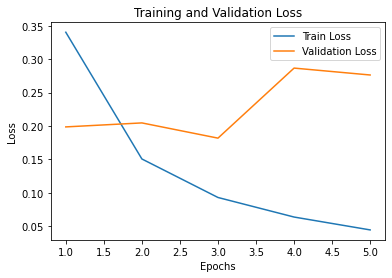

In [19]:
# Load model
model = BertForSequenceClassification.from_pretrained("tahrirchi/tahrirchi-bert-small", num_labels=len(classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training setup
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()
epochs = 5

train_losses, val_losses = [], []

for epoch in range(epochs):
    print("epoch=", epoch)
    print(len(train_loader))
    model.train()
    total_loss = 0
    batchn=0
    for batch in train_loader:
        batchn+=1
        print(epoch, batchn)
        input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))
    
    # Validation
    print("Eval starting...")
    model.eval()
    val_loss = 0
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['label'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()
            logits = outputs.logits
            preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    val_losses.append(val_loss / len(val_loader))
    
    print(f"Epoch {epoch + 1}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

# Evaluation
accuracy = accuracy_score(true_labels, preds)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(true_labels, preds, target_names=classes))

# Plot losses
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()